In [2]:

# Imports

import numpy as np
import cv2
import glob # Used to read in image files of a particular pattern
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import pickle
import collections # Used to store a recent window of good fits
import math # Used for nan detection
import sys # For progress indicator
import time # For time difference measurements

# SciKitLearn
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Packages below needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from scipy.ndimage.measurements import label
from mpl_toolkits.mplot3d import Axes3D

from scipy.ndimage.measurements import label


In [3]:


# Shared Constants
# Constant for separating log statements( if needed )
const_separator_line = "--------------------------------"

# Constant representing a random seed for Data Splitting
const_data_split_seed = 42

# Constant representing location of the trained model
# The model name(s) are unique as per the color spaces they were trained to operate upon
const_persist_data_rgb2 = './model/persist_data_rgb2.p'
const_persist_data_rgb = './model/persist_data_rgb.p'
const_persist_data_hsv = './model/persist_data_hsv.p'
const_persist_data_hls = './model/persist_data_hls.p'
const_persist_data_ycrcb = './model/persist_data_ycrcb.p'
const_persist_data_yuv = './model/persist_data_yuv.p'
const_persist_data_luv = './model/persist_data_yuv.p'

# Constants representing paths of test images
const_test_straight1 = './test_images/input/straight_lines1.jpg'
const_test_straight1_output = './test_images/output/straight_lines1.jpg'

const_test_straight2 = './test_images/input/straight_lines2.jpg'
const_test_straight2_output = './test_images/output/straight_lines2.jpg'

const_test_image_1 = './test_images/input/test1.jpg'
const_test_image_1_output = './test_images/output/test1.jpg'

const_test_image_2 = './test_images/input/test2.jpg'
const_test_image_2_output = './test_images/output/test2.jpg'

const_test_image_3 = './test_images/input/test3.jpg'
const_test_image_3_output = './test_images/output/test3.jpg'

const_test_image_4 = './test_images/input/test4.jpg'
const_test_image_4_output = './test_images/output/test4.jpg'

const_test_image_5 = './test_images/input/test5.jpg'
const_test_image_5_output = './test_images/output/test5.jpg'

const_test_image_6 = './test_images/input/test6.jpg'
const_test_image_6_output = './test_images/output/test6.jpg'

# Constants representing paths of a project video
const_project_video = './project_video/input/project_video.mp4'
const_project_video_output = './project_video/output/project_video_output.mp4'

# Constants representing paths of a test video
const_test_video = './test_video/input/test_video.mp4'
const_test_video_output = './test_video/output/test_video_output.mp4'

# Constants representing paths of model to train and test
## Non-Vehicles
nonvehicles_gti = glob.glob('./project_data/non-vehicles/GTI/image*.png')
nonvehicles_extras = glob.glob('./project_data/non-vehicles/Extras/extra*.png')

## Vehicles
vehicles_gti_far = glob.glob('./project_data/vehicles/GTI_Far/image*.png')
vehicles_gti_left = glob.glob('./project_data/vehicles/GTI_Left/image*.png')
vehicles_gti_middleclose = glob.glob('./project_data/vehicles/GTI_MiddleClose/image*.png')
vehicles_gti_right = glob.glob('./project_data/vehicles/GTI_Right/image*.png')
vehicles_gti_kitti = glob.glob('./project_data/vehicles/KITTI_extracted/*.png')


In [47]:

# Useful functions to selectively turn on / off logging at different levels

const_info_log_enabled = False
def infoLog(logMessage, param_separator=None):
    if const_info_log_enabled == True:
        print("")
        if param_separator:
            print(param_separator) 
        print(logMessage)

const_debug_log_enabled = True
def debugLog(logMessage, param_separator=None):
    if const_debug_log_enabled == True:
        print("")
        if param_separator:
            print(param_separator) 
        print(logMessage)
        
const_warning_log_enabled = True
def warningLog(logMessage, param_separator=None):
    if const_warning_log_enabled == True:
        print("")
        if param_separator:
            print(param_separator) 
        print(logMessage)
        
const_error_log_enabled = True
def errorLog(logMessage, param_separator=None):
    if const_error_log_enabled == True:
        print("")
        if param_separator:
            print(param_separator) 
        print(logMessage)



In [48]:

# Convenience function for reading an image from a path
# Provides a consistent read mechanism
# Returns an RGB image

def loadImageForPath(imagePath):
    image =  mpimg.imread(imagePath)
    return image


In [49]:

# Convenience function to get the scale ( min, max ) for an image 
def get_image_scale(imageOrPath, isImagePath = False):
    # If the image is a path, then read the image from Path
    image = None
    if(isImagePath == True):
        image = loadImageForPath(imageOrPath) # Reads image as an RGB image
    else:
        image = imageOrPath
        
    scale_min = np.amin(image)
    scale_max = np.amax(image)
    
    # Print out Image Scale
    infoLog("Image Scale - Min : " + str(scale_min))
    infoLog("Image Scale - Max : " + str(scale_max))

    return (scale_min, scale_max)


In [50]:

# Create a flattened array of Vehicle and Non-Vehicle Data

cars = vehicles_gti_far + vehicles_gti_left + vehicles_gti_middleclose + vehicles_gti_right + vehicles_gti_kitti
notcars = nonvehicles_gti + nonvehicles_extras



# Exploring various parameters to train the classifier

* I used the note book section below for exploration of the various parameters.


In [53]:

# This is the block where we train the SVM classifier, 
# commenting this out because we perform the training within "svm_train.py"

# car_features = extract_features(cars, color_space=color_space, 
#                         spatial_size=spatial_size, hist_bins=hist_bins, 
#                         orient=orient, pix_per_cell=pix_per_cell, 
#                         cell_per_block=cell_per_block, 
#                         hog_channel=hog_channel, spatial_feat=spatial_feat, 
#                         hist_feat=hist_feat, hog_feat=hog_feat)

# notcar_features = extract_features(notcars, color_space=color_space, 
#                         spatial_size=spatial_size, hist_bins=hist_bins, 
#                         orient=orient, pix_per_cell=pix_per_cell, 
#                         cell_per_block=cell_per_block, 
#                         hog_channel=hog_channel, spatial_feat=spatial_feat, 
#                         hist_feat=hist_feat, hog_feat=hog_feat)

# X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# # Fit a per-column scaler
# X_scaler = StandardScaler().fit(X)
# # Apply the scaler to X
# scaled_X = X_scaler.transform(X)

# # Define the labels vector
# y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# # Split up data into randomized training and test sets
# rand_state = np.random.randint(0, 100)
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_X, y, test_size=0.2, random_state=rand_state)

# print('Using:',orient,'orientations',pix_per_cell,
#     'pixels per cell and', cell_per_block,'cells per block')
# print('Feature vector length:', len(X_train[0]))
# # Use a linear SVC 
# svc = LinearSVC()
# # Check the training time for the SVC
# t=time.time()
# svc.fit(X_train, y_train)
# t2 = time.time()
# print(round(t2-t, 2), 'Seconds to train SVC...')
# # Check the score of the SVC
# print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# # Check the prediction time for a single sample
# t=time.time()

# # Save to Pickle
# persist_data_dict = { "svc": svc, "scaler" : X_scaler, "orient" : orient, "pix_per_cell" : pix_per_cell, "cell_per_block" : cell_per_block, "spatial_size" : spatial_size, "hist_bins" : hist_bins, "color_space": color_space }
# pickle.dump( persist_data_dict, open( const_persist_data, "wb" ) )

# # Load a test image
# image = mpimg.imread(const_test_image_1)
# draw_image = np.copy(image)

# # Uncomment the following line if you extracted training
# # data from .png images (scaled 0 to 1 by mpimg) and the
# # image you are searching is a .jpg (scaled 0 to 255)
# image = image.astype(np.float32)/255

# image_height = image.shape[0]
# y_start_stop_value = [int(image_height/2), image_height] # Min and max in y to search in slide_window()

# windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop_value, 
#                     xy_window=(96, 96), xy_overlap=(0.5, 0.5))

# hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
#                         spatial_size=spatial_size, hist_bins=hist_bins, 
#                         orient=orient, pix_per_cell=pix_per_cell, 
#                         cell_per_block=cell_per_block, 
#                         hog_channel=hog_channel, spatial_feat=spatial_feat, 
#                         hist_feat=hist_feat, hog_feat=hog_feat)                       

# window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

# plt.imshow(window_img)

# print(X.shape)


# Perform training within "svm_train.py"

* I was doing the initial training within the notebook, but then after sometime the notebooks have a tendency to become fairly slow.
* Whenever I was training the model, with more than 6100 data points within the notebook, I was running out of memory.
* Because of the above, I created the python file to perform the training. 
* In the section below, we restore the parameters with which we had performed the training in the above file. 

In [51]:

# Restore the persisted parameters from Disk and run the pipeline on the same test image as above to ensure consistent results

persist_data_dict = pickle.load( open(const_persist_data_rgb, "rb" ) )
svc = persist_data_dict["svc"]
X_scaler = persist_data_dict["scaler"]
orient = persist_data_dict["orient"]
pix_per_cell = persist_data_dict["pix_per_cell"]
cell_per_block = persist_data_dict["cell_per_block"]
spatial_size = persist_data_dict["spatial_size"]
hist_bins = persist_data_dict["hist_bins"]
color_space = persist_data_dict["color_space"]
hog_channel = persist_data_dict["hog_channel"]
spatial_feat = persist_data_dict["spatial_feat"]
hist_feat = persist_data_dict["hist_feat"]
hog_feat = persist_data_dict["hog_feat"]

# Print these out for a quick sanity check

debugLog(const_persist_data_rgb)
debugLog(orient)
debugLog(pix_per_cell)
debugLog(cell_per_block)
debugLog(spatial_size)
debugLog(hist_bins)
debugLog(color_space)
debugLog(hog_channel)
debugLog(spatial_feat)
debugLog(hist_feat)
debugLog(hog_feat)



./model/persist_data_rgb.p

9

8

2

(32, 32)

32

RGB

ALL

True

True

True


In [52]:

# Define a function to return HOG features and visualization
# http://www.learnopencv.com/histogram-of-oriented-gradients/
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    bins_range = get_image_scale(img)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    print(len(imgs))
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    




Image Shape : (720, 1280, 3)


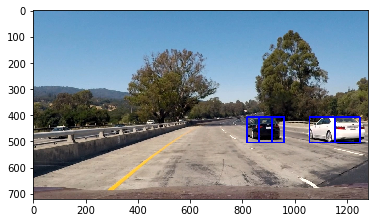

In [54]:

# Use the parameters restored from Disk ( after training do to a test run )

# Load a test image
image = mpimg.imread(const_test_image_1)
draw_image = np.copy(image)

image_shape = image.shape
debugLog("Image Shape : " + str(image_shape))
image_width = image_shape[1]
image_height = image.shape[0]

y_start_stop_value = [int(image_height/2), image_height] # Min and max in y to search in slide_window()

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop_value, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)


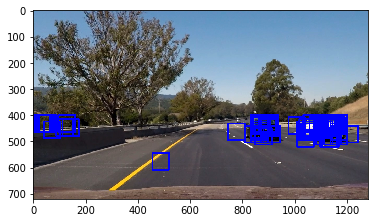

In [55]:

def convert_color(img, color_space='RGB'):
    if color_space != 'RGB':
        if color_space == 'HSV':
            infoLog("convert_color : color space is HSV")
            return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: 
        return np.copy(img)   

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, color_space=color_space)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 1  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
#     print(hog1.shape)

    bbox_list = list()
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
#             hog_features = hog_feat1

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features_to_scale = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)
#             print(test_features_to_scale.shape)
            test_features = X_scaler.transform(test_features_to_scale)    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                bbox_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img, bbox_list
    
    

# Use the parameters restored from Disk ( after training do to a test run )

# const_test_straight1
# const_test_straight2
# const_test_image_1
# const_test_image_2
# const_test_image_3
# const_test_image_4
# const_test_image_5
# const_test_image_6

img = mpimg.imread(const_test_image_6)

ystart = 400
ystop = 656
scale = 1
    
out_img, box_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space)

plt.imshow(out_img)

for bbox in box_list:
    infoLog("Left top : " + str(bbox[0]) + " || Right bottom : " + str(bbox[1]) )



Heat Image Scale : (0.0, 22.0)

dynamic threshold is : 6
2 cars found

[(1103.5, 451.5), (871.5, 443.5)]

[((1024, 408), (1183, 495)), ((840, 416), (903, 471))]


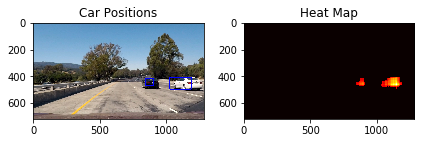

In [56]:

image = mpimg.imread(const_test_image_1)
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def get_bbox_list_from_labels(labels):
    cars_bbox_list = list()
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cars_bbox_list.append(bbox)
    # Return the bbox_list
    return cars_bbox_list

def get_centroid_list_from_bbox_list(bbox_list):
    centroids_list = list()
    # Iterate through all detected cars
    for bbox in bbox_list:
        (left_top_x, left_top_y) = bbox[0]
        (right_bottom_x, right_bottom_y) = bbox[1]
        centroid_x = (left_top_x + right_bottom_x) / 2
        centroid_y = (left_top_y + right_bottom_y) / 2
        centroid = (centroid_x, centroid_y)
        centroids_list.append(centroid)
    # Return the bbox_list
    return centroids_list

def draw_bbox_list_on_image(img, bbox_list, indices_list_to_draw = None, draw_color = (0,0,255), draw_thickness = 6):
    
    if indices_list_to_draw == None:   
        # Iterate through all detected cars
        for bbox in bbox_list:
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], draw_color, draw_thickness)
        # Return the image
    else:
        for indexvalue in indices_list_to_draw:
            bbox = bbox_list[indexvalue]
            cv2.rectangle(img, bbox[0], bbox[1], draw_color, draw_thickness)

    return img

def draw_labeled_bboxes(img, labels):
    cars_bbox_list = list()
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        cars_bbox_list.append(bbox)
    # Return the image
    return img, cars_bbox_list

# Add heat to each box in box list
heat = add_heat(heat,box_list)
heat_image_scale = get_image_scale(heat)
debugLog("Heat Image Scale : " + str(heat_image_scale))
    
# Detect the leval of 'hotness' for the image
max_heat = heat_image_scale[1]
    

# Rejection multiplier to pick all cells upto (thresholding_ratio*max_heat)
# If our detection pipeline is very sensitive, then this ration needs to be close to one, else
# it needs to be closer to 0
thresholding_ratio = 0.3

dynamic_threshold = int(thresholding_ratio*max_heat) # Do the thresholding dynamically

debugLog("dynamic threshold is : " + str(dynamic_threshold))
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, dynamic_threshold)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(labels[1], 'cars found')

cars_bbox_list = get_bbox_list_from_labels(labels)
centroid_list = get_centroid_list_from_bbox_list(cars_bbox_list)
draw_img = draw_bbox_list_on_image(np.copy(image), cars_bbox_list)

# draw_img, cars_bbox_list = draw_labeled_bboxes(np.copy(image), labels)

debugLog(centroid_list)
debugLog(cars_bbox_list)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


In [57]:

const_measurements_fontsize = 1
const_measurements_fontcolor = (255,255,255)
const_measurements_fontcolor_true = (0,0,255)
const_measurements_fontcolor_false = (255,0,0)


# Convenient method to add a frame number to an image
# This can be useful to track specific frame(s) of a video for debugging
def add_frame_number_to_image(param_img, current_frame_number, true_detections_list, false_detections_list):
    return_img = param_img.copy()
    
    true_detections_count = 0
    false_detections_count = 0
    
    if true_detections_list != None:
        true_detections_count = len(true_detections_list)
        
    if false_detections_list != None:
        false_detections_count = len(false_detections_list)

    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(return_img, 'Frame Number = %d' % current_frame_number, (50, 50), font, const_measurements_fontsize, const_measurements_fontcolor, 2)
    
    cv2.putText(return_img, 'True Detections Count = %d' % true_detections_count, (50, 100), font, const_measurements_fontsize, const_measurements_fontcolor_true, 2)
    
    cv2.putText(return_img, 'False Detections Count = %d' % false_detections_count, (50, 150), font, const_measurements_fontsize, const_measurements_fontcolor_false, 2)

    return return_img


In [58]:

# Clear history across the video pipeline

global_centroid_history_list = list() # Each entry here contains a list of car centroids as detected per frame
global_current_frame_number = 0

def reset_history():
    debugLog("Clearing any previous state.")
    global global_centroid_history_list
    global global_current_frame_number
    global_centroid_history_list = list()
    global_current_frame_number = 0
    
def update_history(centroid_list):
    debugLog("Updating history - total number of frames captured : " + str(len(global_centroid_history_list)) )
    global global_centroid_history_list
    global global_current_frame_number
    global_centroid_history_list.append(centroid_list)
    global_current_frame_number = global_current_frame_number + 1
    
def get_all_historical_centroids():
    infoLog("Fetching history - total number of frames captured : " + str(len(global_centroid_history_list)) )
    global global_centroid_history_list
    return global_centroid_history_list
    

In [59]:

const_max_history_frames = 5 # Constant representing maximum number of historical frames to consider

const_detection_threshold_x = 60 # Threshold for the difference between x co ordinate of centroid of current frame to historical frames
const_detection_threshold_y = 60 # Threshold for the difference between y co ordinate of centroid of current frame to historical frames

# Method which gets the last 'history_depth' number of centroids from centroid_history_list.
# The returned list is a flattened list of centroids ( unline centroid_history_list which by itself contains list of centroids of detections per frame )
def get_historical_centroids(centroid_history_list, history_depth):
    infoLog(centroid_history_list)
    centroid_history_list_len = len(centroid_history_list)
    history_depth_for_lookup = history_depth
    if centroid_history_list_len < history_depth:
        history_depth_for_lookup = centroid_history_list_len
    list_of_centroid_lists = centroid_history_list[-history_depth_for_lookup:]
    infoLog(list_of_centroid_lists)
    return_centroid_list = list()
    for centroids_list in list_of_centroid_lists:
        for centroid in centroids_list:
            return_centroid_list.append(centroid)
    return return_centroid_list

# This method compares the centroid detections of the current frame to all the centroids from the previous frame
# To determine proximity, we use, const_detection_threshold_x and const_detection_threshold_y
# For each current point, we count the number of historical points that it is close to, and prepare a list of strength for all such points
# We will then apply thresholding to see if the current point is close to at-least past 'X' points, and in that case declare that as a legitimate detection
# Points that do not meet this criteria will be rejected
def compare_current_centroids_with_historical_centroids(current_centroid_list, flattened_historical_centroids):
    proximity_list_for_centroids = list()
    for centroid in current_centroid_list:
        proximity_count_for_current_centroid = 0
        for historical_centroid in flattened_historical_centroids:
            abs_delta_x = abs(historical_centroid[0] - centroid[0])
            abs_delta_y = abs(historical_centroid[1] - centroid[1])
            if abs_delta_x <= const_detection_threshold_x and abs_delta_y <= const_detection_threshold_y:
                proximity_count_for_current_centroid = proximity_count_for_current_centroid + 1
        proximity_list_for_centroids.append(proximity_count_for_current_centroid)
    return proximity_list_for_centroids

def generate_centroid_statistics(centroid_history_list, current_frame_centroids):
    debugLog("Current frame detection centroids : " + str(current_frame_centroids))
    flattened_list_of_centroid_history = get_historical_centroids(centroid_history_list, const_max_history_frames)
    debugLog("Historical centroids : " + str(flattened_list_of_centroid_history))
    proximity_list_for_current_centroids = compare_current_centroids_with_historical_centroids(current_frame_centroids, flattened_list_of_centroid_history)
    return proximity_list_for_current_centroids
    
def separate_centroids_into_true_false(proximity_list_for_current_centroids):
    if proximity_list_for_current_centroids == None:
        return None, None
    
    max_proximity_value = max(proximity_list_for_current_centroids)
    infoLog(max_proximity_value)
    
    indices_list_true_detections = list()
    indices_list_false_detections = list()
    
    for index, proximity in enumerate(proximity_list_for_current_centroids):
        if proximity == max_proximity_value:
            indices_list_true_detections.append(index)
        else: 
            indices_list_false_detections.append(index)
    return indices_list_true_detections, indices_list_false_detections
    

    


Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 25.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1155.5, 459.5), (883.5, 459.5)]

Historical centroids : []

[0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

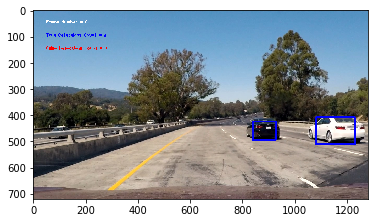

In [60]:

# Defining the pipeline

def pipeline(imageOrPath, isImagePath = False):
    
    global global_current_frame_number
    
    debugLog("-----------------------------------------------------------------------------------------------")
    
    debugLog("Current Frame Number : " + str(global_current_frame_number))

    # If the image is a path, then read the image from Path
    image = None
    if(isImagePath == True):
        image = mpimg.imread(imageOrPath) # Reads image as an RGB image
    else:
        image = imageOrPath
        
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Clear out matplotlib plot frame for each run
    plt.clf()
            
    # Detect Cars
    out_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space)
                 
    # Add heat to each box in box list
    heat = add_heat(heat, box_list)
    
    # Detect the leval of 'hotness' for the image
    heat_image_scale = get_image_scale(heat)
    debugLog("Heat Image Scale : " + str(heat_image_scale))
    max_heat = heat_image_scale[1]
    
    # Do the thresholding dynamically
    dynamic_threshold = int(thresholding_ratio*max_heat)

    debugLog("Dynamic threshold for this frame is : " + str(dynamic_threshold))
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, dynamic_threshold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    num_cars_detected = labels[1]
    debugLog('Number of Cars found in current frame : ' +  str(num_cars_detected))    
    
    cars_bbox_list = get_bbox_list_from_labels(labels)
    
    current_frame_centroids_list = get_centroid_list_from_bbox_list(cars_bbox_list)
    
    infoLog("Detected Cars Bounding Box List : " + str(cars_bbox_list))

    proximity_list_for_current_frame_centroids = generate_centroid_statistics(get_all_historical_centroids(), current_frame_centroids_list)
    debugLog(proximity_list_for_current_frame_centroids)
    
    true_detections_indices_list, false_detections_indices_list = separate_centroids_into_true_false(proximity_list_for_current_frame_centroids)
    
    debugLog("True Detections Indices List : " + str(true_detections_indices_list))
    debugLog("False Detections Indices List : " + str(false_detections_indices_list))

    draw_img_true = draw_bbox_list_on_image(np.copy(image), cars_bbox_list, true_detections_indices_list)
    
    draw_img_true_and_false = draw_bbox_list_on_image(draw_img_true, cars_bbox_list, false_detections_indices_list, (255, 0,0), 1)
    
    # Items to log / keep a record of - num_cars_detected, cars_bbox_list, heat_image_scale
    draw_img_true_and_false = add_frame_number_to_image(draw_img_true_and_false, global_current_frame_number, true_detections_indices_list, false_detections_indices_list)
    
    update_history(current_frame_centroids_list)
    
    debugLog("-----------------------------------------------------------------------------------------------")

    return draw_img_true_and_false

# Pipeline as executed on a test image

reset_history()
detected_cars_img = pipeline(const_test_image_1, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_image_1_output, detected_cars_img)



Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(583.5, 483.5)]

Historical centroids : []

[0]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

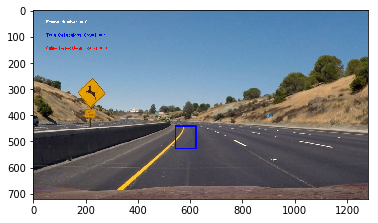

In [61]:

# Pipeline as executed on Test Image #2 

reset_history()
detected_cars_img = pipeline(const_test_image_2, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_image_2_output, detected_cars_img)



Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(163.5, 435.5), (923.5, 443.5)]

Historical centroids : []

[0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

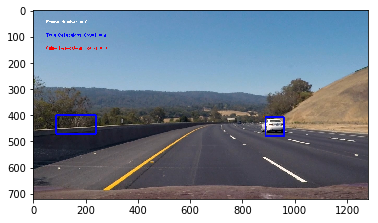

In [131]:

# Pipeline as executed on Test Image #3 

reset_history()
detected_cars_img = pipeline(const_test_image_3, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_image_3_output, detected_cars_img)





Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 27.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 2

Current frame detection centroids : [(1171.5, 455.5), (1107.5, 455.5)]

Historical centroids : []

[0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

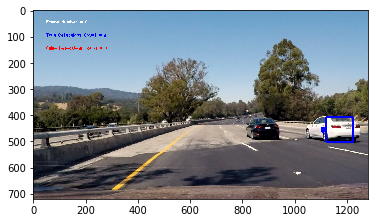

In [132]:


# Pipeline as executed on Test Image #4 

reset_history()
detected_cars_img = pipeline(const_test_image_4, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_image_4_output, detected_cars_img)




Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 8

Current frame detection centroids : [(1187.5, 447.5), (795.5, 451.5), (347.5, 443.5), (899.5, 463.5), (51.5, 459.5), (1047.5, 451.5), (995.5, 471.5), (707.5, 483.5)]

Historical centroids : []

[0, 0, 0, 0, 0, 0, 0, 0]

True Detections Indices List : [0, 1, 2, 3, 4, 5, 6, 7]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

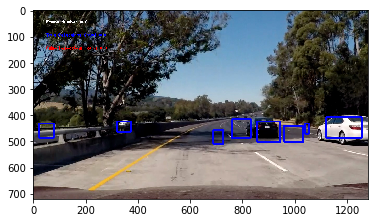

In [133]:

# Pipeline as executed on Test Image #5 

reset_history()
detected_cars_img = pipeline(const_test_image_5, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_image_5_output, detected_cars_img)




Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1103.5, 451.5), (871.5, 443.5)]

Historical centroids : []

[0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

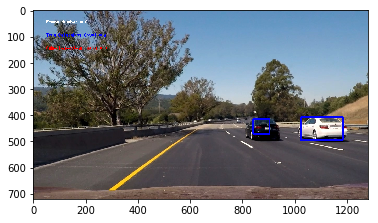

In [134]:

# Pipeline as executed on Test Image #6 

reset_history()
detected_cars_img = pipeline(const_test_image_6, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_image_6_output, detected_cars_img)




Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 2.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 6

Current frame detection centroids : [(919.5, 451.5), (1215.5, 455.5), (143.5, 471.5), (63.5, 487.5), (519.5, 527.5), (831.5, 575.5)]

Historical centroids : []

[0, 0, 0, 0, 0, 0]

True Detections Indices List : [0, 1, 2, 3, 4, 5]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

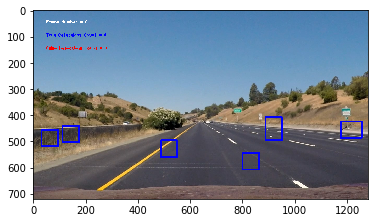

In [135]:

# Pipeline as executed on Test Image #7 

reset_history()
detected_cars_img = pipeline(const_test_straight1, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_straight1_output, detected_cars_img)




Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(111.5, 431.5), (187.5, 455.5), (551.5, 499.5), (431.5, 591.5)]

Historical centroids : []

[0, 0, 0, 0]

True Detections Indices List : [0, 1, 2, 3]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------


True

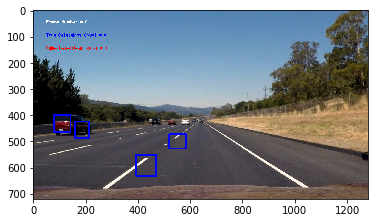

In [136]:

# Pipeline as executed on Test Image #8 

reset_history()
detected_cars_img = pipeline(const_test_straight2, True)
plt.imshow(detected_cars_img)
cv2.imwrite(const_test_straight2_output, detected_cars_img)




In [ ]:

# Pipeline as executed on the Test Video

reset_history()

clip1 = VideoFileClip(const_test_video)
output_clip1 = clip1.fl_image(pipeline)
output1 = const_test_video_output
%time output_clip1.write_videofile(output1, audio=False)



Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1095.5, 443.5), (875.5, 455.5)]

Historical centroids : []

[0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------
[MoviePy] >>>> Building video ./test_video/output/test_video_output.mp4
[MoviePy] Writing video ./test_video/output/test_video_output.mp4




  0%|          | 0/39 [00:00<?, ?it/s]


-----------------------------------------------------------------------------------------------

Current Frame Number : 1




  3%|▎         | 1/39 [00:03<01:54,  3.01s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1095.5, 443.5), (875.5, 455.5)]

Historical centroids : [(1095.5, 443.5), (875.5, 455.5)]

[1, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 2




  5%|▌         | 2/39 [00:06<01:52,  3.04s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1095.5, 447.5), (879.5, 455.5)]

Historical centroids : [(1095.5, 443.5), (875.5, 455.5), (1095.5, 443.5), (875.5, 455.5)]

[2, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 2

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 3




  8%|▊         | 3/39 [00:09<01:50,  3.06s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1103.5, 443.5), (879.5, 455.5)]

Historical centroids : [(1095.5, 443.5), (875.5, 455.5), (1095.5, 443.5), (875.5, 455.5), (1095.5, 447.5), (879.5, 455.5)]

[3, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 3

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 4




 10%|█         | 4/39 [00:12<01:47,  3.07s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1099.5, 455.5), (879.5, 455.5)]

Historical centroids : [(1095.5, 443.5), (875.5, 455.5), (1095.5, 443.5), (875.5, 455.5), (1095.5, 447.5), (879.5, 455.5), (1103.5, 443.5), (879.5, 455.5)]

[4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 4

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 5




 13%|█▎        | 5/39 [00:15<01:44,  3.07s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1123.5, 451.5), (91.5, 439.5), (887.5, 463.5)]

Historical centroids : [(1095.5, 443.5), (875.5, 455.5), (1095.5, 443.5), (875.5, 455.5), (1095.5, 447.5), (879.5, 455.5), (1103.5, 443.5), (879.5, 455.5), (1099.5, 455.5), (879.5, 455.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 5

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 6




 15%|█▌        | 6/39 [00:18<01:41,  3.06s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1111.5, 451.5), (883.5, 471.5)]

Historical centroids : [(1095.5, 443.5), (875.5, 455.5), (1095.5, 447.5), (879.5, 455.5), (1103.5, 443.5), (879.5, 455.5), (1099.5, 455.5), (879.5, 455.5), (1123.5, 451.5), (91.5, 439.5), (887.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 6

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 7




 18%|█▊        | 7/39 [00:21<01:38,  3.08s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1095.5, 447.5), (95.5, 443.5), (879.5, 467.5)]

Historical centroids : [(1095.5, 447.5), (879.5, 455.5), (1103.5, 443.5), (879.5, 455.5), (1099.5, 455.5), (879.5, 455.5), (1123.5, 451.5), (91.5, 439.5), (887.5, 463.5), (1111.5, 451.5), (883.5, 471.5)]

[5, 1, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 7

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 8




 21%|██        | 8/39 [00:24<01:34,  3.03s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(887.5, 455.5), (1099.5, 451.5), (331.5, 443.5)]

Historical centroids : [(1103.5, 443.5), (879.5, 455.5), (1099.5, 455.5), (879.5, 455.5), (1123.5, 451.5), (91.5, 439.5), (887.5, 463.5), (1111.5, 451.5), (883.5, 471.5), (1095.5, 447.5), (95.5, 443.5), (879.5, 467.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 8

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 9




 23%|██▎       | 9/39 [00:27<01:31,  3.05s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1111.5, 451.5), (883.5, 455.5), (303.5, 447.5)]

Historical centroids : [(1099.5, 455.5), (879.5, 455.5), (1123.5, 451.5), (91.5, 439.5), (887.5, 463.5), (1111.5, 451.5), (883.5, 471.5), (1095.5, 447.5), (95.5, 443.5), (879.5, 467.5), (887.5, 455.5), (1099.5, 451.5), (331.5, 443.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 9

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 10




 26%|██▌       | 10/39 [00:30<01:27,  3.03s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1099.5, 443.5), (311.5, 439.5), (879.5, 463.5), (267.5, 455.5)]

Historical centroids : [(1123.5, 451.5), (91.5, 439.5), (887.5, 463.5), (1111.5, 451.5), (883.5, 471.5), (1095.5, 447.5), (95.5, 443.5), (879.5, 467.5), (887.5, 455.5), (1099.5, 451.5), (331.5, 443.5), (1111.5, 451.5), (883.5, 455.5), (303.5, 447.5)]

[5, 2, 5, 1]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 10

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 11




 28%|██▊       | 11/39 [00:33<01:25,  3.05s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1103.5, 447.5), (879.5, 455.5), (179.5, 447.5), (315.5, 439.5)]

Historical centroids : [(1111.5, 451.5), (883.5, 471.5), (1095.5, 447.5), (95.5, 443.5), (879.5, 467.5), (887.5, 455.5), (1099.5, 451.5), (331.5, 443.5), (1111.5, 451.5), (883.5, 455.5), (303.5, 447.5), (1099.5, 443.5), (311.5, 439.5), (879.5, 463.5), (267.5, 455.5)]

[5, 5, 0, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 11

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 12




 31%|███       | 12/39 [00:36<01:20,  2.99s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 6

Current frame detection centroids : [(1115.5, 447.5), (879.5, 455.5), (215.5, 451.5), (295.5, 443.5), (123.5, 447.5), (175.5, 455.5)]

Historical centroids : [(1095.5, 447.5), (95.5, 443.5), (879.5, 467.5), (887.5, 455.5), (1099.5, 451.5), (331.5, 443.5), (1111.5, 451.5), (883.5, 455.5), (303.5, 447.5), (1099.5, 443.5), (311.5, 439.5), (879.5, 463.5), (267.5, 455.5), (1103.5, 447.5), (879.5, 455.5), (179.5, 447.5), (315.5, 439.5)]

[5, 5, 2, 5, 2, 1]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2, 4, 5]

Updating history - total number of frames captured : 12

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 13




 33%|███▎      | 13/39 [00:39<01:17,  3.00s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(871.5, 459.5), (1115.5, 451.5), (111.5, 451.5), (187.5, 455.5)]

Historical centroids : [(887.5, 455.5), (1099.5, 451.5), (331.5, 443.5), (1111.5, 451.5), (883.5, 455.5), (303.5, 447.5), (1099.5, 443.5), (311.5, 439.5), (879.5, 463.5), (267.5, 455.5), (1103.5, 447.5), (879.5, 455.5), (179.5, 447.5), (315.5, 439.5), (1115.5, 447.5), (879.5, 455.5), (215.5, 451.5), (295.5, 443.5), (123.5, 447.5), (175.5, 455.5)]

[5, 5, 1, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 13

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 14




 36%|███▌      | 14/39 [00:42<01:15,  3.04s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 5

Current frame detection centroids : [(1103.5, 443.5), (59.5, 459.5), (147.5, 455.5), (871.5, 467.5), (1211.5, 455.5)]

Historical centroids : [(1111.5, 451.5), (883.5, 455.5), (303.5, 447.5), (1099.5, 443.5), (311.5, 439.5), (879.5, 463.5), (267.5, 455.5), (1103.5, 447.5), (879.5, 455.5), (179.5, 447.5), (315.5, 439.5), (1115.5, 447.5), (879.5, 455.5), (215.5, 451.5), (295.5, 443.5), (123.5, 447.5), (175.5, 455.5), (871.5, 459.5), (1115.5, 451.5), (111.5, 451.5), (187.5, 455.5)]

[5, 1, 5, 5, 0]

True Detections Indices List : [0, 2, 3]

False Detections Indices List : [1, 4]

Updating history - total number of frames captured : 14

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 15




 38%|███▊      | 15/39 [00:45<01:13,  3.06s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 8

Current frame detection centroids : [(171.5, 439.5), (879.5, 455.5), (1179.5, 439.5), (79.5, 455.5), (267.5, 447.5), (1035.5, 463.5), (587.5, 499.5), (419.5, 531.5)]

Historical centroids : [(1099.5, 443.5), (311.5, 439.5), (879.5, 463.5), (267.5, 455.5), (1103.5, 447.5), (879.5, 455.5), (179.5, 447.5), (315.5, 439.5), (1115.5, 447.5), (879.5, 455.5), (215.5, 451.5), (295.5, 443.5), (123.5, 447.5), (175.5, 455.5), (871.5, 459.5), (1115.5, 451.5), (111.5, 451.5), (187.5, 455.5), (1103.5, 443.5), (59.5, 459.5), (147.5, 455.5), (871.5, 467.5), (1211.5, 455.5)]

[7, 5, 1, 3, 5, 0, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5, 6, 7]

Updating history - total number of frames captured : 15

-----------------------------------------------------------------------------------------------

-----------------------------------------------



 41%|████      | 16/39 [00:48<01:11,  3.09s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 6

Current frame detection centroids : [(1111.5, 451.5), (163.5, 443.5), (879.5, 463.5), (51.5, 455.5), (587.5, 503.5), (339.5, 527.5)]

Historical centroids : [(1103.5, 447.5), (879.5, 455.5), (179.5, 447.5), (315.5, 439.5), (1115.5, 447.5), (879.5, 455.5), (215.5, 451.5), (295.5, 443.5), (123.5, 447.5), (175.5, 455.5), (871.5, 459.5), (1115.5, 451.5), (111.5, 451.5), (187.5, 455.5), (1103.5, 443.5), (59.5, 459.5), (147.5, 455.5), (871.5, 467.5), (1211.5, 455.5), (171.5, 439.5), (879.5, 455.5), (1179.5, 439.5), (79.5, 455.5), (267.5, 447.5), (1035.5, 463.5), (587.5, 499.5), (419.5, 531.5)]

[4, 8, 5, 3, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 16

-----------------------------------------------------------------------------------------------

----------------------------



 44%|████▎     | 17/39 [00:51<01:07,  3.05s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 6

Current frame detection centroids : [(119.5, 443.5), (271.5, 439.5), (1123.5, 451.5), (875.5, 463.5), (579.5, 507.5), (335.5, 563.5)]

Historical centroids : [(1115.5, 447.5), (879.5, 455.5), (215.5, 451.5), (295.5, 443.5), (123.5, 447.5), (175.5, 455.5), (871.5, 459.5), (1115.5, 451.5), (111.5, 451.5), (187.5, 455.5), (1103.5, 443.5), (59.5, 459.5), (147.5, 455.5), (871.5, 467.5), (1211.5, 455.5), (171.5, 439.5), (879.5, 455.5), (1179.5, 439.5), (79.5, 455.5), (267.5, 447.5), (1035.5, 463.5), (587.5, 499.5), (419.5, 531.5), (1111.5, 451.5), (163.5, 443.5), (879.5, 463.5), (51.5, 455.5), (587.5, 503.5), (339.5, 527.5)]

[8, 3, 5, 5, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5]

Updating history - total number of frames captured : 17

---------------------------------------------------------------------------------------------



 46%|████▌     | 18/39 [00:54<01:03,  3.02s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 6

Current frame detection centroids : [(1167.5, 443.5), (107.5, 459.5), (875.5, 463.5), (1067.5, 459.5), (563.5, 515.5), (275.5, 579.5)]

Historical centroids : [(871.5, 459.5), (1115.5, 451.5), (111.5, 451.5), (187.5, 455.5), (1103.5, 443.5), (59.5, 459.5), (147.5, 455.5), (871.5, 467.5), (1211.5, 455.5), (171.5, 439.5), (879.5, 455.5), (1179.5, 439.5), (79.5, 455.5), (267.5, 447.5), (1035.5, 463.5), (587.5, 499.5), (419.5, 531.5), (1111.5, 451.5), (163.5, 443.5), (879.5, 463.5), (51.5, 455.5), (587.5, 503.5), (339.5, 527.5), (119.5, 443.5), (271.5, 439.5), (1123.5, 451.5), (875.5, 463.5), (579.5, 507.5), (335.5, 563.5)]

[5, 7, 5, 5, 3, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 18

--------------------------------------------------------------------------------------------



 49%|████▊     | 19/39 [00:57<01:00,  3.04s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 8

Current frame detection centroids : [(1123.5, 451.5), (875.5, 455.5), (83.5, 459.5), (751.5, 479.5), (239.5, 451.5), (547.5, 535.5), (223.5, 583.5), (475.5, 551.5)]

Historical centroids : [(1103.5, 443.5), (59.5, 459.5), (147.5, 455.5), (871.5, 467.5), (1211.5, 455.5), (171.5, 439.5), (879.5, 455.5), (1179.5, 439.5), (79.5, 455.5), (267.5, 447.5), (1035.5, 463.5), (587.5, 499.5), (419.5, 531.5), (1111.5, 451.5), (163.5, 443.5), (879.5, 463.5), (51.5, 455.5), (587.5, 503.5), (339.5, 527.5), (119.5, 443.5), (271.5, 439.5), (1123.5, 451.5), (875.5, 463.5), (579.5, 507.5), (335.5, 563.5), (1167.5, 443.5), (107.5, 459.5), (875.5, 463.5), (1067.5, 459.5), (563.5, 515.5), (275.5, 579.5)]

[6, 5, 5, 0, 2, 4, 1, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5, 6, 7]

Updating history - total number of frames captured : 19

-----------------



 51%|█████▏    | 20/39 [01:01<00:58,  3.06s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1127.5, 451.5), (55.5, 451.5), (875.5, 467.5), (547.5, 535.5)]

Historical centroids : [(171.5, 439.5), (879.5, 455.5), (1179.5, 439.5), (79.5, 455.5), (267.5, 447.5), (1035.5, 463.5), (587.5, 499.5), (419.5, 531.5), (1111.5, 451.5), (163.5, 443.5), (879.5, 463.5), (51.5, 455.5), (587.5, 503.5), (339.5, 527.5), (119.5, 443.5), (271.5, 439.5), (1123.5, 451.5), (875.5, 463.5), (579.5, 507.5), (335.5, 563.5), (1167.5, 443.5), (107.5, 459.5), (875.5, 463.5), (1067.5, 459.5), (563.5, 515.5), (275.5, 579.5), (1123.5, 451.5), (875.5, 455.5), (83.5, 459.5), (751.5, 479.5), (239.5, 451.5), (547.5, 535.5), (223.5, 583.5), (475.5, 551.5)]

[6, 4, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 20

----------------------------------------------------------



 54%|█████▍    | 21/39 [01:04<00:55,  3.10s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 6

Current frame detection centroids : [(1115.5, 451.5), (247.5, 443.5), (883.5, 459.5), (811.5, 467.5), (763.5, 491.5), (407.5, 567.5)]

Historical centroids : [(1111.5, 451.5), (163.5, 443.5), (879.5, 463.5), (51.5, 455.5), (587.5, 503.5), (339.5, 527.5), (119.5, 443.5), (271.5, 439.5), (1123.5, 451.5), (875.5, 463.5), (579.5, 507.5), (335.5, 563.5), (1167.5, 443.5), (107.5, 459.5), (875.5, 463.5), (1067.5, 459.5), (563.5, 515.5), (275.5, 579.5), (1123.5, 451.5), (875.5, 455.5), (83.5, 459.5), (751.5, 479.5), (239.5, 451.5), (547.5, 535.5), (223.5, 583.5), (475.5, 551.5), (1127.5, 451.5), (55.5, 451.5), (875.5, 467.5), (547.5, 535.5)]

[6, 2, 5, 1, 1, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5]

Updating history - total number of frames captured : 21

------------------------------------------------------------------------------



 56%|█████▋    | 22/39 [01:07<00:53,  3.15s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(39.5, 455.5), (847.5, 463.5), (1115.5, 451.5), (443.5, 547.5), (359.5, 595.5)]

Historical centroids : [(119.5, 443.5), (271.5, 439.5), (1123.5, 451.5), (875.5, 463.5), (579.5, 507.5), (335.5, 563.5), (1167.5, 443.5), (107.5, 459.5), (875.5, 463.5), (1067.5, 459.5), (563.5, 515.5), (275.5, 579.5), (1123.5, 451.5), (875.5, 455.5), (83.5, 459.5), (751.5, 479.5), (239.5, 451.5), (547.5, 535.5), (223.5, 583.5), (475.5, 551.5), (1127.5, 451.5), (55.5, 451.5), (875.5, 467.5), (547.5, 535.5), (1115.5, 451.5), (247.5, 443.5), (883.5, 459.5), (811.5, 467.5), (763.5, 491.5), (407.5, 567.5)]

[2, 6, 6, 2, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3, 4]

Updating history - total number of frames captured : 22

-----------------------------------------------------------------------------------------------

---



 59%|█████▉    | 23/39 [01:10<00:50,  3.18s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(1139.5, 443.5), (827.5, 463.5), (227.5, 443.5), (547.5, 531.5), (451.5, 575.5), (307.5, 583.5)]

Historical centroids : [(1167.5, 443.5), (107.5, 459.5), (875.5, 463.5), (1067.5, 459.5), (563.5, 515.5), (275.5, 579.5), (1123.5, 451.5), (875.5, 455.5), (83.5, 459.5), (751.5, 479.5), (239.5, 451.5), (547.5, 535.5), (223.5, 583.5), (475.5, 551.5), (1127.5, 451.5), (55.5, 451.5), (875.5, 467.5), (547.5, 535.5), (1115.5, 451.5), (247.5, 443.5), (883.5, 459.5), (811.5, 467.5), (763.5, 491.5), (407.5, 567.5), (39.5, 455.5), (847.5, 463.5), (1115.5, 451.5), (443.5, 547.5), (359.5, 595.5)]

[5, 6, 2, 3, 3, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 23

----------------------------------------------------------------------------------------------



 62%|██████▏   | 24/39 [01:13<00:46,  3.12s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 5

Current frame detection centroids : [(1143.5, 439.5), (883.5, 467.5), (99.5, 483.5), (531.5, 547.5), (467.5, 595.5)]

Historical centroids : [(1123.5, 451.5), (875.5, 455.5), (83.5, 459.5), (751.5, 479.5), (239.5, 451.5), (547.5, 535.5), (223.5, 583.5), (475.5, 551.5), (1127.5, 451.5), (55.5, 451.5), (875.5, 467.5), (547.5, 535.5), (1115.5, 451.5), (247.5, 443.5), (883.5, 459.5), (811.5, 467.5), (763.5, 491.5), (407.5, 567.5), (39.5, 455.5), (847.5, 463.5), (1115.5, 451.5), (443.5, 547.5), (359.5, 595.5), (1139.5, 443.5), (827.5, 463.5), (227.5, 443.5), (547.5, 531.5), (451.5, 575.5), (307.5, 583.5)]

[5, 5, 3, 4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4]

Updating history - total number of frames captured : 24

-----------------------------------------------------------------------------------------------

---------------------



 64%|██████▍   | 25/39 [01:16<00:43,  3.09s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 5

Current frame detection centroids : [(1171.5, 443.5), (875.5, 467.5), (1087.5, 455.5), (203.5, 451.5), (555.5, 531.5)]

Historical centroids : [(1127.5, 451.5), (55.5, 451.5), (875.5, 467.5), (547.5, 535.5), (1115.5, 451.5), (247.5, 443.5), (883.5, 459.5), (811.5, 467.5), (763.5, 491.5), (407.5, 567.5), (39.5, 455.5), (847.5, 463.5), (1115.5, 451.5), (443.5, 547.5), (359.5, 595.5), (1139.5, 443.5), (827.5, 463.5), (227.5, 443.5), (547.5, 531.5), (451.5, 575.5), (307.5, 583.5), (1143.5, 439.5), (883.5, 467.5), (99.5, 483.5), (531.5, 547.5), (467.5, 595.5)]

[5, 5, 5, 2, 3]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3, 4]

Updating history - total number of frames captured : 25

-----------------------------------------------------------------------------------------------

-------------------------------------------------------------------



 67%|██████▋   | 26/39 [01:19<00:40,  3.08s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1143.5, 447.5), (203.5, 439.5), (883.5, 467.5)]

Historical centroids : [(1115.5, 451.5), (247.5, 443.5), (883.5, 459.5), (811.5, 467.5), (763.5, 491.5), (407.5, 567.5), (39.5, 455.5), (847.5, 463.5), (1115.5, 451.5), (443.5, 547.5), (359.5, 595.5), (1139.5, 443.5), (827.5, 463.5), (227.5, 443.5), (547.5, 531.5), (451.5, 575.5), (307.5, 583.5), (1143.5, 439.5), (883.5, 467.5), (99.5, 483.5), (531.5, 547.5), (467.5, 595.5), (1171.5, 443.5), (875.5, 467.5), (1087.5, 455.5), (203.5, 451.5), (555.5, 531.5)]

[6, 3, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 26

-----------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------



 69%|██████▉   | 27/39 [01:22<00:36,  3.05s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1127.5, 447.5), (899.5, 463.5)]

Historical centroids : [(39.5, 455.5), (847.5, 463.5), (1115.5, 451.5), (443.5, 547.5), (359.5, 595.5), (1139.5, 443.5), (827.5, 463.5), (227.5, 443.5), (547.5, 531.5), (451.5, 575.5), (307.5, 583.5), (1143.5, 439.5), (883.5, 467.5), (99.5, 483.5), (531.5, 547.5), (467.5, 595.5), (1171.5, 443.5), (875.5, 467.5), (1087.5, 455.5), (203.5, 451.5), (555.5, 531.5), (1143.5, 447.5), (203.5, 439.5), (883.5, 467.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 27

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 28




 72%|███████▏  | 28/39 [01:25<00:33,  3.05s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1131.5, 447.5), (199.5, 447.5), (123.5, 463.5), (875.5, 467.5)]

Historical centroids : [(1139.5, 443.5), (827.5, 463.5), (227.5, 443.5), (547.5, 531.5), (451.5, 575.5), (307.5, 583.5), (1143.5, 439.5), (883.5, 467.5), (99.5, 483.5), (531.5, 547.5), (467.5, 595.5), (1171.5, 443.5), (875.5, 467.5), (1087.5, 455.5), (203.5, 451.5), (555.5, 531.5), (1143.5, 447.5), (203.5, 439.5), (883.5, 467.5), (1127.5, 447.5), (899.5, 463.5)]

[6, 3, 1, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 28

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 29




 74%|███████▍  | 29/39 [01:29<00:31,  3.13s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1139.5, 447.5), (183.5, 439.5), (883.5, 463.5)]

Historical centroids : [(1143.5, 439.5), (883.5, 467.5), (99.5, 483.5), (531.5, 547.5), (467.5, 595.5), (1171.5, 443.5), (875.5, 467.5), (1087.5, 455.5), (203.5, 451.5), (555.5, 531.5), (1143.5, 447.5), (203.5, 439.5), (883.5, 467.5), (1127.5, 447.5), (899.5, 463.5), (1131.5, 447.5), (199.5, 447.5), (123.5, 463.5), (875.5, 467.5)]

[6, 4, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 29

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 30




 77%|███████▋  | 30/39 [01:32<00:27,  3.07s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1179.5, 451.5), (895.5, 463.5)]

Historical centroids : [(1171.5, 443.5), (875.5, 467.5), (1087.5, 455.5), (203.5, 451.5), (555.5, 531.5), (1143.5, 447.5), (203.5, 439.5), (883.5, 467.5), (1127.5, 447.5), (899.5, 463.5), (1131.5, 447.5), (199.5, 447.5), (123.5, 463.5), (875.5, 467.5), (1139.5, 447.5), (183.5, 439.5), (883.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 30

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 31




 79%|███████▉  | 31/39 [01:34<00:23,  2.99s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1135.5, 447.5), (175.5, 439.5), (899.5, 463.5), (1179.5, 507.5)]

Historical centroids : [(1143.5, 447.5), (203.5, 439.5), (883.5, 467.5), (1127.5, 447.5), (899.5, 463.5), (1131.5, 447.5), (199.5, 447.5), (123.5, 463.5), (875.5, 467.5), (1139.5, 447.5), (183.5, 439.5), (883.5, 463.5), (1179.5, 451.5), (895.5, 463.5)]

[5, 4, 5, 5]

True Detections Indices List : [0, 2, 3]

False Detections Indices List : [1]

Updating history - total number of frames captured : 31

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 32




 82%|████████▏ | 32/39 [01:37<00:21,  3.03s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 6

Current frame detection centroids : [(1171.5, 439.5), (103.5, 447.5), (899.5, 463.5), (1071.5, 463.5), (1103.5, 459.5), (1179.5, 507.5)]

Historical centroids : [(1127.5, 447.5), (899.5, 463.5), (1131.5, 447.5), (199.5, 447.5), (123.5, 463.5), (875.5, 467.5), (1139.5, 447.5), (183.5, 439.5), (883.5, 463.5), (1179.5, 451.5), (895.5, 463.5), (1135.5, 447.5), (175.5, 439.5), (899.5, 463.5), (1179.5, 507.5)]

[5, 1, 5, 2, 4, 6]

True Detections Indices List : [5]

False Detections Indices List : [0, 1, 2, 3, 4]

Updating history - total number of frames captured : 32

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 33




 85%|████████▍ | 33/39 [01:40<00:17,  2.99s/it]


Heat Image Scale : (0.0, 24.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 5

Current frame detection centroids : [(1139.5, 451.5), (99.5, 451.5), (143.5, 447.5), (895.5, 451.5), (1023.5, 459.5)]

Historical centroids : [(1131.5, 447.5), (199.5, 447.5), (123.5, 463.5), (875.5, 467.5), (1139.5, 447.5), (183.5, 439.5), (883.5, 463.5), (1179.5, 451.5), (895.5, 463.5), (1135.5, 447.5), (175.5, 439.5), (899.5, 463.5), (1179.5, 507.5), (1171.5, 439.5), (103.5, 447.5), (899.5, 463.5), (1071.5, 463.5), (1103.5, 459.5), (1179.5, 507.5)]

[8, 2, 5, 5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 33

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 34




 87%|████████▋ | 34/39 [01:43<00:15,  3.01s/it]


Heat Image Scale : (0.0, 27.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 6

Current frame detection centroids : [(1183.5, 455.5), (891.5, 447.5), (75.5, 451.5), (1075.5, 451.5), (1103.5, 451.5), (1123.5, 455.5)]

Historical centroids : [(1139.5, 447.5), (183.5, 439.5), (883.5, 463.5), (1179.5, 451.5), (895.5, 463.5), (1135.5, 447.5), (175.5, 439.5), (899.5, 463.5), (1179.5, 507.5), (1171.5, 439.5), (103.5, 447.5), (899.5, 463.5), (1071.5, 463.5), (1103.5, 459.5), (1179.5, 507.5), (1139.5, 451.5), (99.5, 451.5), (143.5, 447.5), (895.5, 451.5), (1023.5, 459.5)]

[7, 5, 2, 4, 5, 9]

True Detections Indices List : [5]

False Detections Indices List : [0, 1, 2, 3, 4]

Updating history - total number of frames captured : 34

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 35




 90%|████████▉ | 35/39 [01:47<00:12,  3.03s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1135.5, 451.5), (883.5, 463.5)]

Historical centroids : [(1179.5, 451.5), (895.5, 463.5), (1135.5, 447.5), (175.5, 439.5), (899.5, 463.5), (1179.5, 507.5), (1171.5, 439.5), (103.5, 447.5), (899.5, 463.5), (1071.5, 463.5), (1103.5, 459.5), (1179.5, 507.5), (1139.5, 451.5), (99.5, 451.5), (143.5, 447.5), (895.5, 451.5), (1023.5, 459.5), (1183.5, 455.5), (891.5, 447.5), (75.5, 451.5), (1075.5, 451.5), (1103.5, 451.5), (1123.5, 455.5)]

[11, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 35

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 36




 92%|█████████▏| 36/39 [01:50<00:09,  3.08s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1183.5, 439.5), (883.5, 459.5), (1095.5, 467.5)]

Historical centroids : [(1135.5, 447.5), (175.5, 439.5), (899.5, 463.5), (1179.5, 507.5), (1171.5, 439.5), (103.5, 447.5), (899.5, 463.5), (1071.5, 463.5), (1103.5, 459.5), (1179.5, 507.5), (1139.5, 451.5), (99.5, 451.5), (143.5, 447.5), (895.5, 451.5), (1023.5, 459.5), (1183.5, 455.5), (891.5, 447.5), (75.5, 451.5), (1075.5, 451.5), (1103.5, 451.5), (1123.5, 455.5), (1135.5, 451.5), (883.5, 463.5)]

[6, 5, 8]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 36

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 37




 95%|█████████▍| 37/39 [01:53<00:06,  3.22s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 443.5), (883.5, 459.5)]

Historical centroids : [(1171.5, 439.5), (103.5, 447.5), (899.5, 463.5), (1071.5, 463.5), (1103.5, 459.5), (1179.5, 507.5), (1139.5, 451.5), (99.5, 451.5), (143.5, 447.5), (895.5, 451.5), (1023.5, 459.5), (1183.5, 455.5), (891.5, 447.5), (75.5, 451.5), (1075.5, 451.5), (1103.5, 451.5), (1123.5, 455.5), (1135.5, 451.5), (883.5, 463.5), (1183.5, 439.5), (883.5, 459.5), (1095.5, 467.5)]

[9, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 37

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 38




 97%|█████████▋| 38/39 [01:56<00:03,  3.15s/it]


Heat Image Scale : (0.0, 25.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 443.5), (123.5, 447.5), (883.5, 467.5)]

Historical centroids : [(1139.5, 451.5), (99.5, 451.5), (143.5, 447.5), (895.5, 451.5), (1023.5, 459.5), (1183.5, 455.5), (891.5, 447.5), (75.5, 451.5), (1075.5, 451.5), (1103.5, 451.5), (1123.5, 455.5), (1135.5, 451.5), (883.5, 463.5), (1183.5, 439.5), (883.5, 459.5), (1095.5, 467.5), (1147.5, 443.5), (883.5, 459.5)]

[8, 3, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 38

-----------------------------------------------------------------------------------------------


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test_video/output/test_video_output.mp4 

CPU times: user 1min 55s, sys: 90 ms, total: 1min 55s
Wall time: 2min


In [62]:

# Pipeline as executed on the Project Video

reset_history()

clip2 = VideoFileClip(const_project_video)
output_clip2 = clip2.fl_image(pipeline)
output2 = const_project_video_output
%time output_clip2.write_videofile(output2, audio=False)



Clearing any previous state.

-----------------------------------------------------------------------------------------------

Current Frame Number : 0

Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5)]

Historical centroids : []

[0, 0, 0]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 0

-----------------------------------------------------------------------------------------------
[MoviePy] >>>> Building video ./project_video/output/project_video_output.mp4
[MoviePy] Writing video ./project_video/output/project_video_output.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]


-----------------------------------------------------------------------------------------------

Current Frame Number : 1


  0%|          | 1/1261 [00:19<6:46:48, 19.37s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5)]

Historical centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5)]

[1, 2, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 2


  0%|          | 2/1261 [00:35<6:25:40, 18.38s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(587.5, 479.5)]

Historical centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5)]

[2]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 2

-----------------------------------------------------------------------------------------------


  0%|          | 3/1261 [00:54<6:31:23, 18.67s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 3

Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(587.5, 479.5)]

Historical centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 479.5)]

[3]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 3

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 4


  0%|          | 4/1261 [01:10<6:12:31, 17.78s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(587.5, 483.5)]

Historical centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 479.5), (587.5, 479.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 4

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 5


  0%|          | 5/1261 [01:23<5:40:47, 16.28s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(587.5, 479.5)]

Historical centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 479.5), (587.5, 479.5), (587.5, 483.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 5

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 6


  0%|          | 6/1261 [01:34<5:08:13, 14.74s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(983.5, 447.5), (583.5, 483.5), (939.5, 463.5)]

Historical centroids : [(587.5, 483.5), (1179.5, 499.5), (1219.5, 491.5), (587.5, 479.5), (587.5, 479.5), (587.5, 483.5), (587.5, 479.5)]

[0, 5, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 6

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 7


  1%|          | 7/1261 [01:44<4:40:47, 13.44s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1207.5, 475.5), (587.5, 483.5)]

Historical centroids : [(587.5, 479.5), (587.5, 479.5), (587.5, 483.5), (587.5, 479.5), (983.5, 447.5), (583.5, 483.5), (939.5, 463.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 7

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 8


  1%|          | 8/1261 [01:55<4:22:22, 12.56s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(587.5, 487.5)]

Historical centroids : [(587.5, 479.5), (587.5, 483.5), (587.5, 479.5), (983.5, 447.5), (583.5, 483.5), (939.5, 463.5), (1207.5, 475.5), (587.5, 483.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 8

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 9


  1%|          | 9/1261 [02:07<4:16:45, 12.30s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(583.5, 483.5), (1071.5, 491.5), (491.5, 575.5)]

Historical centroids : [(587.5, 483.5), (587.5, 479.5), (983.5, 447.5), (583.5, 483.5), (939.5, 463.5), (1207.5, 475.5), (587.5, 483.5), (587.5, 487.5)]

[5, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 9

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 10


  1%|          | 10/1261 [02:19<4:14:48, 12.22s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(575.5, 479.5), (1103.5, 495.5)]

Historical centroids : [(587.5, 479.5), (983.5, 447.5), (583.5, 483.5), (939.5, 463.5), (1207.5, 475.5), (587.5, 483.5), (587.5, 487.5), (583.5, 483.5), (1071.5, 491.5), (491.5, 575.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 10

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 11


  1%|          | 11/1261 [02:30<4:11:33, 12.07s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 479.5), (1155.5, 495.5)]

Historical centroids : [(983.5, 447.5), (583.5, 483.5), (939.5, 463.5), (1207.5, 475.5), (587.5, 483.5), (587.5, 487.5), (583.5, 483.5), (1071.5, 491.5), (491.5, 575.5), (575.5, 479.5), (1103.5, 495.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 11

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 12


  1%|          | 12/1261 [02:43<4:14:11, 12.21s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1055.5, 439.5), (39.5, 463.5), (583.5, 479.5), (1219.5, 491.5)]

Historical centroids : [(1207.5, 475.5), (587.5, 483.5), (587.5, 487.5), (583.5, 483.5), (1071.5, 491.5), (491.5, 575.5), (575.5, 479.5), (1103.5, 495.5), (579.5, 479.5), (1155.5, 495.5)]

[2, 0, 5, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 12

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 13


  1%|          | 13/1261 [02:55<4:14:32, 12.24s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(579.5, 475.5), (1195.5, 499.5), (403.5, 579.5)]

Historical centroids : [(587.5, 487.5), (583.5, 483.5), (1071.5, 491.5), (491.5, 575.5), (575.5, 479.5), (1103.5, 495.5), (579.5, 479.5), (1155.5, 495.5), (1055.5, 439.5), (39.5, 463.5), (583.5, 479.5), (1219.5, 491.5)]

[5, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 13

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 14


  1%|          | 14/1261 [03:08<4:16:15, 12.33s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1079.5, 431.5), (575.5, 475.5), (1195.5, 499.5), (403.5, 591.5)]

Historical centroids : [(583.5, 483.5), (1071.5, 491.5), (491.5, 575.5), (575.5, 479.5), (1103.5, 495.5), (579.5, 479.5), (1155.5, 495.5), (1055.5, 439.5), (39.5, 463.5), (583.5, 479.5), (1219.5, 491.5), (579.5, 475.5), (1195.5, 499.5), (403.5, 579.5)]

[2, 5, 3, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 14

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 15


  1%|          | 15/1261 [03:20<4:17:01, 12.38s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(947.5, 439.5), (579.5, 479.5), (1211.5, 503.5)]

Historical centroids : [(575.5, 479.5), (1103.5, 495.5), (579.5, 479.5), (1155.5, 495.5), (1055.5, 439.5), (39.5, 463.5), (583.5, 479.5), (1219.5, 491.5), (579.5, 475.5), (1195.5, 499.5), (403.5, 579.5), (1079.5, 431.5), (575.5, 475.5), (1195.5, 499.5), (403.5, 591.5)]

[0, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 15

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 16


  1%|▏         | 16/1261 [03:33<4:21:29, 12.60s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 6

Current frame detection centroids : [(151.5, 431.5), (931.5, 439.5), (1103.5, 447.5), (847.5, 455.5), (579.5, 483.5), (1235.5, 559.5)]

Historical centroids : [(579.5, 479.5), (1155.5, 495.5), (1055.5, 439.5), (39.5, 463.5), (583.5, 479.5), (1219.5, 491.5), (579.5, 475.5), (1195.5, 499.5), (403.5, 579.5), (1079.5, 431.5), (575.5, 475.5), (1195.5, 499.5), (403.5, 591.5), (947.5, 439.5), (579.5, 479.5), (1211.5, 503.5)]

[0, 1, 3, 0, 5, 3]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 16

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 17


  1%|▏         | 17/1261 [03:50<4:45:21, 13.76s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1019.5, 467.5), (579.5, 479.5)]

Historical centroids : [(1055.5, 439.5), (39.5, 463.5), (583.5, 479.5), (1219.5, 491.5), (579.5, 475.5), (1195.5, 499.5), (403.5, 579.5), (1079.5, 431.5), (575.5, 475.5), (1195.5, 499.5), (403.5, 591.5), (947.5, 439.5), (579.5, 479.5), (1211.5, 503.5), (151.5, 431.5), (931.5, 439.5), (1103.5, 447.5), (847.5, 455.5), (579.5, 483.5), (1235.5, 559.5)]

[2, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 17

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 18


  1%|▏         | 18/1261 [04:03<4:39:26, 13.49s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1043.5, 459.5), (579.5, 487.5)]

Historical centroids : [(579.5, 475.5), (1195.5, 499.5), (403.5, 579.5), (1079.5, 431.5), (575.5, 475.5), (1195.5, 499.5), (403.5, 591.5), (947.5, 439.5), (579.5, 479.5), (1211.5, 503.5), (151.5, 431.5), (931.5, 439.5), (1103.5, 447.5), (847.5, 455.5), (579.5, 483.5), (1235.5, 559.5), (1019.5, 467.5), (579.5, 479.5)]

[3, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 18

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 19


  2%|▏         | 19/1261 [04:17<4:42:18, 13.64s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(947.5, 443.5), (1063.5, 471.5), (579.5, 483.5)]

Historical centroids : [(1079.5, 431.5), (575.5, 475.5), (1195.5, 499.5), (403.5, 591.5), (947.5, 439.5), (579.5, 479.5), (1211.5, 503.5), (151.5, 431.5), (931.5, 439.5), (1103.5, 447.5), (847.5, 455.5), (579.5, 483.5), (1235.5, 559.5), (1019.5, 467.5), (579.5, 479.5), (1043.5, 459.5), (579.5, 487.5)]

[2, 4, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 19

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 20


  2%|▏         | 20/1261 [04:26<4:16:23, 12.40s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1051.5, 447.5), (971.5, 451.5), (575.5, 483.5)]

Historical centroids : [(947.5, 439.5), (579.5, 479.5), (1211.5, 503.5), (151.5, 431.5), (931.5, 439.5), (1103.5, 447.5), (847.5, 455.5), (579.5, 483.5), (1235.5, 559.5), (1019.5, 467.5), (579.5, 479.5), (1043.5, 459.5), (579.5, 487.5), (947.5, 443.5), (1063.5, 471.5), (579.5, 483.5)]

[4, 4, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 20

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 21


  2%|▏         | 21/1261 [04:39<4:18:20, 12.50s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(679.5, 439.5), (999.5, 451.5), (1155.5, 447.5), (527.5, 531.5), (103.5, 567.5)]

Historical centroids : [(151.5, 431.5), (931.5, 439.5), (1103.5, 447.5), (847.5, 455.5), (579.5, 483.5), (1235.5, 559.5), (1019.5, 467.5), (579.5, 479.5), (1043.5, 459.5), (579.5, 487.5), (947.5, 443.5), (1063.5, 471.5), (579.5, 483.5), (1051.5, 447.5), (971.5, 451.5), (575.5, 483.5)]

[0, 5, 1, 5, 0]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2, 4]

Updating history - total number of frames captured : 21

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 22


  2%|▏         | 22/1261 [04:48<3:57:18, 11.49s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1131.5, 447.5), (479.5, 583.5)]

Historical centroids : [(1019.5, 467.5), (579.5, 479.5), (1043.5, 459.5), (579.5, 487.5), (947.5, 443.5), (1063.5, 471.5), (579.5, 483.5), (1051.5, 447.5), (971.5, 451.5), (575.5, 483.5), (679.5, 439.5), (999.5, 451.5), (1155.5, 447.5), (527.5, 531.5), (103.5, 567.5)]

[1, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 22

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 23


  2%|▏         | 23/1261 [04:59<3:56:55, 11.48s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(999.5, 451.5), (1203.5, 459.5), (575.5, 479.5), (475.5, 579.5)]

Historical centroids : [(1043.5, 459.5), (579.5, 487.5), (947.5, 443.5), (1063.5, 471.5), (579.5, 483.5), (1051.5, 447.5), (971.5, 451.5), (575.5, 483.5), (679.5, 439.5), (999.5, 451.5), (1155.5, 447.5), (527.5, 531.5), (103.5, 567.5), (1131.5, 447.5), (479.5, 583.5)]

[5, 1, 4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 23

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 24


  2%|▏         | 24/1261 [05:09<3:42:14, 10.78s/it]


Heat Image Scale : (0.0, 2.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(263.5, 439.5), (1207.5, 447.5), (1003.5, 463.5), (575.5, 479.5)]

Historical centroids : [(947.5, 443.5), (1063.5, 471.5), (579.5, 483.5), (1051.5, 447.5), (971.5, 451.5), (575.5, 483.5), (679.5, 439.5), (999.5, 451.5), (1155.5, 447.5), (527.5, 531.5), (103.5, 567.5), (1131.5, 447.5), (479.5, 583.5), (999.5, 451.5), (1203.5, 459.5), (575.5, 479.5), (475.5, 579.5)]

[0, 2, 6, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 24

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 25


  2%|▏         | 25/1261 [05:17<3:26:22, 10.02s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(47.5, 431.5), (1175.5, 431.5), (575.5, 479.5), (1055.5, 503.5), (455.5, 587.5)]

Historical centroids : [(1051.5, 447.5), (971.5, 451.5), (575.5, 483.5), (679.5, 439.5), (999.5, 451.5), (1155.5, 447.5), (527.5, 531.5), (103.5, 567.5), (1131.5, 447.5), (479.5, 583.5), (999.5, 451.5), (1203.5, 459.5), (575.5, 479.5), (475.5, 579.5), (263.5, 439.5), (1207.5, 447.5), (1003.5, 463.5), (575.5, 479.5)]

[0, 4, 4, 4, 2]

True Detections Indices List : [1, 2, 3]

False Detections Indices List : [0, 4]

Updating history - total number of frames captured : 25

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 26


  2%|▏         | 26/1261 [05:27<3:26:31, 10.03s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(851.5, 463.5), (1199.5, 495.5), (451.5, 575.5), (491.5, 563.5)]

Historical centroids : [(679.5, 439.5), (999.5, 451.5), (1155.5, 447.5), (527.5, 531.5), (103.5, 567.5), (1131.5, 447.5), (479.5, 583.5), (999.5, 451.5), (1203.5, 459.5), (575.5, 479.5), (475.5, 579.5), (263.5, 439.5), (1207.5, 447.5), (1003.5, 463.5), (575.5, 479.5), (47.5, 431.5), (1175.5, 431.5), (575.5, 479.5), (1055.5, 503.5), (455.5, 587.5)]

[0, 3, 3, 4]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 26

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 27


  2%|▏         | 27/1261 [05:36<3:20:13,  9.74s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(575.5, 475.5), (1211.5, 503.5), (419.5, 603.5)]

Historical centroids : [(1131.5, 447.5), (479.5, 583.5), (999.5, 451.5), (1203.5, 459.5), (575.5, 479.5), (475.5, 579.5), (263.5, 439.5), (1207.5, 447.5), (1003.5, 463.5), (575.5, 479.5), (47.5, 431.5), (1175.5, 431.5), (575.5, 479.5), (1055.5, 503.5), (455.5, 587.5), (851.5, 463.5), (1199.5, 495.5), (451.5, 575.5), (491.5, 563.5)]

[3, 3, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 27

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 28


  2%|▏         | 28/1261 [05:44<3:08:32,  9.17s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(1003.5, 439.5), (567.5, 475.5), (1219.5, 503.5), (1135.5, 535.5), (447.5, 599.5)]

Historical centroids : [(999.5, 451.5), (1203.5, 459.5), (575.5, 479.5), (475.5, 579.5), (263.5, 439.5), (1207.5, 447.5), (1003.5, 463.5), (575.5, 479.5), (47.5, 431.5), (1175.5, 431.5), (575.5, 479.5), (1055.5, 503.5), (455.5, 587.5), (851.5, 463.5), (1199.5, 495.5), (451.5, 575.5), (491.5, 563.5), (575.5, 475.5), (1211.5, 503.5), (419.5, 603.5)]

[2, 4, 4, 0, 5]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 28

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 29


  2%|▏         | 29/1261 [05:52<3:03:08,  8.92s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1011.5, 439.5), (575.5, 475.5), (887.5, 471.5)]

Historical centroids : [(263.5, 439.5), (1207.5, 447.5), (1003.5, 463.5), (575.5, 479.5), (47.5, 431.5), (1175.5, 431.5), (575.5, 479.5), (1055.5, 503.5), (455.5, 587.5), (851.5, 463.5), (1199.5, 495.5), (451.5, 575.5), (491.5, 563.5), (575.5, 475.5), (1211.5, 503.5), (419.5, 603.5), (1003.5, 439.5), (567.5, 475.5), (1219.5, 503.5), (1135.5, 535.5), (447.5, 599.5)]

[2, 4, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 29

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 30


  2%|▏         | 30/1261 [06:00<2:57:05,  8.63s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1039.5, 467.5)]

Historical centroids : [(47.5, 431.5), (1175.5, 431.5), (575.5, 479.5), (1055.5, 503.5), (455.5, 587.5), (851.5, 463.5), (1199.5, 495.5), (451.5, 575.5), (491.5, 563.5), (575.5, 475.5), (1211.5, 503.5), (419.5, 603.5), (1003.5, 439.5), (567.5, 475.5), (1219.5, 503.5), (1135.5, 535.5), (447.5, 599.5), (1011.5, 439.5), (575.5, 475.5), (887.5, 471.5)]

[3]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 30

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 31


  2%|▏         | 31/1261 [06:08<2:54:14,  8.50s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1043.5, 467.5), (891.5, 455.5), (931.5, 463.5)]

Historical centroids : [(851.5, 463.5), (1199.5, 495.5), (451.5, 575.5), (491.5, 563.5), (575.5, 475.5), (1211.5, 503.5), (419.5, 603.5), (1003.5, 439.5), (567.5, 475.5), (1219.5, 503.5), (1135.5, 535.5), (447.5, 599.5), (1011.5, 439.5), (575.5, 475.5), (887.5, 471.5), (1039.5, 467.5)]

[3, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 31

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 32


  3%|▎         | 32/1261 [06:16<2:47:38,  8.18s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1059.5, 447.5)]

Historical centroids : [(575.5, 475.5), (1211.5, 503.5), (419.5, 603.5), (1003.5, 439.5), (567.5, 475.5), (1219.5, 503.5), (1135.5, 535.5), (447.5, 599.5), (1011.5, 439.5), (575.5, 475.5), (887.5, 471.5), (1039.5, 467.5), (1043.5, 467.5), (891.5, 455.5), (931.5, 463.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 32

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 33


  3%|▎         | 33/1261 [06:24<2:46:04,  8.11s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1099.5, 471.5), (571.5, 483.5), (979.5, 479.5)]

Historical centroids : [(1003.5, 439.5), (567.5, 475.5), (1219.5, 503.5), (1135.5, 535.5), (447.5, 599.5), (1011.5, 439.5), (575.5, 475.5), (887.5, 471.5), (1039.5, 467.5), (1043.5, 467.5), (891.5, 455.5), (931.5, 463.5), (1059.5, 447.5)]

[3, 2, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 33

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 34


  3%|▎         | 34/1261 [06:32<2:49:46,  8.30s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1119.5, 471.5), (575.5, 483.5)]

Historical centroids : [(1011.5, 439.5), (575.5, 475.5), (887.5, 471.5), (1039.5, 467.5), (1043.5, 467.5), (891.5, 455.5), (931.5, 463.5), (1059.5, 447.5), (1099.5, 471.5), (571.5, 483.5), (979.5, 479.5)]

[2, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 34

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 35


  3%|▎         | 35/1261 [06:41<2:53:03,  8.47s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1107.5, 467.5), (571.5, 479.5)]

Historical centroids : [(1039.5, 467.5), (1043.5, 467.5), (891.5, 455.5), (931.5, 463.5), (1059.5, 447.5), (1099.5, 471.5), (571.5, 483.5), (979.5, 479.5), (1119.5, 471.5), (575.5, 483.5)]

[3, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 35

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 36


  3%|▎         | 36/1261 [06:49<2:48:00,  8.23s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 463.5), (1075.5, 467.5)]

Historical centroids : [(1043.5, 467.5), (891.5, 455.5), (931.5, 463.5), (1059.5, 447.5), (1099.5, 471.5), (571.5, 483.5), (979.5, 479.5), (1119.5, 471.5), (575.5, 483.5), (1107.5, 467.5), (571.5, 479.5)]

[3, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 36

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 37

Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4


  3%|▎         | 37/1261 [06:57<2:48:44,  8.27s/it]


Current frame detection centroids : [(1111.5, 467.5), (871.5, 455.5), (571.5, 483.5), (483.5, 571.5)]

Historical centroids : [(1059.5, 447.5), (1099.5, 471.5), (571.5, 483.5), (979.5, 479.5), (1119.5, 471.5), (575.5, 483.5), (1107.5, 467.5), (571.5, 479.5), (1147.5, 463.5), (1075.5, 467.5)]

[6, 0, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 37

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 38


  3%|▎         | 38/1261 [07:07<2:57:20,  8.70s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1155.5, 447.5), (571.5, 483.5)]

Historical centroids : [(1099.5, 471.5), (571.5, 483.5), (979.5, 479.5), (1119.5, 471.5), (575.5, 483.5), (1107.5, 467.5), (571.5, 479.5), (1147.5, 463.5), (1075.5, 467.5), (1111.5, 467.5), (871.5, 455.5), (571.5, 483.5), (483.5, 571.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 38

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 39


  3%|▎         | 39/1261 [07:15<2:50:33,  8.37s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(1179.5, 447.5), (575.5, 483.5), (1075.5, 511.5), (1135.5, 515.5), (423.5, 599.5)]

Historical centroids : [(1119.5, 471.5), (575.5, 483.5), (1107.5, 467.5), (571.5, 479.5), (1147.5, 463.5), (1075.5, 467.5), (1111.5, 467.5), (871.5, 455.5), (571.5, 483.5), (483.5, 571.5), (1155.5, 447.5), (571.5, 483.5)]

[3, 4, 4, 5, 1]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 39

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 40


  3%|▎         | 40/1261 [07:22<2:43:46,  8.05s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1143.5, 439.5), (575.5, 487.5), (1095.5, 527.5), (463.5, 595.5)]

Historical centroids : [(1107.5, 467.5), (571.5, 479.5), (1147.5, 463.5), (1075.5, 467.5), (1111.5, 467.5), (871.5, 455.5), (571.5, 483.5), (483.5, 571.5), (1155.5, 447.5), (571.5, 483.5), (1179.5, 447.5), (575.5, 483.5), (1075.5, 511.5), (1135.5, 515.5), (423.5, 599.5)]

[5, 4, 5, 2]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 40

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 41


  3%|▎         | 41/1261 [07:30<2:44:20,  8.08s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1179.5, 435.5), (867.5, 459.5), (579.5, 483.5)]

Historical centroids : [(1147.5, 463.5), (1075.5, 467.5), (1111.5, 467.5), (871.5, 455.5), (571.5, 483.5), (483.5, 571.5), (1155.5, 447.5), (571.5, 483.5), (1179.5, 447.5), (575.5, 483.5), (1075.5, 511.5), (1135.5, 515.5), (423.5, 599.5), (1143.5, 439.5), (575.5, 487.5), (1095.5, 527.5), (463.5, 595.5)]

[4, 1, 4]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 41

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 42


  3%|▎         | 42/1261 [07:38<2:42:23,  7.99s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1195.5, 439.5), (571.5, 483.5), (1183.5, 527.5), (495.5, 559.5)]

Historical centroids : [(1111.5, 467.5), (871.5, 455.5), (571.5, 483.5), (483.5, 571.5), (1155.5, 447.5), (571.5, 483.5), (1179.5, 447.5), (575.5, 483.5), (1075.5, 511.5), (1135.5, 515.5), (423.5, 599.5), (1143.5, 439.5), (575.5, 487.5), (1095.5, 527.5), (463.5, 595.5), (1179.5, 435.5), (867.5, 459.5), (579.5, 483.5)]

[4, 5, 1, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 42

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 43


  3%|▎         | 43/1261 [07:45<2:38:43,  7.82s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1215.5, 463.5), (575.5, 483.5), (1027.5, 463.5)]

Historical centroids : [(1155.5, 447.5), (571.5, 483.5), (1179.5, 447.5), (575.5, 483.5), (1075.5, 511.5), (1135.5, 515.5), (423.5, 599.5), (1143.5, 439.5), (575.5, 487.5), (1095.5, 527.5), (463.5, 595.5), (1179.5, 435.5), (867.5, 459.5), (579.5, 483.5), (1195.5, 439.5), (571.5, 483.5), (1183.5, 527.5), (495.5, 559.5)]

[4, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 43

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 44


  3%|▎         | 44/1261 [07:54<2:43:24,  8.06s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1219.5, 435.5), (579.5, 483.5), (1039.5, 479.5)]

Historical centroids : [(1179.5, 447.5), (575.5, 483.5), (1075.5, 511.5), (1135.5, 515.5), (423.5, 599.5), (1143.5, 439.5), (575.5, 487.5), (1095.5, 527.5), (463.5, 595.5), (1179.5, 435.5), (867.5, 459.5), (579.5, 483.5), (1195.5, 439.5), (571.5, 483.5), (1183.5, 527.5), (495.5, 559.5), (1215.5, 463.5), (575.5, 483.5), (1027.5, 463.5)]

[4, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 44

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 45


  4%|▎         | 45/1261 [08:02<2:41:02,  7.95s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1235.5, 435.5), (579.5, 483.5)]

Historical centroids : [(1143.5, 439.5), (575.5, 487.5), (1095.5, 527.5), (463.5, 595.5), (1179.5, 435.5), (867.5, 459.5), (579.5, 483.5), (1195.5, 439.5), (571.5, 483.5), (1183.5, 527.5), (495.5, 559.5), (1215.5, 463.5), (575.5, 483.5), (1027.5, 463.5), (1219.5, 435.5), (579.5, 483.5), (1039.5, 479.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 45

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 46


  4%|▎         | 46/1261 [08:09<2:40:30,  7.93s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 475.5), (939.5, 463.5)]

Historical centroids : [(1179.5, 435.5), (867.5, 459.5), (579.5, 483.5), (1195.5, 439.5), (571.5, 483.5), (1183.5, 527.5), (495.5, 559.5), (1215.5, 463.5), (575.5, 483.5), (1027.5, 463.5), (1219.5, 435.5), (579.5, 483.5), (1039.5, 479.5), (1235.5, 435.5), (579.5, 483.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 46

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 47


  4%|▎         | 47/1261 [08:17<2:40:13,  7.92s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(579.5, 479.5)]

Historical centroids : [(1195.5, 439.5), (571.5, 483.5), (1183.5, 527.5), (495.5, 559.5), (1215.5, 463.5), (575.5, 483.5), (1027.5, 463.5), (1219.5, 435.5), (579.5, 483.5), (1039.5, 479.5), (1235.5, 435.5), (579.5, 483.5), (579.5, 475.5), (939.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 47

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 48


  4%|▍         | 48/1261 [08:25<2:40:12,  7.92s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 475.5), (1143.5, 487.5)]

Historical centroids : [(1215.5, 463.5), (575.5, 483.5), (1027.5, 463.5), (1219.5, 435.5), (579.5, 483.5), (1039.5, 479.5), (1235.5, 435.5), (579.5, 483.5), (579.5, 475.5), (939.5, 463.5), (579.5, 479.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 48

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 49


  4%|▍         | 49/1261 [08:35<2:48:25,  8.34s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(579.5, 475.5), (1155.5, 491.5), (1187.5, 491.5)]

Historical centroids : [(1219.5, 435.5), (579.5, 483.5), (1039.5, 479.5), (1235.5, 435.5), (579.5, 483.5), (579.5, 475.5), (939.5, 463.5), (579.5, 479.5), (579.5, 475.5), (1143.5, 487.5)]

[5, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 49

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 50


  4%|▍         | 50/1261 [08:42<2:45:11,  8.18s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 483.5), (1195.5, 491.5)]

Historical centroids : [(1235.5, 435.5), (579.5, 483.5), (579.5, 475.5), (939.5, 463.5), (579.5, 479.5), (579.5, 475.5), (1143.5, 487.5), (579.5, 475.5), (1155.5, 491.5), (1187.5, 491.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 50

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 51


  4%|▍         | 51/1261 [08:51<2:47:11,  8.29s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(579.5, 479.5), (1087.5, 479.5), (1199.5, 495.5)]

Historical centroids : [(579.5, 475.5), (939.5, 463.5), (579.5, 479.5), (579.5, 475.5), (1143.5, 487.5), (579.5, 475.5), (1155.5, 491.5), (1187.5, 491.5), (579.5, 483.5), (1195.5, 491.5)]

[5, 1, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 51

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 52


  4%|▍         | 52/1261 [08:59<2:44:56,  8.19s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1235.5, 475.5), (579.5, 483.5), (1115.5, 487.5), (395.5, 603.5)]

Historical centroids : [(579.5, 479.5), (579.5, 475.5), (1143.5, 487.5), (579.5, 475.5), (1155.5, 491.5), (1187.5, 491.5), (579.5, 483.5), (1195.5, 491.5), (579.5, 479.5), (1087.5, 479.5), (1199.5, 495.5)]

[3, 5, 3, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 52

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 53


  4%|▍         | 53/1261 [09:08<2:49:58,  8.44s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 3

Current frame detection centroids : [(79.5, 491.5), (583.5, 487.5), (1123.5, 487.5)]

Historical centroids : [(579.5, 475.5), (1143.5, 487.5), (579.5, 475.5), (1155.5, 491.5), (1187.5, 491.5), (579.5, 483.5), (1195.5, 491.5), (579.5, 479.5), (1087.5, 479.5), (1199.5, 495.5), (1235.5, 475.5), (579.5, 483.5), (1115.5, 487.5), (395.5, 603.5)]

[0, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 53

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 54


  4%|▍         | 54/1261 [09:16<2:47:24,  8.32s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 1

Current frame detection centroids : [(1155.5, 479.5)]

Historical centroids : [(579.5, 475.5), (1155.5, 491.5), (1187.5, 491.5), (579.5, 483.5), (1195.5, 491.5), (579.5, 479.5), (1087.5, 479.5), (1199.5, 495.5), (1235.5, 475.5), (579.5, 483.5), (1115.5, 487.5), (395.5, 603.5), (79.5, 491.5), (583.5, 487.5), (1123.5, 487.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 54

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 55


  4%|▍         | 55/1261 [09:25<2:52:48,  8.60s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 3

Current frame detection centroids : [(1167.5, 475.5), (983.5, 471.5), (471.5, 583.5)]

Historical centroids : [(579.5, 483.5), (1195.5, 491.5), (579.5, 479.5), (1087.5, 479.5), (1199.5, 495.5), (1235.5, 475.5), (579.5, 483.5), (1115.5, 487.5), (395.5, 603.5), (79.5, 491.5), (583.5, 487.5), (1123.5, 487.5), (1155.5, 479.5)]

[5, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 55

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 56


  4%|▍         | 56/1261 [09:34<2:56:06,  8.77s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(891.5, 471.5), (1183.5, 487.5)]

Historical centroids : [(579.5, 479.5), (1087.5, 479.5), (1199.5, 495.5), (1235.5, 475.5), (579.5, 483.5), (1115.5, 487.5), (395.5, 603.5), (79.5, 491.5), (583.5, 487.5), (1123.5, 487.5), (1155.5, 479.5), (1167.5, 475.5), (983.5, 471.5), (471.5, 583.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 56

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 57


  5%|▍         | 57/1261 [09:42<2:47:29,  8.35s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(1239.5, 463.5), (587.5, 475.5), (887.5, 471.5), (467.5, 583.5)]

Historical centroids : [(1235.5, 475.5), (579.5, 483.5), (1115.5, 487.5), (395.5, 603.5), (79.5, 491.5), (583.5, 487.5), (1123.5, 487.5), (1155.5, 479.5), (1167.5, 475.5), (983.5, 471.5), (471.5, 583.5), (891.5, 471.5), (1183.5, 487.5)]

[2, 2, 1, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 57

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 58


  5%|▍         | 58/1261 [09:51<2:54:49,  8.72s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(175.5, 447.5), (579.5, 475.5), (1111.5, 479.5), (903.5, 499.5)]

Historical centroids : [(79.5, 491.5), (583.5, 487.5), (1123.5, 487.5), (1155.5, 479.5), (1167.5, 475.5), (983.5, 471.5), (471.5, 583.5), (891.5, 471.5), (1183.5, 487.5), (1239.5, 463.5), (587.5, 475.5), (887.5, 471.5), (467.5, 583.5)]

[0, 2, 3, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 58

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 59


  5%|▍         | 59/1261 [10:01<2:58:09,  8.89s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 475.5), (475.5, 579.5)]

Historical centroids : [(1155.5, 479.5), (1167.5, 475.5), (983.5, 471.5), (471.5, 583.5), (891.5, 471.5), (1183.5, 487.5), (1239.5, 463.5), (587.5, 475.5), (887.5, 471.5), (467.5, 583.5), (175.5, 447.5), (579.5, 475.5), (1111.5, 479.5), (903.5, 499.5)]

[2, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 59

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 60


  5%|▍         | 60/1261 [10:09<2:53:55,  8.69s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(983.5, 463.5), (575.5, 479.5), (1163.5, 495.5), (1203.5, 459.5)]

Historical centroids : [(1167.5, 475.5), (983.5, 471.5), (471.5, 583.5), (891.5, 471.5), (1183.5, 487.5), (1239.5, 463.5), (587.5, 475.5), (887.5, 471.5), (467.5, 583.5), (175.5, 447.5), (579.5, 475.5), (1111.5, 479.5), (903.5, 499.5), (579.5, 475.5), (475.5, 579.5)]

[1, 3, 3, 3]

True Detections Indices List : [1, 2, 3]

False Detections Indices List : [0]

Updating history - total number of frames captured : 60

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 61


  5%|▍         | 61/1261 [10:17<2:50:29,  8.52s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 3

Current frame detection centroids : [(1147.5, 479.5), (583.5, 471.5), (491.5, 563.5)]

Historical centroids : [(891.5, 471.5), (1183.5, 487.5), (1239.5, 463.5), (587.5, 475.5), (887.5, 471.5), (467.5, 583.5), (175.5, 447.5), (579.5, 475.5), (1111.5, 479.5), (903.5, 499.5), (579.5, 475.5), (475.5, 579.5), (983.5, 463.5), (575.5, 479.5), (1163.5, 495.5), (1203.5, 459.5)]

[4, 4, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 61

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 62


  5%|▍         | 62/1261 [10:25<2:49:53,  8.50s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(583.5, 483.5), (1207.5, 487.5)]

Historical centroids : [(1239.5, 463.5), (587.5, 475.5), (887.5, 471.5), (467.5, 583.5), (175.5, 447.5), (579.5, 475.5), (1111.5, 479.5), (903.5, 499.5), (579.5, 475.5), (475.5, 579.5), (983.5, 463.5), (575.5, 479.5), (1163.5, 495.5), (1203.5, 459.5), (1147.5, 479.5), (583.5, 471.5), (491.5, 563.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 62

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 63


  5%|▍         | 63/1261 [10:35<2:53:16,  8.68s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(583.5, 479.5), (1035.5, 495.5), (491.5, 563.5)]

Historical centroids : [(175.5, 447.5), (579.5, 475.5), (1111.5, 479.5), (903.5, 499.5), (579.5, 475.5), (475.5, 579.5), (983.5, 463.5), (575.5, 479.5), (1163.5, 495.5), (1203.5, 459.5), (1147.5, 479.5), (583.5, 471.5), (491.5, 563.5), (583.5, 483.5), (1207.5, 487.5)]

[5, 1, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 63

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 64


  5%|▌         | 64/1261 [10:43<2:49:47,  8.51s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(583.5, 479.5), (1231.5, 495.5), (403.5, 591.5)]

Historical centroids : [(579.5, 475.5), (475.5, 579.5), (983.5, 463.5), (575.5, 479.5), (1163.5, 495.5), (1203.5, 459.5), (1147.5, 479.5), (583.5, 471.5), (491.5, 563.5), (583.5, 483.5), (1207.5, 487.5), (583.5, 479.5), (1035.5, 495.5), (491.5, 563.5)]

[5, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 64

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 65


  5%|▌         | 65/1261 [10:51<2:47:08,  8.39s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 3

Current frame detection centroids : [(1079.5, 483.5), (583.5, 487.5), (387.5, 603.5)]

Historical centroids : [(983.5, 463.5), (575.5, 479.5), (1163.5, 495.5), (1203.5, 459.5), (1147.5, 479.5), (583.5, 471.5), (491.5, 563.5), (583.5, 483.5), (1207.5, 487.5), (583.5, 479.5), (1035.5, 495.5), (491.5, 563.5), (583.5, 479.5), (1231.5, 495.5), (403.5, 591.5)]

[1, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 65

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 66


  5%|▌         | 66/1261 [11:00<2:50:42,  8.57s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 479.5), (1103.5, 487.5)]

Historical centroids : [(1147.5, 479.5), (583.5, 471.5), (491.5, 563.5), (583.5, 483.5), (1207.5, 487.5), (583.5, 479.5), (1035.5, 495.5), (491.5, 563.5), (583.5, 479.5), (1231.5, 495.5), (403.5, 591.5), (1079.5, 483.5), (583.5, 487.5), (387.5, 603.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 66

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 67


  5%|▌         | 67/1261 [11:07<2:42:45,  8.18s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 479.5), (1091.5, 487.5)]

Historical centroids : [(583.5, 483.5), (1207.5, 487.5), (583.5, 479.5), (1035.5, 495.5), (491.5, 563.5), (583.5, 479.5), (1231.5, 495.5), (403.5, 591.5), (1079.5, 483.5), (583.5, 487.5), (387.5, 603.5), (579.5, 479.5), (1103.5, 487.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 67

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 68


  5%|▌         | 68/1261 [11:16<2:46:26,  8.37s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(967.5, 487.5), (1187.5, 487.5), (1235.5, 559.5)]

Historical centroids : [(583.5, 479.5), (1035.5, 495.5), (491.5, 563.5), (583.5, 479.5), (1231.5, 495.5), (403.5, 591.5), (1079.5, 483.5), (583.5, 487.5), (387.5, 603.5), (579.5, 479.5), (1103.5, 487.5), (579.5, 479.5), (1091.5, 487.5)]

[0, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 68

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 69


  5%|▌         | 69/1261 [11:23<2:40:09,  8.06s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(1051.5, 471.5), (579.5, 479.5), (1231.5, 495.5), (503.5, 551.5)]

Historical centroids : [(583.5, 479.5), (1231.5, 495.5), (403.5, 591.5), (1079.5, 483.5), (583.5, 487.5), (387.5, 603.5), (579.5, 479.5), (1103.5, 487.5), (579.5, 479.5), (1091.5, 487.5), (967.5, 487.5), (1187.5, 487.5), (1235.5, 559.5)]

[3, 4, 2, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 69

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 70


  6%|▌         | 70/1261 [11:31<2:37:16,  7.92s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1027.5, 455.5), (579.5, 479.5), (1111.5, 487.5), (491.5, 559.5)]

Historical centroids : [(1079.5, 483.5), (583.5, 487.5), (387.5, 603.5), (579.5, 479.5), (1103.5, 487.5), (579.5, 479.5), (1091.5, 487.5), (967.5, 487.5), (1187.5, 487.5), (1235.5, 559.5), (1051.5, 471.5), (579.5, 479.5), (1231.5, 495.5), (503.5, 551.5)]

[3, 4, 4, 1]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 70

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 71


  6%|▌         | 71/1261 [11:39<2:40:21,  8.09s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(579.5, 479.5), (1115.5, 483.5)]

Historical centroids : [(579.5, 479.5), (1103.5, 487.5), (579.5, 479.5), (1091.5, 487.5), (967.5, 487.5), (1187.5, 487.5), (1235.5, 559.5), (1051.5, 471.5), (579.5, 479.5), (1231.5, 495.5), (503.5, 551.5), (1027.5, 455.5), (579.5, 479.5), (1111.5, 487.5), (491.5, 559.5)]

[4, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 71

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 72


  6%|▌         | 72/1261 [11:48<2:41:21,  8.14s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(583.5, 479.5), (963.5, 483.5), (1159.5, 483.5), (1095.5, 499.5)]

Historical centroids : [(579.5, 479.5), (1091.5, 487.5), (967.5, 487.5), (1187.5, 487.5), (1235.5, 559.5), (1051.5, 471.5), (579.5, 479.5), (1231.5, 495.5), (503.5, 551.5), (1027.5, 455.5), (579.5, 479.5), (1111.5, 487.5), (491.5, 559.5), (579.5, 479.5), (1115.5, 483.5)]

[4, 1, 3, 4]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 72

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 73


  6%|▌         | 73/1261 [11:57<2:46:51,  8.43s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(963.5, 471.5), (1171.5, 487.5)]

Historical centroids : [(967.5, 487.5), (1187.5, 487.5), (1235.5, 559.5), (1051.5, 471.5), (579.5, 479.5), (1231.5, 495.5), (503.5, 551.5), (1027.5, 455.5), (579.5, 479.5), (1111.5, 487.5), (491.5, 559.5), (579.5, 479.5), (1115.5, 483.5), (583.5, 479.5), (963.5, 483.5), (1159.5, 483.5), (1095.5, 499.5)]

[2, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 73

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 74


  6%|▌         | 74/1261 [12:04<2:41:01,  8.14s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1183.5, 487.5), (483.5, 567.5)]

Historical centroids : [(1051.5, 471.5), (579.5, 479.5), (1231.5, 495.5), (503.5, 551.5), (1027.5, 455.5), (579.5, 479.5), (1111.5, 487.5), (491.5, 559.5), (579.5, 479.5), (1115.5, 483.5), (583.5, 479.5), (963.5, 483.5), (1159.5, 483.5), (1095.5, 499.5), (963.5, 471.5), (1171.5, 487.5)]

[3, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 74

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 75


  6%|▌         | 75/1261 [12:11<2:32:12,  7.70s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1087.5, 439.5), (1203.5, 487.5), (491.5, 555.5)]

Historical centroids : [(1027.5, 455.5), (579.5, 479.5), (1111.5, 487.5), (491.5, 559.5), (579.5, 479.5), (1115.5, 483.5), (583.5, 479.5), (963.5, 483.5), (1159.5, 483.5), (1095.5, 499.5), (963.5, 471.5), (1171.5, 487.5), (1183.5, 487.5), (483.5, 567.5)]

[4, 3, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 75

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 76


  6%|▌         | 76/1261 [12:18<2:30:12,  7.61s/it]


Heat Image Scale : (0.0, 2.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 6

Current frame detection centroids : [(1095.5, 439.5), (31.5, 455.5), (575.5, 479.5), (1215.5, 487.5), (751.5, 519.5), (423.5, 567.5)]

Historical centroids : [(579.5, 479.5), (1115.5, 483.5), (583.5, 479.5), (963.5, 483.5), (1159.5, 483.5), (1095.5, 499.5), (963.5, 471.5), (1171.5, 487.5), (1183.5, 487.5), (483.5, 567.5), (1087.5, 439.5), (1203.5, 487.5), (491.5, 555.5)]

[3, 0, 2, 4, 0, 1]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5]

Updating history - total number of frames captured : 76

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 77


  6%|▌         | 77/1261 [12:27<2:39:41,  8.09s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 2

Current frame detection centroids : [(1127.5, 467.5), (387.5, 595.5)]

Historical centroids : [(583.5, 479.5), (963.5, 483.5), (1159.5, 483.5), (1095.5, 499.5), (963.5, 471.5), (1171.5, 487.5), (1183.5, 487.5), (483.5, 567.5), (1087.5, 439.5), (1203.5, 487.5), (491.5, 555.5), (1095.5, 439.5), (31.5, 455.5), (575.5, 479.5), (1215.5, 487.5), (751.5, 519.5), (423.5, 567.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 77

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 78


  6%|▌         | 78/1261 [12:37<2:51:01,  8.67s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1107.5, 463.5), (475.5, 571.5)]

Historical centroids : [(963.5, 471.5), (1171.5, 487.5), (1183.5, 487.5), (483.5, 567.5), (1087.5, 439.5), (1203.5, 487.5), (491.5, 555.5), (1095.5, 439.5), (31.5, 455.5), (575.5, 479.5), (1215.5, 487.5), (751.5, 519.5), (423.5, 567.5), (1127.5, 467.5), (387.5, 595.5)]

[3, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 78

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 79


  6%|▋         | 79/1261 [12:46<2:48:18,  8.54s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 1

Current frame detection centroids : [(1143.5, 459.5)]

Historical centroids : [(1183.5, 487.5), (483.5, 567.5), (1087.5, 439.5), (1203.5, 487.5), (491.5, 555.5), (1095.5, 439.5), (31.5, 455.5), (575.5, 479.5), (1215.5, 487.5), (751.5, 519.5), (423.5, 567.5), (1127.5, 467.5), (387.5, 595.5), (1107.5, 463.5), (475.5, 571.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 79

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 80


  6%|▋         | 80/1261 [12:53<2:44:01,  8.33s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1111.5, 439.5), (1219.5, 471.5)]

Historical centroids : [(1087.5, 439.5), (1203.5, 487.5), (491.5, 555.5), (1095.5, 439.5), (31.5, 455.5), (575.5, 479.5), (1215.5, 487.5), (751.5, 519.5), (423.5, 567.5), (1127.5, 467.5), (387.5, 595.5), (1107.5, 463.5), (475.5, 571.5), (1143.5, 459.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 80

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 81


  6%|▋         | 81/1261 [13:01<2:41:54,  8.23s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1223.5, 467.5), (883.5, 463.5)]

Historical centroids : [(1095.5, 439.5), (31.5, 455.5), (575.5, 479.5), (1215.5, 487.5), (751.5, 519.5), (423.5, 567.5), (1127.5, 467.5), (387.5, 595.5), (1107.5, 463.5), (475.5, 571.5), (1143.5, 459.5), (1111.5, 439.5), (1219.5, 471.5)]

[2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 81

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 82


  7%|▋         | 82/1261 [13:10<2:45:28,  8.42s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1215.5, 475.5), (903.5, 467.5), (1019.5, 479.5), (699.5, 503.5)]

Historical centroids : [(1127.5, 467.5), (387.5, 595.5), (1107.5, 463.5), (475.5, 571.5), (1143.5, 459.5), (1111.5, 439.5), (1219.5, 471.5), (1223.5, 467.5), (883.5, 463.5)]

[2, 1, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 82

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 83


  7%|▋         | 83/1261 [13:20<2:50:37,  8.69s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 7

Current frame detection centroids : [(327.5, 431.5), (1191.5, 467.5), (719.5, 455.5), (907.5, 455.5), (1047.5, 487.5), (459.5, 579.5), (375.5, 599.5)]

Historical centroids : [(1107.5, 463.5), (475.5, 571.5), (1143.5, 459.5), (1111.5, 439.5), (1219.5, 471.5), (1223.5, 467.5), (883.5, 463.5), (1215.5, 475.5), (903.5, 467.5), (1019.5, 479.5), (699.5, 503.5)]

[0, 4, 1, 2, 2, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5, 6]

Updating history - total number of frames captured : 83

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 84


  7%|▋         | 84/1261 [13:28<2:48:54,  8.61s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(327.5, 431.5), (919.5, 455.5), (1159.5, 467.5), (791.5, 487.5), (483.5, 555.5)]

Historical centroids : [(1143.5, 459.5), (1111.5, 439.5), (1219.5, 471.5), (1223.5, 467.5), (883.5, 463.5), (1215.5, 475.5), (903.5, 467.5), (1019.5, 479.5), (699.5, 503.5), (327.5, 431.5), (1191.5, 467.5), (719.5, 455.5), (907.5, 455.5), (1047.5, 487.5), (459.5, 579.5), (375.5, 599.5)]

[1, 3, 5, 0, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 84

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 85


  7%|▋         | 85/1261 [13:35<2:38:19,  8.08s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(327.5, 431.5), (1135.5, 467.5), (911.5, 463.5), (103.5, 487.5), (367.5, 599.5)]

Historical centroids : [(1111.5, 439.5), (1219.5, 471.5), (1223.5, 467.5), (883.5, 463.5), (1215.5, 475.5), (903.5, 467.5), (1019.5, 479.5), (699.5, 503.5), (327.5, 431.5), (1191.5, 467.5), (719.5, 455.5), (907.5, 455.5), (1047.5, 487.5), (459.5, 579.5), (375.5, 599.5), (327.5, 431.5), (919.5, 455.5), (1159.5, 467.5), (791.5, 487.5), (483.5, 555.5)]

[2, 3, 4, 0, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 85

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 86


  7%|▋         | 86/1261 [13:44<2:46:12,  8.49s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 9

Current frame detection centroids : [(327.5, 431.5), (167.5, 447.5), (847.5, 447.5), (951.5, 455.5), (719.5, 463.5), (1111.5, 463.5), (1227.5, 483.5), (1119.5, 535.5), (463.5, 575.5)]

Historical centroids : [(1223.5, 467.5), (883.5, 463.5), (1215.5, 475.5), (903.5, 467.5), (1019.5, 479.5), (699.5, 503.5), (327.5, 431.5), (1191.5, 467.5), (719.5, 455.5), (907.5, 455.5), (1047.5, 487.5), (459.5, 579.5), (375.5, 599.5), (327.5, 431.5), (919.5, 455.5), (1159.5, 467.5), (791.5, 487.5), (483.5, 555.5), (327.5, 431.5), (1135.5, 467.5), (911.5, 463.5), (103.5, 487.5), (367.5, 599.5)]

[3, 0, 4, 4, 2, 2, 3, 0, 2]

True Detections Indices List : [2, 3]

False Detections Indices List : [0, 1, 4, 5, 6, 7, 8]

Updating history - total number of frames captured : 86

-----------------------------------------------------------------------------------------------

----------------------

  7%|▋         | 87/1261 [13:53<2:49:32,  8.66s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 7

Current frame detection centroids : [(31.5, 431.5), (191.5, 447.5), (727.5, 463.5), (1199.5, 483.5), (1019.5, 475.5), (471.5, 563.5), (367.5, 599.5)]

Historical centroids : [(1215.5, 475.5), (903.5, 467.5), (1019.5, 479.5), (699.5, 503.5), (327.5, 431.5), (1191.5, 467.5), (719.5, 455.5), (907.5, 455.5), (1047.5, 487.5), (459.5, 579.5), (375.5, 599.5), (327.5, 431.5), (919.5, 455.5), (1159.5, 467.5), (791.5, 487.5), (483.5, 555.5), (327.5, 431.5), (1135.5, 467.5), (911.5, 463.5), (103.5, 487.5), (367.5, 599.5), (327.5, 431.5), (167.5, 447.5), (847.5, 447.5), (951.5, 455.5), (719.5, 463.5), (1111.5, 463.5), (1227.5, 483.5), (1119.5, 535.5), (463.5, 575.5)]

[0, 1, 3, 4, 2, 3, 2]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5, 6]

Updating history - total number of frames captured : 87

---------------------------------------------------

  7%|▋         | 88/1261 [14:02<2:48:50,  8.64s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 467.5), (1211.5, 483.5)]

Historical centroids : [(327.5, 431.5), (1191.5, 467.5), (719.5, 455.5), (907.5, 455.5), (1047.5, 487.5), (459.5, 579.5), (375.5, 599.5), (327.5, 431.5), (919.5, 455.5), (1159.5, 467.5), (791.5, 487.5), (483.5, 555.5), (327.5, 431.5), (1135.5, 467.5), (911.5, 463.5), (103.5, 487.5), (367.5, 599.5), (327.5, 431.5), (167.5, 447.5), (847.5, 447.5), (951.5, 455.5), (719.5, 463.5), (1111.5, 463.5), (1227.5, 483.5), (1119.5, 535.5), (463.5, 575.5), (31.5, 431.5), (191.5, 447.5), (727.5, 463.5), (1199.5, 483.5), (1019.5, 475.5), (471.5, 563.5), (367.5, 599.5)]

[3, 4]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 88

-----------------------------------------------------------------------------------------------

-----------------

  7%|▋         | 89/1261 [14:09<2:37:18,  8.05s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1227.5, 471.5), (1167.5, 483.5), (403.5, 599.5)]

Historical centroids : [(327.5, 431.5), (919.5, 455.5), (1159.5, 467.5), (791.5, 487.5), (483.5, 555.5), (327.5, 431.5), (1135.5, 467.5), (911.5, 463.5), (103.5, 487.5), (367.5, 599.5), (327.5, 431.5), (167.5, 447.5), (847.5, 447.5), (951.5, 455.5), (719.5, 463.5), (1111.5, 463.5), (1227.5, 483.5), (1119.5, 535.5), (463.5, 575.5), (31.5, 431.5), (191.5, 447.5), (727.5, 463.5), (1199.5, 483.5), (1019.5, 475.5), (471.5, 563.5), (367.5, 599.5), (987.5, 467.5), (1211.5, 483.5)]

[3, 7, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 89

-----------------------------------------------------------------------------------------------

---------------------------------------------------------------------------

  7%|▋         | 90/1261 [14:16<2:32:29,  7.81s/it]


Heat Image Scale : (0.0, 2.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 6

Current frame detection centroids : [(191.5, 431.5), (575.5, 439.5), (1183.5, 463.5), (1043.5, 483.5), (503.5, 543.5), (371.5, 599.5)]

Historical centroids : [(327.5, 431.5), (1135.5, 467.5), (911.5, 463.5), (103.5, 487.5), (367.5, 599.5), (327.5, 431.5), (167.5, 447.5), (847.5, 447.5), (951.5, 455.5), (719.5, 463.5), (1111.5, 463.5), (1227.5, 483.5), (1119.5, 535.5), (463.5, 575.5), (31.5, 431.5), (191.5, 447.5), (727.5, 463.5), (1199.5, 483.5), (1019.5, 475.5), (471.5, 563.5), (367.5, 599.5), (987.5, 467.5), (1211.5, 483.5), (1227.5, 471.5), (1167.5, 483.5), (403.5, 599.5)]

[2, 0, 6, 2, 2, 3]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4, 5]

Updating history - total number of frames captured : 90

-----------------------------------------------------------------------------------------------

----------------------------------------

  7%|▋         | 91/1261 [14:25<2:40:40,  8.24s/it]


Heat Image Scale : (0.0, 1.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(191.5, 431.5), (1023.5, 455.5), (863.5, 471.5), (415.5, 615.5)]

Historical centroids : [(327.5, 431.5), (167.5, 447.5), (847.5, 447.5), (951.5, 455.5), (719.5, 463.5), (1111.5, 463.5), (1227.5, 483.5), (1119.5, 535.5), (463.5, 575.5), (31.5, 431.5), (191.5, 447.5), (727.5, 463.5), (1199.5, 483.5), (1019.5, 475.5), (471.5, 563.5), (367.5, 599.5), (987.5, 467.5), (1211.5, 483.5), (1227.5, 471.5), (1167.5, 483.5), (403.5, 599.5), (191.5, 431.5), (575.5, 439.5), (1183.5, 463.5), (1043.5, 483.5), (503.5, 543.5), (371.5, 599.5)]

[3, 3, 1, 5]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 91

-----------------------------------------------------------------------------------------------

--------------------------------------------------------------------

  7%|▋         | 92/1261 [14:33<2:36:33,  8.04s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(875.5, 463.5), (1171.5, 499.5)]

Historical centroids : [(31.5, 431.5), (191.5, 447.5), (727.5, 463.5), (1199.5, 483.5), (1019.5, 475.5), (471.5, 563.5), (367.5, 599.5), (987.5, 467.5), (1211.5, 483.5), (1227.5, 471.5), (1167.5, 483.5), (403.5, 599.5), (191.5, 431.5), (575.5, 439.5), (1183.5, 463.5), (1043.5, 483.5), (503.5, 543.5), (371.5, 599.5), (191.5, 431.5), (1023.5, 455.5), (863.5, 471.5), (415.5, 615.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 92

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 93


  7%|▋         | 93/1261 [14:44<2:54:26,  8.96s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(575.5, 459.5), (799.5, 447.5), (879.5, 471.5), (1199.5, 471.5), (415.5, 615.5)]

Historical centroids : [(987.5, 467.5), (1211.5, 483.5), (1227.5, 471.5), (1167.5, 483.5), (403.5, 599.5), (191.5, 431.5), (575.5, 439.5), (1183.5, 463.5), (1043.5, 483.5), (503.5, 543.5), (371.5, 599.5), (191.5, 431.5), (1023.5, 455.5), (863.5, 471.5), (415.5, 615.5), (875.5, 463.5), (1171.5, 499.5)]

[1, 0, 2, 5, 3]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 93

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 94


  7%|▋         | 94/1261 [14:52<2:47:31,  8.61s/it]


Heat Image Scale : (0.0, 2.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 3

Current frame detection centroids : [(575.5, 439.5), (903.5, 455.5), (1091.5, 475.5)]

Historical centroids : [(1227.5, 471.5), (1167.5, 483.5), (403.5, 599.5), (191.5, 431.5), (575.5, 439.5), (1183.5, 463.5), (1043.5, 483.5), (503.5, 543.5), (371.5, 599.5), (191.5, 431.5), (1023.5, 455.5), (863.5, 471.5), (415.5, 615.5), (875.5, 463.5), (1171.5, 499.5), (575.5, 459.5), (799.5, 447.5), (879.5, 471.5), (1199.5, 471.5), (415.5, 615.5)]

[2, 3, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 94

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 95


  8%|▊         | 95/1261 [15:02<2:57:33,  9.14s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(407.5, 431.5), (719.5, 455.5), (1103.5, 479.5), (1231.5, 471.5), (919.5, 479.5)]

Historical centroids : [(191.5, 431.5), (575.5, 439.5), (1183.5, 463.5), (1043.5, 483.5), (503.5, 543.5), (371.5, 599.5), (191.5, 431.5), (1023.5, 455.5), (863.5, 471.5), (415.5, 615.5), (875.5, 463.5), (1171.5, 499.5), (575.5, 459.5), (799.5, 447.5), (879.5, 471.5), (1199.5, 471.5), (415.5, 615.5), (575.5, 439.5), (903.5, 455.5), (1091.5, 475.5)]

[0, 0, 2, 3, 4]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 95

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 96


  8%|▊         | 96/1261 [15:11<2:53:42,  8.95s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(931.5, 467.5), (843.5, 455.5), (1075.5, 503.5), (1115.5, 491.5)]

Historical centroids : [(191.5, 431.5), (1023.5, 455.5), (863.5, 471.5), (415.5, 615.5), (875.5, 463.5), (1171.5, 499.5), (575.5, 459.5), (799.5, 447.5), (879.5, 471.5), (1199.5, 471.5), (415.5, 615.5), (575.5, 439.5), (903.5, 455.5), (1091.5, 475.5), (407.5, 431.5), (719.5, 455.5), (1103.5, 479.5), (1231.5, 471.5), (919.5, 479.5)]

[4, 5, 3, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 96

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 97


  8%|▊         | 97/1261 [15:21<3:02:46,  9.42s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(939.5, 455.5), (719.5, 463.5), (1135.5, 483.5)]

Historical centroids : [(875.5, 463.5), (1171.5, 499.5), (575.5, 459.5), (799.5, 447.5), (879.5, 471.5), (1199.5, 471.5), (415.5, 615.5), (575.5, 439.5), (903.5, 455.5), (1091.5, 475.5), (407.5, 431.5), (719.5, 455.5), (1103.5, 479.5), (1231.5, 471.5), (919.5, 479.5), (931.5, 467.5), (843.5, 455.5), (1075.5, 503.5), (1115.5, 491.5)]

[4, 1, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 97

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 98


  8%|▊         | 98/1261 [15:31<3:06:01,  9.60s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1179.5, 467.5), (491.5, 559.5)]

Historical centroids : [(575.5, 459.5), (799.5, 447.5), (879.5, 471.5), (1199.5, 471.5), (415.5, 615.5), (575.5, 439.5), (903.5, 455.5), (1091.5, 475.5), (407.5, 431.5), (719.5, 455.5), (1103.5, 479.5), (1231.5, 471.5), (919.5, 479.5), (931.5, 467.5), (843.5, 455.5), (1075.5, 503.5), (1115.5, 491.5), (939.5, 455.5), (719.5, 463.5), (1135.5, 483.5)]

[3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 98

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 99


  8%|▊         | 99/1261 [15:39<2:57:39,  9.17s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(1203.5, 467.5)]

Historical centroids : [(575.5, 439.5), (903.5, 455.5), (1091.5, 475.5), (407.5, 431.5), (719.5, 455.5), (1103.5, 479.5), (1231.5, 471.5), (919.5, 479.5), (931.5, 467.5), (843.5, 455.5), (1075.5, 503.5), (1115.5, 491.5), (939.5, 455.5), (719.5, 463.5), (1135.5, 483.5), (1179.5, 467.5), (491.5, 559.5)]

[2]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 99

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 100


  8%|▊         | 100/1261 [15:49<3:03:39,  9.49s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 7

Current frame detection centroids : [(1191.5, 455.5), (879.5, 447.5), (735.5, 463.5), (967.5, 463.5), (575.5, 479.5), (1055.5, 479.5), (503.5, 543.5)]

Historical centroids : [(407.5, 431.5), (719.5, 455.5), (1103.5, 479.5), (1231.5, 471.5), (919.5, 479.5), (931.5, 467.5), (843.5, 455.5), (1075.5, 503.5), (1115.5, 491.5), (939.5, 455.5), (719.5, 463.5), (1135.5, 483.5), (1179.5, 467.5), (491.5, 559.5), (1203.5, 467.5)]

[4, 4, 2, 3, 0, 3, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4, 5, 6]

Updating history - total number of frames captured : 100

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 101


  8%|▊         | 101/1261 [16:04<3:30:29, 10.89s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(311.5, 439.5), (903.5, 455.5), (1027.5, 491.5), (1235.5, 471.5), (455.5, 583.5)]

Historical centroids : [(931.5, 467.5), (843.5, 455.5), (1075.5, 503.5), (1115.5, 491.5), (939.5, 455.5), (719.5, 463.5), (1135.5, 483.5), (1179.5, 467.5), (491.5, 559.5), (1203.5, 467.5), (1191.5, 455.5), (879.5, 447.5), (735.5, 463.5), (967.5, 463.5), (575.5, 479.5), (1055.5, 479.5), (503.5, 543.5)]

[0, 4, 3, 3, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 101

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 102


  8%|▊         | 102/1261 [16:18<3:52:01, 12.01s/it]


Heat Image Scale : (0.0, 2.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 6

Current frame detection centroids : [(303.5, 447.5), (1191.5, 447.5), (855.5, 471.5), (1051.5, 479.5), (579.5, 479.5), (387.5, 595.5)]

Historical centroids : [(939.5, 455.5), (719.5, 463.5), (1135.5, 483.5), (1179.5, 467.5), (491.5, 559.5), (1203.5, 467.5), (1191.5, 455.5), (879.5, 447.5), (735.5, 463.5), (967.5, 463.5), (575.5, 479.5), (1055.5, 479.5), (503.5, 543.5), (311.5, 439.5), (903.5, 455.5), (1027.5, 491.5), (1235.5, 471.5), (455.5, 583.5)]

[1, 5, 2, 2, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 102

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 103


  8%|▊         | 103/1261 [16:35<4:18:19, 13.39s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(1099.5, 491.5)]

Historical centroids : [(1179.5, 467.5), (491.5, 559.5), (1203.5, 467.5), (1191.5, 455.5), (879.5, 447.5), (735.5, 463.5), (967.5, 463.5), (575.5, 479.5), (1055.5, 479.5), (503.5, 543.5), (311.5, 439.5), (903.5, 455.5), (1027.5, 491.5), (1235.5, 471.5), (455.5, 583.5), (303.5, 447.5), (1191.5, 447.5), (855.5, 471.5), (1051.5, 479.5), (579.5, 479.5), (387.5, 595.5)]

[2]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 103

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 104


  8%|▊         | 104/1261 [16:48<4:16:00, 13.28s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(939.5, 471.5), (1051.5, 491.5), (1143.5, 495.5)]

Historical centroids : [(1203.5, 467.5), (1191.5, 455.5), (879.5, 447.5), (735.5, 463.5), (967.5, 463.5), (575.5, 479.5), (1055.5, 479.5), (503.5, 543.5), (311.5, 439.5), (903.5, 455.5), (1027.5, 491.5), (1235.5, 471.5), (455.5, 583.5), (303.5, 447.5), (1191.5, 447.5), (855.5, 471.5), (1051.5, 479.5), (579.5, 479.5), (387.5, 595.5), (1099.5, 491.5)]

[3, 4, 4]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 104

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 105


  8%|▊         | 105/1261 [16:58<3:56:03, 12.25s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1091.5, 491.5), (1203.5, 531.5)]

Historical centroids : [(1191.5, 455.5), (879.5, 447.5), (735.5, 463.5), (967.5, 463.5), (575.5, 479.5), (1055.5, 479.5), (503.5, 543.5), (311.5, 439.5), (903.5, 455.5), (1027.5, 491.5), (1235.5, 471.5), (455.5, 583.5), (303.5, 447.5), (1191.5, 447.5), (855.5, 471.5), (1051.5, 479.5), (579.5, 479.5), (387.5, 595.5), (1099.5, 491.5), (939.5, 471.5), (1051.5, 491.5), (1143.5, 495.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 105

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 106

Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame i

  8%|▊         | 106/1261 [17:16<4:28:33, 13.95s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 107


  8%|▊         | 107/1261 [17:25<4:01:44, 12.57s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(911.5, 447.5), (1083.5, 459.5), (1227.5, 467.5), (147.5, 487.5)]

Historical centroids : [(303.5, 447.5), (1191.5, 447.5), (855.5, 471.5), (1051.5, 479.5), (579.5, 479.5), (387.5, 595.5), (1099.5, 491.5), (939.5, 471.5), (1051.5, 491.5), (1143.5, 495.5), (1091.5, 491.5), (1203.5, 531.5), (855.5, 439.5), (51.5, 455.5), (1183.5, 463.5), (179.5, 475.5), (975.5, 471.5)]

[3, 5, 2, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 107

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 108


  9%|▊         | 108/1261 [17:39<4:09:17, 12.97s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1079.5, 479.5), (91.5, 491.5)]

Historical centroids : [(1099.5, 491.5), (939.5, 471.5), (1051.5, 491.5), (1143.5, 495.5), (1091.5, 491.5), (1203.5, 531.5), (855.5, 439.5), (51.5, 455.5), (1183.5, 463.5), (179.5, 475.5), (975.5, 471.5), (911.5, 447.5), (1083.5, 459.5), (1227.5, 467.5), (147.5, 487.5)]

[4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 108

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 109


  9%|▊         | 109/1261 [17:51<4:06:49, 12.86s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(927.5, 455.5), (1095.5, 471.5), (1143.5, 463.5), (575.5, 479.5), (51.5, 495.5)]

Historical centroids : [(939.5, 471.5), (1051.5, 491.5), (1143.5, 495.5), (1091.5, 491.5), (1203.5, 531.5), (855.5, 439.5), (51.5, 455.5), (1183.5, 463.5), (179.5, 475.5), (975.5, 471.5), (911.5, 447.5), (1083.5, 459.5), (1227.5, 467.5), (147.5, 487.5), (1079.5, 479.5), (91.5, 491.5)]

[3, 5, 4, 0, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 109

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 110


  9%|▊         | 110/1261 [18:03<3:57:01, 12.36s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(187.5, 447.5), (923.5, 451.5), (1163.5, 475.5)]

Historical centroids : [(1091.5, 491.5), (1203.5, 531.5), (855.5, 439.5), (51.5, 455.5), (1183.5, 463.5), (179.5, 475.5), (975.5, 471.5), (911.5, 447.5), (1083.5, 459.5), (1227.5, 467.5), (147.5, 487.5), (1079.5, 479.5), (91.5, 491.5), (927.5, 455.5), (1095.5, 471.5), (1143.5, 463.5), (575.5, 479.5), (51.5, 495.5)]

[2, 3, 3]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 110

-----------------------------------------------------------------------------------------------


  9%|▉         | 111/1261 [18:12<3:38:57, 11.42s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 111

Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 459.5), (1187.5, 467.5)]

Historical centroids : [(855.5, 439.5), (51.5, 455.5), (1183.5, 463.5), (179.5, 475.5), (975.5, 471.5), (911.5, 447.5), (1083.5, 459.5), (1227.5, 467.5), (147.5, 487.5), (1079.5, 479.5), (91.5, 491.5), (927.5, 455.5), (1095.5, 471.5), (1143.5, 463.5), (575.5, 479.5), (51.5, 495.5), (187.5, 447.5), (923.5, 451.5), (1163.5, 475.5)]

[2, 4]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 111

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number :

  9%|▉         | 112/1261 [18:21<3:25:34, 10.74s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(1183.5, 475.5)]

Historical centroids : [(911.5, 447.5), (1083.5, 459.5), (1227.5, 467.5), (147.5, 487.5), (1079.5, 479.5), (91.5, 491.5), (927.5, 455.5), (1095.5, 471.5), (1143.5, 463.5), (575.5, 479.5), (51.5, 495.5), (187.5, 447.5), (923.5, 451.5), (1163.5, 475.5), (987.5, 459.5), (1187.5, 467.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 112

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 113


  9%|▉         | 113/1261 [18:30<3:17:43, 10.33s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(147.5, 447.5), (999.5, 471.5), (1207.5, 479.5), (579.5, 483.5)]

Historical centroids : [(1079.5, 479.5), (91.5, 491.5), (927.5, 455.5), (1095.5, 471.5), (1143.5, 463.5), (575.5, 479.5), (51.5, 495.5), (187.5, 447.5), (923.5, 451.5), (1163.5, 475.5), (987.5, 459.5), (1187.5, 467.5), (1183.5, 475.5)]

[2, 1, 3, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 113

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 114


  9%|▉         | 114/1261 [18:39<3:04:38,  9.66s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(991.5, 467.5), (1211.5, 471.5), (447.5, 591.5)]

Historical centroids : [(927.5, 455.5), (1095.5, 471.5), (1143.5, 463.5), (575.5, 479.5), (51.5, 495.5), (187.5, 447.5), (923.5, 451.5), (1163.5, 475.5), (987.5, 459.5), (1187.5, 467.5), (1183.5, 475.5), (147.5, 447.5), (999.5, 471.5), (1207.5, 479.5), (579.5, 483.5)]

[2, 4, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 114

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 115


  9%|▉         | 115/1261 [18:48<3:04:57,  9.68s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(103.5, 435.5), (1223.5, 479.5), (563.5, 491.5)]

Historical centroids : [(187.5, 447.5), (923.5, 451.5), (1163.5, 475.5), (987.5, 459.5), (1187.5, 467.5), (1183.5, 475.5), (147.5, 447.5), (999.5, 471.5), (1207.5, 479.5), (579.5, 483.5), (991.5, 467.5), (1211.5, 471.5), (447.5, 591.5)]

[1, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 115

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 116


  9%|▉         | 116/1261 [18:56<2:55:35,  9.20s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(87.5, 431.5), (1215.5, 463.5), (891.5, 455.5), (1087.5, 475.5), (1147.5, 455.5)]

Historical centroids : [(987.5, 459.5), (1187.5, 467.5), (1183.5, 475.5), (147.5, 447.5), (999.5, 471.5), (1207.5, 479.5), (579.5, 483.5), (991.5, 467.5), (1211.5, 471.5), (447.5, 591.5), (103.5, 435.5), (1223.5, 479.5), (563.5, 491.5)]

[2, 5, 0, 0, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 116

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 117


  9%|▉         | 117/1261 [19:07<3:03:28,  9.62s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(67.5, 435.5), (1135.5, 463.5), (1231.5, 475.5)]

Historical centroids : [(1183.5, 475.5), (147.5, 447.5), (999.5, 471.5), (1207.5, 479.5), (579.5, 483.5), (991.5, 467.5), (1211.5, 471.5), (447.5, 591.5), (103.5, 435.5), (1223.5, 479.5), (563.5, 491.5), (87.5, 431.5), (1215.5, 463.5), (891.5, 455.5), (1087.5, 475.5), (1147.5, 455.5)]

[2, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 117

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 118


  9%|▉         | 118/1261 [19:17<3:06:00,  9.76s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(43.5, 431.5), (1035.5, 463.5), (1231.5, 491.5)]

Historical centroids : [(147.5, 447.5), (999.5, 471.5), (1207.5, 479.5), (579.5, 483.5), (991.5, 467.5), (1211.5, 471.5), (447.5, 591.5), (103.5, 435.5), (1223.5, 479.5), (563.5, 491.5), (87.5, 431.5), (1215.5, 463.5), (891.5, 455.5), (1087.5, 475.5), (1147.5, 455.5), (67.5, 435.5), (1135.5, 463.5), (1231.5, 475.5)]

[3, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 118

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 119


  9%|▉         | 119/1261 [19:29<3:19:57, 10.51s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(187.5, 447.5), (1095.5, 467.5), (1227.5, 491.5)]

Historical centroids : [(991.5, 467.5), (1211.5, 471.5), (447.5, 591.5), (103.5, 435.5), (1223.5, 479.5), (563.5, 491.5), (87.5, 431.5), (1215.5, 463.5), (891.5, 455.5), (1087.5, 475.5), (1147.5, 455.5), (67.5, 435.5), (1135.5, 463.5), (1231.5, 475.5), (43.5, 431.5), (1035.5, 463.5), (1231.5, 491.5)]

[0, 4, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 119

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 120


 10%|▉         | 120/1261 [19:41<3:28:17, 10.95s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(163.5, 447.5), (551.5, 443.5), (1227.5, 487.5), (1051.5, 479.5), (1159.5, 483.5)]

Historical centroids : [(103.5, 435.5), (1223.5, 479.5), (563.5, 491.5), (87.5, 431.5), (1215.5, 463.5), (891.5, 455.5), (1087.5, 475.5), (1147.5, 455.5), (67.5, 435.5), (1135.5, 463.5), (1231.5, 475.5), (43.5, 431.5), (1035.5, 463.5), (1231.5, 491.5), (187.5, 447.5), (1095.5, 467.5), (1227.5, 491.5)]

[2, 1, 5, 3, 3]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 120

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 121


 10%|▉         | 121/1261 [19:52<3:26:11, 10.85s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1095.5, 471.5), (1223.5, 483.5), (911.5, 467.5)]

Historical centroids : [(87.5, 431.5), (1215.5, 463.5), (891.5, 455.5), (1087.5, 475.5), (1147.5, 455.5), (67.5, 435.5), (1135.5, 463.5), (1231.5, 475.5), (43.5, 431.5), (1035.5, 463.5), (1231.5, 491.5), (187.5, 447.5), (1095.5, 467.5), (1227.5, 491.5), (163.5, 447.5), (551.5, 443.5), (1227.5, 487.5), (1051.5, 479.5), (1159.5, 483.5)]

[6, 5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 121

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 122


 10%|▉         | 122/1261 [20:01<3:18:01, 10.43s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1219.5, 475.5), (1111.5, 479.5)]

Historical centroids : [(67.5, 435.5), (1135.5, 463.5), (1231.5, 475.5), (43.5, 431.5), (1035.5, 463.5), (1231.5, 491.5), (187.5, 447.5), (1095.5, 467.5), (1227.5, 491.5), (163.5, 447.5), (551.5, 443.5), (1227.5, 487.5), (1051.5, 479.5), (1159.5, 483.5), (1095.5, 471.5), (1223.5, 483.5), (911.5, 467.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 122

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 123


 10%|▉         | 123/1261 [20:09<3:04:22,  9.72s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1175.5, 475.5), (575.5, 463.5)]

Historical centroids : [(43.5, 431.5), (1035.5, 463.5), (1231.5, 491.5), (187.5, 447.5), (1095.5, 467.5), (1227.5, 491.5), (163.5, 447.5), (551.5, 443.5), (1227.5, 487.5), (1051.5, 479.5), (1159.5, 483.5), (1095.5, 471.5), (1223.5, 483.5), (911.5, 467.5), (1219.5, 475.5), (1111.5, 479.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 123

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 124


 10%|▉         | 124/1261 [20:20<3:10:31, 10.05s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1083.5, 459.5), (1187.5, 479.5)]

Historical centroids : [(187.5, 447.5), (1095.5, 467.5), (1227.5, 491.5), (163.5, 447.5), (551.5, 443.5), (1227.5, 487.5), (1051.5, 479.5), (1159.5, 483.5), (1095.5, 471.5), (1223.5, 483.5), (911.5, 467.5), (1219.5, 475.5), (1111.5, 479.5), (1175.5, 475.5), (575.5, 463.5)]

[4, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 124

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 125


 10%|▉         | 125/1261 [20:34<3:34:00, 11.30s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1191.5, 495.5), (1027.5, 479.5)]

Historical centroids : [(163.5, 447.5), (551.5, 443.5), (1227.5, 487.5), (1051.5, 479.5), (1159.5, 483.5), (1095.5, 471.5), (1223.5, 483.5), (911.5, 467.5), (1219.5, 475.5), (1111.5, 479.5), (1175.5, 475.5), (575.5, 463.5), (1083.5, 459.5), (1187.5, 479.5)]

[6, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 125

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 126


 10%|▉         | 126/1261 [20:56<4:29:39, 14.25s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1207.5, 491.5)]

Historical centroids : [(1095.5, 471.5), (1223.5, 483.5), (911.5, 467.5), (1219.5, 475.5), (1111.5, 479.5), (1175.5, 475.5), (575.5, 463.5), (1083.5, 459.5), (1187.5, 479.5), (1191.5, 495.5), (1027.5, 479.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 126

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 127


 10%|█         | 127/1261 [21:07<4:15:26, 13.52s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 6

Current frame detection centroids : [(39.5, 443.5), (1187.5, 455.5), (1035.5, 459.5), (1083.5, 467.5), (571.5, 479.5), (399.5, 591.5)]

Historical centroids : [(1219.5, 475.5), (1111.5, 479.5), (1175.5, 475.5), (575.5, 463.5), (1083.5, 459.5), (1187.5, 479.5), (1191.5, 495.5), (1027.5, 479.5), (1207.5, 491.5)]

[0, 5, 2, 3, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 127

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 128


 10%|█         | 128/1261 [21:19<4:02:02, 12.82s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1199.5, 479.5)]

Historical centroids : [(1175.5, 475.5), (575.5, 463.5), (1083.5, 459.5), (1187.5, 479.5), (1191.5, 495.5), (1027.5, 479.5), (1207.5, 491.5), (39.5, 443.5), (1187.5, 455.5), (1035.5, 459.5), (1083.5, 467.5), (571.5, 479.5), (399.5, 591.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 128

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 129


 10%|█         | 129/1261 [21:28<3:40:47, 11.70s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1203.5, 479.5), (1139.5, 479.5), (951.5, 475.5)]

Historical centroids : [(1083.5, 459.5), (1187.5, 479.5), (1191.5, 495.5), (1027.5, 479.5), (1207.5, 491.5), (39.5, 443.5), (1187.5, 455.5), (1035.5, 459.5), (1083.5, 467.5), (571.5, 479.5), (399.5, 591.5), (1199.5, 479.5)]

[5, 6, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 129

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 130


 10%|█         | 130/1261 [21:39<3:36:23, 11.48s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1187.5, 479.5), (575.5, 459.5)]

Historical centroids : [(1191.5, 495.5), (1027.5, 479.5), (1207.5, 491.5), (39.5, 443.5), (1187.5, 455.5), (1035.5, 459.5), (1083.5, 467.5), (571.5, 479.5), (399.5, 591.5), (1199.5, 479.5), (1203.5, 479.5), (1139.5, 479.5), (951.5, 475.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 130

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 131


 10%|█         | 131/1261 [21:50<3:38:11, 11.59s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1199.5, 491.5), (1051.5, 467.5)]

Historical centroids : [(1207.5, 491.5), (39.5, 443.5), (1187.5, 455.5), (1035.5, 459.5), (1083.5, 467.5), (571.5, 479.5), (399.5, 591.5), (1199.5, 479.5), (1203.5, 479.5), (1139.5, 479.5), (951.5, 475.5), (1187.5, 479.5), (575.5, 459.5)]

[6, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 131

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 132


 10%|█         | 132/1261 [21:59<3:22:39, 10.77s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1211.5, 491.5), (935.5, 455.5), (1023.5, 479.5)]

Historical centroids : [(39.5, 443.5), (1187.5, 455.5), (1035.5, 459.5), (1083.5, 467.5), (571.5, 479.5), (399.5, 591.5), (1199.5, 479.5), (1203.5, 479.5), (1139.5, 479.5), (951.5, 475.5), (1187.5, 479.5), (575.5, 459.5), (1199.5, 491.5), (1051.5, 467.5)]

[5, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 132

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 133


 11%|█         | 133/1261 [22:10<3:20:54, 10.69s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1043.5, 463.5), (1203.5, 495.5)]

Historical centroids : [(1199.5, 479.5), (1203.5, 479.5), (1139.5, 479.5), (951.5, 475.5), (1187.5, 479.5), (575.5, 459.5), (1199.5, 491.5), (1051.5, 467.5), (1211.5, 491.5), (935.5, 455.5), (1023.5, 479.5)]

[2, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 133

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 134


 11%|█         | 134/1261 [22:22<3:30:36, 11.21s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1167.5, 471.5), (579.5, 455.5), (1051.5, 467.5), (1099.5, 471.5)]

Historical centroids : [(1203.5, 479.5), (1139.5, 479.5), (951.5, 475.5), (1187.5, 479.5), (575.5, 459.5), (1199.5, 491.5), (1051.5, 467.5), (1211.5, 491.5), (935.5, 455.5), (1023.5, 479.5), (1043.5, 463.5), (1203.5, 495.5)]

[6, 1, 3, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 134

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 135


 11%|█         | 135/1261 [22:35<3:41:01, 11.78s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(995.5, 447.5), (1063.5, 455.5), (1179.5, 467.5), (1099.5, 467.5), (575.5, 487.5)]

Historical centroids : [(1187.5, 479.5), (575.5, 459.5), (1199.5, 491.5), (1051.5, 467.5), (1211.5, 491.5), (935.5, 455.5), (1023.5, 479.5), (1043.5, 463.5), (1203.5, 495.5), (1167.5, 471.5), (579.5, 455.5), (1051.5, 467.5), (1099.5, 471.5)]

[5, 5, 5, 4, 2]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3, 4]

Updating history - total number of frames captured : 135

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 136


 11%|█         | 136/1261 [22:45<3:31:33, 11.28s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(987.5, 455.5), (1195.5, 479.5), (583.5, 475.5)]

Historical centroids : [(1199.5, 491.5), (1051.5, 467.5), (1211.5, 491.5), (935.5, 455.5), (1023.5, 479.5), (1043.5, 463.5), (1203.5, 495.5), (1167.5, 471.5), (579.5, 455.5), (1051.5, 467.5), (1099.5, 471.5), (995.5, 447.5), (1063.5, 455.5), (1179.5, 467.5), (1099.5, 467.5), (575.5, 487.5)]

[4, 5, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 136

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 137


 11%|█         | 137/1261 [22:55<3:22:08, 10.79s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1003.5, 463.5), (1179.5, 483.5), (583.5, 479.5)]

Historical centroids : [(1211.5, 491.5), (935.5, 455.5), (1023.5, 479.5), (1043.5, 463.5), (1203.5, 495.5), (1167.5, 471.5), (579.5, 455.5), (1051.5, 467.5), (1099.5, 471.5), (995.5, 447.5), (1063.5, 455.5), (1179.5, 467.5), (1099.5, 467.5), (575.5, 487.5), (987.5, 455.5), (1195.5, 479.5), (583.5, 475.5)]

[6, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 137

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 138


 11%|█         | 138/1261 [23:05<3:19:32, 10.66s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(55.5, 443.5), (983.5, 447.5), (1015.5, 459.5), (583.5, 479.5), (1227.5, 499.5)]

Historical centroids : [(1043.5, 463.5), (1203.5, 495.5), (1167.5, 471.5), (579.5, 455.5), (1051.5, 467.5), (1099.5, 471.5), (995.5, 447.5), (1063.5, 455.5), (1179.5, 467.5), (1099.5, 467.5), (575.5, 487.5), (987.5, 455.5), (1195.5, 479.5), (583.5, 475.5), (1003.5, 463.5), (1179.5, 483.5), (583.5, 479.5)]

[0, 4, 6, 4, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 138

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 139


 11%|█         | 139/1261 [23:19<3:32:33, 11.37s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1027.5, 463.5), (1167.5, 467.5), (583.5, 479.5)]

Historical centroids : [(1167.5, 471.5), (579.5, 455.5), (1051.5, 467.5), (1099.5, 471.5), (995.5, 447.5), (1063.5, 455.5), (1179.5, 467.5), (1099.5, 467.5), (575.5, 487.5), (987.5, 455.5), (1195.5, 479.5), (583.5, 475.5), (1003.5, 463.5), (1179.5, 483.5), (583.5, 479.5), (55.5, 443.5), (983.5, 447.5), (1015.5, 459.5), (583.5, 479.5), (1227.5, 499.5)]

[7, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 139

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 140


 11%|█         | 140/1261 [23:28<3:19:53, 10.70s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1115.5, 471.5), (579.5, 475.5)]

Historical centroids : [(995.5, 447.5), (1063.5, 455.5), (1179.5, 467.5), (1099.5, 467.5), (575.5, 487.5), (987.5, 455.5), (1195.5, 479.5), (583.5, 475.5), (1003.5, 463.5), (1179.5, 483.5), (583.5, 479.5), (55.5, 443.5), (983.5, 447.5), (1015.5, 459.5), (583.5, 479.5), (1227.5, 499.5), (1027.5, 463.5), (1167.5, 467.5), (583.5, 479.5)]

[3, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 140

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 141


 11%|█         | 141/1261 [23:37<3:14:20, 10.41s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1043.5, 443.5), (1191.5, 487.5), (583.5, 483.5)]

Historical centroids : [(987.5, 455.5), (1195.5, 479.5), (583.5, 475.5), (1003.5, 463.5), (1179.5, 483.5), (583.5, 479.5), (55.5, 443.5), (983.5, 447.5), (1015.5, 459.5), (583.5, 479.5), (1227.5, 499.5), (1027.5, 463.5), (1167.5, 467.5), (583.5, 479.5), (1115.5, 471.5), (579.5, 475.5)]

[5, 4, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 141

-----------------------------------------------------------------------------------------------


 11%|█▏        | 142/1261 [23:48<3:12:42, 10.33s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 142

Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(103.5, 447.5), (1159.5, 479.5), (583.5, 479.5), (979.5, 463.5)]

Historical centroids : [(1003.5, 463.5), (1179.5, 483.5), (583.5, 479.5), (55.5, 443.5), (983.5, 447.5), (1015.5, 459.5), (583.5, 479.5), (1227.5, 499.5), (1027.5, 463.5), (1167.5, 467.5), (583.5, 479.5), (1115.5, 471.5), (579.5, 475.5), (1043.5, 443.5), (1191.5, 487.5), (583.5, 483.5)]

[1, 4, 5, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 142

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number 

 11%|█▏        | 143/1261 [23:58<3:15:32, 10.49s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1031.5, 447.5), (1155.5, 475.5), (583.5, 479.5)]

Historical centroids : [(55.5, 443.5), (983.5, 447.5), (1015.5, 459.5), (583.5, 479.5), (1227.5, 499.5), (1027.5, 463.5), (1167.5, 467.5), (583.5, 479.5), (1115.5, 471.5), (579.5, 475.5), (1043.5, 443.5), (1191.5, 487.5), (583.5, 483.5), (103.5, 447.5), (1159.5, 479.5), (583.5, 479.5), (979.5, 463.5)]

[5, 4, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 143

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 144


 11%|█▏        | 144/1261 [24:09<3:14:23, 10.44s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(51.5, 443.5), (1147.5, 479.5), (587.5, 479.5)]

Historical centroids : [(1027.5, 463.5), (1167.5, 467.5), (583.5, 479.5), (1115.5, 471.5), (579.5, 475.5), (1043.5, 443.5), (1191.5, 487.5), (583.5, 483.5), (103.5, 447.5), (1159.5, 479.5), (583.5, 479.5), (979.5, 463.5), (1031.5, 447.5), (1155.5, 475.5), (583.5, 479.5)]

[1, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 144

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 145


 11%|█▏        | 145/1261 [24:18<3:07:52, 10.10s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1175.5, 479.5)]

Historical centroids : [(1115.5, 471.5), (579.5, 475.5), (1043.5, 443.5), (1191.5, 487.5), (583.5, 483.5), (103.5, 447.5), (1159.5, 479.5), (583.5, 479.5), (979.5, 463.5), (1031.5, 447.5), (1155.5, 475.5), (583.5, 479.5), (51.5, 443.5), (1147.5, 479.5), (587.5, 479.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 145

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 146


 12%|█▏        | 146/1261 [24:26<2:56:57,  9.52s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1179.5, 483.5), (567.5, 455.5)]

Historical centroids : [(1043.5, 443.5), (1191.5, 487.5), (583.5, 483.5), (103.5, 447.5), (1159.5, 479.5), (583.5, 479.5), (979.5, 463.5), (1031.5, 447.5), (1155.5, 475.5), (583.5, 479.5), (51.5, 443.5), (1147.5, 479.5), (587.5, 479.5), (1175.5, 479.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 146

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 147


 12%|█▏        | 147/1261 [24:38<3:07:38, 10.11s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(1151.5, 479.5)]

Historical centroids : [(103.5, 447.5), (1159.5, 479.5), (583.5, 479.5), (979.5, 463.5), (1031.5, 447.5), (1155.5, 475.5), (583.5, 479.5), (51.5, 443.5), (1147.5, 479.5), (587.5, 479.5), (1175.5, 479.5), (1179.5, 483.5), (567.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 147

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 148


 12%|█▏        | 148/1261 [24:47<3:05:01,  9.97s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(939.5, 463.5), (1175.5, 487.5), (579.5, 483.5)]

Historical centroids : [(1031.5, 447.5), (1155.5, 475.5), (583.5, 479.5), (51.5, 443.5), (1147.5, 479.5), (587.5, 479.5), (1175.5, 479.5), (1179.5, 483.5), (567.5, 455.5), (1151.5, 479.5)]

[0, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 148

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 149


 12%|█▏        | 149/1261 [24:56<2:57:28,  9.58s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1175.5, 475.5), (979.5, 463.5), (579.5, 483.5)]

Historical centroids : [(51.5, 443.5), (1147.5, 479.5), (587.5, 479.5), (1175.5, 479.5), (1179.5, 483.5), (567.5, 455.5), (1151.5, 479.5), (939.5, 463.5), (1175.5, 487.5), (579.5, 483.5)]

[5, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 149

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 150


 12%|█▏        | 150/1261 [25:07<3:04:15,  9.95s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1175.5, 483.5), (947.5, 467.5)]

Historical centroids : [(1175.5, 479.5), (1179.5, 483.5), (567.5, 455.5), (1151.5, 479.5), (939.5, 463.5), (1175.5, 487.5), (579.5, 483.5), (1175.5, 475.5), (979.5, 463.5), (579.5, 483.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 150

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 151


 12%|█▏        | 151/1261 [25:17<3:07:19, 10.13s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1187.5, 467.5), (1055.5, 443.5), (971.5, 463.5), (463.5, 591.5)]

Historical centroids : [(1179.5, 483.5), (567.5, 455.5), (1151.5, 479.5), (939.5, 463.5), (1175.5, 487.5), (579.5, 483.5), (1175.5, 475.5), (979.5, 463.5), (579.5, 483.5), (1175.5, 483.5), (947.5, 467.5)]

[5, 0, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 151

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 152


 12%|█▏        | 152/1261 [25:27<3:04:46, 10.00s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1107.5, 467.5), (1011.5, 447.5), (1211.5, 467.5)]

Historical centroids : [(1151.5, 479.5), (939.5, 463.5), (1175.5, 487.5), (579.5, 483.5), (1175.5, 475.5), (979.5, 463.5), (579.5, 483.5), (1175.5, 483.5), (947.5, 467.5), (1187.5, 467.5), (1055.5, 443.5), (971.5, 463.5), (463.5, 591.5)]

[2, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 152

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 153


 12%|█▏        | 153/1261 [25:40<3:22:11, 10.95s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1131.5, 487.5), (1179.5, 499.5)]

Historical centroids : [(939.5, 463.5), (1175.5, 487.5), (579.5, 483.5), (1175.5, 475.5), (979.5, 463.5), (579.5, 483.5), (1175.5, 483.5), (947.5, 467.5), (1187.5, 467.5), (1055.5, 443.5), (971.5, 463.5), (463.5, 591.5), (1107.5, 467.5), (1011.5, 447.5), (1211.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 153

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 154


 12%|█▏        | 154/1261 [25:53<3:31:20, 11.46s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1147.5, 483.5)]

Historical centroids : [(1175.5, 475.5), (979.5, 463.5), (579.5, 483.5), (1175.5, 483.5), (947.5, 467.5), (1187.5, 467.5), (1055.5, 443.5), (971.5, 463.5), (463.5, 591.5), (1107.5, 467.5), (1011.5, 447.5), (1211.5, 467.5), (1131.5, 487.5), (1179.5, 499.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 154

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 155


 12%|█▏        | 155/1261 [26:02<3:20:48, 10.89s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1107.5, 463.5), (587.5, 471.5), (871.5, 455.5), (1207.5, 523.5)]

Historical centroids : [(1175.5, 483.5), (947.5, 467.5), (1187.5, 467.5), (1055.5, 443.5), (971.5, 463.5), (463.5, 591.5), (1107.5, 467.5), (1011.5, 447.5), (1211.5, 467.5), (1131.5, 487.5), (1179.5, 499.5), (1147.5, 483.5)]

[4, 0, 0, 5]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 155

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 156

Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1107.5, 471.5), (1219.5, 447

 12%|█▏        | 156/1261 [26:13<3:16:55, 10.69s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 157


 12%|█▏        | 157/1261 [26:23<3:14:24, 10.57s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1235.5, 435.5), (1115.5, 479.5), (563.5, 495.5), (743.5, 519.5)]

Historical centroids : [(1107.5, 467.5), (1011.5, 447.5), (1211.5, 467.5), (1131.5, 487.5), (1179.5, 499.5), (1147.5, 483.5), (1107.5, 463.5), (587.5, 471.5), (871.5, 455.5), (1207.5, 523.5), (1107.5, 471.5), (1219.5, 447.5), (811.5, 547.5)]

[2, 5, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 157

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 158


 13%|█▎        | 158/1261 [26:32<3:07:01, 10.17s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1119.5, 451.5), (1231.5, 439.5), (923.5, 479.5)]

Historical centroids : [(1131.5, 487.5), (1179.5, 499.5), (1147.5, 483.5), (1107.5, 463.5), (587.5, 471.5), (871.5, 455.5), (1207.5, 523.5), (1107.5, 471.5), (1219.5, 447.5), (811.5, 547.5), (1235.5, 435.5), (1115.5, 479.5), (563.5, 495.5), (743.5, 519.5)]

[6, 3, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 158

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 159


 13%|█▎        | 159/1261 [26:45<3:21:46, 10.99s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(1151.5, 463.5), (583.5, 475.5)]

Historical centroids : [(1147.5, 483.5), (1107.5, 463.5), (587.5, 471.5), (871.5, 455.5), (1207.5, 523.5), (1107.5, 471.5), (1219.5, 447.5), (811.5, 547.5), (1235.5, 435.5), (1115.5, 479.5), (563.5, 495.5), (743.5, 519.5), (1119.5, 451.5), (1231.5, 439.5), (923.5, 479.5)]

[6, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 159

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 160


 13%|█▎        | 160/1261 [26:56<3:20:57, 10.95s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1227.5, 435.5), (943.5, 463.5), (1115.5, 483.5), (587.5, 475.5)]

Historical centroids : [(1107.5, 463.5), (587.5, 471.5), (871.5, 455.5), (1207.5, 523.5), (1107.5, 471.5), (1219.5, 447.5), (811.5, 547.5), (1235.5, 435.5), (1115.5, 479.5), (563.5, 495.5), (743.5, 519.5), (1119.5, 451.5), (1231.5, 439.5), (923.5, 479.5), (1151.5, 463.5), (583.5, 475.5)]

[3, 1, 5, 3]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 160

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 161


 13%|█▎        | 161/1261 [27:10<3:35:42, 11.77s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1219.5, 435.5), (1131.5, 479.5), (971.5, 467.5), (583.5, 479.5)]

Historical centroids : [(1107.5, 471.5), (1219.5, 447.5), (811.5, 547.5), (1235.5, 435.5), (1115.5, 479.5), (563.5, 495.5), (743.5, 519.5), (1119.5, 451.5), (1231.5, 439.5), (923.5, 479.5), (1151.5, 463.5), (583.5, 475.5), (1227.5, 435.5), (943.5, 463.5), (1115.5, 483.5), (587.5, 475.5)]

[4, 5, 2, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 161

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 162


 13%|█▎        | 162/1261 [27:23<3:42:59, 12.17s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1179.5, 467.5), (959.5, 463.5), (579.5, 475.5)]

Historical centroids : [(1235.5, 435.5), (1115.5, 479.5), (563.5, 495.5), (743.5, 519.5), (1119.5, 451.5), (1231.5, 439.5), (923.5, 479.5), (1151.5, 463.5), (583.5, 475.5), (1227.5, 435.5), (943.5, 463.5), (1115.5, 483.5), (587.5, 475.5), (1219.5, 435.5), (1131.5, 479.5), (971.5, 467.5), (583.5, 479.5)]

[7, 3, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 162

-----------------------------------------------------------------------------------------------


 13%|█▎        | 163/1261 [27:34<3:36:02, 11.81s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 163

Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1227.5, 435.5), (975.5, 463.5), (1119.5, 471.5), (583.5, 479.5)]

Historical centroids : [(1119.5, 451.5), (1231.5, 439.5), (923.5, 479.5), (1151.5, 463.5), (583.5, 475.5), (1227.5, 435.5), (943.5, 463.5), (1115.5, 483.5), (587.5, 475.5), (1219.5, 435.5), (1131.5, 479.5), (971.5, 467.5), (583.5, 479.5), (1179.5, 467.5), (959.5, 463.5), (579.5, 475.5)]

[4, 4, 5, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 163

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number 

 13%|█▎        | 164/1261 [27:42<3:18:51, 10.88s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(1227.5, 435.5), (975.5, 471.5), (1111.5, 491.5), (583.5, 479.5), (1195.5, 487.5)]

Historical centroids : [(1151.5, 463.5), (583.5, 475.5), (1227.5, 435.5), (943.5, 463.5), (1115.5, 483.5), (587.5, 475.5), (1219.5, 435.5), (1131.5, 479.5), (971.5, 467.5), (583.5, 479.5), (1179.5, 467.5), (959.5, 463.5), (579.5, 475.5), (1227.5, 435.5), (975.5, 463.5), (1119.5, 471.5), (583.5, 479.5)]

[4, 4, 4, 5, 5]

True Detections Indices List : [3, 4]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 164

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 165


 13%|█▎        | 165/1261 [27:55<3:30:52, 11.54s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1223.5, 435.5), (1107.5, 487.5), (459.5, 591.5)]

Historical centroids : [(1227.5, 435.5), (943.5, 463.5), (1115.5, 483.5), (587.5, 475.5), (1219.5, 435.5), (1131.5, 479.5), (971.5, 467.5), (583.5, 479.5), (1179.5, 467.5), (959.5, 463.5), (579.5, 475.5), (1227.5, 435.5), (975.5, 463.5), (1119.5, 471.5), (583.5, 479.5), (1227.5, 435.5), (975.5, 471.5), (1111.5, 491.5), (583.5, 479.5), (1195.5, 487.5)]

[6, 4, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 165

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 166


 13%|█▎        | 166/1261 [28:09<3:42:06, 12.17s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1219.5, 439.5), (1107.5, 479.5)]

Historical centroids : [(1219.5, 435.5), (1131.5, 479.5), (971.5, 467.5), (583.5, 479.5), (1179.5, 467.5), (959.5, 463.5), (579.5, 475.5), (1227.5, 435.5), (975.5, 463.5), (1119.5, 471.5), (583.5, 479.5), (1227.5, 435.5), (975.5, 471.5), (1111.5, 491.5), (583.5, 479.5), (1195.5, 487.5), (1223.5, 435.5), (1107.5, 487.5), (459.5, 591.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 166

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 167


 13%|█▎        | 167/1261 [28:22<3:45:23, 12.36s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1211.5, 435.5), (1103.5, 471.5)]

Historical centroids : [(1179.5, 467.5), (959.5, 463.5), (579.5, 475.5), (1227.5, 435.5), (975.5, 463.5), (1119.5, 471.5), (583.5, 479.5), (1227.5, 435.5), (975.5, 471.5), (1111.5, 491.5), (583.5, 479.5), (1195.5, 487.5), (1223.5, 435.5), (1107.5, 487.5), (459.5, 591.5), (1219.5, 439.5), (1107.5, 479.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 167

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 168


 13%|█▎        | 168/1261 [28:34<3:43:38, 12.28s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1215.5, 435.5), (1095.5, 483.5), (1187.5, 487.5), (1223.5, 491.5)]

Historical centroids : [(1227.5, 435.5), (975.5, 463.5), (1119.5, 471.5), (583.5, 479.5), (1227.5, 435.5), (975.5, 471.5), (1111.5, 491.5), (583.5, 479.5), (1195.5, 487.5), (1223.5, 435.5), (1107.5, 487.5), (459.5, 591.5), (1219.5, 439.5), (1107.5, 479.5), (1211.5, 435.5), (1103.5, 471.5)]

[6, 5, 6, 6]

True Detections Indices List : [0, 2, 3]

False Detections Indices List : [1]

Updating history - total number of frames captured : 168

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 169

Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame :

 13%|█▎        | 169/1261 [28:44<3:28:53, 11.48s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 170


 13%|█▎        | 170/1261 [28:53<3:17:37, 10.87s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1215.5, 435.5), (907.5, 451.5), (1083.5, 483.5), (1219.5, 519.5)]

Historical centroids : [(1223.5, 435.5), (1107.5, 487.5), (459.5, 591.5), (1219.5, 439.5), (1107.5, 479.5), (1211.5, 435.5), (1103.5, 471.5), (1215.5, 435.5), (1095.5, 483.5), (1187.5, 487.5), (1223.5, 491.5), (1219.5, 431.5), (1099.5, 479.5), (1179.5, 491.5), (1223.5, 491.5)]

[9, 0, 5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 170

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 171


 14%|█▎        | 171/1261 [29:01<3:03:50, 10.12s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1207.5, 447.5), (583.5, 479.5), (927.5, 467.5), (1095.5, 491.5)]

Historical centroids : [(1219.5, 439.5), (1107.5, 479.5), (1211.5, 435.5), (1103.5, 471.5), (1215.5, 435.5), (1095.5, 483.5), (1187.5, 487.5), (1223.5, 491.5), (1219.5, 431.5), (1099.5, 479.5), (1179.5, 491.5), (1223.5, 491.5), (1215.5, 435.5), (907.5, 451.5), (1083.5, 483.5), (1219.5, 519.5)]

[9, 0, 1, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 171

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 172


 14%|█▎        | 172/1261 [29:09<2:49:31,  9.34s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(1207.5, 447.5), (919.5, 455.5), (1099.5, 491.5), (563.5, 459.5), (1219.5, 515.5)]

Historical centroids : [(1211.5, 435.5), (1103.5, 471.5), (1215.5, 435.5), (1095.5, 483.5), (1187.5, 487.5), (1223.5, 491.5), (1219.5, 431.5), (1099.5, 479.5), (1179.5, 491.5), (1223.5, 491.5), (1215.5, 435.5), (907.5, 451.5), (1083.5, 483.5), (1219.5, 519.5), (1207.5, 447.5), (583.5, 479.5), (927.5, 467.5), (1095.5, 491.5)]

[9, 2, 5, 1, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 172

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 173


 14%|█▎        | 173/1261 [29:21<3:02:37, 10.07s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1199.5, 431.5), (923.5, 447.5), (1095.5, 475.5), (575.5, 475.5)]

Historical centroids : [(1215.5, 435.5), (1095.5, 483.5), (1187.5, 487.5), (1223.5, 491.5), (1219.5, 431.5), (1099.5, 479.5), (1179.5, 491.5), (1223.5, 491.5), (1215.5, 435.5), (907.5, 451.5), (1083.5, 483.5), (1219.5, 519.5), (1207.5, 447.5), (583.5, 479.5), (927.5, 467.5), (1095.5, 491.5), (1207.5, 447.5), (919.5, 455.5), (1099.5, 491.5), (563.5, 459.5), (1219.5, 515.5)]

[9, 3, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 173

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 174


 14%|█▍        | 174/1261 [29:32<3:08:15, 10.39s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1203.5, 451.5), (1087.5, 471.5), (575.5, 459.5)]

Historical centroids : [(1219.5, 431.5), (1099.5, 479.5), (1179.5, 491.5), (1223.5, 491.5), (1215.5, 435.5), (907.5, 451.5), (1083.5, 483.5), (1219.5, 519.5), (1207.5, 447.5), (583.5, 479.5), (927.5, 467.5), (1095.5, 491.5), (1207.5, 447.5), (919.5, 455.5), (1099.5, 491.5), (563.5, 459.5), (1219.5, 515.5), (1199.5, 431.5), (923.5, 447.5), (1095.5, 475.5), (575.5, 475.5)]

[7, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 174

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 175


 14%|█▍        | 175/1261 [29:44<3:18:22, 10.96s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1195.5, 435.5), (1059.5, 471.5), (575.5, 475.5), (1215.5, 491.5)]

Historical centroids : [(1215.5, 435.5), (907.5, 451.5), (1083.5, 483.5), (1219.5, 519.5), (1207.5, 447.5), (583.5, 479.5), (927.5, 467.5), (1095.5, 491.5), (1207.5, 447.5), (919.5, 455.5), (1099.5, 491.5), (563.5, 459.5), (1219.5, 515.5), (1199.5, 431.5), (923.5, 447.5), (1095.5, 475.5), (575.5, 475.5), (1203.5, 451.5), (1087.5, 471.5), (575.5, 459.5)]

[5, 5, 4, 7]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 175

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 176


 14%|█▍        | 176/1261 [29:56<3:21:15, 11.13s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1199.5, 451.5), (1079.5, 483.5)]

Historical centroids : [(1207.5, 447.5), (583.5, 479.5), (927.5, 467.5), (1095.5, 491.5), (1207.5, 447.5), (919.5, 455.5), (1099.5, 491.5), (563.5, 459.5), (1219.5, 515.5), (1199.5, 431.5), (923.5, 447.5), (1095.5, 475.5), (575.5, 475.5), (1203.5, 451.5), (1087.5, 471.5), (575.5, 459.5), (1195.5, 435.5), (1059.5, 471.5), (575.5, 475.5), (1215.5, 491.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 176

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 177


 14%|█▍        | 177/1261 [30:09<3:31:24, 11.70s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1199.5, 447.5), (995.5, 471.5), (927.5, 471.5), (1071.5, 479.5), (1079.5, 515.5)]

Historical centroids : [(1207.5, 447.5), (919.5, 455.5), (1099.5, 491.5), (563.5, 459.5), (1219.5, 515.5), (1199.5, 431.5), (923.5, 447.5), (1095.5, 475.5), (575.5, 475.5), (1203.5, 451.5), (1087.5, 471.5), (575.5, 459.5), (1195.5, 435.5), (1059.5, 471.5), (575.5, 475.5), (1215.5, 491.5), (1199.5, 451.5), (1079.5, 483.5)]

[6, 0, 2, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 177

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 178


 14%|█▍        | 178/1261 [30:21<3:33:10, 11.81s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(1191.5, 435.5), (575.5, 475.5), (1079.5, 487.5), (1123.5, 503.5), (1155.5, 491.5), (467.5, 575.5)]

Historical centroids : [(1199.5, 431.5), (923.5, 447.5), (1095.5, 475.5), (575.5, 475.5), (1203.5, 451.5), (1087.5, 471.5), (575.5, 459.5), (1195.5, 435.5), (1059.5, 471.5), (575.5, 475.5), (1215.5, 491.5), (1199.5, 451.5), (1079.5, 483.5), (1199.5, 447.5), (995.5, 471.5), (927.5, 471.5), (1071.5, 479.5), (1079.5, 515.5)]

[6, 3, 6, 5, 7, 0]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 178

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 179


 14%|█▍        | 179/1261 [30:32<3:30:34, 11.68s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(1183.5, 435.5), (579.5, 479.5), (1043.5, 475.5), (1079.5, 475.5), (1179.5, 491.5), (1203.5, 491.5)]

Historical centroids : [(1203.5, 451.5), (1087.5, 471.5), (575.5, 459.5), (1195.5, 435.5), (1059.5, 471.5), (575.5, 475.5), (1215.5, 491.5), (1199.5, 451.5), (1079.5, 483.5), (1199.5, 447.5), (995.5, 471.5), (927.5, 471.5), (1071.5, 479.5), (1079.5, 515.5), (1191.5, 435.5), (575.5, 475.5), (1079.5, 487.5), (1123.5, 503.5), (1155.5, 491.5), (467.5, 575.5)]

[7, 3, 7, 7, 8, 7]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 179

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 180


 14%|█▍        | 180/1261 [30:41<3:15:11, 10.83s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1127.5, 463.5), (579.5, 479.5), (1195.5, 487.5)]

Historical centroids : [(1195.5, 435.5), (1059.5, 471.5), (575.5, 475.5), (1215.5, 491.5), (1199.5, 451.5), (1079.5, 483.5), (1199.5, 447.5), (995.5, 471.5), (927.5, 471.5), (1071.5, 479.5), (1079.5, 515.5), (1191.5, 435.5), (575.5, 475.5), (1079.5, 487.5), (1123.5, 503.5), (1155.5, 491.5), (467.5, 575.5), (1183.5, 435.5), (579.5, 479.5), (1043.5, 475.5), (1079.5, 475.5), (1179.5, 491.5), (1203.5, 491.5)]

[9, 3, 9]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 180

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 181


 14%|█▍        | 181/1261 [30:53<3:20:38, 11.15s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1143.5, 471.5), (579.5, 483.5)]

Historical centroids : [(1199.5, 451.5), (1079.5, 483.5), (1199.5, 447.5), (995.5, 471.5), (927.5, 471.5), (1071.5, 479.5), (1079.5, 515.5), (1191.5, 435.5), (575.5, 475.5), (1079.5, 487.5), (1123.5, 503.5), (1155.5, 491.5), (467.5, 575.5), (1183.5, 435.5), (579.5, 479.5), (1043.5, 475.5), (1079.5, 475.5), (1179.5, 491.5), (1203.5, 491.5), (1127.5, 463.5), (579.5, 479.5), (1195.5, 487.5)]

[10, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 181

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 182

Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this 

 14%|█▍        | 182/1261 [31:12<4:02:14, 13.47s/it]


Number of Cars found in current frame : 2

Current frame detection centroids : [(1191.5, 467.5), (579.5, 483.5)]

Historical centroids : [(1199.5, 447.5), (995.5, 471.5), (927.5, 471.5), (1071.5, 479.5), (1079.5, 515.5), (1191.5, 435.5), (575.5, 475.5), (1079.5, 487.5), (1123.5, 503.5), (1155.5, 491.5), (467.5, 575.5), (1183.5, 435.5), (579.5, 479.5), (1043.5, 475.5), (1079.5, 475.5), (1179.5, 491.5), (1203.5, 491.5), (1127.5, 463.5), (579.5, 479.5), (1195.5, 487.5), (1143.5, 471.5), (579.5, 483.5)]

[8, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 182

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 183


 15%|█▍        | 183/1261 [31:30<4:26:22, 14.83s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1179.5, 447.5), (583.5, 483.5)]

Historical centroids : [(1191.5, 435.5), (575.5, 475.5), (1079.5, 487.5), (1123.5, 503.5), (1155.5, 491.5), (467.5, 575.5), (1183.5, 435.5), (579.5, 479.5), (1043.5, 475.5), (1079.5, 475.5), (1179.5, 491.5), (1203.5, 491.5), (1127.5, 463.5), (579.5, 479.5), (1195.5, 487.5), (1143.5, 471.5), (579.5, 483.5), (1191.5, 467.5), (579.5, 483.5)]

[10, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 183

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 184


 15%|█▍        | 184/1261 [31:39<3:56:48, 13.19s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 447.5), (579.5, 483.5), (1079.5, 499.5)]

Historical centroids : [(1183.5, 435.5), (579.5, 479.5), (1043.5, 475.5), (1079.5, 475.5), (1179.5, 491.5), (1203.5, 491.5), (1127.5, 463.5), (579.5, 479.5), (1195.5, 487.5), (1143.5, 471.5), (579.5, 483.5), (1191.5, 467.5), (579.5, 483.5), (1179.5, 447.5), (583.5, 483.5)]

[7, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 184

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 185


 15%|█▍        | 185/1261 [31:50<3:42:54, 12.43s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1183.5, 447.5), (583.5, 479.5)]

Historical centroids : [(1127.5, 463.5), (579.5, 479.5), (1195.5, 487.5), (1143.5, 471.5), (579.5, 483.5), (1191.5, 467.5), (579.5, 483.5), (1179.5, 447.5), (583.5, 483.5), (1191.5, 447.5), (579.5, 483.5), (1079.5, 499.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 185

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 186


 15%|█▍        | 186/1261 [32:00<3:31:24, 11.80s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1171.5, 435.5), (1087.5, 459.5), (579.5, 487.5)]

Historical centroids : [(1143.5, 471.5), (579.5, 483.5), (1191.5, 467.5), (579.5, 483.5), (1179.5, 447.5), (583.5, 483.5), (1191.5, 447.5), (579.5, 483.5), (1079.5, 499.5), (1183.5, 447.5), (583.5, 479.5)]

[5, 2, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 186

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 187


 15%|█▍        | 187/1261 [32:09<3:15:40, 10.93s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1187.5, 451.5), (579.5, 491.5), (1071.5, 475.5)]

Historical centroids : [(1191.5, 467.5), (579.5, 483.5), (1179.5, 447.5), (583.5, 483.5), (1191.5, 447.5), (579.5, 483.5), (1079.5, 499.5), (1183.5, 447.5), (583.5, 479.5), (1171.5, 435.5), (1087.5, 459.5), (579.5, 487.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 187

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 188


 15%|█▍        | 188/1261 [32:19<3:08:18, 10.53s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1171.5, 435.5), (579.5, 491.5), (1059.5, 491.5)]

Historical centroids : [(1179.5, 447.5), (583.5, 483.5), (1191.5, 447.5), (579.5, 483.5), (1079.5, 499.5), (1183.5, 447.5), (583.5, 479.5), (1171.5, 435.5), (1087.5, 459.5), (579.5, 487.5), (1187.5, 451.5), (579.5, 491.5), (1071.5, 475.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 188

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 189


 15%|█▍        | 189/1261 [32:32<3:24:08, 11.43s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1171.5, 439.5), (1055.5, 471.5), (579.5, 487.5)]

Historical centroids : [(1191.5, 447.5), (579.5, 483.5), (1079.5, 499.5), (1183.5, 447.5), (583.5, 479.5), (1171.5, 435.5), (1087.5, 459.5), (579.5, 487.5), (1187.5, 451.5), (579.5, 491.5), (1071.5, 475.5), (1171.5, 435.5), (579.5, 491.5), (1059.5, 491.5)]

[5, 4, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 189

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 190


 15%|█▌        | 190/1261 [32:45<3:34:11, 12.00s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1179.5, 463.5), (1071.5, 479.5), (579.5, 487.5), (1183.5, 491.5)]

Historical centroids : [(1183.5, 447.5), (583.5, 479.5), (1171.5, 435.5), (1087.5, 459.5), (579.5, 487.5), (1187.5, 451.5), (579.5, 491.5), (1071.5, 475.5), (1171.5, 435.5), (579.5, 491.5), (1059.5, 491.5), (1171.5, 439.5), (1055.5, 471.5), (579.5, 487.5)]

[5, 4, 5, 5]

True Detections Indices List : [0, 2, 3]

False Detections Indices List : [1]

Updating history - total number of frames captured : 190

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 191


 15%|█▌        | 191/1261 [33:00<3:44:54, 12.61s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1179.5, 455.5), (1059.5, 467.5), (579.5, 483.5)]

Historical centroids : [(1171.5, 435.5), (1087.5, 459.5), (579.5, 487.5), (1187.5, 451.5), (579.5, 491.5), (1071.5, 475.5), (1171.5, 435.5), (579.5, 491.5), (1059.5, 491.5), (1171.5, 439.5), (1055.5, 471.5), (579.5, 487.5), (1179.5, 463.5), (1071.5, 479.5), (579.5, 487.5), (1183.5, 491.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 191

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 192


 15%|█▌        | 192/1261 [33:10<3:34:39, 12.05s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 451.5), (579.5, 487.5), (1091.5, 483.5)]

Historical centroids : [(1187.5, 451.5), (579.5, 491.5), (1071.5, 475.5), (1171.5, 435.5), (579.5, 491.5), (1059.5, 491.5), (1171.5, 439.5), (1055.5, 471.5), (579.5, 487.5), (1179.5, 463.5), (1071.5, 479.5), (579.5, 487.5), (1183.5, 491.5), (1179.5, 455.5), (1059.5, 467.5), (579.5, 483.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 192

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 193


 15%|█▌        | 193/1261 [33:24<3:40:49, 12.41s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 447.5), (1059.5, 475.5), (579.5, 487.5)]

Historical centroids : [(1171.5, 435.5), (579.5, 491.5), (1059.5, 491.5), (1171.5, 439.5), (1055.5, 471.5), (579.5, 487.5), (1179.5, 463.5), (1071.5, 479.5), (579.5, 487.5), (1183.5, 491.5), (1179.5, 455.5), (1059.5, 467.5), (579.5, 483.5), (1191.5, 451.5), (579.5, 487.5), (1091.5, 483.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 193

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 194


 15%|█▌        | 194/1261 [33:35<3:36:48, 12.19s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1195.5, 447.5), (579.5, 487.5), (915.5, 479.5)]

Historical centroids : [(1171.5, 439.5), (1055.5, 471.5), (579.5, 487.5), (1179.5, 463.5), (1071.5, 479.5), (579.5, 487.5), (1183.5, 491.5), (1179.5, 455.5), (1059.5, 467.5), (579.5, 483.5), (1191.5, 451.5), (579.5, 487.5), (1091.5, 483.5), (1191.5, 447.5), (1059.5, 475.5), (579.5, 487.5)]

[6, 5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 194

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 195


 15%|█▌        | 195/1261 [33:46<3:27:19, 11.67s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1155.5, 439.5), (1239.5, 439.5), (579.5, 483.5), (931.5, 479.5), (1075.5, 479.5)]

Historical centroids : [(1179.5, 463.5), (1071.5, 479.5), (579.5, 487.5), (1183.5, 491.5), (1179.5, 455.5), (1059.5, 467.5), (579.5, 483.5), (1191.5, 451.5), (579.5, 487.5), (1091.5, 483.5), (1191.5, 447.5), (1059.5, 475.5), (579.5, 487.5), (1195.5, 447.5), (579.5, 487.5), (915.5, 479.5)]

[6, 6, 5, 1, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4]

Updating history - total number of frames captured : 195

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 196


 16%|█▌        | 196/1261 [33:56<3:20:36, 11.30s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(1147.5, 451.5), (1227.5, 439.5), (579.5, 483.5), (951.5, 479.5), (1063.5, 479.5)]

Historical centroids : [(1179.5, 455.5), (1059.5, 467.5), (579.5, 483.5), (1191.5, 451.5), (579.5, 487.5), (1091.5, 483.5), (1191.5, 447.5), (1059.5, 475.5), (579.5, 487.5), (1195.5, 447.5), (579.5, 487.5), (915.5, 479.5), (1155.5, 439.5), (1239.5, 439.5), (579.5, 483.5), (931.5, 479.5), (1075.5, 479.5)]

[6, 5, 5, 2, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 196

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 197


 16%|█▌        | 197/1261 [34:08<3:20:59, 11.33s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1187.5, 447.5), (583.5, 483.5)]

Historical centroids : [(1191.5, 451.5), (579.5, 487.5), (1091.5, 483.5), (1191.5, 447.5), (1059.5, 475.5), (579.5, 487.5), (1195.5, 447.5), (579.5, 487.5), (915.5, 479.5), (1155.5, 439.5), (1239.5, 439.5), (579.5, 483.5), (931.5, 479.5), (1075.5, 479.5), (1147.5, 451.5), (1227.5, 439.5), (579.5, 483.5), (951.5, 479.5), (1063.5, 479.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 197

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 198


 16%|█▌        | 198/1261 [34:19<3:22:23, 11.42s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1227.5, 435.5), (1143.5, 455.5), (579.5, 483.5)]

Historical centroids : [(1191.5, 447.5), (1059.5, 475.5), (579.5, 487.5), (1195.5, 447.5), (579.5, 487.5), (915.5, 479.5), (1155.5, 439.5), (1239.5, 439.5), (579.5, 483.5), (931.5, 479.5), (1075.5, 479.5), (1147.5, 451.5), (1227.5, 439.5), (579.5, 483.5), (951.5, 479.5), (1063.5, 479.5), (1187.5, 447.5), (583.5, 483.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 198

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 199


 16%|█▌        | 199/1261 [34:30<3:16:42, 11.11s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1187.5, 435.5), (579.5, 475.5), (1047.5, 467.5)]

Historical centroids : [(1195.5, 447.5), (579.5, 487.5), (915.5, 479.5), (1155.5, 439.5), (1239.5, 439.5), (579.5, 483.5), (931.5, 479.5), (1075.5, 479.5), (1147.5, 451.5), (1227.5, 439.5), (579.5, 483.5), (951.5, 479.5), (1063.5, 479.5), (1187.5, 447.5), (583.5, 483.5), (1227.5, 435.5), (1143.5, 455.5), (579.5, 483.5)]

[8, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 199

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 200


 16%|█▌        | 200/1261 [34:39<3:09:33, 10.72s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1187.5, 443.5), (575.5, 479.5), (1055.5, 475.5), (399.5, 575.5)]

Historical centroids : [(1155.5, 439.5), (1239.5, 439.5), (579.5, 483.5), (931.5, 479.5), (1075.5, 479.5), (1147.5, 451.5), (1227.5, 439.5), (579.5, 483.5), (951.5, 479.5), (1063.5, 479.5), (1187.5, 447.5), (583.5, 483.5), (1227.5, 435.5), (1143.5, 455.5), (579.5, 483.5), (1187.5, 435.5), (579.5, 475.5), (1047.5, 467.5)]

[8, 5, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 200

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 201


 16%|█▌        | 201/1261 [34:51<3:13:11, 10.94s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1147.5, 463.5), (579.5, 475.5), (387.5, 595.5)]

Historical centroids : [(1147.5, 451.5), (1227.5, 439.5), (579.5, 483.5), (951.5, 479.5), (1063.5, 479.5), (1187.5, 447.5), (583.5, 483.5), (1227.5, 435.5), (1143.5, 455.5), (579.5, 483.5), (1187.5, 435.5), (579.5, 475.5), (1047.5, 467.5), (1187.5, 443.5), (575.5, 479.5), (1055.5, 475.5), (399.5, 575.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 201

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 202


 16%|█▌        | 202/1261 [35:00<3:01:55, 10.31s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1183.5, 443.5), (579.5, 475.5)]

Historical centroids : [(1187.5, 447.5), (583.5, 483.5), (1227.5, 435.5), (1143.5, 455.5), (579.5, 483.5), (1187.5, 435.5), (579.5, 475.5), (1047.5, 467.5), (1187.5, 443.5), (575.5, 479.5), (1055.5, 475.5), (399.5, 575.5), (1147.5, 463.5), (579.5, 475.5), (387.5, 595.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 202

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 203


 16%|█▌        | 203/1261 [35:10<3:00:02, 10.21s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1179.5, 447.5), (575.5, 479.5), (1051.5, 475.5)]

Historical centroids : [(1227.5, 435.5), (1143.5, 455.5), (579.5, 483.5), (1187.5, 435.5), (579.5, 475.5), (1047.5, 467.5), (1187.5, 443.5), (575.5, 479.5), (1055.5, 475.5), (399.5, 575.5), (1147.5, 463.5), (579.5, 475.5), (387.5, 595.5), (1183.5, 443.5), (579.5, 475.5)]

[6, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 203

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 204


 16%|█▌        | 204/1261 [35:21<3:07:46, 10.66s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1183.5, 447.5), (579.5, 479.5), (1063.5, 487.5)]

Historical centroids : [(1187.5, 435.5), (579.5, 475.5), (1047.5, 467.5), (1187.5, 443.5), (575.5, 479.5), (1055.5, 475.5), (399.5, 575.5), (1147.5, 463.5), (579.5, 475.5), (387.5, 595.5), (1183.5, 443.5), (579.5, 475.5), (1179.5, 447.5), (575.5, 479.5), (1051.5, 475.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 204

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 205


 16%|█▋        | 205/1261 [35:32<3:09:54, 10.79s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1179.5, 443.5), (575.5, 479.5), (1063.5, 487.5)]

Historical centroids : [(1187.5, 443.5), (575.5, 479.5), (1055.5, 475.5), (399.5, 575.5), (1147.5, 463.5), (579.5, 475.5), (387.5, 595.5), (1183.5, 443.5), (579.5, 475.5), (1179.5, 447.5), (575.5, 479.5), (1051.5, 475.5), (1183.5, 447.5), (579.5, 479.5), (1063.5, 487.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 205

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 206


 16%|█▋        | 206/1261 [35:44<3:13:41, 11.02s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1223.5, 439.5), (1139.5, 451.5), (579.5, 479.5), (1039.5, 479.5)]

Historical centroids : [(1147.5, 463.5), (579.5, 475.5), (387.5, 595.5), (1183.5, 443.5), (579.5, 475.5), (1179.5, 447.5), (575.5, 479.5), (1051.5, 475.5), (1183.5, 447.5), (579.5, 479.5), (1063.5, 487.5), (1179.5, 443.5), (575.5, 479.5), (1063.5, 487.5)]

[4, 5, 5, 3]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 206

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 207


 16%|█▋        | 207/1261 [35:55<3:13:00, 10.99s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1183.5, 447.5), (575.5, 483.5)]

Historical centroids : [(1183.5, 443.5), (579.5, 475.5), (1179.5, 447.5), (575.5, 479.5), (1051.5, 475.5), (1183.5, 447.5), (579.5, 479.5), (1063.5, 487.5), (1179.5, 443.5), (575.5, 479.5), (1063.5, 487.5), (1223.5, 439.5), (1139.5, 451.5), (579.5, 479.5), (1039.5, 479.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 207

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 208


 16%|█▋        | 208/1261 [36:06<3:14:48, 11.10s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1219.5, 435.5), (1135.5, 451.5), (579.5, 479.5), (947.5, 479.5)]

Historical centroids : [(1179.5, 447.5), (575.5, 479.5), (1051.5, 475.5), (1183.5, 447.5), (579.5, 479.5), (1063.5, 487.5), (1179.5, 443.5), (575.5, 479.5), (1063.5, 487.5), (1223.5, 439.5), (1139.5, 451.5), (579.5, 479.5), (1039.5, 479.5), (1183.5, 447.5), (575.5, 483.5)]

[5, 5, 5, 0]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 208

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 209


 17%|█▋        | 209/1261 [36:17<3:13:16, 11.02s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1175.5, 451.5), (575.5, 479.5)]

Historical centroids : [(1183.5, 447.5), (579.5, 479.5), (1063.5, 487.5), (1179.5, 443.5), (575.5, 479.5), (1063.5, 487.5), (1223.5, 439.5), (1139.5, 451.5), (579.5, 479.5), (1039.5, 479.5), (1183.5, 447.5), (575.5, 483.5), (1219.5, 435.5), (1135.5, 451.5), (579.5, 479.5), (947.5, 479.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 209

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 210


 17%|█▋        | 210/1261 [36:25<2:58:02, 10.16s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1175.5, 459.5), (575.5, 479.5)]

Historical centroids : [(1179.5, 443.5), (575.5, 479.5), (1063.5, 487.5), (1223.5, 439.5), (1139.5, 451.5), (579.5, 479.5), (1039.5, 479.5), (1183.5, 447.5), (575.5, 483.5), (1219.5, 435.5), (1135.5, 451.5), (579.5, 479.5), (947.5, 479.5), (1175.5, 451.5), (575.5, 479.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 210

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 211


 17%|█▋        | 211/1261 [36:36<3:02:40, 10.44s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1215.5, 443.5), (1131.5, 443.5), (579.5, 479.5)]

Historical centroids : [(1223.5, 439.5), (1139.5, 451.5), (579.5, 479.5), (1039.5, 479.5), (1183.5, 447.5), (575.5, 483.5), (1219.5, 435.5), (1135.5, 451.5), (579.5, 479.5), (947.5, 479.5), (1175.5, 451.5), (575.5, 479.5), (1175.5, 459.5), (575.5, 479.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 211

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 212


 17%|█▋        | 212/1261 [36:51<3:26:23, 11.81s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1223.5, 435.5), (1131.5, 443.5), (1047.5, 491.5)]

Historical centroids : [(1183.5, 447.5), (575.5, 483.5), (1219.5, 435.5), (1135.5, 451.5), (579.5, 479.5), (947.5, 479.5), (1175.5, 451.5), (575.5, 479.5), (1175.5, 459.5), (575.5, 479.5), (1215.5, 443.5), (1131.5, 443.5), (579.5, 479.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 212

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 213


 17%|█▋        | 213/1261 [37:02<3:18:36, 11.37s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1131.5, 443.5), (1211.5, 435.5), (1051.5, 475.5), (1051.5, 511.5)]

Historical centroids : [(1219.5, 435.5), (1135.5, 451.5), (579.5, 479.5), (947.5, 479.5), (1175.5, 451.5), (575.5, 479.5), (1175.5, 459.5), (575.5, 479.5), (1215.5, 443.5), (1131.5, 443.5), (579.5, 479.5), (1223.5, 435.5), (1131.5, 443.5), (1047.5, 491.5)]

[5, 5, 1, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 213

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 214


 17%|█▋        | 214/1261 [37:10<3:01:37, 10.41s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1167.5, 451.5), (1035.5, 483.5)]

Historical centroids : [(1175.5, 451.5), (575.5, 479.5), (1175.5, 459.5), (575.5, 479.5), (1215.5, 443.5), (1131.5, 443.5), (579.5, 479.5), (1223.5, 435.5), (1131.5, 443.5), (1047.5, 491.5), (1131.5, 443.5), (1211.5, 435.5), (1051.5, 475.5), (1051.5, 511.5)]

[8, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 214

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 215


 17%|█▋        | 215/1261 [37:21<3:06:44, 10.71s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1131.5, 447.5), (1207.5, 431.5), (1035.5, 467.5)]

Historical centroids : [(1175.5, 459.5), (575.5, 479.5), (1215.5, 443.5), (1131.5, 443.5), (579.5, 479.5), (1223.5, 435.5), (1131.5, 443.5), (1047.5, 491.5), (1131.5, 443.5), (1211.5, 435.5), (1051.5, 475.5), (1051.5, 511.5), (1167.5, 451.5), (1035.5, 483.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 215

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 216


 17%|█▋        | 216/1261 [37:33<3:09:30, 10.88s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1163.5, 447.5)]

Historical centroids : [(1215.5, 443.5), (1131.5, 443.5), (579.5, 479.5), (1223.5, 435.5), (1131.5, 443.5), (1047.5, 491.5), (1131.5, 443.5), (1211.5, 435.5), (1051.5, 475.5), (1051.5, 511.5), (1167.5, 451.5), (1035.5, 483.5), (1131.5, 447.5), (1207.5, 431.5), (1035.5, 467.5)]

[9]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 216

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 217


 17%|█▋        | 217/1261 [37:41<2:59:25, 10.31s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1167.5, 447.5), (895.5, 471.5)]

Historical centroids : [(1223.5, 435.5), (1131.5, 443.5), (1047.5, 491.5), (1131.5, 443.5), (1211.5, 435.5), (1051.5, 475.5), (1051.5, 511.5), (1167.5, 451.5), (1035.5, 483.5), (1131.5, 447.5), (1207.5, 431.5), (1035.5, 467.5), (1163.5, 447.5)]

[8, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 217

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 218


 17%|█▋        | 218/1261 [37:52<3:00:33, 10.39s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1167.5, 443.5), (899.5, 471.5), (575.5, 479.5)]

Historical centroids : [(1131.5, 443.5), (1211.5, 435.5), (1051.5, 475.5), (1051.5, 511.5), (1167.5, 451.5), (1035.5, 483.5), (1131.5, 447.5), (1207.5, 431.5), (1035.5, 467.5), (1163.5, 447.5), (1167.5, 447.5), (895.5, 471.5)]

[7, 1, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 218

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 219


 17%|█▋        | 219/1261 [38:06<3:16:58, 11.34s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1167.5, 443.5), (575.5, 479.5), (911.5, 459.5), (1019.5, 487.5)]

Historical centroids : [(1167.5, 451.5), (1035.5, 483.5), (1131.5, 447.5), (1207.5, 431.5), (1035.5, 467.5), (1163.5, 447.5), (1167.5, 447.5), (895.5, 471.5), (1167.5, 443.5), (899.5, 471.5), (575.5, 479.5)]

[6, 1, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 219

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 220


 17%|█▋        | 220/1261 [38:13<2:54:44, 10.07s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1167.5, 447.5), (935.5, 479.5)]

Historical centroids : [(1131.5, 447.5), (1207.5, 431.5), (1035.5, 467.5), (1163.5, 447.5), (1167.5, 447.5), (895.5, 471.5), (1167.5, 443.5), (899.5, 471.5), (575.5, 479.5), (1167.5, 443.5), (575.5, 479.5), (911.5, 459.5), (1019.5, 487.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 220

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 221


 18%|█▊        | 221/1261 [38:20<2:42:21,  9.37s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1163.5, 447.5), (575.5, 479.5), (939.5, 459.5)]

Historical centroids : [(1163.5, 447.5), (1167.5, 447.5), (895.5, 471.5), (1167.5, 443.5), (899.5, 471.5), (575.5, 479.5), (1167.5, 443.5), (575.5, 479.5), (911.5, 459.5), (1019.5, 487.5), (1167.5, 447.5), (935.5, 479.5)]

[5, 2, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 221

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 222


 18%|█▊        | 222/1261 [38:28<2:34:14,  8.91s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1159.5, 467.5), (575.5, 479.5), (991.5, 479.5), (1063.5, 463.5)]

Historical centroids : [(1167.5, 447.5), (895.5, 471.5), (1167.5, 443.5), (899.5, 471.5), (575.5, 479.5), (1167.5, 443.5), (575.5, 479.5), (911.5, 459.5), (1019.5, 487.5), (1167.5, 447.5), (935.5, 479.5), (1163.5, 447.5), (575.5, 479.5), (939.5, 459.5)]

[5, 3, 3, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 222

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 223


 18%|█▊        | 223/1261 [38:35<2:24:42,  8.36s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1159.5, 443.5)]

Historical centroids : [(1167.5, 443.5), (899.5, 471.5), (575.5, 479.5), (1167.5, 443.5), (575.5, 479.5), (911.5, 459.5), (1019.5, 487.5), (1167.5, 447.5), (935.5, 479.5), (1163.5, 447.5), (575.5, 479.5), (939.5, 459.5), (1159.5, 467.5), (575.5, 479.5), (991.5, 479.5), (1063.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 223

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 224


 18%|█▊        | 224/1261 [38:43<2:18:11,  8.00s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1163.5, 443.5), (1031.5, 487.5)]

Historical centroids : [(1167.5, 443.5), (575.5, 479.5), (911.5, 459.5), (1019.5, 487.5), (1167.5, 447.5), (935.5, 479.5), (1163.5, 447.5), (575.5, 479.5), (939.5, 459.5), (1159.5, 467.5), (575.5, 479.5), (991.5, 479.5), (1063.5, 463.5), (1159.5, 443.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 224

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 225


 18%|█▊        | 225/1261 [38:49<2:11:15,  7.60s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(1115.5, 443.5), (1211.5, 455.5), (951.5, 451.5), (575.5, 479.5), (1023.5, 471.5), (471.5, 571.5)]

Historical centroids : [(1167.5, 447.5), (935.5, 479.5), (1163.5, 447.5), (575.5, 479.5), (939.5, 459.5), (1159.5, 467.5), (575.5, 479.5), (991.5, 479.5), (1063.5, 463.5), (1159.5, 443.5), (1163.5, 443.5), (1031.5, 487.5)]

[6, 5, 3, 2, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5]

Updating history - total number of frames captured : 225

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 226


 18%|█▊        | 226/1261 [38:56<2:06:36,  7.34s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1119.5, 459.5), (1207.5, 435.5), (575.5, 479.5), (1023.5, 479.5)]

Historical centroids : [(1163.5, 447.5), (575.5, 479.5), (939.5, 459.5), (1159.5, 467.5), (575.5, 479.5), (991.5, 479.5), (1063.5, 463.5), (1159.5, 443.5), (1163.5, 443.5), (1031.5, 487.5), (1115.5, 443.5), (1211.5, 455.5), (951.5, 451.5), (575.5, 479.5), (1023.5, 471.5), (471.5, 571.5)]

[6, 5, 3, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 226

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 227


 18%|█▊        | 227/1261 [39:03<2:06:29,  7.34s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1159.5, 447.5), (1035.5, 475.5)]

Historical centroids : [(1159.5, 467.5), (575.5, 479.5), (991.5, 479.5), (1063.5, 463.5), (1159.5, 443.5), (1163.5, 443.5), (1031.5, 487.5), (1115.5, 443.5), (1211.5, 455.5), (951.5, 451.5), (575.5, 479.5), (1023.5, 471.5), (471.5, 571.5), (1119.5, 459.5), (1207.5, 435.5), (575.5, 479.5), (1023.5, 479.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 227

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 228


 18%|█▊        | 228/1261 [39:13<2:17:44,  8.00s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1163.5, 443.5)]

Historical centroids : [(1159.5, 443.5), (1163.5, 443.5), (1031.5, 487.5), (1115.5, 443.5), (1211.5, 455.5), (951.5, 451.5), (575.5, 479.5), (1023.5, 471.5), (471.5, 571.5), (1119.5, 459.5), (1207.5, 435.5), (575.5, 479.5), (1023.5, 479.5), (1159.5, 447.5), (1035.5, 475.5)]

[7]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 228

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 229


 18%|█▊        | 229/1261 [39:40<3:55:15, 13.68s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1155.5, 447.5), (1031.5, 475.5)]

Historical centroids : [(1163.5, 443.5), (1031.5, 487.5), (1115.5, 443.5), (1211.5, 455.5), (951.5, 451.5), (575.5, 479.5), (1023.5, 471.5), (471.5, 571.5), (1119.5, 459.5), (1207.5, 435.5), (575.5, 479.5), (1023.5, 479.5), (1159.5, 447.5), (1035.5, 475.5), (1163.5, 443.5)]

[7, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 229

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 230


 18%|█▊        | 230/1261 [39:55<4:01:42, 14.07s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1155.5, 451.5), (107.5, 451.5)]

Historical centroids : [(1115.5, 443.5), (1211.5, 455.5), (951.5, 451.5), (575.5, 479.5), (1023.5, 471.5), (471.5, 571.5), (1119.5, 459.5), (1207.5, 435.5), (575.5, 479.5), (1023.5, 479.5), (1159.5, 447.5), (1035.5, 475.5), (1163.5, 443.5), (1155.5, 447.5), (1031.5, 475.5)]

[7, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 230

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 231


 18%|█▊        | 231/1261 [40:16<4:37:53, 16.19s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1159.5, 455.5)]

Historical centroids : [(1119.5, 459.5), (1207.5, 435.5), (575.5, 479.5), (1023.5, 479.5), (1159.5, 447.5), (1035.5, 475.5), (1163.5, 443.5), (1155.5, 447.5), (1031.5, 475.5), (1155.5, 451.5), (107.5, 451.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 231

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 232


 18%|█▊        | 232/1261 [40:36<4:59:27, 17.46s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1151.5, 443.5)]

Historical centroids : [(1159.5, 447.5), (1035.5, 475.5), (1163.5, 443.5), (1155.5, 447.5), (1031.5, 475.5), (1155.5, 451.5), (107.5, 451.5), (1159.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 232

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 233


 18%|█▊        | 233/1261 [40:52<4:51:35, 17.02s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(335.5, 431.5), (1155.5, 447.5)]

Historical centroids : [(1163.5, 443.5), (1155.5, 447.5), (1031.5, 475.5), (1155.5, 451.5), (107.5, 451.5), (1159.5, 455.5), (1151.5, 443.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 233

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 234


 19%|█▊        | 234/1261 [41:08<4:45:42, 16.69s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(331.5, 431.5), (1163.5, 463.5)]

Historical centroids : [(1155.5, 447.5), (1031.5, 475.5), (1155.5, 451.5), (107.5, 451.5), (1159.5, 455.5), (1151.5, 443.5), (335.5, 431.5), (1155.5, 447.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 234

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 235


 19%|█▊        | 235/1261 [41:18<4:09:47, 14.61s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1159.5, 463.5), (1015.5, 483.5)]

Historical centroids : [(1155.5, 451.5), (107.5, 451.5), (1159.5, 455.5), (1151.5, 443.5), (335.5, 431.5), (1155.5, 447.5), (331.5, 431.5), (1163.5, 463.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 235

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 236


 19%|█▊        | 236/1261 [41:30<3:56:06, 13.82s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(311.5, 431.5), (1163.5, 463.5), (971.5, 451.5), (939.5, 471.5)]

Historical centroids : [(1159.5, 455.5), (1151.5, 443.5), (335.5, 431.5), (1155.5, 447.5), (331.5, 431.5), (1163.5, 463.5), (1159.5, 463.5), (1015.5, 483.5)]

[2, 5, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 236

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 237


 19%|█▉        | 237/1261 [41:40<3:35:29, 12.63s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1143.5, 455.5), (1003.5, 463.5), (1043.5, 487.5)]

Historical centroids : [(1151.5, 443.5), (335.5, 431.5), (1155.5, 447.5), (331.5, 431.5), (1163.5, 463.5), (1159.5, 463.5), (1015.5, 483.5), (311.5, 431.5), (1163.5, 463.5), (971.5, 451.5), (939.5, 471.5)]

[5, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 237

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 238


 19%|█▉        | 238/1261 [41:48<3:10:17, 11.16s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 463.5), (1007.5, 447.5), (1099.5, 471.5)]

Historical centroids : [(335.5, 431.5), (1155.5, 447.5), (331.5, 431.5), (1163.5, 463.5), (1159.5, 463.5), (1015.5, 483.5), (311.5, 431.5), (1163.5, 463.5), (971.5, 451.5), (939.5, 471.5), (1143.5, 455.5), (1003.5, 463.5), (1043.5, 487.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 238

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 239


 19%|█▉        | 239/1261 [42:00<3:19:02, 11.69s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1195.5, 463.5), (1099.5, 463.5)]

Historical centroids : [(331.5, 431.5), (1163.5, 463.5), (1159.5, 463.5), (1015.5, 483.5), (311.5, 431.5), (1163.5, 463.5), (971.5, 451.5), (939.5, 471.5), (1143.5, 455.5), (1003.5, 463.5), (1043.5, 487.5), (1191.5, 463.5), (1007.5, 447.5), (1099.5, 471.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 239

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 240


 19%|█▉        | 240/1261 [42:11<3:12:57, 11.34s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1155.5, 463.5), (119.5, 447.5), (1015.5, 447.5)]

Historical centroids : [(1159.5, 463.5), (1015.5, 483.5), (311.5, 431.5), (1163.5, 463.5), (971.5, 451.5), (939.5, 471.5), (1143.5, 455.5), (1003.5, 463.5), (1043.5, 487.5), (1191.5, 463.5), (1007.5, 447.5), (1099.5, 471.5), (1195.5, 463.5), (1099.5, 463.5)]

[7, 0, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 240

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 241


 19%|█▉        | 241/1261 [42:19<2:57:49, 10.46s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1143.5, 455.5), (1011.5, 443.5)]

Historical centroids : [(311.5, 431.5), (1163.5, 463.5), (971.5, 451.5), (939.5, 471.5), (1143.5, 455.5), (1003.5, 463.5), (1043.5, 487.5), (1191.5, 463.5), (1007.5, 447.5), (1099.5, 471.5), (1195.5, 463.5), (1099.5, 463.5), (1155.5, 463.5), (119.5, 447.5), (1015.5, 447.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 241

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 242


 19%|█▉        | 242/1261 [42:29<2:53:17, 10.20s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 447.5), (219.5, 439.5)]

Historical centroids : [(1143.5, 455.5), (1003.5, 463.5), (1043.5, 487.5), (1191.5, 463.5), (1007.5, 447.5), (1099.5, 471.5), (1195.5, 463.5), (1099.5, 463.5), (1155.5, 463.5), (119.5, 447.5), (1015.5, 447.5), (1143.5, 455.5), (1011.5, 443.5)]

[7, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 242

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 243


 19%|█▉        | 243/1261 [42:39<2:50:57, 10.08s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1143.5, 455.5), (183.5, 443.5), (1015.5, 447.5), (1183.5, 551.5)]

Historical centroids : [(1191.5, 463.5), (1007.5, 447.5), (1099.5, 471.5), (1195.5, 463.5), (1099.5, 463.5), (1155.5, 463.5), (119.5, 447.5), (1015.5, 447.5), (1143.5, 455.5), (1011.5, 443.5), (1147.5, 447.5), (219.5, 439.5)]

[7, 1, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 243

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 244


 19%|█▉        | 244/1261 [42:48<2:44:39,  9.71s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1143.5, 451.5), (159.5, 443.5), (675.5, 443.5), (1019.5, 447.5)]

Historical centroids : [(1195.5, 463.5), (1099.5, 463.5), (1155.5, 463.5), (119.5, 447.5), (1015.5, 447.5), (1143.5, 455.5), (1011.5, 443.5), (1147.5, 447.5), (219.5, 439.5), (1143.5, 455.5), (183.5, 443.5), (1015.5, 447.5), (1183.5, 551.5)]

[6, 3, 0, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 244

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 245


 19%|█▉        | 245/1261 [42:57<2:41:58,  9.57s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1139.5, 443.5), (127.5, 451.5)]

Historical centroids : [(1155.5, 463.5), (119.5, 447.5), (1015.5, 447.5), (1143.5, 455.5), (1011.5, 443.5), (1147.5, 447.5), (219.5, 439.5), (1143.5, 455.5), (183.5, 443.5), (1015.5, 447.5), (1183.5, 551.5), (1143.5, 451.5), (159.5, 443.5), (675.5, 443.5), (1019.5, 447.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 245

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 246


 20%|█▉        | 246/1261 [43:07<2:43:27,  9.66s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1135.5, 443.5), (103.5, 451.5), (1003.5, 471.5)]

Historical centroids : [(1143.5, 455.5), (1011.5, 443.5), (1147.5, 447.5), (219.5, 439.5), (1143.5, 455.5), (183.5, 443.5), (1015.5, 447.5), (1183.5, 551.5), (1143.5, 451.5), (159.5, 443.5), (675.5, 443.5), (1019.5, 447.5), (1139.5, 443.5), (127.5, 451.5)]

[5, 2, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 246

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 247


 20%|█▉        | 247/1261 [43:15<2:38:05,  9.35s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1143.5, 463.5), (91.5, 451.5), (1011.5, 455.5)]

Historical centroids : [(1147.5, 447.5), (219.5, 439.5), (1143.5, 455.5), (183.5, 443.5), (1015.5, 447.5), (1183.5, 551.5), (1143.5, 451.5), (159.5, 443.5), (675.5, 443.5), (1019.5, 447.5), (1139.5, 443.5), (127.5, 451.5), (1135.5, 443.5), (103.5, 451.5), (1003.5, 471.5)]

[5, 2, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 247

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 248


 20%|█▉        | 248/1261 [43:27<2:47:00,  9.89s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1135.5, 447.5), (127.5, 447.5), (43.5, 455.5)]

Historical centroids : [(1143.5, 455.5), (183.5, 443.5), (1015.5, 447.5), (1183.5, 551.5), (1143.5, 451.5), (159.5, 443.5), (675.5, 443.5), (1019.5, 447.5), (1139.5, 443.5), (127.5, 451.5), (1135.5, 443.5), (103.5, 451.5), (1003.5, 471.5), (1143.5, 463.5), (91.5, 451.5), (1011.5, 455.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 248

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 249


 20%|█▉        | 249/1261 [43:37<2:51:10, 10.15s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1139.5, 463.5), (83.5, 447.5)]

Historical centroids : [(1143.5, 451.5), (159.5, 443.5), (675.5, 443.5), (1019.5, 447.5), (1139.5, 443.5), (127.5, 451.5), (1135.5, 443.5), (103.5, 451.5), (1003.5, 471.5), (1143.5, 463.5), (91.5, 451.5), (1011.5, 455.5), (1135.5, 447.5), (127.5, 447.5), (43.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 249

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 250


 20%|█▉        | 250/1261 [43:47<2:48:41, 10.01s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1131.5, 463.5), (63.5, 451.5)]

Historical centroids : [(1139.5, 443.5), (127.5, 451.5), (1135.5, 443.5), (103.5, 451.5), (1003.5, 471.5), (1143.5, 463.5), (91.5, 451.5), (1011.5, 455.5), (1135.5, 447.5), (127.5, 447.5), (43.5, 455.5), (1139.5, 463.5), (83.5, 447.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 250

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 251


 20%|█▉        | 251/1261 [44:00<3:04:03, 10.93s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1087.5, 463.5), (59.5, 447.5), (683.5, 439.5)]

Historical centroids : [(1135.5, 443.5), (103.5, 451.5), (1003.5, 471.5), (1143.5, 463.5), (91.5, 451.5), (1011.5, 455.5), (1135.5, 447.5), (127.5, 447.5), (43.5, 455.5), (1139.5, 463.5), (83.5, 447.5), (1131.5, 463.5), (63.5, 451.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 251

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 252


 20%|█▉        | 252/1261 [44:14<3:17:29, 11.74s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1091.5, 463.5)]

Historical centroids : [(1143.5, 463.5), (91.5, 451.5), (1011.5, 455.5), (1135.5, 447.5), (127.5, 447.5), (43.5, 455.5), (1139.5, 463.5), (83.5, 447.5), (1131.5, 463.5), (63.5, 451.5), (1087.5, 463.5), (59.5, 447.5), (683.5, 439.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 252

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 253


 20%|██        | 253/1261 [44:24<3:12:40, 11.47s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1167.5, 443.5), (703.5, 443.5), (1083.5, 455.5), (1011.5, 467.5), (1171.5, 523.5)]

Historical centroids : [(1135.5, 447.5), (127.5, 447.5), (43.5, 455.5), (1139.5, 463.5), (83.5, 447.5), (1131.5, 463.5), (63.5, 451.5), (1087.5, 463.5), (59.5, 447.5), (683.5, 439.5), (1091.5, 463.5)]

[3, 1, 5, 0, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 253

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 254


 20%|██        | 254/1261 [44:35<3:07:31, 11.17s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1131.5, 447.5)]

Historical centroids : [(1139.5, 463.5), (83.5, 447.5), (1131.5, 463.5), (63.5, 451.5), (1087.5, 463.5), (59.5, 447.5), (683.5, 439.5), (1091.5, 463.5), (1167.5, 443.5), (703.5, 443.5), (1083.5, 455.5), (1011.5, 467.5), (1171.5, 523.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 254

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 255


 20%|██        | 255/1261 [44:47<3:09:58, 11.33s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1139.5, 447.5), (695.5, 439.5), (95.5, 487.5)]

Historical centroids : [(1131.5, 463.5), (63.5, 451.5), (1087.5, 463.5), (59.5, 447.5), (683.5, 439.5), (1091.5, 463.5), (1167.5, 443.5), (703.5, 443.5), (1083.5, 455.5), (1011.5, 467.5), (1171.5, 523.5), (1131.5, 447.5)]

[6, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 255

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 256


 20%|██        | 256/1261 [44:58<3:12:02, 11.47s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1139.5, 455.5), (699.5, 443.5)]

Historical centroids : [(1087.5, 463.5), (59.5, 447.5), (683.5, 439.5), (1091.5, 463.5), (1167.5, 443.5), (703.5, 443.5), (1083.5, 455.5), (1011.5, 467.5), (1171.5, 523.5), (1131.5, 447.5), (1139.5, 447.5), (695.5, 439.5), (95.5, 487.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 256

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 257


 20%|██        | 257/1261 [45:09<3:07:53, 11.23s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1139.5, 459.5)]

Historical centroids : [(1091.5, 463.5), (1167.5, 443.5), (703.5, 443.5), (1083.5, 455.5), (1011.5, 467.5), (1171.5, 523.5), (1131.5, 447.5), (1139.5, 447.5), (695.5, 439.5), (95.5, 487.5), (1139.5, 455.5), (699.5, 443.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 257

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 258


 20%|██        | 258/1261 [45:17<2:51:40, 10.27s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1131.5, 463.5), (991.5, 467.5), (955.5, 471.5)]

Historical centroids : [(1167.5, 443.5), (703.5, 443.5), (1083.5, 455.5), (1011.5, 467.5), (1171.5, 523.5), (1131.5, 447.5), (1139.5, 447.5), (695.5, 439.5), (95.5, 487.5), (1139.5, 455.5), (699.5, 443.5), (1139.5, 459.5)]

[7, 1, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 258

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 259


 21%|██        | 259/1261 [45:26<2:44:54,  9.87s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1123.5, 451.5), (999.5, 475.5)]

Historical centroids : [(1131.5, 447.5), (1139.5, 447.5), (695.5, 439.5), (95.5, 487.5), (1139.5, 455.5), (699.5, 443.5), (1139.5, 459.5), (1131.5, 463.5), (991.5, 467.5), (955.5, 471.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 259

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 260


 21%|██        | 260/1261 [45:34<2:35:56,  9.35s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1131.5, 451.5), (1007.5, 483.5)]

Historical centroids : [(1139.5, 447.5), (695.5, 439.5), (95.5, 487.5), (1139.5, 455.5), (699.5, 443.5), (1139.5, 459.5), (1131.5, 463.5), (991.5, 467.5), (955.5, 471.5), (1123.5, 451.5), (999.5, 475.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 260

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 261


 21%|██        | 261/1261 [45:43<2:30:49,  9.05s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1119.5, 455.5), (999.5, 455.5)]

Historical centroids : [(1139.5, 455.5), (699.5, 443.5), (1139.5, 459.5), (1131.5, 463.5), (991.5, 467.5), (955.5, 471.5), (1123.5, 451.5), (999.5, 475.5), (1131.5, 451.5), (1007.5, 483.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 261

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 262


 21%|██        | 262/1261 [45:50<2:20:03,  8.41s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1095.5, 455.5), (719.5, 455.5), (447.5, 583.5)]

Historical centroids : [(1139.5, 459.5), (1131.5, 463.5), (991.5, 467.5), (955.5, 471.5), (1123.5, 451.5), (999.5, 475.5), (1131.5, 451.5), (1007.5, 483.5), (1119.5, 455.5), (999.5, 455.5)]

[5, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 262

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 263


 21%|██        | 263/1261 [45:58<2:19:32,  8.39s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1123.5, 459.5), (1007.5, 455.5), (451.5, 579.5)]

Historical centroids : [(1131.5, 463.5), (991.5, 467.5), (955.5, 471.5), (1123.5, 451.5), (999.5, 475.5), (1131.5, 451.5), (1007.5, 483.5), (1119.5, 455.5), (999.5, 455.5), (1095.5, 455.5), (719.5, 455.5), (447.5, 583.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 263

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 264


 21%|██        | 264/1261 [46:06<2:18:30,  8.34s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1099.5, 455.5)]

Historical centroids : [(1123.5, 451.5), (999.5, 475.5), (1131.5, 451.5), (1007.5, 483.5), (1119.5, 455.5), (999.5, 455.5), (1095.5, 455.5), (719.5, 455.5), (447.5, 583.5), (1123.5, 459.5), (1007.5, 455.5), (451.5, 579.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 264

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 265


 21%|██        | 265/1261 [46:14<2:14:06,  8.08s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1127.5, 447.5), (991.5, 447.5), (1099.5, 507.5)]

Historical centroids : [(1131.5, 451.5), (1007.5, 483.5), (1119.5, 455.5), (999.5, 455.5), (1095.5, 455.5), (719.5, 455.5), (447.5, 583.5), (1123.5, 459.5), (1007.5, 455.5), (451.5, 579.5), (1099.5, 455.5)]

[5, 3, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 265

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 266


 21%|██        | 266/1261 [46:23<2:23:07,  8.63s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1127.5, 447.5), (999.5, 447.5)]

Historical centroids : [(1119.5, 455.5), (999.5, 455.5), (1095.5, 455.5), (719.5, 455.5), (447.5, 583.5), (1123.5, 459.5), (1007.5, 455.5), (451.5, 579.5), (1099.5, 455.5), (1127.5, 447.5), (991.5, 447.5), (1099.5, 507.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 266

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 267


 21%|██        | 267/1261 [46:32<2:22:35,  8.61s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1123.5, 447.5), (991.5, 451.5)]

Historical centroids : [(1095.5, 455.5), (719.5, 455.5), (447.5, 583.5), (1123.5, 459.5), (1007.5, 455.5), (451.5, 579.5), (1099.5, 455.5), (1127.5, 447.5), (991.5, 447.5), (1099.5, 507.5), (1127.5, 447.5), (999.5, 447.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 267

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 268


 21%|██▏       | 268/1261 [46:43<2:36:34,  9.46s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1123.5, 443.5)]

Historical centroids : [(1123.5, 459.5), (1007.5, 455.5), (451.5, 579.5), (1099.5, 455.5), (1127.5, 447.5), (991.5, 447.5), (1099.5, 507.5), (1127.5, 447.5), (999.5, 447.5), (1123.5, 447.5), (991.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 268

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 269


 21%|██▏       | 269/1261 [46:52<2:29:26,  9.04s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1127.5, 447.5), (979.5, 463.5)]

Historical centroids : [(1099.5, 455.5), (1127.5, 447.5), (991.5, 447.5), (1099.5, 507.5), (1127.5, 447.5), (999.5, 447.5), (1123.5, 447.5), (991.5, 451.5), (1123.5, 443.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 269

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 270


 21%|██▏       | 270/1261 [47:02<2:36:21,  9.47s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1123.5, 447.5), (987.5, 467.5)]

Historical centroids : [(1127.5, 447.5), (991.5, 447.5), (1099.5, 507.5), (1127.5, 447.5), (999.5, 447.5), (1123.5, 447.5), (991.5, 451.5), (1123.5, 443.5), (1127.5, 447.5), (979.5, 463.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 270

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 271


 21%|██▏       | 271/1261 [47:13<2:43:10,  9.89s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1115.5, 447.5), (999.5, 479.5)]

Historical centroids : [(1127.5, 447.5), (999.5, 447.5), (1123.5, 447.5), (991.5, 451.5), (1123.5, 443.5), (1127.5, 447.5), (979.5, 463.5), (1123.5, 447.5), (987.5, 467.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 271

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 272


 22%|██▏       | 272/1261 [47:26<2:57:47, 10.79s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1119.5, 443.5), (995.5, 455.5)]

Historical centroids : [(1123.5, 447.5), (991.5, 451.5), (1123.5, 443.5), (1127.5, 447.5), (979.5, 463.5), (1123.5, 447.5), (987.5, 467.5), (1115.5, 447.5), (999.5, 479.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 272

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 273


 22%|██▏       | 273/1261 [47:35<2:51:16, 10.40s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1111.5, 455.5), (995.5, 459.5), (591.5, 463.5)]

Historical centroids : [(1123.5, 443.5), (1127.5, 447.5), (979.5, 463.5), (1123.5, 447.5), (987.5, 467.5), (1115.5, 447.5), (999.5, 479.5), (1119.5, 443.5), (995.5, 455.5)]

[5, 4, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 273

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 274


 22%|██▏       | 274/1261 [47:52<3:20:15, 12.17s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1123.5, 455.5)]

Historical centroids : [(1127.5, 447.5), (979.5, 463.5), (1123.5, 447.5), (987.5, 467.5), (1115.5, 447.5), (999.5, 479.5), (1119.5, 443.5), (995.5, 455.5), (1111.5, 455.5), (995.5, 459.5), (591.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 274

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 275


 22%|██▏       | 275/1261 [48:06<3:33:03, 12.97s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1115.5, 451.5)]

Historical centroids : [(1123.5, 447.5), (987.5, 467.5), (1115.5, 447.5), (999.5, 479.5), (1119.5, 443.5), (995.5, 455.5), (1111.5, 455.5), (995.5, 459.5), (591.5, 463.5), (1123.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 275

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 276


 22%|██▏       | 276/1261 [48:17<3:19:39, 12.16s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1111.5, 455.5)]

Historical centroids : [(1115.5, 447.5), (999.5, 479.5), (1119.5, 443.5), (995.5, 455.5), (1111.5, 455.5), (995.5, 459.5), (591.5, 463.5), (1123.5, 455.5), (1115.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 276

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 277


 22%|██▏       | 277/1261 [48:29<3:19:57, 12.19s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1111.5, 447.5)]

Historical centroids : [(1119.5, 443.5), (995.5, 455.5), (1111.5, 455.5), (995.5, 459.5), (591.5, 463.5), (1123.5, 455.5), (1115.5, 451.5), (1111.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 277

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 278


 22%|██▏       | 278/1261 [48:39<3:08:37, 11.51s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1111.5, 447.5), (995.5, 463.5)]

Historical centroids : [(1111.5, 455.5), (995.5, 459.5), (591.5, 463.5), (1123.5, 455.5), (1115.5, 451.5), (1111.5, 455.5), (1111.5, 447.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 278

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 279


 22%|██▏       | 279/1261 [48:46<2:49:29, 10.36s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1111.5, 455.5), (259.5, 439.5), (755.5, 443.5), (991.5, 451.5)]

Historical centroids : [(1123.5, 455.5), (1115.5, 451.5), (1111.5, 455.5), (1111.5, 447.5), (1111.5, 447.5), (995.5, 463.5)]

[5, 0, 0, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 279

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 280


 22%|██▏       | 280/1261 [48:55<2:41:29,  9.88s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1111.5, 463.5), (759.5, 439.5), (259.5, 443.5), (991.5, 451.5)]

Historical centroids : [(1115.5, 451.5), (1111.5, 455.5), (1111.5, 447.5), (1111.5, 447.5), (995.5, 463.5), (1111.5, 455.5), (259.5, 439.5), (755.5, 443.5), (991.5, 451.5)]

[5, 1, 1, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 280

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 281


 22%|██▏       | 281/1261 [49:03<2:33:04,  9.37s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1111.5, 451.5), (759.5, 439.5), (251.5, 439.5), (991.5, 455.5)]

Historical centroids : [(1111.5, 455.5), (1111.5, 447.5), (1111.5, 447.5), (995.5, 463.5), (1111.5, 455.5), (259.5, 439.5), (755.5, 443.5), (991.5, 451.5), (1111.5, 463.5), (759.5, 439.5), (259.5, 443.5), (991.5, 451.5)]

[5, 2, 2, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 281

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 282


 22%|██▏       | 282/1261 [49:12<2:30:35,  9.23s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1115.5, 463.5), (775.5, 447.5), (983.5, 467.5), (239.5, 455.5)]

Historical centroids : [(1111.5, 447.5), (1111.5, 447.5), (995.5, 463.5), (1111.5, 455.5), (259.5, 439.5), (755.5, 443.5), (991.5, 451.5), (1111.5, 463.5), (759.5, 439.5), (259.5, 443.5), (991.5, 451.5), (1111.5, 451.5), (759.5, 439.5), (251.5, 439.5), (991.5, 455.5)]

[5, 3, 4, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 282

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 283


 22%|██▏       | 283/1261 [49:20<2:20:20,  8.61s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1103.5, 451.5), (783.5, 439.5)]

Historical centroids : [(1111.5, 447.5), (995.5, 463.5), (1111.5, 455.5), (259.5, 439.5), (755.5, 443.5), (991.5, 451.5), (1111.5, 463.5), (759.5, 439.5), (259.5, 443.5), (991.5, 451.5), (1111.5, 451.5), (759.5, 439.5), (251.5, 439.5), (991.5, 455.5), (1115.5, 463.5), (775.5, 447.5), (983.5, 467.5), (239.5, 455.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 283

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 284


 23%|██▎       | 284/1261 [49:28<2:20:02,  8.60s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1067.5, 459.5), (783.5, 439.5)]

Historical centroids : [(1111.5, 455.5), (259.5, 439.5), (755.5, 443.5), (991.5, 451.5), (1111.5, 463.5), (759.5, 439.5), (259.5, 443.5), (991.5, 451.5), (1111.5, 451.5), (759.5, 439.5), (251.5, 439.5), (991.5, 455.5), (1115.5, 463.5), (775.5, 447.5), (983.5, 467.5), (239.5, 455.5), (1103.5, 451.5), (783.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 284

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 285


 23%|██▎       | 285/1261 [49:38<2:27:39,  9.08s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1107.5, 455.5), (795.5, 443.5)]

Historical centroids : [(1111.5, 463.5), (759.5, 439.5), (259.5, 443.5), (991.5, 451.5), (1111.5, 451.5), (759.5, 439.5), (251.5, 439.5), (991.5, 455.5), (1115.5, 463.5), (775.5, 447.5), (983.5, 467.5), (239.5, 455.5), (1103.5, 451.5), (783.5, 439.5), (1067.5, 459.5), (783.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 285

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 286


 23%|██▎       | 286/1261 [49:47<2:24:20,  8.88s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1115.5, 447.5), (783.5, 439.5)]

Historical centroids : [(1111.5, 451.5), (759.5, 439.5), (251.5, 439.5), (991.5, 455.5), (1115.5, 463.5), (775.5, 447.5), (983.5, 467.5), (239.5, 455.5), (1103.5, 451.5), (783.5, 439.5), (1067.5, 459.5), (783.5, 439.5), (1107.5, 455.5), (795.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 286

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 287


 23%|██▎       | 287/1261 [49:57<2:30:46,  9.29s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1107.5, 447.5), (787.5, 439.5)]

Historical centroids : [(1115.5, 463.5), (775.5, 447.5), (983.5, 467.5), (239.5, 455.5), (1103.5, 451.5), (783.5, 439.5), (1067.5, 459.5), (783.5, 439.5), (1107.5, 455.5), (795.5, 443.5), (1115.5, 447.5), (783.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 287

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 288


 23%|██▎       | 288/1261 [50:07<2:31:59,  9.37s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1119.5, 443.5), (791.5, 443.5), (151.5, 447.5)]

Historical centroids : [(1103.5, 451.5), (783.5, 439.5), (1067.5, 459.5), (783.5, 439.5), (1107.5, 455.5), (795.5, 443.5), (1115.5, 447.5), (783.5, 439.5), (1107.5, 447.5), (787.5, 439.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 288

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 289


 23%|██▎       | 289/1261 [50:14<2:24:36,  8.93s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1067.5, 447.5), (131.5, 439.5)]

Historical centroids : [(1067.5, 459.5), (783.5, 439.5), (1107.5, 455.5), (795.5, 443.5), (1115.5, 447.5), (783.5, 439.5), (1107.5, 447.5), (787.5, 439.5), (1119.5, 443.5), (791.5, 443.5), (151.5, 447.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 289

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 290


 23%|██▎       | 290/1261 [50:24<2:26:46,  9.07s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1063.5, 451.5), (99.5, 439.5)]

Historical centroids : [(1107.5, 455.5), (795.5, 443.5), (1115.5, 447.5), (783.5, 439.5), (1107.5, 447.5), (787.5, 439.5), (1119.5, 443.5), (791.5, 443.5), (151.5, 447.5), (1067.5, 447.5), (131.5, 439.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 290

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 291


 23%|██▎       | 291/1261 [50:32<2:23:01,  8.85s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1059.5, 455.5), (75.5, 443.5)]

Historical centroids : [(1115.5, 447.5), (783.5, 439.5), (1107.5, 447.5), (787.5, 439.5), (1119.5, 443.5), (791.5, 443.5), (151.5, 447.5), (1067.5, 447.5), (131.5, 439.5), (1063.5, 451.5), (99.5, 439.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 291

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 292


 23%|██▎       | 292/1261 [50:41<2:24:39,  8.96s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1059.5, 459.5), (1171.5, 467.5)]

Historical centroids : [(1107.5, 447.5), (787.5, 439.5), (1119.5, 443.5), (791.5, 443.5), (151.5, 447.5), (1067.5, 447.5), (131.5, 439.5), (1063.5, 451.5), (99.5, 439.5), (1059.5, 455.5), (75.5, 443.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 292

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 293


 23%|██▎       | 293/1261 [50:49<2:17:36,  8.53s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1055.5, 447.5)]

Historical centroids : [(1119.5, 443.5), (791.5, 443.5), (151.5, 447.5), (1067.5, 447.5), (131.5, 439.5), (1063.5, 451.5), (99.5, 439.5), (1059.5, 455.5), (75.5, 443.5), (1059.5, 459.5), (1171.5, 467.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 293

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 294


 23%|██▎       | 294/1261 [50:58<2:22:39,  8.85s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1063.5, 451.5)]

Historical centroids : [(1067.5, 447.5), (131.5, 439.5), (1063.5, 451.5), (99.5, 439.5), (1059.5, 455.5), (75.5, 443.5), (1059.5, 459.5), (1171.5, 467.5), (1055.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 294

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 295


 23%|██▎       | 295/1261 [51:07<2:19:23,  8.66s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1095.5, 447.5)]

Historical centroids : [(1063.5, 451.5), (99.5, 439.5), (1059.5, 455.5), (75.5, 443.5), (1059.5, 459.5), (1171.5, 467.5), (1055.5, 447.5), (1063.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 295

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 296


 23%|██▎       | 296/1261 [51:14<2:14:33,  8.37s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 463.5), (1147.5, 439.5)]

Historical centroids : [(1059.5, 455.5), (75.5, 443.5), (1059.5, 459.5), (1171.5, 467.5), (1055.5, 447.5), (1063.5, 451.5), (1095.5, 447.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 296

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 297


 24%|██▎       | 297/1261 [51:24<2:21:14,  8.79s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1055.5, 451.5), (767.5, 439.5), (811.5, 439.5)]

Historical centroids : [(1059.5, 459.5), (1171.5, 467.5), (1055.5, 447.5), (1063.5, 451.5), (1095.5, 447.5), (1051.5, 463.5), (1147.5, 439.5)]

[5, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 297

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 298


 24%|██▎       | 298/1261 [51:35<2:33:11,  9.54s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(767.5, 439.5), (807.5, 439.5), (1087.5, 451.5)]

Historical centroids : [(1055.5, 447.5), (1063.5, 451.5), (1095.5, 447.5), (1051.5, 463.5), (1147.5, 439.5), (1055.5, 451.5), (767.5, 439.5), (811.5, 439.5)]

[2, 2, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 298

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 299


 24%|██▎       | 299/1261 [51:46<2:39:18,  9.94s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1087.5, 451.5), (771.5, 439.5), (811.5, 439.5)]

Historical centroids : [(1063.5, 451.5), (1095.5, 447.5), (1051.5, 463.5), (1147.5, 439.5), (1055.5, 451.5), (767.5, 439.5), (811.5, 439.5), (767.5, 439.5), (807.5, 439.5), (1087.5, 451.5)]

[6, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 299

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 300


 24%|██▍       | 300/1261 [51:59<2:51:00, 10.68s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1091.5, 447.5), (779.5, 439.5), (811.5, 443.5)]

Historical centroids : [(1095.5, 447.5), (1051.5, 463.5), (1147.5, 439.5), (1055.5, 451.5), (767.5, 439.5), (811.5, 439.5), (767.5, 439.5), (807.5, 439.5), (1087.5, 451.5), (1087.5, 451.5), (771.5, 439.5), (811.5, 439.5)]

[6, 6, 6]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 300

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 301


 24%|██▍       | 301/1261 [52:08<2:42:39, 10.17s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1083.5, 455.5)]

Historical centroids : [(1051.5, 463.5), (1147.5, 439.5), (1055.5, 451.5), (767.5, 439.5), (811.5, 439.5), (767.5, 439.5), (807.5, 439.5), (1087.5, 451.5), (1087.5, 451.5), (771.5, 439.5), (811.5, 439.5), (1091.5, 447.5), (779.5, 439.5), (811.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 301

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 302


 24%|██▍       | 302/1261 [52:16<2:31:16,  9.46s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1083.5, 451.5), (851.5, 443.5), (891.5, 443.5), (815.5, 463.5)]

Historical centroids : [(1055.5, 451.5), (767.5, 439.5), (811.5, 439.5), (767.5, 439.5), (807.5, 439.5), (1087.5, 451.5), (1087.5, 451.5), (771.5, 439.5), (811.5, 439.5), (1091.5, 447.5), (779.5, 439.5), (811.5, 443.5), (1083.5, 455.5)]

[5, 4, 0, 8]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 302

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 303


 24%|██▍       | 303/1261 [52:25<2:29:20,  9.35s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(787.5, 439.5), (831.5, 447.5), (927.5, 439.5), (1079.5, 459.5)]

Historical centroids : [(767.5, 439.5), (807.5, 439.5), (1087.5, 451.5), (1087.5, 451.5), (771.5, 439.5), (811.5, 439.5), (1091.5, 447.5), (779.5, 439.5), (811.5, 443.5), (1083.5, 455.5), (1083.5, 451.5), (851.5, 443.5), (891.5, 443.5), (815.5, 463.5)]

[7, 8, 1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 303

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 304


 24%|██▍       | 304/1261 [52:33<2:26:07,  9.16s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(807.5, 439.5), (1075.5, 459.5), (947.5, 455.5)]

Historical centroids : [(1087.5, 451.5), (771.5, 439.5), (811.5, 439.5), (1091.5, 447.5), (779.5, 439.5), (811.5, 443.5), (1083.5, 455.5), (1083.5, 451.5), (851.5, 443.5), (891.5, 443.5), (815.5, 463.5), (787.5, 439.5), (831.5, 447.5), (927.5, 439.5), (1079.5, 459.5)]

[8, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 304

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 305


 24%|██▍       | 305/1261 [52:43<2:27:47,  9.28s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1075.5, 455.5), (843.5, 439.5)]

Historical centroids : [(1091.5, 447.5), (779.5, 439.5), (811.5, 443.5), (1083.5, 455.5), (1083.5, 451.5), (851.5, 443.5), (891.5, 443.5), (815.5, 463.5), (787.5, 439.5), (831.5, 447.5), (927.5, 439.5), (1079.5, 459.5), (807.5, 439.5), (1075.5, 459.5), (947.5, 455.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 305

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 306


 24%|██▍       | 306/1261 [52:51<2:19:52,  8.79s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(143.5, 435.5), (787.5, 435.5), (1079.5, 451.5), (819.5, 439.5)]

Historical centroids : [(1083.5, 455.5), (1083.5, 451.5), (851.5, 443.5), (891.5, 443.5), (815.5, 463.5), (787.5, 439.5), (831.5, 447.5), (927.5, 439.5), (1079.5, 459.5), (807.5, 439.5), (1075.5, 459.5), (947.5, 455.5), (1075.5, 455.5), (843.5, 439.5)]

[0, 5, 5, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 306

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 307


 24%|██▍       | 307/1261 [52:58<2:14:35,  8.46s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1087.5, 447.5), (131.5, 435.5), (795.5, 435.5), (827.5, 443.5)]

Historical centroids : [(1083.5, 451.5), (851.5, 443.5), (891.5, 443.5), (815.5, 463.5), (787.5, 439.5), (831.5, 447.5), (927.5, 439.5), (1079.5, 459.5), (807.5, 439.5), (1075.5, 459.5), (947.5, 455.5), (1075.5, 455.5), (843.5, 439.5), (143.5, 435.5), (787.5, 435.5), (1079.5, 451.5), (819.5, 439.5)]

[5, 1, 8, 8]

True Detections Indices List : [2, 3]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 307

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 308


 24%|██▍       | 308/1261 [53:06<2:12:36,  8.35s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(815.5, 439.5), (1063.5, 459.5), (1135.5, 443.5)]

Historical centroids : [(787.5, 439.5), (831.5, 447.5), (927.5, 439.5), (1079.5, 459.5), (807.5, 439.5), (1075.5, 459.5), (947.5, 455.5), (1075.5, 455.5), (843.5, 439.5), (143.5, 435.5), (787.5, 435.5), (1079.5, 451.5), (819.5, 439.5), (1087.5, 447.5), (131.5, 435.5), (795.5, 435.5), (827.5, 443.5)]

[8, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 308

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 309


 25%|██▍       | 309/1261 [53:15<2:12:11,  8.33s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1043.5, 451.5), (819.5, 439.5), (91.5, 443.5)]

Historical centroids : [(807.5, 439.5), (1075.5, 459.5), (947.5, 455.5), (1075.5, 455.5), (843.5, 439.5), (143.5, 435.5), (787.5, 435.5), (1079.5, 451.5), (819.5, 439.5), (1087.5, 447.5), (131.5, 435.5), (795.5, 435.5), (827.5, 443.5), (815.5, 439.5), (1063.5, 459.5), (1135.5, 443.5)]

[5, 7, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 309

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 310


 25%|██▍       | 310/1261 [53:23<2:13:01,  8.39s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1087.5, 451.5), (79.5, 443.5), (823.5, 443.5), (963.5, 439.5)]

Historical centroids : [(1075.5, 455.5), (843.5, 439.5), (143.5, 435.5), (787.5, 435.5), (1079.5, 451.5), (819.5, 439.5), (1087.5, 447.5), (131.5, 435.5), (795.5, 435.5), (827.5, 443.5), (815.5, 439.5), (1063.5, 459.5), (1135.5, 443.5), (1043.5, 451.5), (819.5, 439.5), (91.5, 443.5)]

[6, 2, 7, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 310

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 311


 25%|██▍       | 311/1261 [53:31<2:11:40,  8.32s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(1083.5, 455.5), (51.5, 443.5), (779.5, 443.5), (819.5, 443.5), (971.5, 451.5)]

Historical centroids : [(143.5, 435.5), (787.5, 435.5), (1079.5, 451.5), (819.5, 439.5), (1087.5, 447.5), (131.5, 435.5), (795.5, 435.5), (827.5, 443.5), (815.5, 439.5), (1063.5, 459.5), (1135.5, 443.5), (1043.5, 451.5), (819.5, 439.5), (91.5, 443.5), (1087.5, 451.5), (79.5, 443.5), (823.5, 443.5), (963.5, 439.5)]

[6, 2, 7, 7, 1]

True Detections Indices List : [2, 3]

False Detections Indices List : [0, 1, 4]

Updating history - total number of frames captured : 311

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 312


 25%|██▍       | 312/1261 [53:41<2:19:54,  8.85s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1051.5, 459.5), (859.5, 439.5), (759.5, 451.5)]

Historical centroids : [(1087.5, 447.5), (131.5, 435.5), (795.5, 435.5), (827.5, 443.5), (815.5, 439.5), (1063.5, 459.5), (1135.5, 443.5), (1043.5, 451.5), (819.5, 439.5), (91.5, 443.5), (1087.5, 451.5), (79.5, 443.5), (823.5, 443.5), (963.5, 439.5), (1083.5, 455.5), (51.5, 443.5), (779.5, 443.5), (819.5, 443.5), (971.5, 451.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 312

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 313


 25%|██▍       | 313/1261 [53:51<2:23:17,  9.07s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1087.5, 455.5), (959.5, 447.5)]

Historical centroids : [(815.5, 439.5), (1063.5, 459.5), (1135.5, 443.5), (1043.5, 451.5), (819.5, 439.5), (91.5, 443.5), (1087.5, 451.5), (79.5, 443.5), (823.5, 443.5), (963.5, 439.5), (1083.5, 455.5), (51.5, 443.5), (779.5, 443.5), (819.5, 443.5), (971.5, 451.5), (1051.5, 459.5), (859.5, 439.5), (759.5, 451.5)]

[6, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 313

-----------------------------------------------------------------------------------------------


 25%|██▍       | 314/1261 [54:00<2:22:46,  9.05s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 314

Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1083.5, 451.5), (943.5, 447.5)]

Historical centroids : [(1043.5, 451.5), (819.5, 439.5), (91.5, 443.5), (1087.5, 451.5), (79.5, 443.5), (823.5, 443.5), (963.5, 439.5), (1083.5, 455.5), (51.5, 443.5), (779.5, 443.5), (819.5, 443.5), (971.5, 451.5), (1051.5, 459.5), (859.5, 439.5), (759.5, 451.5), (1087.5, 455.5), (959.5, 447.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 314

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 315


 25%|██▍       | 315/1261 [54:09<2:24:57,  9.19s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1051.5, 459.5)]

Historical centroids : [(1087.5, 451.5), (79.5, 443.5), (823.5, 443.5), (963.5, 439.5), (1083.5, 455.5), (51.5, 443.5), (779.5, 443.5), (819.5, 443.5), (971.5, 451.5), (1051.5, 459.5), (859.5, 439.5), (759.5, 451.5), (1087.5, 455.5), (959.5, 447.5), (1083.5, 451.5), (943.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 315

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 316


 25%|██▌       | 316/1261 [54:18<2:23:35,  9.12s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1043.5, 447.5), (875.5, 443.5), (759.5, 447.5), (927.5, 447.5)]

Historical centroids : [(1083.5, 455.5), (51.5, 443.5), (779.5, 443.5), (819.5, 443.5), (971.5, 451.5), (1051.5, 459.5), (859.5, 439.5), (759.5, 451.5), (1087.5, 455.5), (959.5, 447.5), (1083.5, 451.5), (943.5, 447.5), (1051.5, 459.5)]

[5, 2, 3, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 316

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 317


 25%|██▌       | 317/1261 [54:30<2:34:25,  9.82s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1043.5, 447.5)]

Historical centroids : [(1051.5, 459.5), (859.5, 439.5), (759.5, 451.5), (1087.5, 455.5), (959.5, 447.5), (1083.5, 451.5), (943.5, 447.5), (1051.5, 459.5), (1043.5, 447.5), (875.5, 443.5), (759.5, 447.5), (927.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 317

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 318


 25%|██▌       | 318/1261 [54:41<2:38:26, 10.08s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1035.5, 447.5), (763.5, 447.5)]

Historical centroids : [(1087.5, 455.5), (959.5, 447.5), (1083.5, 451.5), (943.5, 447.5), (1051.5, 459.5), (1043.5, 447.5), (875.5, 443.5), (759.5, 447.5), (927.5, 447.5), (1043.5, 447.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 318

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 319


 25%|██▌       | 319/1261 [54:50<2:33:34,  9.78s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 447.5), (767.5, 447.5)]

Historical centroids : [(1083.5, 451.5), (943.5, 447.5), (1051.5, 459.5), (1043.5, 447.5), (875.5, 443.5), (759.5, 447.5), (927.5, 447.5), (1043.5, 447.5), (1035.5, 447.5), (763.5, 447.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 319

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 320


 25%|██▌       | 320/1261 [55:05<2:57:31, 11.32s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1055.5, 451.5), (855.5, 439.5), (767.5, 455.5), (235.5, 603.5)]

Historical centroids : [(1051.5, 459.5), (1043.5, 447.5), (875.5, 443.5), (759.5, 447.5), (927.5, 447.5), (1043.5, 447.5), (1035.5, 447.5), (763.5, 447.5), (1051.5, 447.5), (767.5, 447.5)]

[5, 1, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 320

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 321


 25%|██▌       | 321/1261 [55:16<2:55:56, 11.23s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1051.5, 447.5), (863.5, 443.5), (779.5, 455.5)]

Historical centroids : [(1043.5, 447.5), (875.5, 443.5), (759.5, 447.5), (927.5, 447.5), (1043.5, 447.5), (1035.5, 447.5), (763.5, 447.5), (1051.5, 447.5), (767.5, 447.5), (1055.5, 451.5), (855.5, 439.5), (767.5, 455.5), (235.5, 603.5)]

[5, 2, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 321

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 322


 26%|██▌       | 322/1261 [55:28<3:02:00, 11.63s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1055.5, 451.5), (783.5, 455.5), (1171.5, 451.5)]

Historical centroids : [(1043.5, 447.5), (1035.5, 447.5), (763.5, 447.5), (1051.5, 447.5), (767.5, 447.5), (1055.5, 451.5), (855.5, 439.5), (767.5, 455.5), (235.5, 603.5), (1051.5, 447.5), (863.5, 443.5), (779.5, 455.5)]

[5, 4, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 322

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 323


 26%|██▌       | 323/1261 [55:38<2:53:57, 11.13s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 455.5), (855.5, 443.5)]

Historical centroids : [(1035.5, 447.5), (763.5, 447.5), (1051.5, 447.5), (767.5, 447.5), (1055.5, 451.5), (855.5, 439.5), (767.5, 455.5), (235.5, 603.5), (1051.5, 447.5), (863.5, 443.5), (779.5, 455.5), (1055.5, 451.5), (783.5, 455.5), (1171.5, 451.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 323

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 324


 26%|██▌       | 324/1261 [55:50<2:55:41, 11.25s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(995.5, 451.5), (815.5, 459.5)]

Historical centroids : [(1051.5, 447.5), (767.5, 447.5), (1055.5, 451.5), (855.5, 439.5), (767.5, 455.5), (235.5, 603.5), (1051.5, 447.5), (863.5, 443.5), (779.5, 455.5), (1055.5, 451.5), (783.5, 455.5), (1171.5, 451.5), (1051.5, 455.5), (855.5, 443.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 324

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 325


 26%|██▌       | 325/1261 [55:59<2:48:58, 10.83s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1047.5, 451.5), (863.5, 443.5)]

Historical centroids : [(1055.5, 451.5), (855.5, 439.5), (767.5, 455.5), (235.5, 603.5), (1051.5, 447.5), (863.5, 443.5), (779.5, 455.5), (1055.5, 451.5), (783.5, 455.5), (1171.5, 451.5), (1051.5, 455.5), (855.5, 443.5), (995.5, 451.5), (815.5, 459.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 325

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 326


 26%|██▌       | 326/1261 [56:10<2:45:05, 10.59s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1003.5, 451.5), (811.5, 439.5), (1171.5, 455.5)]

Historical centroids : [(1051.5, 447.5), (863.5, 443.5), (779.5, 455.5), (1055.5, 451.5), (783.5, 455.5), (1171.5, 451.5), (1051.5, 455.5), (855.5, 443.5), (995.5, 451.5), (815.5, 459.5), (1047.5, 451.5), (863.5, 443.5)]

[5, 6, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 326

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 327


 26%|██▌       | 327/1261 [56:20<2:42:27, 10.44s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1079.5, 455.5), (823.5, 447.5), (951.5, 447.5)]

Historical centroids : [(1055.5, 451.5), (783.5, 455.5), (1171.5, 451.5), (1051.5, 455.5), (855.5, 443.5), (995.5, 451.5), (815.5, 459.5), (1047.5, 451.5), (863.5, 443.5), (1003.5, 451.5), (811.5, 439.5), (1171.5, 455.5)]

[3, 5, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 327

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 328


 26%|██▌       | 328/1261 [56:29<2:37:58, 10.16s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1035.5, 447.5), (839.5, 443.5), (1207.5, 447.5), (1163.5, 451.5)]

Historical centroids : [(1051.5, 455.5), (855.5, 443.5), (995.5, 451.5), (815.5, 459.5), (1047.5, 451.5), (863.5, 443.5), (1003.5, 451.5), (811.5, 439.5), (1171.5, 455.5), (1079.5, 455.5), (823.5, 447.5), (951.5, 447.5)]

[5, 5, 1, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 328

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 329


 26%|██▌       | 329/1261 [56:39<2:37:04, 10.11s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1035.5, 451.5), (867.5, 443.5)]

Historical centroids : [(995.5, 451.5), (815.5, 459.5), (1047.5, 451.5), (863.5, 443.5), (1003.5, 451.5), (811.5, 439.5), (1171.5, 455.5), (1079.5, 455.5), (823.5, 447.5), (951.5, 447.5), (1035.5, 447.5), (839.5, 443.5), (1207.5, 447.5), (1163.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 329

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 330


 26%|██▌       | 330/1261 [56:51<2:43:24, 10.53s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1111.5, 435.5), (835.5, 439.5), (991.5, 455.5), (767.5, 447.5)]

Historical centroids : [(1047.5, 451.5), (863.5, 443.5), (1003.5, 451.5), (811.5, 439.5), (1171.5, 455.5), (1079.5, 455.5), (823.5, 447.5), (951.5, 447.5), (1035.5, 447.5), (839.5, 443.5), (1207.5, 447.5), (1163.5, 451.5), (1035.5, 451.5), (867.5, 443.5)]

[3, 5, 5, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 330

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 331


 26%|██▌       | 331/1261 [57:02<2:46:36, 10.75s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1031.5, 451.5)]

Historical centroids : [(1003.5, 451.5), (811.5, 439.5), (1171.5, 455.5), (1079.5, 455.5), (823.5, 447.5), (951.5, 447.5), (1035.5, 447.5), (839.5, 443.5), (1207.5, 447.5), (1163.5, 451.5), (1035.5, 451.5), (867.5, 443.5), (1111.5, 435.5), (835.5, 439.5), (991.5, 455.5), (767.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 331

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 332


 26%|██▋       | 332/1261 [57:12<2:43:36, 10.57s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1031.5, 447.5), (847.5, 443.5)]

Historical centroids : [(1079.5, 455.5), (823.5, 447.5), (951.5, 447.5), (1035.5, 447.5), (839.5, 443.5), (1207.5, 447.5), (1163.5, 451.5), (1035.5, 451.5), (867.5, 443.5), (1111.5, 435.5), (835.5, 439.5), (991.5, 455.5), (767.5, 447.5), (1031.5, 451.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 332

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 333


 26%|██▋       | 333/1261 [57:22<2:39:47, 10.33s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1031.5, 447.5)]

Historical centroids : [(1035.5, 447.5), (839.5, 443.5), (1207.5, 447.5), (1163.5, 451.5), (1035.5, 451.5), (867.5, 443.5), (1111.5, 435.5), (835.5, 439.5), (991.5, 455.5), (767.5, 447.5), (1031.5, 451.5), (1031.5, 447.5), (847.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 333

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 334


 26%|██▋       | 334/1261 [57:32<2:38:56, 10.29s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1039.5, 447.5)]

Historical centroids : [(1035.5, 451.5), (867.5, 443.5), (1111.5, 435.5), (835.5, 439.5), (991.5, 455.5), (767.5, 447.5), (1031.5, 451.5), (1031.5, 447.5), (847.5, 443.5), (1031.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 334

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 335


 27%|██▋       | 335/1261 [57:48<3:05:23, 12.01s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1043.5, 451.5), (91.5, 451.5)]

Historical centroids : [(1111.5, 435.5), (835.5, 439.5), (991.5, 455.5), (767.5, 447.5), (1031.5, 451.5), (1031.5, 447.5), (847.5, 443.5), (1031.5, 447.5), (1039.5, 447.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 335

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 336


 27%|██▋       | 336/1261 [57:58<2:55:45, 11.40s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(991.5, 447.5)]

Historical centroids : [(1031.5, 451.5), (1031.5, 447.5), (847.5, 443.5), (1031.5, 447.5), (1039.5, 447.5), (1043.5, 451.5), (91.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 336

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 337


 27%|██▋       | 337/1261 [58:06<2:41:17, 10.47s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(995.5, 447.5)]

Historical centroids : [(1031.5, 447.5), (847.5, 443.5), (1031.5, 447.5), (1039.5, 447.5), (1043.5, 451.5), (91.5, 451.5), (991.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 337

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 338


 27%|██▋       | 338/1261 [58:15<2:32:25,  9.91s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1023.5, 447.5), (855.5, 439.5)]

Historical centroids : [(1031.5, 447.5), (1039.5, 447.5), (1043.5, 451.5), (91.5, 451.5), (991.5, 447.5), (995.5, 447.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 338

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 339


 27%|██▋       | 339/1261 [58:26<2:36:47, 10.20s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(971.5, 447.5)]

Historical centroids : [(1039.5, 447.5), (1043.5, 451.5), (91.5, 451.5), (991.5, 447.5), (995.5, 447.5), (1023.5, 447.5), (855.5, 439.5)]

[3]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 339

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 340


 27%|██▋       | 340/1261 [58:36<2:37:34, 10.27s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 455.5), (871.5, 439.5)]

Historical centroids : [(1043.5, 451.5), (91.5, 451.5), (991.5, 447.5), (995.5, 447.5), (1023.5, 447.5), (855.5, 439.5), (971.5, 447.5)]

[4, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 340

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 341


 27%|██▋       | 341/1261 [58:46<2:33:45, 10.03s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1043.5, 451.5), (851.5, 439.5), (1171.5, 451.5)]

Historical centroids : [(991.5, 447.5), (995.5, 447.5), (1023.5, 447.5), (855.5, 439.5), (971.5, 447.5), (1051.5, 455.5), (871.5, 439.5)]

[4, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 341

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 342


 27%|██▋       | 342/1261 [58:56<2:36:50, 10.24s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1047.5, 447.5), (883.5, 443.5)]

Historical centroids : [(995.5, 447.5), (1023.5, 447.5), (855.5, 439.5), (971.5, 447.5), (1051.5, 455.5), (871.5, 439.5), (1043.5, 451.5), (851.5, 439.5), (1171.5, 451.5)]

[4, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 342

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 343


 27%|██▋       | 343/1261 [59:07<2:36:59, 10.26s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1035.5, 455.5), (859.5, 439.5), (1171.5, 447.5)]

Historical centroids : [(1023.5, 447.5), (855.5, 439.5), (971.5, 447.5), (1051.5, 455.5), (871.5, 439.5), (1043.5, 451.5), (851.5, 439.5), (1171.5, 451.5), (1047.5, 447.5), (883.5, 443.5)]

[4, 4, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 343

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 344


 27%|██▋       | 344/1261 [59:15<2:28:36,  9.72s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(991.5, 443.5), (1183.5, 431.5)]

Historical centroids : [(971.5, 447.5), (1051.5, 455.5), (871.5, 439.5), (1043.5, 451.5), (851.5, 439.5), (1171.5, 451.5), (1047.5, 447.5), (883.5, 443.5), (1035.5, 455.5), (859.5, 439.5), (1171.5, 447.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 344

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 345


 27%|██▋       | 345/1261 [59:24<2:25:24,  9.52s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(867.5, 435.5), (1035.5, 447.5)]

Historical centroids : [(1051.5, 455.5), (871.5, 439.5), (1043.5, 451.5), (851.5, 439.5), (1171.5, 451.5), (1047.5, 447.5), (883.5, 443.5), (1035.5, 455.5), (859.5, 439.5), (1171.5, 447.5), (991.5, 443.5), (1183.5, 431.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 345

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 346


 27%|██▋       | 346/1261 [59:33<2:21:35,  9.28s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1055.5, 451.5), (879.5, 439.5), (1187.5, 435.5)]

Historical centroids : [(1043.5, 451.5), (851.5, 439.5), (1171.5, 451.5), (1047.5, 447.5), (883.5, 443.5), (1035.5, 455.5), (859.5, 439.5), (1171.5, 447.5), (991.5, 443.5), (1183.5, 431.5), (867.5, 435.5), (1035.5, 447.5)]

[4, 4, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 346

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 347


 28%|██▊       | 347/1261 [59:43<2:25:15,  9.54s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(995.5, 451.5), (263.5, 447.5), (1079.5, 499.5)]

Historical centroids : [(1047.5, 447.5), (883.5, 443.5), (1035.5, 455.5), (859.5, 439.5), (1171.5, 447.5), (991.5, 443.5), (1183.5, 431.5), (867.5, 435.5), (1035.5, 447.5), (1055.5, 451.5), (879.5, 439.5), (1187.5, 435.5)]

[5, 0, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 347

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 348


 28%|██▊       | 348/1261 [59:53<2:26:09,  9.61s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1055.5, 447.5), (911.5, 443.5)]

Historical centroids : [(1035.5, 455.5), (859.5, 439.5), (1171.5, 447.5), (991.5, 443.5), (1183.5, 431.5), (867.5, 435.5), (1035.5, 447.5), (1055.5, 451.5), (879.5, 439.5), (1187.5, 435.5), (995.5, 451.5), (263.5, 447.5), (1079.5, 499.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 348

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 349


 28%|██▊       | 349/1261 [1:00:03<2:26:25,  9.63s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(983.5, 447.5)]

Historical centroids : [(991.5, 443.5), (1183.5, 431.5), (867.5, 435.5), (1035.5, 447.5), (1055.5, 451.5), (879.5, 439.5), (1187.5, 435.5), (995.5, 451.5), (263.5, 447.5), (1079.5, 499.5), (1055.5, 447.5), (911.5, 443.5)]

[3]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 349

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 350


 28%|██▊       | 350/1261 [1:00:13<2:29:17,  9.83s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(975.5, 447.5)]

Historical centroids : [(867.5, 435.5), (1035.5, 447.5), (1055.5, 451.5), (879.5, 439.5), (1187.5, 435.5), (995.5, 451.5), (263.5, 447.5), (1079.5, 499.5), (1055.5, 447.5), (911.5, 443.5), (983.5, 447.5)]

[3]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 350

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 351


 28%|██▊       | 351/1261 [1:00:25<2:38:28, 10.45s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1103.5, 431.5), (943.5, 455.5)]

Historical centroids : [(1055.5, 451.5), (879.5, 439.5), (1187.5, 435.5), (995.5, 451.5), (263.5, 447.5), (1079.5, 499.5), (1055.5, 447.5), (911.5, 443.5), (983.5, 447.5), (975.5, 447.5)]

[2, 4]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 351

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 352


 28%|██▊       | 352/1261 [1:00:34<2:31:57, 10.03s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(975.5, 451.5), (1183.5, 447.5)]

Historical centroids : [(995.5, 451.5), (263.5, 447.5), (1079.5, 499.5), (1055.5, 447.5), (911.5, 443.5), (983.5, 447.5), (975.5, 447.5), (1103.5, 431.5), (943.5, 455.5)]

[4, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 352

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 353


 28%|██▊       | 353/1261 [1:00:44<2:33:44, 10.16s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1019.5, 447.5), (863.5, 439.5), (1191.5, 443.5)]

Historical centroids : [(1055.5, 447.5), (911.5, 443.5), (983.5, 447.5), (975.5, 447.5), (1103.5, 431.5), (943.5, 455.5), (975.5, 451.5), (1183.5, 447.5)]

[4, 1, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 353

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 354


 28%|██▊       | 354/1261 [1:00:55<2:34:19, 10.21s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(975.5, 447.5)]

Historical centroids : [(983.5, 447.5), (975.5, 447.5), (1103.5, 431.5), (943.5, 455.5), (975.5, 451.5), (1183.5, 447.5), (1019.5, 447.5), (863.5, 439.5), (1191.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 354

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 355


 28%|██▊       | 355/1261 [1:01:03<2:25:59,  9.67s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(975.5, 447.5), (1219.5, 443.5)]

Historical centroids : [(975.5, 447.5), (1103.5, 431.5), (943.5, 455.5), (975.5, 451.5), (1183.5, 447.5), (1019.5, 447.5), (863.5, 439.5), (1191.5, 443.5), (975.5, 447.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 355

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 356


 28%|██▊       | 356/1261 [1:01:12<2:23:15,  9.50s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(987.5, 443.5), (1223.5, 451.5), (1147.5, 451.5)]

Historical centroids : [(1103.5, 431.5), (943.5, 455.5), (975.5, 451.5), (1183.5, 447.5), (1019.5, 447.5), (863.5, 439.5), (1191.5, 443.5), (975.5, 447.5), (975.5, 447.5), (1219.5, 443.5)]

[5, 3, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 356

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 357


 28%|██▊       | 357/1261 [1:01:21<2:19:24,  9.25s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(987.5, 447.5), (1239.5, 443.5), (1151.5, 443.5)]

Historical centroids : [(975.5, 451.5), (1183.5, 447.5), (1019.5, 447.5), (863.5, 439.5), (1191.5, 443.5), (975.5, 447.5), (975.5, 447.5), (1219.5, 443.5), (987.5, 443.5), (1223.5, 451.5), (1147.5, 451.5)]

[5, 4, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 357

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 358


 28%|██▊       | 358/1261 [1:01:30<2:21:18,  9.39s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 447.5), (895.5, 443.5)]

Historical centroids : [(1019.5, 447.5), (863.5, 439.5), (1191.5, 443.5), (975.5, 447.5), (975.5, 447.5), (1219.5, 443.5), (987.5, 443.5), (1223.5, 451.5), (1147.5, 451.5), (987.5, 447.5), (1239.5, 443.5), (1151.5, 443.5)]

[1, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 358

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 359


 28%|██▊       | 359/1261 [1:01:40<2:20:04,  9.32s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1007.5, 447.5), (867.5, 451.5)]

Historical centroids : [(975.5, 447.5), (975.5, 447.5), (1219.5, 443.5), (987.5, 443.5), (1223.5, 451.5), (1147.5, 451.5), (987.5, 447.5), (1239.5, 443.5), (1151.5, 443.5), (1051.5, 447.5), (895.5, 443.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 359

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 360


 29%|██▊       | 360/1261 [1:01:50<2:24:12,  9.60s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(987.5, 447.5)]

Historical centroids : [(975.5, 447.5), (1219.5, 443.5), (987.5, 443.5), (1223.5, 451.5), (1147.5, 451.5), (987.5, 447.5), (1239.5, 443.5), (1151.5, 443.5), (1051.5, 447.5), (895.5, 443.5), (1007.5, 447.5), (867.5, 451.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 360

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 361


 29%|██▊       | 361/1261 [1:02:02<2:33:15, 10.22s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 447.5), (1207.5, 499.5)]

Historical centroids : [(987.5, 443.5), (1223.5, 451.5), (1147.5, 451.5), (987.5, 447.5), (1239.5, 443.5), (1151.5, 443.5), (1051.5, 447.5), (895.5, 443.5), (1007.5, 447.5), (867.5, 451.5), (987.5, 447.5)]

[4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 361

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 362


 29%|██▊       | 362/1261 [1:02:13<2:36:28, 10.44s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(991.5, 439.5)]

Historical centroids : [(987.5, 447.5), (1239.5, 443.5), (1151.5, 443.5), (1051.5, 447.5), (895.5, 443.5), (1007.5, 447.5), (867.5, 451.5), (987.5, 447.5), (987.5, 447.5), (1207.5, 499.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 362

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 363


 29%|██▉       | 363/1261 [1:02:23<2:37:30, 10.52s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1023.5, 443.5), (891.5, 455.5)]

Historical centroids : [(1051.5, 447.5), (895.5, 443.5), (1007.5, 447.5), (867.5, 451.5), (987.5, 447.5), (987.5, 447.5), (1207.5, 499.5), (991.5, 439.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 363

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 364


 29%|██▉       | 364/1261 [1:02:33<2:32:05, 10.17s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(999.5, 447.5)]

Historical centroids : [(1007.5, 447.5), (867.5, 451.5), (987.5, 447.5), (987.5, 447.5), (1207.5, 499.5), (991.5, 439.5), (1023.5, 443.5), (891.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 364

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 365


 29%|██▉       | 365/1261 [1:02:42<2:27:18,  9.86s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1019.5, 439.5)]

Historical centroids : [(987.5, 447.5), (987.5, 447.5), (1207.5, 499.5), (991.5, 439.5), (1023.5, 443.5), (891.5, 455.5), (999.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 365

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 366


 29%|██▉       | 366/1261 [1:02:52<2:29:34, 10.03s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 447.5), (875.5, 439.5)]

Historical centroids : [(987.5, 447.5), (1207.5, 499.5), (991.5, 439.5), (1023.5, 443.5), (891.5, 455.5), (999.5, 447.5), (1019.5, 439.5)]

[4, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 366

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 367


 29%|██▉       | 367/1261 [1:03:03<2:32:48, 10.26s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1027.5, 443.5)]

Historical centroids : [(991.5, 439.5), (1023.5, 443.5), (891.5, 455.5), (999.5, 447.5), (1019.5, 439.5), (1051.5, 447.5), (875.5, 439.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 367

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 368


 29%|██▉       | 368/1261 [1:03:16<2:45:36, 11.13s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1091.5, 439.5), (907.5, 439.5)]

Historical centroids : [(1023.5, 443.5), (891.5, 455.5), (999.5, 447.5), (1019.5, 439.5), (1051.5, 447.5), (875.5, 439.5), (1027.5, 443.5)]

[1, 2]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 368

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 369


 29%|██▉       | 369/1261 [1:03:27<2:45:05, 11.10s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(1047.5, 439.5)]

Historical centroids : [(999.5, 447.5), (1019.5, 439.5), (1051.5, 447.5), (875.5, 439.5), (1027.5, 443.5), (1091.5, 439.5), (907.5, 439.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 369

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 370


 29%|██▉       | 370/1261 [1:03:37<2:40:06, 10.78s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 443.5), (1179.5, 435.5)]

Historical centroids : [(1019.5, 439.5), (1051.5, 447.5), (875.5, 439.5), (1027.5, 443.5), (1091.5, 439.5), (907.5, 439.5), (1047.5, 439.5)]

[3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 370

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 371


 29%|██▉       | 371/1261 [1:03:47<2:35:44, 10.50s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1031.5, 439.5), (1183.5, 435.5), (895.5, 439.5)]

Historical centroids : [(1051.5, 447.5), (875.5, 439.5), (1027.5, 443.5), (1091.5, 439.5), (907.5, 439.5), (1047.5, 439.5), (987.5, 443.5), (1179.5, 435.5)]

[5, 1, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 371

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 372


 30%|██▉       | 372/1261 [1:03:57<2:33:15, 10.34s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1063.5, 439.5)]

Historical centroids : [(1027.5, 443.5), (1091.5, 439.5), (907.5, 439.5), (1047.5, 439.5), (987.5, 443.5), (1179.5, 435.5), (1031.5, 439.5), (1183.5, 435.5), (895.5, 439.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 372

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 373


 30%|██▉       | 373/1261 [1:04:10<2:44:57, 11.15s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(1055.5, 447.5)]

Historical centroids : [(1091.5, 439.5), (907.5, 439.5), (1047.5, 439.5), (987.5, 443.5), (1179.5, 435.5), (1031.5, 439.5), (1183.5, 435.5), (895.5, 439.5), (1063.5, 439.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 373

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 374


 30%|██▉       | 374/1261 [1:04:20<2:38:22, 10.71s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1055.5, 447.5)]

Historical centroids : [(1047.5, 439.5), (987.5, 443.5), (1179.5, 435.5), (1031.5, 439.5), (1183.5, 435.5), (895.5, 439.5), (1063.5, 439.5), (1055.5, 447.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 374

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 375


 30%|██▉       | 375/1261 [1:04:31<2:42:49, 11.03s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1059.5, 447.5)]

Historical centroids : [(987.5, 443.5), (1179.5, 435.5), (1031.5, 439.5), (1183.5, 435.5), (895.5, 439.5), (1063.5, 439.5), (1055.5, 447.5), (1055.5, 447.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 375

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 376


 30%|██▉       | 376/1261 [1:04:43<2:42:50, 11.04s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1055.5, 443.5)]

Historical centroids : [(1031.5, 439.5), (1183.5, 435.5), (895.5, 439.5), (1063.5, 439.5), (1055.5, 447.5), (1055.5, 447.5), (1059.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 376

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 377


 30%|██▉       | 377/1261 [1:04:53<2:38:32, 10.76s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1051.5, 443.5)]

Historical centroids : [(1063.5, 439.5), (1055.5, 447.5), (1055.5, 447.5), (1059.5, 447.5), (1055.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 377

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 378


 30%|██▉       | 378/1261 [1:05:04<2:42:41, 11.06s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1091.5, 447.5), (907.5, 439.5)]

Historical centroids : [(1055.5, 447.5), (1055.5, 447.5), (1059.5, 447.5), (1055.5, 443.5), (1051.5, 443.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 378

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 379


 30%|███       | 379/1261 [1:05:14<2:36:07, 10.62s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1059.5, 443.5)]

Historical centroids : [(1055.5, 447.5), (1059.5, 447.5), (1055.5, 443.5), (1051.5, 443.5), (1091.5, 447.5), (907.5, 439.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 379

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 380


 30%|███       | 380/1261 [1:05:22<2:26:28,  9.98s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1067.5, 439.5)]

Historical centroids : [(1059.5, 447.5), (1055.5, 443.5), (1051.5, 443.5), (1091.5, 447.5), (907.5, 439.5), (1059.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 380

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 381


 30%|███       | 381/1261 [1:05:31<2:21:03,  9.62s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1019.5, 435.5), (1183.5, 439.5), (911.5, 435.5), (75.5, 447.5)]

Historical centroids : [(1055.5, 443.5), (1051.5, 443.5), (1091.5, 447.5), (907.5, 439.5), (1059.5, 443.5), (1067.5, 439.5)]

[4, 0, 1, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 381

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 382


 30%|███       | 382/1261 [1:05:40<2:17:50,  9.41s/it]


Heat Image Scale : (0.0, 24.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(1019.5, 439.5), (911.5, 439.5), (1171.5, 443.5)]

Historical centroids : [(1051.5, 443.5), (1091.5, 447.5), (907.5, 439.5), (1059.5, 443.5), (1067.5, 439.5), (1019.5, 435.5), (1183.5, 439.5), (911.5, 435.5), (75.5, 447.5)]

[4, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 382

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 383


 30%|███       | 383/1261 [1:05:52<2:29:36, 10.22s/it]


Heat Image Scale : (0.0, 31.0)

Dynamic threshold for this frame is : 9

Number of Cars found in current frame : 4

Current frame detection centroids : [(1175.5, 443.5), (1007.5, 443.5), (1059.5, 439.5), (955.5, 455.5)]

Historical centroids : [(1091.5, 447.5), (907.5, 439.5), (1059.5, 443.5), (1067.5, 439.5), (1019.5, 435.5), (1183.5, 439.5), (911.5, 435.5), (75.5, 447.5), (1019.5, 439.5), (911.5, 439.5), (1171.5, 443.5)]

[2, 4, 5, 3]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 383

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 384


 30%|███       | 384/1261 [1:06:07<2:47:21, 11.45s/it]


Heat Image Scale : (0.0, 33.0)

Dynamic threshold for this frame is : 9

Number of Cars found in current frame : 4

Current frame detection centroids : [(1175.5, 447.5), (907.5, 439.5), (1055.5, 439.5), (1007.5, 451.5)]

Historical centroids : [(1059.5, 443.5), (1067.5, 439.5), (1019.5, 435.5), (1183.5, 439.5), (911.5, 435.5), (75.5, 447.5), (1019.5, 439.5), (911.5, 439.5), (1171.5, 443.5), (1175.5, 443.5), (1007.5, 443.5), (1059.5, 439.5), (955.5, 455.5)]

[3, 3, 6, 7]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 384

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 385


 31%|███       | 385/1261 [1:06:15<2:32:27, 10.44s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1183.5, 443.5), (971.5, 443.5)]

Historical centroids : [(1067.5, 439.5), (1019.5, 435.5), (1183.5, 439.5), (911.5, 435.5), (75.5, 447.5), (1019.5, 439.5), (911.5, 439.5), (1171.5, 443.5), (1175.5, 443.5), (1007.5, 443.5), (1059.5, 439.5), (955.5, 455.5), (1175.5, 447.5), (907.5, 439.5), (1055.5, 439.5), (1007.5, 451.5)]

[4, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 385

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 386


 31%|███       | 386/1261 [1:06:23<2:24:26,  9.90s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1023.5, 435.5), (1191.5, 455.5), (927.5, 439.5), (1179.5, 523.5)]

Historical centroids : [(1019.5, 435.5), (1183.5, 439.5), (911.5, 435.5), (75.5, 447.5), (1019.5, 439.5), (911.5, 439.5), (1171.5, 443.5), (1175.5, 443.5), (1007.5, 443.5), (1059.5, 439.5), (955.5, 455.5), (1175.5, 447.5), (907.5, 439.5), (1055.5, 439.5), (1007.5, 451.5), (1183.5, 443.5), (971.5, 443.5)]

[7, 5, 5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 386

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 387


 31%|███       | 387/1261 [1:06:31<2:15:04,  9.27s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 439.5), (1187.5, 439.5)]

Historical centroids : [(1019.5, 439.5), (911.5, 439.5), (1171.5, 443.5), (1175.5, 443.5), (1007.5, 443.5), (1059.5, 439.5), (955.5, 455.5), (1175.5, 447.5), (907.5, 439.5), (1055.5, 439.5), (1007.5, 451.5), (1183.5, 443.5), (971.5, 443.5), (1023.5, 435.5), (1191.5, 455.5), (927.5, 439.5), (1179.5, 523.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 387

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 388


 31%|███       | 388/1261 [1:06:39<2:09:29,  8.90s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 435.5), (1195.5, 435.5)]

Historical centroids : [(1175.5, 443.5), (1007.5, 443.5), (1059.5, 439.5), (955.5, 455.5), (1175.5, 447.5), (907.5, 439.5), (1055.5, 439.5), (1007.5, 451.5), (1183.5, 443.5), (971.5, 443.5), (1023.5, 435.5), (1191.5, 455.5), (927.5, 439.5), (1179.5, 523.5), (987.5, 439.5), (1187.5, 439.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 388

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 389


 31%|███       | 389/1261 [1:06:49<2:12:58,  9.15s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(987.5, 439.5), (1175.5, 435.5), (1099.5, 447.5)]

Historical centroids : [(1175.5, 447.5), (907.5, 439.5), (1055.5, 439.5), (1007.5, 451.5), (1183.5, 443.5), (971.5, 443.5), (1023.5, 435.5), (1191.5, 455.5), (927.5, 439.5), (1179.5, 523.5), (987.5, 439.5), (1187.5, 439.5), (987.5, 435.5), (1195.5, 435.5)]

[6, 5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 389

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 390


 31%|███       | 390/1261 [1:06:58<2:11:47,  9.08s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(975.5, 439.5), (1195.5, 439.5)]

Historical centroids : [(1183.5, 443.5), (971.5, 443.5), (1023.5, 435.5), (1191.5, 455.5), (927.5, 439.5), (1179.5, 523.5), (987.5, 439.5), (1187.5, 439.5), (987.5, 435.5), (1195.5, 435.5), (987.5, 439.5), (1175.5, 435.5), (1099.5, 447.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 390

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 391


 31%|███       | 391/1261 [1:07:06<2:08:49,  8.88s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1007.5, 439.5), (1171.5, 435.5)]

Historical centroids : [(1023.5, 435.5), (1191.5, 455.5), (927.5, 439.5), (1179.5, 523.5), (987.5, 439.5), (1187.5, 439.5), (987.5, 435.5), (1195.5, 435.5), (987.5, 439.5), (1175.5, 435.5), (1099.5, 447.5), (975.5, 439.5), (1195.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 391

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 392


 31%|███       | 392/1261 [1:07:15<2:06:54,  8.76s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1011.5, 447.5), (1175.5, 435.5)]

Historical centroids : [(987.5, 439.5), (1187.5, 439.5), (987.5, 435.5), (1195.5, 435.5), (987.5, 439.5), (1175.5, 435.5), (1099.5, 447.5), (975.5, 439.5), (1195.5, 439.5), (1007.5, 439.5), (1171.5, 435.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 392

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 393


 31%|███       | 393/1261 [1:07:22<2:02:05,  8.44s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1007.5, 447.5), (1175.5, 435.5)]

Historical centroids : [(987.5, 435.5), (1195.5, 435.5), (987.5, 439.5), (1175.5, 435.5), (1099.5, 447.5), (975.5, 439.5), (1195.5, 439.5), (1007.5, 439.5), (1171.5, 435.5), (1011.5, 447.5), (1175.5, 435.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 393

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 394


 31%|███       | 394/1261 [1:07:31<2:02:07,  8.45s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(987.5, 439.5), (1187.5, 435.5), (891.5, 451.5)]

Historical centroids : [(987.5, 439.5), (1175.5, 435.5), (1099.5, 447.5), (975.5, 439.5), (1195.5, 439.5), (1007.5, 439.5), (1171.5, 435.5), (1011.5, 447.5), (1175.5, 435.5), (1007.5, 447.5), (1175.5, 435.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 394

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 395


 31%|███▏      | 395/1261 [1:07:38<1:58:08,  8.18s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(979.5, 439.5), (1163.5, 435.5)]

Historical centroids : [(975.5, 439.5), (1195.5, 439.5), (1007.5, 439.5), (1171.5, 435.5), (1011.5, 447.5), (1175.5, 435.5), (1007.5, 447.5), (1175.5, 435.5), (987.5, 439.5), (1187.5, 435.5), (891.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 395

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 396


 31%|███▏      | 396/1261 [1:07:48<2:02:54,  8.53s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(979.5, 447.5), (1155.5, 435.5), (1171.5, 507.5)]

Historical centroids : [(1007.5, 439.5), (1171.5, 435.5), (1011.5, 447.5), (1175.5, 435.5), (1007.5, 447.5), (1175.5, 435.5), (987.5, 439.5), (1187.5, 435.5), (891.5, 451.5), (979.5, 439.5), (1163.5, 435.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 396

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 397


 31%|███▏      | 397/1261 [1:07:59<2:12:45,  9.22s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1191.5, 435.5), (935.5, 447.5)]

Historical centroids : [(1011.5, 447.5), (1175.5, 435.5), (1007.5, 447.5), (1175.5, 435.5), (987.5, 439.5), (1187.5, 435.5), (891.5, 451.5), (979.5, 439.5), (1163.5, 435.5), (979.5, 447.5), (1155.5, 435.5), (1171.5, 507.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 397

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 398


 32%|███▏      | 398/1261 [1:08:09<2:16:16,  9.47s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 6

Current frame detection centroids : [(1183.5, 439.5), (983.5, 443.5), (935.5, 447.5), (1011.5, 451.5), (1027.5, 451.5), (1163.5, 523.5)]

Historical centroids : [(1007.5, 447.5), (1175.5, 435.5), (987.5, 439.5), (1187.5, 435.5), (891.5, 451.5), (979.5, 439.5), (1163.5, 435.5), (979.5, 447.5), (1155.5, 435.5), (1171.5, 507.5), (1191.5, 435.5), (935.5, 447.5)]

[5, 5, 5, 4, 4, 1]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3, 4, 5]

Updating history - total number of frames captured : 398

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 399


 32%|███▏      | 399/1261 [1:08:19<2:18:00,  9.61s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1195.5, 435.5), (971.5, 447.5)]

Historical centroids : [(987.5, 439.5), (1187.5, 435.5), (891.5, 451.5), (979.5, 439.5), (1163.5, 435.5), (979.5, 447.5), (1155.5, 435.5), (1171.5, 507.5), (1191.5, 435.5), (935.5, 447.5), (1183.5, 439.5), (983.5, 443.5), (935.5, 447.5), (1011.5, 451.5), (1027.5, 451.5), (1163.5, 523.5)]

[5, 8]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 399

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 400


 32%|███▏      | 400/1261 [1:08:27<2:11:26,  9.16s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1183.5, 435.5), (319.5, 439.5), (975.5, 439.5), (891.5, 439.5)]

Historical centroids : [(979.5, 439.5), (1163.5, 435.5), (979.5, 447.5), (1155.5, 435.5), (1171.5, 507.5), (1191.5, 435.5), (935.5, 447.5), (1183.5, 439.5), (983.5, 443.5), (935.5, 447.5), (1011.5, 451.5), (1027.5, 451.5), (1163.5, 523.5), (1195.5, 435.5), (971.5, 447.5)]

[5, 0, 8, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 400

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 401


 32%|███▏      | 401/1261 [1:08:35<2:07:12,  8.87s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 459.5), (963.5, 443.5), (315.5, 447.5)]

Historical centroids : [(979.5, 447.5), (1155.5, 435.5), (1171.5, 507.5), (1191.5, 435.5), (935.5, 447.5), (1183.5, 439.5), (983.5, 443.5), (935.5, 447.5), (1011.5, 451.5), (1027.5, 451.5), (1163.5, 523.5), (1195.5, 435.5), (971.5, 447.5), (1183.5, 435.5), (319.5, 439.5), (975.5, 439.5), (891.5, 439.5)]

[6, 7, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 401

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 402


 32%|███▏      | 402/1261 [1:08:43<2:04:29,  8.70s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(315.5, 439.5), (1195.5, 459.5), (967.5, 435.5), (1103.5, 435.5)]

Historical centroids : [(1191.5, 435.5), (935.5, 447.5), (1183.5, 439.5), (983.5, 443.5), (935.5, 447.5), (1011.5, 451.5), (1027.5, 451.5), (1163.5, 523.5), (1195.5, 435.5), (971.5, 447.5), (1183.5, 435.5), (319.5, 439.5), (975.5, 439.5), (891.5, 439.5), (1191.5, 459.5), (963.5, 443.5), (315.5, 447.5)]

[2, 5, 8, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 402

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 403


 32%|███▏      | 403/1261 [1:08:53<2:07:34,  8.92s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(307.5, 439.5), (955.5, 443.5), (1107.5, 439.5), (1187.5, 467.5)]

Historical centroids : [(1183.5, 439.5), (983.5, 443.5), (935.5, 447.5), (1011.5, 451.5), (1027.5, 451.5), (1163.5, 523.5), (1195.5, 435.5), (971.5, 447.5), (1183.5, 435.5), (319.5, 439.5), (975.5, 439.5), (891.5, 439.5), (1191.5, 459.5), (963.5, 443.5), (315.5, 447.5), (315.5, 439.5), (1195.5, 459.5), (967.5, 435.5), (1103.5, 435.5)]

[3, 7, 1, 6]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 403

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 404


 32%|███▏      | 404/1261 [1:09:00<2:01:55,  8.54s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 8

Current frame detection centroids : [(199.5, 431.5), (1103.5, 431.5), (979.5, 451.5), (295.5, 447.5), (787.5, 451.5), (839.5, 455.5), (891.5, 455.5), (1195.5, 459.5)]

Historical centroids : [(1195.5, 435.5), (971.5, 447.5), (1183.5, 435.5), (319.5, 439.5), (975.5, 439.5), (891.5, 439.5), (1191.5, 459.5), (963.5, 443.5), (315.5, 447.5), (315.5, 439.5), (1195.5, 459.5), (967.5, 435.5), (1103.5, 435.5), (307.5, 439.5), (955.5, 443.5), (1107.5, 439.5), (1187.5, 467.5)]

[0, 2, 5, 4, 0, 1, 1, 5]

True Detections Indices List : [2, 7]

False Detections Indices List : [0, 1, 3, 4, 5, 6]

Updating history - total number of frames captured : 404

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 405


 32%|███▏      | 405/1261 [1:09:10<2:06:08,  8.84s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(311.5, 431.5), (791.5, 431.5), (995.5, 451.5), (1159.5, 439.5)]

Historical centroids : [(1183.5, 435.5), (319.5, 439.5), (975.5, 439.5), (891.5, 439.5), (1191.5, 459.5), (963.5, 443.5), (315.5, 447.5), (315.5, 439.5), (1195.5, 459.5), (967.5, 435.5), (1103.5, 435.5), (307.5, 439.5), (955.5, 443.5), (1107.5, 439.5), (1187.5, 467.5), (199.5, 431.5), (1103.5, 431.5), (979.5, 451.5), (295.5, 447.5), (787.5, 451.5), (839.5, 455.5), (891.5, 455.5), (1195.5, 459.5)]

[5, 2, 5, 8]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 405

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 406


 32%|███▏      | 406/1261 [1:09:22<2:19:33,  9.79s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(187.5, 431.5), (307.5, 431.5), (1123.5, 435.5), (979.5, 455.5)]

Historical centroids : [(1191.5, 459.5), (963.5, 443.5), (315.5, 447.5), (315.5, 439.5), (1195.5, 459.5), (967.5, 435.5), (1103.5, 435.5), (307.5, 439.5), (955.5, 443.5), (1107.5, 439.5), (1187.5, 467.5), (199.5, 431.5), (1103.5, 431.5), (979.5, 451.5), (295.5, 447.5), (787.5, 451.5), (839.5, 455.5), (891.5, 455.5), (1195.5, 459.5), (311.5, 431.5), (791.5, 431.5), (995.5, 451.5), (1159.5, 439.5)]

[1, 5, 4, 5]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 406

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 407

Heat Im

 32%|███▏      | 407/1261 [1:09:37<2:41:29, 11.35s/it]


Updating history - total number of frames captured : 407

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 408


 32%|███▏      | 408/1261 [1:09:48<2:39:43, 11.23s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1127.5, 435.5), (295.5, 439.5), (975.5, 439.5)]

Historical centroids : [(307.5, 439.5), (955.5, 443.5), (1107.5, 439.5), (1187.5, 467.5), (199.5, 431.5), (1103.5, 431.5), (979.5, 451.5), (295.5, 447.5), (787.5, 451.5), (839.5, 455.5), (891.5, 455.5), (1195.5, 459.5), (311.5, 431.5), (791.5, 431.5), (995.5, 451.5), (1159.5, 439.5), (187.5, 431.5), (307.5, 431.5), (1123.5, 435.5), (979.5, 455.5), (1135.5, 435.5), (983.5, 439.5), (295.5, 439.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 408

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 409


 32%|███▏      | 409/1261 [1:09:59<2:38:15, 11.14s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1147.5, 435.5), (287.5, 439.5), (1019.5, 447.5)]

Historical centroids : [(199.5, 431.5), (1103.5, 431.5), (979.5, 451.5), (295.5, 447.5), (787.5, 451.5), (839.5, 455.5), (891.5, 455.5), (1195.5, 459.5), (311.5, 431.5), (791.5, 431.5), (995.5, 451.5), (1159.5, 439.5), (187.5, 431.5), (307.5, 431.5), (1123.5, 435.5), (979.5, 455.5), (1135.5, 435.5), (983.5, 439.5), (295.5, 439.5), (1127.5, 435.5), (295.5, 439.5), (975.5, 439.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 409

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 410


 33%|███▎      | 410/1261 [1:10:07<2:25:58, 10.29s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1155.5, 435.5), (959.5, 439.5)]

Historical centroids : [(311.5, 431.5), (791.5, 431.5), (995.5, 451.5), (1159.5, 439.5), (187.5, 431.5), (307.5, 431.5), (1123.5, 435.5), (979.5, 455.5), (1135.5, 435.5), (983.5, 439.5), (295.5, 439.5), (1127.5, 435.5), (295.5, 439.5), (975.5, 439.5), (1147.5, 435.5), (287.5, 439.5), (1019.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 410

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 411


 33%|███▎      | 411/1261 [1:10:16<2:20:12,  9.90s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 439.5), (963.5, 435.5), (167.5, 443.5)]

Historical centroids : [(187.5, 431.5), (307.5, 431.5), (1123.5, 435.5), (979.5, 455.5), (1135.5, 435.5), (983.5, 439.5), (295.5, 439.5), (1127.5, 435.5), (295.5, 439.5), (975.5, 439.5), (1147.5, 435.5), (287.5, 439.5), (1019.5, 447.5), (1155.5, 435.5), (959.5, 439.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 411

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 412


 33%|███▎      | 412/1261 [1:10:25<2:16:24,  9.64s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(287.5, 431.5), (1143.5, 439.5), (143.5, 451.5), (959.5, 439.5), (807.5, 439.5), (1227.5, 555.5)]

Historical centroids : [(1135.5, 435.5), (983.5, 439.5), (295.5, 439.5), (1127.5, 435.5), (295.5, 439.5), (975.5, 439.5), (1147.5, 435.5), (287.5, 439.5), (1019.5, 447.5), (1155.5, 435.5), (959.5, 439.5), (1151.5, 439.5), (963.5, 435.5), (167.5, 443.5)]

[3, 5, 1, 5, 0, 0]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2, 4, 5]

Updating history - total number of frames captured : 412

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 413


 33%|███▎      | 413/1261 [1:10:34<2:12:28,  9.37s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 8

Current frame detection centroids : [(291.5, 431.5), (1119.5, 439.5), (815.5, 439.5), (959.5, 439.5), (155.5, 439.5), (763.5, 447.5), (119.5, 455.5), (55.5, 467.5)]

Historical centroids : [(1127.5, 435.5), (295.5, 439.5), (975.5, 439.5), (1147.5, 435.5), (287.5, 439.5), (1019.5, 447.5), (1155.5, 435.5), (959.5, 439.5), (1151.5, 439.5), (963.5, 435.5), (167.5, 443.5), (287.5, 431.5), (1143.5, 439.5), (143.5, 451.5), (959.5, 439.5), (807.5, 439.5), (1227.5, 555.5)]

[3, 5, 1, 5, 2, 1, 2, 0]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2, 4, 5, 6, 7]

Updating history - total number of frames captured : 413

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 414


 33%|███▎      | 414/1261 [1:10:42<2:07:40,  9.04s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 9

Current frame detection centroids : [(291.5, 431.5), (1139.5, 439.5), (147.5, 435.5), (807.5, 435.5), (943.5, 443.5), (771.5, 455.5), (859.5, 451.5), (1203.5, 475.5), (771.5, 483.5)]

Historical centroids : [(1147.5, 435.5), (287.5, 439.5), (1019.5, 447.5), (1155.5, 435.5), (959.5, 439.5), (1151.5, 439.5), (963.5, 435.5), (167.5, 443.5), (287.5, 431.5), (1143.5, 439.5), (143.5, 451.5), (959.5, 439.5), (807.5, 439.5), (1227.5, 555.5), (291.5, 431.5), (1119.5, 439.5), (815.5, 439.5), (959.5, 439.5), (155.5, 439.5), (763.5, 447.5), (119.5, 455.5), (55.5, 467.5)]

[3, 5, 4, 3, 4, 3, 2, 4, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5, 6, 7, 8]

Updating history - total number of frames captured : 414

-----------------------------------------------------------------------------------------------

---------------------------------------

 33%|███▎      | 415/1261 [1:10:52<2:10:21,  9.25s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(971.5, 439.5), (1135.5, 463.5), (87.5, 455.5), (807.5, 435.5), (283.5, 443.5), (771.5, 451.5)]

Historical centroids : [(1155.5, 435.5), (959.5, 439.5), (1151.5, 439.5), (963.5, 435.5), (167.5, 443.5), (287.5, 431.5), (1143.5, 439.5), (143.5, 451.5), (959.5, 439.5), (807.5, 439.5), (1227.5, 555.5), (291.5, 431.5), (1119.5, 439.5), (815.5, 439.5), (959.5, 439.5), (155.5, 439.5), (763.5, 447.5), (119.5, 455.5), (55.5, 467.5), (291.5, 431.5), (1139.5, 439.5), (147.5, 435.5), (807.5, 435.5), (943.5, 443.5), (771.5, 455.5), (859.5, 451.5), (1203.5, 475.5), (771.5, 483.5)]

[5, 5, 4, 7, 3, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5]

Updating history - total number of frames captured : 415

-----------------------------------------------------------------------------------------------

-----------

 33%|███▎      | 416/1261 [1:11:02<2:14:31,  9.55s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1155.5, 435.5), (971.5, 443.5), (139.5, 447.5), (1003.5, 451.5)]

Historical centroids : [(1151.5, 439.5), (963.5, 435.5), (167.5, 443.5), (287.5, 431.5), (1143.5, 439.5), (143.5, 451.5), (959.5, 439.5), (807.5, 439.5), (1227.5, 555.5), (291.5, 431.5), (1119.5, 439.5), (815.5, 439.5), (959.5, 439.5), (155.5, 439.5), (763.5, 447.5), (119.5, 455.5), (55.5, 467.5), (291.5, 431.5), (1139.5, 439.5), (147.5, 435.5), (807.5, 435.5), (943.5, 443.5), (771.5, 455.5), (859.5, 451.5), (1203.5, 475.5), (771.5, 483.5), (971.5, 439.5), (1135.5, 463.5), (87.5, 455.5), (807.5, 435.5), (283.5, 443.5), (771.5, 451.5)]

[6, 5, 6, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 416

--------------------------------------------------------------------------------------

 33%|███▎      | 417/1261 [1:11:12<2:16:28,  9.70s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(1155.5, 435.5)]

Historical centroids : [(287.5, 431.5), (1143.5, 439.5), (143.5, 451.5), (959.5, 439.5), (807.5, 439.5), (1227.5, 555.5), (291.5, 431.5), (1119.5, 439.5), (815.5, 439.5), (959.5, 439.5), (155.5, 439.5), (763.5, 447.5), (119.5, 455.5), (55.5, 467.5), (291.5, 431.5), (1139.5, 439.5), (147.5, 435.5), (807.5, 435.5), (943.5, 443.5), (771.5, 455.5), (859.5, 451.5), (1203.5, 475.5), (771.5, 483.5), (971.5, 439.5), (1135.5, 463.5), (87.5, 455.5), (807.5, 435.5), (283.5, 443.5), (771.5, 451.5), (1155.5, 435.5), (971.5, 443.5), (139.5, 447.5), (1003.5, 451.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 417

-----------------------------------------------------------------------------------------------

-------------------------------------

 33%|███▎      | 418/1261 [1:11:22<2:18:24,  9.85s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1159.5, 435.5), (807.5, 435.5), (991.5, 439.5), (139.5, 447.5)]

Historical centroids : [(291.5, 431.5), (1119.5, 439.5), (815.5, 439.5), (959.5, 439.5), (155.5, 439.5), (763.5, 447.5), (119.5, 455.5), (55.5, 467.5), (291.5, 431.5), (1139.5, 439.5), (147.5, 435.5), (807.5, 435.5), (943.5, 443.5), (771.5, 455.5), (859.5, 451.5), (1203.5, 475.5), (771.5, 483.5), (971.5, 439.5), (1135.5, 463.5), (87.5, 455.5), (807.5, 435.5), (283.5, 443.5), (771.5, 451.5), (1155.5, 435.5), (971.5, 443.5), (139.5, 447.5), (1003.5, 451.5), (1155.5, 435.5)]

[6, 8, 5, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 418

-----------------------------------------------------------------------------------------------

------------------------------------------------------

 33%|███▎      | 419/1261 [1:11:30<2:10:52,  9.33s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(271.5, 431.5), (1155.5, 439.5), (135.5, 435.5), (943.5, 439.5)]

Historical centroids : [(291.5, 431.5), (1139.5, 439.5), (147.5, 435.5), (807.5, 435.5), (943.5, 443.5), (771.5, 455.5), (859.5, 451.5), (1203.5, 475.5), (771.5, 483.5), (971.5, 439.5), (1135.5, 463.5), (87.5, 455.5), (807.5, 435.5), (283.5, 443.5), (771.5, 451.5), (1155.5, 435.5), (971.5, 443.5), (139.5, 447.5), (1003.5, 451.5), (1155.5, 435.5), (1159.5, 435.5), (807.5, 435.5), (991.5, 439.5), (139.5, 447.5)]

[2, 6, 4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 419

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number

 33%|███▎      | 420/1261 [1:11:39<2:06:28,  9.02s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1139.5, 435.5), (263.5, 435.5), (955.5, 435.5), (915.5, 443.5)]

Historical centroids : [(971.5, 439.5), (1135.5, 463.5), (87.5, 455.5), (807.5, 435.5), (283.5, 443.5), (771.5, 451.5), (1155.5, 435.5), (971.5, 443.5), (139.5, 447.5), (1003.5, 451.5), (1155.5, 435.5), (1159.5, 435.5), (807.5, 435.5), (991.5, 439.5), (139.5, 447.5), (271.5, 431.5), (1155.5, 439.5), (135.5, 435.5), (943.5, 439.5)]

[5, 2, 5, 3]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 420

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 421

Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3



 33%|███▎      | 421/1261 [1:11:47<2:01:17,  8.66s/it]

[5, 3, 6, 2, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 421

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 422


 33%|███▎      | 422/1261 [1:11:55<1:59:01,  8.51s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1167.5, 439.5), (103.5, 443.5), (963.5, 443.5), (255.5, 443.5), (819.5, 447.5)]

Historical centroids : [(1155.5, 435.5), (1159.5, 435.5), (807.5, 435.5), (991.5, 439.5), (139.5, 447.5), (271.5, 431.5), (1155.5, 439.5), (135.5, 435.5), (943.5, 439.5), (1139.5, 435.5), (263.5, 435.5), (955.5, 435.5), (915.5, 443.5), (1155.5, 435.5), (111.5, 443.5), (951.5, 443.5), (223.5, 443.5), (915.5, 459.5)]

[5, 3, 6, 3, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 422

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 423


 34%|███▎      | 423/1261 [1:12:03<1:59:22,  8.55s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(1175.5, 439.5), (243.5, 435.5), (111.5, 443.5), (951.5, 439.5), (995.5, 451.5)]

Historical centroids : [(1159.5, 435.5), (807.5, 435.5), (991.5, 439.5), (139.5, 447.5), (271.5, 431.5), (1155.5, 439.5), (135.5, 435.5), (943.5, 439.5), (1139.5, 435.5), (263.5, 435.5), (955.5, 435.5), (915.5, 443.5), (1155.5, 435.5), (111.5, 443.5), (951.5, 443.5), (223.5, 443.5), (915.5, 459.5), (1167.5, 439.5), (103.5, 443.5), (963.5, 443.5), (255.5, 443.5), (819.5, 447.5)]

[5, 4, 4, 7, 5]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 423

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 424


 34%|███▎      | 424/1261 [1:12:12<1:59:14,  8.55s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(255.5, 431.5), (1183.5, 439.5), (103.5, 443.5), (955.5, 439.5)]

Historical centroids : [(271.5, 431.5), (1155.5, 439.5), (135.5, 435.5), (943.5, 439.5), (1139.5, 435.5), (263.5, 435.5), (955.5, 435.5), (915.5, 443.5), (1155.5, 435.5), (111.5, 443.5), (951.5, 443.5), (223.5, 443.5), (915.5, 459.5), (1167.5, 439.5), (103.5, 443.5), (963.5, 443.5), (255.5, 443.5), (819.5, 447.5), (1175.5, 439.5), (243.5, 435.5), (111.5, 443.5), (951.5, 439.5), (995.5, 451.5)]

[5, 5, 4, 8]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 424

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 425


 34%|███▎      | 425/1261 [1:12:20<1:57:58,  8.47s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(251.5, 431.5), (1191.5, 439.5), (963.5, 439.5)]

Historical centroids : [(1139.5, 435.5), (263.5, 435.5), (955.5, 435.5), (915.5, 443.5), (1155.5, 435.5), (111.5, 443.5), (951.5, 443.5), (223.5, 443.5), (915.5, 459.5), (1167.5, 439.5), (103.5, 443.5), (963.5, 443.5), (255.5, 443.5), (819.5, 447.5), (1175.5, 439.5), (243.5, 435.5), (111.5, 443.5), (951.5, 439.5), (995.5, 451.5), (255.5, 431.5), (1183.5, 439.5), (103.5, 443.5), (955.5, 439.5)]

[5, 5, 8]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 425

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 426


 34%|███▍      | 426/1261 [1:12:30<2:04:09,  8.92s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1195.5, 443.5), (963.5, 439.5)]

Historical centroids : [(1155.5, 435.5), (111.5, 443.5), (951.5, 443.5), (223.5, 443.5), (915.5, 459.5), (1167.5, 439.5), (103.5, 443.5), (963.5, 443.5), (255.5, 443.5), (819.5, 447.5), (1175.5, 439.5), (243.5, 435.5), (111.5, 443.5), (951.5, 439.5), (995.5, 451.5), (255.5, 431.5), (1183.5, 439.5), (103.5, 443.5), (955.5, 439.5), (251.5, 431.5), (1191.5, 439.5), (963.5, 439.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 426

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 427


 34%|███▍      | 427/1261 [1:12:38<2:00:15,  8.65s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(1195.5, 439.5)]

Historical centroids : [(1167.5, 439.5), (103.5, 443.5), (963.5, 443.5), (255.5, 443.5), (819.5, 447.5), (1175.5, 439.5), (243.5, 435.5), (111.5, 443.5), (951.5, 439.5), (995.5, 451.5), (255.5, 431.5), (1183.5, 439.5), (103.5, 443.5), (955.5, 439.5), (251.5, 431.5), (1191.5, 439.5), (963.5, 439.5), (1195.5, 443.5), (963.5, 439.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 427

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 428


 34%|███▍      | 428/1261 [1:12:49<2:08:27,  9.25s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(235.5, 431.5), (1203.5, 435.5), (951.5, 435.5)]

Historical centroids : [(1175.5, 439.5), (243.5, 435.5), (111.5, 443.5), (951.5, 439.5), (995.5, 451.5), (255.5, 431.5), (1183.5, 439.5), (103.5, 443.5), (955.5, 439.5), (251.5, 431.5), (1191.5, 439.5), (963.5, 439.5), (1195.5, 443.5), (963.5, 439.5), (1195.5, 439.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 428

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 429


 34%|███▍      | 429/1261 [1:12:58<2:09:43,  9.36s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(239.5, 431.5), (1211.5, 439.5), (67.5, 439.5), (983.5, 439.5)]

Historical centroids : [(255.5, 431.5), (1183.5, 439.5), (103.5, 443.5), (955.5, 439.5), (251.5, 431.5), (1191.5, 439.5), (963.5, 439.5), (1195.5, 443.5), (963.5, 439.5), (1195.5, 439.5), (235.5, 431.5), (1203.5, 435.5), (951.5, 435.5)]

[3, 5, 1, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 429

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 430


 34%|███▍      | 430/1261 [1:13:07<2:07:47,  9.23s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(219.5, 443.5), (951.5, 435.5), (1219.5, 443.5), (863.5, 455.5)]

Historical centroids : [(251.5, 431.5), (1191.5, 439.5), (963.5, 439.5), (1195.5, 443.5), (963.5, 439.5), (1195.5, 439.5), (235.5, 431.5), (1203.5, 435.5), (951.5, 435.5), (239.5, 431.5), (1211.5, 439.5), (67.5, 439.5), (983.5, 439.5)]

[3, 4, 5, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 430

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 431


 34%|███▍      | 431/1261 [1:13:17<2:09:09,  9.34s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(219.5, 431.5), (923.5, 447.5), (1215.5, 443.5)]

Historical centroids : [(1195.5, 443.5), (963.5, 439.5), (1195.5, 439.5), (235.5, 431.5), (1203.5, 435.5), (951.5, 435.5), (239.5, 431.5), (1211.5, 439.5), (67.5, 439.5), (983.5, 439.5), (219.5, 443.5), (951.5, 435.5), (1219.5, 443.5), (863.5, 455.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 431

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 432


 34%|███▍      | 432/1261 [1:13:25<2:01:58,  8.83s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(223.5, 431.5), (67.5, 435.5), (1211.5, 443.5), (963.5, 443.5)]

Historical centroids : [(1195.5, 439.5), (235.5, 431.5), (1203.5, 435.5), (951.5, 435.5), (239.5, 431.5), (1211.5, 439.5), (67.5, 439.5), (983.5, 439.5), (219.5, 443.5), (951.5, 435.5), (1219.5, 443.5), (863.5, 455.5), (219.5, 431.5), (923.5, 447.5), (1215.5, 443.5)]

[4, 1, 5, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 432

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 433


 34%|███▍      | 433/1261 [1:13:32<1:57:24,  8.51s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(215.5, 439.5), (1227.5, 439.5), (955.5, 447.5)]

Historical centroids : [(235.5, 431.5), (1203.5, 435.5), (951.5, 435.5), (239.5, 431.5), (1211.5, 439.5), (67.5, 439.5), (983.5, 439.5), (219.5, 443.5), (951.5, 435.5), (1219.5, 443.5), (863.5, 455.5), (219.5, 431.5), (923.5, 447.5), (1215.5, 443.5), (223.5, 431.5), (67.5, 435.5), (1211.5, 443.5), (963.5, 443.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 433

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 434


 34%|███▍      | 434/1261 [1:13:41<1:56:17,  8.44s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(211.5, 443.5), (1231.5, 439.5), (55.5, 443.5), (967.5, 447.5)]

Historical centroids : [(239.5, 431.5), (1211.5, 439.5), (67.5, 439.5), (983.5, 439.5), (219.5, 443.5), (951.5, 435.5), (1219.5, 443.5), (863.5, 455.5), (219.5, 431.5), (923.5, 447.5), (1215.5, 443.5), (223.5, 431.5), (67.5, 435.5), (1211.5, 443.5), (963.5, 443.5), (215.5, 439.5), (1227.5, 439.5), (955.5, 447.5)]

[5, 5, 2, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 434

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 435


 34%|███▍      | 435/1261 [1:13:51<2:03:05,  8.94s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(203.5, 443.5), (979.5, 447.5), (1235.5, 439.5)]

Historical centroids : [(219.5, 443.5), (951.5, 435.5), (1219.5, 443.5), (863.5, 455.5), (219.5, 431.5), (923.5, 447.5), (1215.5, 443.5), (223.5, 431.5), (67.5, 435.5), (1211.5, 443.5), (963.5, 443.5), (215.5, 439.5), (1227.5, 439.5), (955.5, 447.5), (211.5, 443.5), (1231.5, 439.5), (55.5, 443.5), (967.5, 447.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 435

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 436


 35%|███▍      | 436/1261 [13:48:22<3113:50:53, 13587.70s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(215.5, 439.5), (1159.5, 447.5), (959.5, 439.5)]

Historical centroids : [(219.5, 431.5), (923.5, 447.5), (1215.5, 443.5), (223.5, 431.5), (67.5, 435.5), (1211.5, 443.5), (963.5, 443.5), (215.5, 439.5), (1227.5, 439.5), (955.5, 447.5), (211.5, 443.5), (1231.5, 439.5), (55.5, 443.5), (967.5, 447.5), (203.5, 443.5), (979.5, 447.5), (1235.5, 439.5)]

[5, 2, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 436

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 437


 35%|███▍      | 437/1261 [15:22:18<2564:02:21, 11202.11s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(195.5, 435.5), (971.5, 431.5), (1171.5, 455.5)]

Historical centroids : [(223.5, 431.5), (67.5, 435.5), (1211.5, 443.5), (963.5, 443.5), (215.5, 439.5), (1227.5, 439.5), (955.5, 447.5), (211.5, 443.5), (1231.5, 439.5), (55.5, 443.5), (967.5, 447.5), (203.5, 443.5), (979.5, 447.5), (1235.5, 439.5), (215.5, 439.5), (1159.5, 447.5), (959.5, 439.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 437

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 438

Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame

 35%|███▍      | 440/1261 [15:22:22<1788:22:49, 7841.86s/it] 


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(191.5, 443.5), (979.5, 447.5)]

Historical centroids : [(203.5, 443.5), (979.5, 447.5), (1235.5, 439.5), (215.5, 439.5), (1159.5, 447.5), (959.5, 439.5), (195.5, 435.5), (971.5, 431.5), (1171.5, 455.5), (183.5, 439.5), (1203.5, 447.5), (967.5, 439.5), (183.5, 439.5), (975.5, 455.5), (1203.5, 483.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 440

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 441


 35%|███▍      | 441/1261 [15:22:34<1251:09:26, 5492.89s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(191.5, 435.5), (135.5, 463.5), (963.5, 451.5), (995.5, 451.5)]

Historical centroids : [(215.5, 439.5), (1159.5, 447.5), (959.5, 439.5), (195.5, 435.5), (971.5, 431.5), (1171.5, 455.5), (183.5, 439.5), (1203.5, 447.5), (967.5, 439.5), (183.5, 439.5), (975.5, 455.5), (1203.5, 483.5), (191.5, 443.5), (979.5, 447.5)]

[5, 4, 5, 5]

True Detections Indices List : [0, 2, 3]

False Detections Indices List : [1]

Updating history - total number of frames captured : 441

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 442


 35%|███▌      | 442/1261 [15:22:46<875:33:25, 3848.60s/it] 


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 6

Current frame detection centroids : [(191.5, 435.5), (963.5, 439.5), (1035.5, 435.5), (867.5, 475.5), (907.5, 467.5), (447.5, 583.5)]

Historical centroids : [(195.5, 435.5), (971.5, 431.5), (1171.5, 455.5), (183.5, 439.5), (1203.5, 447.5), (967.5, 439.5), (183.5, 439.5), (975.5, 455.5), (1203.5, 483.5), (191.5, 443.5), (979.5, 447.5), (191.5, 435.5), (135.5, 463.5), (963.5, 451.5), (995.5, 451.5)]

[6, 6, 3, 0, 2, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4, 5]

Updating history - total number of frames captured : 442

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 443


 35%|███▌      | 443/1261 [15:22:55<612:48:02, 2696.92s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(163.5, 443.5), (963.5, 435.5)]

Historical centroids : [(183.5, 439.5), (1203.5, 447.5), (967.5, 439.5), (183.5, 439.5), (975.5, 455.5), (1203.5, 483.5), (191.5, 443.5), (979.5, 447.5), (191.5, 435.5), (135.5, 463.5), (963.5, 451.5), (995.5, 451.5), (191.5, 435.5), (963.5, 439.5), (1035.5, 435.5), (867.5, 475.5), (907.5, 467.5), (447.5, 583.5)]

[6, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 443

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 444


 35%|███▌      | 444/1261 [15:23:06<429:08:38, 1890.97s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(155.5, 435.5), (967.5, 435.5)]

Historical centroids : [(183.5, 439.5), (975.5, 455.5), (1203.5, 483.5), (191.5, 443.5), (979.5, 447.5), (191.5, 435.5), (135.5, 463.5), (963.5, 451.5), (995.5, 451.5), (191.5, 435.5), (963.5, 439.5), (1035.5, 435.5), (867.5, 475.5), (907.5, 467.5), (447.5, 583.5), (163.5, 443.5), (963.5, 435.5)]

[6, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 444

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 445


 35%|███▌      | 445/1261 [15:23:16<300:44:57, 1326.83s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(143.5, 443.5), (963.5, 439.5), (907.5, 443.5), (1231.5, 479.5), (1107.5, 495.5), (1179.5, 491.5)]

Historical centroids : [(191.5, 443.5), (979.5, 447.5), (191.5, 435.5), (135.5, 463.5), (963.5, 451.5), (995.5, 451.5), (191.5, 435.5), (963.5, 439.5), (1035.5, 435.5), (867.5, 475.5), (907.5, 467.5), (447.5, 583.5), (163.5, 443.5), (963.5, 435.5), (155.5, 435.5), (967.5, 435.5)]

[6, 7, 6, 0, 0, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 445

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 446


 35%|███▌      | 446/1261 [15:23:26<210:57:00, 931.80s/it] 


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(951.5, 435.5)]

Historical centroids : [(191.5, 435.5), (135.5, 463.5), (963.5, 451.5), (995.5, 451.5), (191.5, 435.5), (963.5, 439.5), (1035.5, 435.5), (867.5, 475.5), (907.5, 467.5), (447.5, 583.5), (163.5, 443.5), (963.5, 435.5), (155.5, 435.5), (967.5, 435.5), (143.5, 443.5), (963.5, 439.5), (907.5, 443.5), (1231.5, 479.5), (1107.5, 495.5), (1179.5, 491.5)]

[8]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 446

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 447


 35%|███▌      | 447/1261 [15:23:35<148:05:02, 654.92s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(163.5, 431.5), (931.5, 443.5), (1119.5, 467.5)]

Historical centroids : [(191.5, 435.5), (963.5, 439.5), (1035.5, 435.5), (867.5, 475.5), (907.5, 467.5), (447.5, 583.5), (163.5, 443.5), (963.5, 435.5), (155.5, 435.5), (967.5, 435.5), (143.5, 443.5), (963.5, 439.5), (907.5, 443.5), (1231.5, 479.5), (1107.5, 495.5), (1179.5, 491.5), (951.5, 435.5)]

[4, 7, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 447

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 448


 36%|███▌      | 448/1261 [15:23:44<104:07:53, 461.10s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(147.5, 431.5), (951.5, 439.5)]

Historical centroids : [(163.5, 443.5), (963.5, 435.5), (155.5, 435.5), (967.5, 435.5), (143.5, 443.5), (963.5, 439.5), (907.5, 443.5), (1231.5, 479.5), (1107.5, 495.5), (1179.5, 491.5), (951.5, 435.5), (163.5, 431.5), (931.5, 443.5), (1119.5, 467.5)]

[4, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 448

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 449


 36%|███▌      | 449/1261 [15:23:51<73:17:44, 324.96s/it] 


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(131.5, 435.5), (927.5, 443.5), (1171.5, 471.5)]

Historical centroids : [(155.5, 435.5), (967.5, 435.5), (143.5, 443.5), (963.5, 439.5), (907.5, 443.5), (1231.5, 479.5), (1107.5, 495.5), (1179.5, 491.5), (951.5, 435.5), (163.5, 431.5), (931.5, 443.5), (1119.5, 467.5), (147.5, 431.5), (951.5, 439.5)]

[4, 6, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 449

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 450


 36%|███▌      | 450/1261 [15:24:00<51:49:30, 230.05s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(135.5, 435.5), (927.5, 439.5), (747.5, 447.5)]

Historical centroids : [(143.5, 443.5), (963.5, 439.5), (907.5, 443.5), (1231.5, 479.5), (1107.5, 495.5), (1179.5, 491.5), (951.5, 435.5), (163.5, 431.5), (931.5, 443.5), (1119.5, 467.5), (147.5, 431.5), (951.5, 439.5), (131.5, 435.5), (927.5, 443.5), (1171.5, 471.5)]

[4, 6, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 450

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 451


 36%|███▌      | 451/1261 [15:24:10<36:53:47, 163.98s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(127.5, 435.5), (891.5, 443.5), (971.5, 443.5)]

Historical centroids : [(951.5, 435.5), (163.5, 431.5), (931.5, 443.5), (1119.5, 467.5), (147.5, 431.5), (951.5, 439.5), (131.5, 435.5), (927.5, 443.5), (1171.5, 471.5), (135.5, 435.5), (927.5, 439.5), (747.5, 447.5)]

[4, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 451

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 452


 36%|███▌      | 452/1261 [15:24:18<26:22:33, 117.37s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(119.5, 435.5), (951.5, 443.5)]

Historical centroids : [(163.5, 431.5), (931.5, 443.5), (1119.5, 467.5), (147.5, 431.5), (951.5, 439.5), (131.5, 435.5), (927.5, 443.5), (1171.5, 471.5), (135.5, 435.5), (927.5, 439.5), (747.5, 447.5), (127.5, 435.5), (891.5, 443.5), (971.5, 443.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 452

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 453


 36%|███▌      | 453/1261 [15:24:28<19:05:26, 85.06s/it] 


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(99.5, 439.5), (951.5, 451.5)]

Historical centroids : [(147.5, 431.5), (951.5, 439.5), (131.5, 435.5), (927.5, 443.5), (1171.5, 471.5), (135.5, 435.5), (927.5, 439.5), (747.5, 447.5), (127.5, 435.5), (891.5, 443.5), (971.5, 443.5), (119.5, 435.5), (951.5, 443.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 453

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 454


 36%|███▌      | 454/1261 [15:24:38<14:00:36, 62.50s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(107.5, 443.5), (959.5, 443.5)]

Historical centroids : [(131.5, 435.5), (927.5, 443.5), (1171.5, 471.5), (135.5, 435.5), (927.5, 439.5), (747.5, 447.5), (127.5, 435.5), (891.5, 443.5), (971.5, 443.5), (119.5, 435.5), (951.5, 443.5), (99.5, 439.5), (951.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 454

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 455


 36%|███▌      | 455/1261 [15:24:49<10:34:20, 47.22s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(91.5, 443.5), (951.5, 439.5)]

Historical centroids : [(135.5, 435.5), (927.5, 439.5), (747.5, 447.5), (127.5, 435.5), (891.5, 443.5), (971.5, 443.5), (119.5, 435.5), (951.5, 443.5), (99.5, 439.5), (951.5, 451.5), (107.5, 443.5), (959.5, 443.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 455

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 456


 36%|███▌      | 456/1261 [15:24:59<8:02:23, 35.95s/it] 


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(951.5, 439.5), (83.5, 443.5)]

Historical centroids : [(127.5, 435.5), (891.5, 443.5), (971.5, 443.5), (119.5, 435.5), (951.5, 443.5), (99.5, 439.5), (951.5, 451.5), (107.5, 443.5), (959.5, 443.5), (91.5, 443.5), (951.5, 439.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 456

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 457


 36%|███▌      | 457/1261 [15:25:08<6:14:37, 27.96s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(75.5, 443.5), (947.5, 443.5), (911.5, 443.5)]

Historical centroids : [(119.5, 435.5), (951.5, 443.5), (99.5, 439.5), (951.5, 451.5), (107.5, 443.5), (959.5, 443.5), (91.5, 443.5), (951.5, 439.5), (951.5, 439.5), (83.5, 443.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 457

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 458


 36%|███▋      | 458/1261 [15:25:21<5:14:04, 23.47s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(87.5, 443.5), (951.5, 443.5), (871.5, 439.5)]

Historical centroids : [(99.5, 439.5), (951.5, 451.5), (107.5, 443.5), (959.5, 443.5), (91.5, 443.5), (951.5, 439.5), (951.5, 439.5), (83.5, 443.5), (75.5, 443.5), (947.5, 443.5), (911.5, 443.5)]

[5, 6, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 458

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 459


 36%|███▋      | 459/1261 [15:25:35<4:32:26, 20.38s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(83.5, 443.5), (907.5, 439.5), (951.5, 443.5)]

Historical centroids : [(107.5, 443.5), (959.5, 443.5), (91.5, 443.5), (951.5, 439.5), (951.5, 439.5), (83.5, 443.5), (75.5, 443.5), (947.5, 443.5), (911.5, 443.5), (87.5, 443.5), (951.5, 443.5), (871.5, 439.5)]

[5, 7, 6]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 459

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 460


 36%|███▋      | 460/1261 [15:25:44<3:47:15, 17.02s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(71.5, 443.5), (947.5, 439.5)]

Historical centroids : [(91.5, 443.5), (951.5, 439.5), (951.5, 439.5), (83.5, 443.5), (75.5, 443.5), (947.5, 443.5), (911.5, 443.5), (87.5, 443.5), (951.5, 443.5), (871.5, 439.5), (83.5, 443.5), (907.5, 439.5), (951.5, 443.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 460

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 461


 37%|███▋      | 461/1261 [15:25:54<3:18:22, 14.88s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(67.5, 439.5), (879.5, 439.5), (951.5, 435.5), (1115.5, 475.5), (1191.5, 495.5)]

Historical centroids : [(951.5, 439.5), (83.5, 443.5), (75.5, 443.5), (947.5, 443.5), (911.5, 443.5), (87.5, 443.5), (951.5, 443.5), (871.5, 439.5), (83.5, 443.5), (907.5, 439.5), (951.5, 443.5), (71.5, 443.5), (947.5, 439.5)]

[5, 3, 7, 0, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 461

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 462


 37%|███▋      | 462/1261 [15:26:03<2:55:17, 13.16s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(67.5, 443.5), (907.5, 439.5), (951.5, 443.5)]

Historical centroids : [(75.5, 443.5), (947.5, 443.5), (911.5, 443.5), (87.5, 443.5), (951.5, 443.5), (871.5, 439.5), (83.5, 443.5), (907.5, 439.5), (951.5, 443.5), (71.5, 443.5), (947.5, 439.5), (67.5, 439.5), (879.5, 439.5), (951.5, 435.5), (1115.5, 475.5), (1191.5, 495.5)]

[5, 9, 7]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 462

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 463


 37%|███▋      | 463/1261 [15:26:17<2:59:41, 13.51s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(79.5, 435.5), (875.5, 447.5)]

Historical centroids : [(87.5, 443.5), (951.5, 443.5), (871.5, 439.5), (83.5, 443.5), (907.5, 439.5), (951.5, 443.5), (71.5, 443.5), (947.5, 439.5), (67.5, 439.5), (879.5, 439.5), (951.5, 435.5), (1115.5, 475.5), (1191.5, 495.5), (67.5, 443.5), (907.5, 439.5), (951.5, 443.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 463

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 464


 37%|███▋      | 464/1261 [15:26:28<2:48:23, 12.68s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(79.5, 439.5), (947.5, 451.5)]

Historical centroids : [(83.5, 443.5), (907.5, 439.5), (951.5, 443.5), (71.5, 443.5), (947.5, 439.5), (67.5, 439.5), (879.5, 439.5), (951.5, 435.5), (1115.5, 475.5), (1191.5, 495.5), (67.5, 443.5), (907.5, 439.5), (951.5, 443.5), (79.5, 435.5), (875.5, 447.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 464

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 465


 37%|███▋      | 465/1261 [15:26:38<2:37:11, 11.85s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(75.5, 439.5), (959.5, 447.5), (847.5, 447.5)]

Historical centroids : [(71.5, 443.5), (947.5, 439.5), (67.5, 439.5), (879.5, 439.5), (951.5, 435.5), (1115.5, 475.5), (1191.5, 495.5), (67.5, 443.5), (907.5, 439.5), (951.5, 443.5), (79.5, 435.5), (875.5, 447.5), (79.5, 439.5), (947.5, 451.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 465

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 466


 37%|███▋      | 466/1261 [15:26:48<2:31:30, 11.44s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(959.5, 439.5), (55.5, 443.5), (839.5, 443.5)]

Historical centroids : [(67.5, 439.5), (879.5, 439.5), (951.5, 435.5), (1115.5, 475.5), (1191.5, 495.5), (67.5, 443.5), (907.5, 439.5), (951.5, 443.5), (79.5, 435.5), (875.5, 447.5), (79.5, 439.5), (947.5, 451.5), (75.5, 439.5), (959.5, 447.5), (847.5, 447.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 466

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 467


 37%|███▋      | 467/1261 [15:26:56<2:18:17, 10.45s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(959.5, 439.5), (839.5, 439.5), (263.5, 447.5)]

Historical centroids : [(67.5, 443.5), (907.5, 439.5), (951.5, 443.5), (79.5, 435.5), (875.5, 447.5), (79.5, 439.5), (947.5, 451.5), (75.5, 439.5), (959.5, 447.5), (847.5, 447.5), (959.5, 439.5), (55.5, 443.5), (839.5, 443.5)]

[5, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 467

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 468


 37%|███▋      | 468/1261 [15:27:06<2:12:54, 10.06s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(863.5, 435.5), (975.5, 439.5), (251.5, 447.5), (135.5, 459.5), (83.5, 447.5)]

Historical centroids : [(79.5, 435.5), (875.5, 447.5), (79.5, 439.5), (947.5, 451.5), (75.5, 439.5), (959.5, 447.5), (847.5, 447.5), (959.5, 439.5), (55.5, 443.5), (839.5, 443.5), (959.5, 439.5), (839.5, 439.5), (263.5, 447.5)]

[4, 4, 1, 3, 4]

True Detections Indices List : [0, 1, 4]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 468

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 469


 37%|███▋      | 469/1261 [15:27:13<2:03:20,  9.34s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(959.5, 451.5), (75.5, 451.5), (1131.5, 475.5)]

Historical centroids : [(79.5, 439.5), (947.5, 451.5), (75.5, 439.5), (959.5, 447.5), (847.5, 447.5), (959.5, 439.5), (55.5, 443.5), (839.5, 443.5), (959.5, 439.5), (839.5, 439.5), (263.5, 447.5), (863.5, 435.5), (975.5, 439.5), (251.5, 447.5), (135.5, 459.5), (83.5, 447.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 469

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 470


 37%|███▋      | 470/1261 [15:27:23<2:05:38,  9.53s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(975.5, 439.5), (39.5, 439.5), (1079.5, 439.5)]

Historical centroids : [(75.5, 439.5), (959.5, 447.5), (847.5, 447.5), (959.5, 439.5), (55.5, 443.5), (839.5, 443.5), (959.5, 439.5), (839.5, 439.5), (263.5, 447.5), (863.5, 435.5), (975.5, 439.5), (251.5, 447.5), (135.5, 459.5), (83.5, 447.5), (959.5, 451.5), (75.5, 451.5), (1131.5, 475.5)]

[5, 4, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 470

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 471


 37%|███▋      | 471/1261 [15:27:32<2:03:24,  9.37s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(127.5, 447.5), (863.5, 439.5), (967.5, 439.5), (1039.5, 439.5), (1119.5, 455.5)]

Historical centroids : [(959.5, 439.5), (55.5, 443.5), (839.5, 443.5), (959.5, 439.5), (839.5, 439.5), (263.5, 447.5), (863.5, 435.5), (975.5, 439.5), (251.5, 447.5), (135.5, 459.5), (83.5, 447.5), (959.5, 451.5), (75.5, 451.5), (1131.5, 475.5), (975.5, 439.5), (39.5, 439.5), (1079.5, 439.5)]

[3, 3, 5, 1, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 471

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 472


 37%|███▋      | 472/1261 [15:27:40<1:56:15,  8.84s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(111.5, 443.5), (863.5, 431.5), (955.5, 431.5)]

Historical centroids : [(959.5, 439.5), (839.5, 439.5), (263.5, 447.5), (863.5, 435.5), (975.5, 439.5), (251.5, 447.5), (135.5, 459.5), (83.5, 447.5), (959.5, 451.5), (75.5, 451.5), (1131.5, 475.5), (975.5, 439.5), (39.5, 439.5), (1079.5, 439.5), (127.5, 447.5), (863.5, 439.5), (967.5, 439.5), (1039.5, 439.5), (1119.5, 455.5)]

[4, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 472

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 473


 38%|███▊      | 473/1261 [15:27:47<1:51:23,  8.48s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(927.5, 439.5), (71.5, 439.5), (1163.5, 455.5), (1131.5, 475.5)]

Historical centroids : [(863.5, 435.5), (975.5, 439.5), (251.5, 447.5), (135.5, 459.5), (83.5, 447.5), (959.5, 451.5), (75.5, 451.5), (1131.5, 475.5), (975.5, 439.5), (39.5, 439.5), (1079.5, 439.5), (127.5, 447.5), (863.5, 439.5), (967.5, 439.5), (1039.5, 439.5), (1119.5, 455.5), (111.5, 443.5), (863.5, 431.5), (955.5, 431.5)]

[5, 5, 2, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 473

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 474


 38%|███▊      | 474/1261 [15:27:55<1:48:13,  8.25s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(923.5, 447.5), (63.5, 451.5)]

Historical centroids : [(959.5, 451.5), (75.5, 451.5), (1131.5, 475.5), (975.5, 439.5), (39.5, 439.5), (1079.5, 439.5), (127.5, 447.5), (863.5, 439.5), (967.5, 439.5), (1039.5, 439.5), (1119.5, 455.5), (111.5, 443.5), (863.5, 431.5), (955.5, 431.5), (927.5, 439.5), (71.5, 439.5), (1163.5, 455.5), (1131.5, 475.5)]

[7, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 474

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 475


 38%|███▊      | 475/1261 [15:28:03<1:44:56,  8.01s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(927.5, 443.5), (55.5, 439.5), (1183.5, 495.5)]

Historical centroids : [(975.5, 439.5), (39.5, 439.5), (1079.5, 439.5), (127.5, 447.5), (863.5, 439.5), (967.5, 439.5), (1039.5, 439.5), (1119.5, 455.5), (111.5, 443.5), (863.5, 431.5), (955.5, 431.5), (927.5, 439.5), (71.5, 439.5), (1163.5, 455.5), (1131.5, 475.5), (923.5, 447.5), (63.5, 451.5)]

[5, 4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 475

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 476


 38%|███▊      | 476/1261 [15:28:11<1:45:42,  8.08s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(47.5, 439.5), (971.5, 443.5), (891.5, 439.5)]

Historical centroids : [(127.5, 447.5), (863.5, 439.5), (967.5, 439.5), (1039.5, 439.5), (1119.5, 455.5), (111.5, 443.5), (863.5, 431.5), (955.5, 431.5), (927.5, 439.5), (71.5, 439.5), (1163.5, 455.5), (1131.5, 475.5), (923.5, 447.5), (63.5, 451.5), (927.5, 443.5), (55.5, 439.5), (1183.5, 495.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 476

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 477


 38%|███▊      | 477/1261 [15:28:19<1:44:08,  7.97s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(879.5, 431.5), (971.5, 443.5), (103.5, 447.5)]

Historical centroids : [(111.5, 443.5), (863.5, 431.5), (955.5, 431.5), (927.5, 439.5), (71.5, 439.5), (1163.5, 455.5), (1131.5, 475.5), (923.5, 447.5), (63.5, 451.5), (927.5, 443.5), (55.5, 439.5), (1183.5, 495.5), (47.5, 439.5), (971.5, 443.5), (891.5, 439.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 477

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 478


 38%|███▊      | 478/1261 [15:28:27<1:44:46,  8.03s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(79.5, 435.5), (927.5, 443.5)]

Historical centroids : [(927.5, 439.5), (71.5, 439.5), (1163.5, 455.5), (1131.5, 475.5), (923.5, 447.5), (63.5, 451.5), (927.5, 443.5), (55.5, 439.5), (1183.5, 495.5), (47.5, 439.5), (971.5, 443.5), (891.5, 439.5), (879.5, 431.5), (971.5, 443.5), (103.5, 447.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 478

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 479


 38%|███▊      | 479/1261 [15:28:35<1:45:30,  8.10s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(55.5, 435.5), (1015.5, 443.5), (895.5, 447.5)]

Historical centroids : [(923.5, 447.5), (63.5, 451.5), (927.5, 443.5), (55.5, 439.5), (1183.5, 495.5), (47.5, 439.5), (971.5, 443.5), (891.5, 439.5), (879.5, 431.5), (971.5, 443.5), (103.5, 447.5), (79.5, 435.5), (927.5, 443.5)]

[5, 2, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 479

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 480


 38%|███▊      | 480/1261 [15:28:42<1:40:12,  7.70s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(959.5, 443.5), (1067.5, 463.5), (1199.5, 463.5)]

Historical centroids : [(927.5, 443.5), (55.5, 439.5), (1183.5, 495.5), (47.5, 439.5), (971.5, 443.5), (891.5, 439.5), (879.5, 431.5), (971.5, 443.5), (103.5, 447.5), (79.5, 435.5), (927.5, 443.5), (55.5, 435.5), (1015.5, 443.5), (895.5, 447.5)]

[5, 1, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 480

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 481


 38%|███▊      | 481/1261 [15:28:51<1:44:38,  8.05s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1079.5, 443.5), (975.5, 447.5)]

Historical centroids : [(47.5, 439.5), (971.5, 443.5), (891.5, 439.5), (879.5, 431.5), (971.5, 443.5), (103.5, 447.5), (79.5, 435.5), (927.5, 443.5), (55.5, 435.5), (1015.5, 443.5), (895.5, 447.5), (959.5, 443.5), (1067.5, 463.5), (1199.5, 463.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 481

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 482


 38%|███▊      | 482/1261 [15:28:59<1:43:55,  8.00s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(87.5, 431.5), (1019.5, 439.5)]

Historical centroids : [(879.5, 431.5), (971.5, 443.5), (103.5, 447.5), (79.5, 435.5), (927.5, 443.5), (55.5, 435.5), (1015.5, 443.5), (895.5, 447.5), (959.5, 443.5), (1067.5, 463.5), (1199.5, 463.5), (1079.5, 443.5), (975.5, 447.5)]

[3, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 482

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 483


 38%|███▊      | 483/1261 [15:29:05<1:38:05,  7.57s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(943.5, 439.5), (1099.5, 447.5), (123.5, 455.5), (1019.5, 443.5)]

Historical centroids : [(79.5, 435.5), (927.5, 443.5), (55.5, 435.5), (1015.5, 443.5), (895.5, 447.5), (959.5, 443.5), (1067.5, 463.5), (1199.5, 463.5), (1079.5, 443.5), (975.5, 447.5), (87.5, 431.5), (1019.5, 439.5)]

[4, 2, 2, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 483

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 484


 38%|███▊      | 484/1261 [15:29:12<1:36:16,  7.43s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1119.5, 443.5), (947.5, 451.5), (79.5, 455.5)]

Historical centroids : [(55.5, 435.5), (1015.5, 443.5), (895.5, 447.5), (959.5, 443.5), (1067.5, 463.5), (1199.5, 463.5), (1079.5, 443.5), (975.5, 447.5), (87.5, 431.5), (1019.5, 439.5), (943.5, 439.5), (1099.5, 447.5), (123.5, 455.5), (1019.5, 443.5)]

[3, 4, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 484

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 485


 38%|███▊      | 485/1261 [15:29:22<1:44:52,  8.11s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(1075.5, 443.5), (359.5, 435.5), (75.5, 439.5), (967.5, 447.5), (907.5, 443.5), (1191.5, 459.5)]

Historical centroids : [(959.5, 443.5), (1067.5, 463.5), (1199.5, 463.5), (1079.5, 443.5), (975.5, 447.5), (87.5, 431.5), (1019.5, 439.5), (943.5, 439.5), (1099.5, 447.5), (123.5, 455.5), (1019.5, 443.5), (1119.5, 443.5), (947.5, 451.5), (79.5, 455.5)]

[6, 0, 3, 6, 3, 1]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2, 4, 5]

Updating history - total number of frames captured : 485

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 486


 39%|███▊      | 486/1261 [15:29:31<1:47:33,  8.33s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1023.5, 443.5), (883.5, 439.5), (67.5, 443.5), (1231.5, 471.5)]

Historical centroids : [(1079.5, 443.5), (975.5, 447.5), (87.5, 431.5), (1019.5, 439.5), (943.5, 439.5), (1099.5, 447.5), (123.5, 455.5), (1019.5, 443.5), (1119.5, 443.5), (947.5, 451.5), (79.5, 455.5), (1075.5, 443.5), (359.5, 435.5), (75.5, 439.5), (967.5, 447.5), (907.5, 443.5), (1191.5, 459.5)]

[6, 2, 4, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 486

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 487


 39%|███▊      | 487/1261 [15:29:40<1:49:31,  8.49s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(1079.5, 435.5), (975.5, 451.5), (1019.5, 443.5), (51.5, 451.5), (1215.5, 463.5)]

Historical centroids : [(87.5, 431.5), (1019.5, 439.5), (943.5, 439.5), (1099.5, 447.5), (123.5, 455.5), (1019.5, 443.5), (1119.5, 443.5), (947.5, 451.5), (79.5, 455.5), (1075.5, 443.5), (359.5, 435.5), (75.5, 439.5), (967.5, 447.5), (907.5, 443.5), (1191.5, 459.5), (1023.5, 443.5), (883.5, 439.5), (67.5, 443.5), (1231.5, 471.5)]

[6, 6, 5, 4, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4]

Updating history - total number of frames captured : 487

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 488


 39%|███▊      | 488/1261 [15:29:47<1:45:29,  8.19s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(55.5, 435.5), (983.5, 455.5), (755.5, 463.5), (1231.5, 471.5)]

Historical centroids : [(943.5, 439.5), (1099.5, 447.5), (123.5, 455.5), (1019.5, 443.5), (1119.5, 443.5), (947.5, 451.5), (79.5, 455.5), (1075.5, 443.5), (359.5, 435.5), (75.5, 439.5), (967.5, 447.5), (907.5, 443.5), (1191.5, 459.5), (1023.5, 443.5), (883.5, 439.5), (67.5, 443.5), (1231.5, 471.5), (1079.5, 435.5), (975.5, 451.5), (1019.5, 443.5), (51.5, 451.5), (1215.5, 463.5)]

[4, 7, 0, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 488

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 489


 39%|███▉      | 489/1261 [15:29:54<1:42:13,  7.95s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(923.5, 443.5), (1119.5, 447.5)]

Historical centroids : [(1119.5, 443.5), (947.5, 451.5), (79.5, 455.5), (1075.5, 443.5), (359.5, 435.5), (75.5, 439.5), (967.5, 447.5), (907.5, 443.5), (1191.5, 459.5), (1023.5, 443.5), (883.5, 439.5), (67.5, 443.5), (1231.5, 471.5), (1079.5, 435.5), (975.5, 451.5), (1019.5, 443.5), (51.5, 451.5), (1215.5, 463.5), (55.5, 435.5), (983.5, 455.5), (755.5, 463.5), (1231.5, 471.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 489

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

 39%|███▉      | 490/1261 [15:30:03<1:42:37,  7.99s/it]



Current Frame Number : 490

Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(875.5, 443.5), (967.5, 443.5), (1103.5, 439.5), (1203.5, 455.5)]

Historical centroids : [(1075.5, 443.5), (359.5, 435.5), (75.5, 439.5), (967.5, 447.5), (907.5, 443.5), (1191.5, 459.5), (1023.5, 443.5), (883.5, 439.5), (67.5, 443.5), (1231.5, 471.5), (1079.5, 435.5), (975.5, 451.5), (1019.5, 443.5), (51.5, 451.5), (1215.5, 463.5), (55.5, 435.5), (983.5, 455.5), (755.5, 463.5), (1231.5, 471.5), (923.5, 443.5), (1119.5, 447.5)]

[3, 7, 3, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 490

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 491


 39%|███▉      | 491/1261 [15:30:10<1:39:15,  7.73s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(963.5, 443.5), (1095.5, 447.5)]

Historical centroids : [(1023.5, 443.5), (883.5, 439.5), (67.5, 443.5), (1231.5, 471.5), (1079.5, 435.5), (975.5, 451.5), (1019.5, 443.5), (51.5, 451.5), (1215.5, 463.5), (55.5, 435.5), (983.5, 455.5), (755.5, 463.5), (1231.5, 471.5), (923.5, 443.5), (1119.5, 447.5), (875.5, 443.5), (967.5, 443.5), (1103.5, 439.5), (1203.5, 455.5)]

[6, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 491

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 492


 39%|███▉      | 492/1261 [15:30:18<1:40:20,  7.83s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 8

Current frame detection centroids : [(307.5, 431.5), (875.5, 431.5), (983.5, 447.5), (95.5, 455.5), (1223.5, 447.5), (159.5, 479.5), (1067.5, 487.5), (1107.5, 463.5)]

Historical centroids : [(1079.5, 435.5), (975.5, 451.5), (1019.5, 443.5), (51.5, 451.5), (1215.5, 463.5), (55.5, 435.5), (983.5, 455.5), (755.5, 463.5), (1231.5, 471.5), (923.5, 443.5), (1119.5, 447.5), (875.5, 443.5), (967.5, 443.5), (1103.5, 439.5), (1203.5, 455.5), (963.5, 443.5), (1095.5, 447.5)]

[0, 2, 6, 2, 3, 0, 5, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4, 5, 6, 7]

Updating history - total number of frames captured : 492

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 493


 39%|███▉      | 493/1261 [15:30:26<1:41:06,  7.90s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(875.5, 431.5), (971.5, 443.5), (1067.5, 467.5), (71.5, 459.5)]

Historical centroids : [(55.5, 435.5), (983.5, 455.5), (755.5, 463.5), (1231.5, 471.5), (923.5, 443.5), (1119.5, 447.5), (875.5, 443.5), (967.5, 443.5), (1103.5, 439.5), (1203.5, 455.5), (963.5, 443.5), (1095.5, 447.5), (307.5, 431.5), (875.5, 431.5), (983.5, 447.5), (95.5, 455.5), (1223.5, 447.5), (159.5, 479.5), (1067.5, 487.5), (1107.5, 463.5)]

[3, 5, 5, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 493

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 494


 39%|███▉      | 494/1261 [15:30:33<1:38:43,  7.72s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(287.5, 431.5), (1067.5, 459.5), (847.5, 435.5), (47.5, 463.5), (1155.5, 539.5)]

Historical centroids : [(923.5, 443.5), (1119.5, 447.5), (875.5, 443.5), (967.5, 443.5), (1103.5, 439.5), (1203.5, 455.5), (963.5, 443.5), (1095.5, 447.5), (307.5, 431.5), (875.5, 431.5), (983.5, 447.5), (95.5, 455.5), (1223.5, 447.5), (159.5, 479.5), (1067.5, 487.5), (1107.5, 463.5), (875.5, 431.5), (971.5, 443.5), (1067.5, 467.5), (71.5, 459.5)]

[1, 6, 3, 2, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 494

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 495


 39%|███▉      | 495/1261 [15:30:41<1:39:57,  7.83s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(271.5, 431.5), (1087.5, 459.5)]

Historical centroids : [(875.5, 443.5), (967.5, 443.5), (1103.5, 439.5), (1203.5, 455.5), (963.5, 443.5), (1095.5, 447.5), (307.5, 431.5), (875.5, 431.5), (983.5, 447.5), (95.5, 455.5), (1223.5, 447.5), (159.5, 479.5), (1067.5, 487.5), (1107.5, 463.5), (875.5, 431.5), (971.5, 443.5), (1067.5, 467.5), (71.5, 459.5), (287.5, 431.5), (1067.5, 459.5), (847.5, 435.5), (47.5, 463.5), (1155.5, 539.5)]

[2, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 495

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 496


 39%|███▉      | 496/1261 [15:30:50<1:42:12,  8.02s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(259.5, 435.5), (1207.5, 439.5), (175.5, 447.5), (967.5, 447.5), (1067.5, 459.5)]

Historical centroids : [(963.5, 443.5), (1095.5, 447.5), (307.5, 431.5), (875.5, 431.5), (983.5, 447.5), (95.5, 455.5), (1223.5, 447.5), (159.5, 479.5), (1067.5, 487.5), (1107.5, 463.5), (875.5, 431.5), (971.5, 443.5), (1067.5, 467.5), (71.5, 459.5), (287.5, 431.5), (1067.5, 459.5), (847.5, 435.5), (47.5, 463.5), (1155.5, 539.5), (271.5, 431.5), (1087.5, 459.5)]

[3, 1, 1, 3, 6]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 496

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 497


 39%|███▉      | 497/1261 [15:30:59<1:46:44,  8.38s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 6

Current frame detection centroids : [(247.5, 435.5), (1067.5, 435.5), (971.5, 447.5), (167.5, 447.5), (891.5, 447.5), (1199.5, 467.5)]

Historical centroids : [(307.5, 431.5), (875.5, 431.5), (983.5, 447.5), (95.5, 455.5), (1223.5, 447.5), (159.5, 479.5), (1067.5, 487.5), (1107.5, 463.5), (875.5, 431.5), (971.5, 443.5), (1067.5, 467.5), (71.5, 459.5), (287.5, 431.5), (1067.5, 459.5), (847.5, 435.5), (47.5, 463.5), (1155.5, 539.5), (271.5, 431.5), (1087.5, 459.5), (259.5, 435.5), (1207.5, 439.5), (175.5, 447.5), (967.5, 447.5), (1067.5, 459.5)]

[4, 6, 3, 2, 3, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 497

-----------------------------------------------------------------------------------------------

-------------------------------------------------------------------------

 39%|███▉      | 498/1261 [15:31:08<1:48:03,  8.50s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(223.5, 431.5), (947.5, 447.5), (1075.5, 435.5), (727.5, 459.5), (1211.5, 463.5)]

Historical centroids : [(875.5, 431.5), (971.5, 443.5), (1067.5, 467.5), (71.5, 459.5), (287.5, 431.5), (1067.5, 459.5), (847.5, 435.5), (47.5, 463.5), (1155.5, 539.5), (271.5, 431.5), (1087.5, 459.5), (259.5, 435.5), (1207.5, 439.5), (175.5, 447.5), (967.5, 447.5), (1067.5, 459.5), (247.5, 435.5), (1067.5, 435.5), (971.5, 447.5), (167.5, 447.5), (891.5, 447.5), (1199.5, 467.5)]

[5, 4, 5, 0, 2]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3, 4]

Updating history - total number of frames captured : 498

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 499


 40%|███▉      | 499/1261 [15:31:16<1:45:44,  8.33s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(891.5, 435.5), (959.5, 443.5), (1079.5, 443.5), (1203.5, 455.5), (1199.5, 551.5)]

Historical centroids : [(287.5, 431.5), (1067.5, 459.5), (847.5, 435.5), (47.5, 463.5), (1155.5, 539.5), (271.5, 431.5), (1087.5, 459.5), (259.5, 435.5), (1207.5, 439.5), (175.5, 447.5), (967.5, 447.5), (1067.5, 459.5), (247.5, 435.5), (1067.5, 435.5), (971.5, 447.5), (167.5, 447.5), (891.5, 447.5), (1199.5, 467.5), (223.5, 431.5), (947.5, 447.5), (1075.5, 435.5), (727.5, 459.5), (1211.5, 463.5)]

[3, 3, 5, 3, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 499

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Fra

 40%|███▉      | 500/1261 [15:31:23<1:42:59,  8.12s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(199.5, 431.5), (1099.5, 435.5), (927.5, 439.5), (1211.5, 447.5)]

Historical centroids : [(271.5, 431.5), (1087.5, 459.5), (259.5, 435.5), (1207.5, 439.5), (175.5, 447.5), (967.5, 447.5), (1067.5, 459.5), (247.5, 435.5), (1067.5, 435.5), (971.5, 447.5), (167.5, 447.5), (891.5, 447.5), (1199.5, 467.5), (223.5, 431.5), (947.5, 447.5), (1075.5, 435.5), (727.5, 459.5), (1211.5, 463.5), (891.5, 435.5), (959.5, 443.5), (1079.5, 443.5), (1203.5, 455.5), (1199.5, 551.5)]

[5, 5, 6, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 500

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 501


 40%|███▉      | 501/1261 [15:31:31<1:40:30,  7.93s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1123.5, 435.5), (1227.5, 451.5)]

Historical centroids : [(259.5, 435.5), (1207.5, 439.5), (175.5, 447.5), (967.5, 447.5), (1067.5, 459.5), (247.5, 435.5), (1067.5, 435.5), (971.5, 447.5), (167.5, 447.5), (891.5, 447.5), (1199.5, 467.5), (223.5, 431.5), (947.5, 447.5), (1075.5, 435.5), (727.5, 459.5), (1211.5, 463.5), (891.5, 435.5), (959.5, 443.5), (1079.5, 443.5), (1203.5, 455.5), (1199.5, 551.5), (199.5, 431.5), (1099.5, 435.5), (927.5, 439.5), (1211.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 501

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 502


 40%|███▉      | 502/1261 [15:31:39<1:41:05,  7.99s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1131.5, 443.5), (167.5, 435.5)]

Historical centroids : [(247.5, 435.5), (1067.5, 435.5), (971.5, 447.5), (167.5, 447.5), (891.5, 447.5), (1199.5, 467.5), (223.5, 431.5), (947.5, 447.5), (1075.5, 435.5), (727.5, 459.5), (1211.5, 463.5), (891.5, 435.5), (959.5, 443.5), (1079.5, 443.5), (1203.5, 455.5), (1199.5, 551.5), (199.5, 431.5), (1099.5, 435.5), (927.5, 439.5), (1211.5, 447.5), (1123.5, 435.5), (1227.5, 451.5)]

[4, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 502

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 503


 40%|███▉      | 503/1261 [15:31:47<1:43:05,  8.16s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1143.5, 451.5), (935.5, 455.5)]

Historical centroids : [(223.5, 431.5), (947.5, 447.5), (1075.5, 435.5), (727.5, 459.5), (1211.5, 463.5), (891.5, 435.5), (959.5, 443.5), (1079.5, 443.5), (1203.5, 455.5), (1199.5, 551.5), (199.5, 431.5), (1099.5, 435.5), (927.5, 439.5), (1211.5, 447.5), (1123.5, 435.5), (1227.5, 451.5), (1131.5, 443.5), (167.5, 435.5)]

[4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 503

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 504


 40%|███▉      | 504/1261 [15:31:56<1:45:01,  8.32s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 10

Current frame detection centroids : [(1171.5, 447.5), (955.5, 451.5), (1011.5, 439.5), (235.5, 439.5), (183.5, 451.5), (1075.5, 463.5), (835.5, 459.5), (887.5, 451.5), (799.5, 463.5), (1199.5, 523.5)]

Historical centroids : [(891.5, 435.5), (959.5, 443.5), (1079.5, 443.5), (1203.5, 455.5), (1199.5, 551.5), (199.5, 431.5), (1099.5, 435.5), (927.5, 439.5), (1211.5, 447.5), (1123.5, 435.5), (1227.5, 451.5), (1131.5, 443.5), (167.5, 435.5), (1143.5, 451.5), (935.5, 455.5)]

[6, 3, 1, 1, 2, 4, 1, 3, 0, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5, 6, 7, 8, 9]

Updating history - total number of frames captured : 504

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 505

 40%|████      | 505/1261 [15:32:04<1:44:41,  8.31s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(891.5, 435.5), (951.5, 439.5), (175.5, 451.5), (1171.5, 443.5)]

Historical centroids : [(199.5, 431.5), (1099.5, 435.5), (927.5, 439.5), (1211.5, 447.5), (1123.5, 435.5), (1227.5, 451.5), (1131.5, 443.5), (167.5, 435.5), (1143.5, 451.5), (935.5, 455.5), (1171.5, 447.5), (955.5, 451.5), (1011.5, 439.5), (235.5, 439.5), (183.5, 451.5), (1075.5, 463.5), (835.5, 459.5), (887.5, 451.5), (799.5, 463.5), (1199.5, 523.5)]

[4, 4, 4, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 505

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 506


 40%|████      | 506/1261 [15:32:18<2:04:32,  9.90s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(891.5, 435.5), (951.5, 439.5), (1175.5, 447.5), (147.5, 451.5)]

Historical centroids : [(1123.5, 435.5), (1227.5, 451.5), (1131.5, 443.5), (167.5, 435.5), (1143.5, 451.5), (935.5, 455.5), (1171.5, 447.5), (955.5, 451.5), (1011.5, 439.5), (235.5, 439.5), (183.5, 451.5), (1075.5, 463.5), (835.5, 459.5), (887.5, 451.5), (799.5, 463.5), (1199.5, 523.5), (891.5, 435.5), (951.5, 439.5), (175.5, 451.5), (1171.5, 443.5)]

[5, 5, 6, 3]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 506

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 507


 40%|████      | 507/1261 [15:32:27<2:02:38,  9.76s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1207.5, 435.5), (83.5, 455.5)]

Historical centroids : [(1131.5, 443.5), (167.5, 435.5), (1143.5, 451.5), (935.5, 455.5), (1171.5, 447.5), (955.5, 451.5), (1011.5, 439.5), (235.5, 439.5), (183.5, 451.5), (1075.5, 463.5), (835.5, 459.5), (887.5, 451.5), (799.5, 463.5), (1199.5, 523.5), (891.5, 435.5), (951.5, 439.5), (175.5, 451.5), (1171.5, 443.5), (891.5, 435.5), (951.5, 439.5), (1175.5, 447.5), (147.5, 451.5)]

[3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 507

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 508


 40%|████      | 508/1261 [15:32:37<2:02:48,  9.79s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1211.5, 447.5), (111.5, 443.5), (959.5, 451.5)]

Historical centroids : [(1143.5, 451.5), (935.5, 455.5), (1171.5, 447.5), (955.5, 451.5), (1011.5, 439.5), (235.5, 439.5), (183.5, 451.5), (1075.5, 463.5), (835.5, 459.5), (887.5, 451.5), (799.5, 463.5), (1199.5, 523.5), (891.5, 435.5), (951.5, 439.5), (175.5, 451.5), (1171.5, 443.5), (891.5, 435.5), (951.5, 439.5), (1175.5, 447.5), (147.5, 451.5), (1207.5, 435.5), (83.5, 455.5)]

[4, 2, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 508

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 509


 40%|████      | 509/1261 [15:32:45<1:53:52,  9.09s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(67.5, 451.5), (959.5, 451.5), (1215.5, 459.5)]

Historical centroids : [(1171.5, 447.5), (955.5, 451.5), (1011.5, 439.5), (235.5, 439.5), (183.5, 451.5), (1075.5, 463.5), (835.5, 459.5), (887.5, 451.5), (799.5, 463.5), (1199.5, 523.5), (891.5, 435.5), (951.5, 439.5), (175.5, 451.5), (1171.5, 443.5), (891.5, 435.5), (951.5, 439.5), (1175.5, 447.5), (147.5, 451.5), (1207.5, 435.5), (83.5, 455.5), (1211.5, 447.5), (111.5, 443.5), (959.5, 451.5)]

[2, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 509

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 510

Heat Image Scale : (0.0, 7.0)


 40%|████      | 510/1261 [15:32:55<1:58:46,  9.49s/it]


Historical centroids : [(891.5, 435.5), (951.5, 439.5), (175.5, 451.5), (1171.5, 443.5), (891.5, 435.5), (951.5, 439.5), (1175.5, 447.5), (147.5, 451.5), (1207.5, 435.5), (83.5, 455.5), (1211.5, 447.5), (111.5, 443.5), (959.5, 451.5), (67.5, 451.5), (959.5, 451.5), (1215.5, 459.5)]

[2, 3, 4, 2, 5, 2]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 510

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 511


 41%|████      | 511/1261 [15:33:04<1:58:02,  9.44s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(167.5, 431.5), (55.5, 439.5), (959.5, 439.5), (863.5, 447.5), (1203.5, 483.5)]

Historical centroids : [(891.5, 435.5), (951.5, 439.5), (1175.5, 447.5), (147.5, 451.5), (1207.5, 435.5), (83.5, 455.5), (1211.5, 447.5), (111.5, 443.5), (959.5, 451.5), (67.5, 451.5), (959.5, 451.5), (1215.5, 459.5), (191.5, 431.5), (79.5, 451.5), (971.5, 443.5), (851.5, 443.5), (1227.5, 463.5), (1127.5, 487.5)]

[3, 4, 4, 2, 5]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 511

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 512


 41%|████      | 512/1261 [15:33:14<1:59:28,  9.57s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 6

Current frame detection centroids : [(175.5, 431.5), (279.5, 431.5), (39.5, 439.5), (959.5, 451.5), (703.5, 487.5), (1239.5, 487.5)]

Historical centroids : [(1207.5, 435.5), (83.5, 455.5), (1211.5, 447.5), (111.5, 443.5), (959.5, 451.5), (67.5, 451.5), (959.5, 451.5), (1215.5, 459.5), (191.5, 431.5), (79.5, 451.5), (971.5, 443.5), (851.5, 443.5), (1227.5, 463.5), (1127.5, 487.5), (167.5, 431.5), (55.5, 439.5), (959.5, 439.5), (863.5, 447.5), (1203.5, 483.5)]

[2, 0, 4, 4, 0, 5]

True Detections Indices List : [5]

False Detections Indices List : [0, 1, 2, 3, 4]

Updating history - total number of frames captured : 512

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 513


 41%|████      | 513/1261 [15:33:24<1:59:09,  9.56s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(171.5, 431.5), (271.5, 435.5), (991.5, 447.5), (891.5, 451.5), (1099.5, 455.5)]

Historical centroids : [(1211.5, 447.5), (111.5, 443.5), (959.5, 451.5), (67.5, 451.5), (959.5, 451.5), (1215.5, 459.5), (191.5, 431.5), (79.5, 451.5), (971.5, 443.5), (851.5, 443.5), (1227.5, 463.5), (1127.5, 487.5), (167.5, 431.5), (55.5, 439.5), (959.5, 439.5), (863.5, 447.5), (1203.5, 483.5), (175.5, 431.5), (279.5, 431.5), (39.5, 439.5), (959.5, 451.5), (703.5, 487.5), (1239.5, 487.5)]

[4, 1, 5, 2, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 513

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Numbe

 41%|████      | 514/1261 [15:33:34<1:59:49,  9.62s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 515


 41%|████      | 515/1261 [15:33:43<1:59:42,  9.63s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(139.5, 443.5), (247.5, 439.5), (967.5, 443.5), (1159.5, 523.5), (451.5, 583.5)]

Historical centroids : [(191.5, 431.5), (79.5, 451.5), (971.5, 443.5), (851.5, 443.5), (1227.5, 463.5), (1127.5, 487.5), (167.5, 431.5), (55.5, 439.5), (959.5, 439.5), (863.5, 447.5), (1203.5, 483.5), (175.5, 431.5), (279.5, 431.5), (39.5, 439.5), (959.5, 451.5), (703.5, 487.5), (1239.5, 487.5), (171.5, 431.5), (271.5, 435.5), (991.5, 447.5), (891.5, 451.5), (1099.5, 455.5), (159.5, 431.5), (259.5, 435.5), (75.5, 439.5), (959.5, 439.5), (1135.5, 455.5)]

[6, 4, 5, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 515

-----------------------------------------------------------------------------------------------

----------------------------------------------------

 41%|████      | 516/1261 [15:33:52<1:54:53,  9.25s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(103.5, 443.5), (247.5, 439.5), (1191.5, 475.5), (1103.5, 487.5)]

Historical centroids : [(167.5, 431.5), (55.5, 439.5), (959.5, 439.5), (863.5, 447.5), (1203.5, 483.5), (175.5, 431.5), (279.5, 431.5), (39.5, 439.5), (959.5, 451.5), (703.5, 487.5), (1239.5, 487.5), (171.5, 431.5), (271.5, 435.5), (991.5, 447.5), (891.5, 451.5), (1099.5, 455.5), (159.5, 431.5), (259.5, 435.5), (75.5, 439.5), (959.5, 439.5), (1135.5, 455.5), (139.5, 443.5), (247.5, 439.5), (967.5, 443.5), (1159.5, 523.5), (451.5, 583.5)]

[4, 4, 4, 3]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 516

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------

 41%|████      | 517/1261 [15:34:02<1:58:31,  9.56s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(103.5, 431.5), (231.5, 439.5), (963.5, 439.5), (1119.5, 455.5), (1171.5, 467.5), (1131.5, 511.5)]

Historical centroids : [(175.5, 431.5), (279.5, 431.5), (39.5, 439.5), (959.5, 451.5), (703.5, 487.5), (1239.5, 487.5), (171.5, 431.5), (271.5, 435.5), (991.5, 447.5), (891.5, 451.5), (1099.5, 455.5), (159.5, 431.5), (259.5, 435.5), (75.5, 439.5), (959.5, 439.5), (1135.5, 455.5), (139.5, 443.5), (247.5, 439.5), (967.5, 443.5), (1159.5, 523.5), (451.5, 583.5), (103.5, 443.5), (247.5, 439.5), (1191.5, 475.5), (1103.5, 487.5)]

[4, 7, 4, 3, 3, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4, 5]

Updating history - total number of frames captured : 517

-----------------------------------------------------------------------------------------------

----------------------------------------------------------

 41%|████      | 518/1261 [15:34:11<1:54:57,  9.28s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(99.5, 431.5), (1123.5, 431.5), (955.5, 439.5)]

Historical centroids : [(171.5, 431.5), (271.5, 435.5), (991.5, 447.5), (891.5, 451.5), (1099.5, 455.5), (159.5, 431.5), (259.5, 435.5), (75.5, 439.5), (959.5, 439.5), (1135.5, 455.5), (139.5, 443.5), (247.5, 439.5), (967.5, 443.5), (1159.5, 523.5), (451.5, 583.5), (103.5, 443.5), (247.5, 439.5), (1191.5, 475.5), (1103.5, 487.5), (103.5, 431.5), (231.5, 439.5), (963.5, 439.5), (1119.5, 455.5), (1171.5, 467.5), (1131.5, 511.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 518

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 519


 41%|████      | 519/1261 [15:34:19<1:51:44,  9.04s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(71.5, 431.5), (955.5, 439.5)]

Historical centroids : [(159.5, 431.5), (259.5, 435.5), (75.5, 439.5), (959.5, 439.5), (1135.5, 455.5), (139.5, 443.5), (247.5, 439.5), (967.5, 443.5), (1159.5, 523.5), (451.5, 583.5), (103.5, 443.5), (247.5, 439.5), (1191.5, 475.5), (1103.5, 487.5), (103.5, 431.5), (231.5, 439.5), (963.5, 439.5), (1119.5, 455.5), (1171.5, 467.5), (1131.5, 511.5), (99.5, 431.5), (1123.5, 431.5), (955.5, 439.5)]

[4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 519

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 520


 41%|████      | 520/1261 [15:34:27<1:48:32,  8.79s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(55.5, 435.5), (963.5, 439.5), (1147.5, 447.5)]

Historical centroids : [(139.5, 443.5), (247.5, 439.5), (967.5, 443.5), (1159.5, 523.5), (451.5, 583.5), (103.5, 443.5), (247.5, 439.5), (1191.5, 475.5), (1103.5, 487.5), (103.5, 431.5), (231.5, 439.5), (963.5, 439.5), (1119.5, 455.5), (1171.5, 467.5), (1131.5, 511.5), (99.5, 431.5), (1123.5, 431.5), (955.5, 439.5), (71.5, 431.5), (955.5, 439.5)]

[4, 4, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 520

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 521


 41%|████▏     | 521/1261 [15:34:36<1:49:21,  8.87s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(87.5, 435.5), (967.5, 443.5), (1135.5, 455.5), (1191.5, 459.5), (1223.5, 447.5)]

Historical centroids : [(103.5, 443.5), (247.5, 439.5), (1191.5, 475.5), (1103.5, 487.5), (103.5, 431.5), (231.5, 439.5), (963.5, 439.5), (1119.5, 455.5), (1171.5, 467.5), (1131.5, 511.5), (99.5, 431.5), (1123.5, 431.5), (955.5, 439.5), (71.5, 431.5), (955.5, 439.5), (55.5, 435.5), (963.5, 439.5), (1147.5, 447.5)]

[5, 4, 7, 4, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 521

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 522


 41%|████▏     | 522/1261 [15:34:44<1:43:39,  8.42s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(71.5, 435.5), (963.5, 439.5), (403.5, 439.5), (459.5, 443.5), (503.5, 451.5)]

Historical centroids : [(103.5, 431.5), (231.5, 439.5), (963.5, 439.5), (1119.5, 455.5), (1171.5, 467.5), (1131.5, 511.5), (99.5, 431.5), (1123.5, 431.5), (955.5, 439.5), (71.5, 431.5), (955.5, 439.5), (55.5, 435.5), (963.5, 439.5), (1147.5, 447.5), (87.5, 435.5), (967.5, 443.5), (1135.5, 455.5), (1191.5, 459.5), (1223.5, 447.5)]

[5, 5, 0, 0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4]

Updating history - total number of frames captured : 522

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 523


 41%|████▏     | 523/1261 [15:34:52<1:41:58,  8.29s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 6

Current frame detection centroids : [(167.5, 443.5), (375.5, 431.5), (963.5, 443.5), (51.5, 447.5), (499.5, 451.5), (1215.5, 463.5)]

Historical centroids : [(99.5, 431.5), (1123.5, 431.5), (955.5, 439.5), (71.5, 431.5), (955.5, 439.5), (55.5, 435.5), (963.5, 439.5), (1147.5, 447.5), (87.5, 435.5), (967.5, 443.5), (1135.5, 455.5), (1191.5, 459.5), (1223.5, 447.5), (71.5, 435.5), (963.5, 439.5), (403.5, 439.5), (459.5, 443.5), (503.5, 451.5)]

[0, 1, 5, 5, 2, 2]

True Detections Indices List : [2, 3]

False Detections Indices List : [0, 1, 4, 5]

Updating history - total number of frames captured : 523

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 524


 42%|████▏     | 524/1261 [15:35:00<1:41:42,  8.28s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 7

Current frame detection centroids : [(375.5, 431.5), (1039.5, 431.5), (963.5, 443.5), (59.5, 447.5), (99.5, 443.5), (495.5, 463.5), (759.5, 607.5)]

Historical centroids : [(71.5, 431.5), (955.5, 439.5), (55.5, 435.5), (963.5, 439.5), (1147.5, 447.5), (87.5, 435.5), (967.5, 443.5), (1135.5, 455.5), (1191.5, 459.5), (1223.5, 447.5), (71.5, 435.5), (963.5, 439.5), (403.5, 439.5), (459.5, 443.5), (503.5, 451.5), (167.5, 443.5), (375.5, 431.5), (963.5, 443.5), (51.5, 447.5), (499.5, 451.5), (1215.5, 463.5)]

[2, 0, 5, 5, 5, 3, 0]

True Detections Indices List : [2, 3, 4]

False Detections Indices List : [0, 1, 5, 6]

Updating history - total number of frames captured : 524

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Fra

 42%|████▏     | 525/1261 [15:35:08<1:39:59,  8.15s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(215.5, 439.5), (371.5, 431.5), (39.5, 459.5), (139.5, 443.5), (467.5, 463.5)]

Historical centroids : [(55.5, 435.5), (963.5, 439.5), (1147.5, 447.5), (87.5, 435.5), (967.5, 443.5), (1135.5, 455.5), (1191.5, 459.5), (1223.5, 447.5), (71.5, 435.5), (963.5, 439.5), (403.5, 439.5), (459.5, 443.5), (503.5, 451.5), (167.5, 443.5), (375.5, 431.5), (963.5, 443.5), (51.5, 447.5), (499.5, 451.5), (1215.5, 463.5), (375.5, 431.5), (1039.5, 431.5), (963.5, 443.5), (59.5, 447.5), (99.5, 443.5), (495.5, 463.5), (759.5, 607.5)]

[1, 3, 6, 3, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 525

-----------------------------------------------------------------------------------------------

------------------------------------------------------------------------

 42%|████▏     | 526/1261 [15:35:16<1:40:53,  8.24s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(175.5, 439.5), (383.5, 435.5), (967.5, 439.5)]

Historical centroids : [(87.5, 435.5), (967.5, 443.5), (1135.5, 455.5), (1191.5, 459.5), (1223.5, 447.5), (71.5, 435.5), (963.5, 439.5), (403.5, 439.5), (459.5, 443.5), (503.5, 451.5), (167.5, 443.5), (375.5, 431.5), (963.5, 443.5), (51.5, 447.5), (499.5, 451.5), (1215.5, 463.5), (375.5, 431.5), (1039.5, 431.5), (963.5, 443.5), (59.5, 447.5), (99.5, 443.5), (495.5, 463.5), (759.5, 607.5), (215.5, 439.5), (371.5, 431.5), (39.5, 459.5), (139.5, 443.5), (467.5, 463.5)]

[3, 4, 4]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 526

-----------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------

 42%|████▏     | 527/1261 [15:35:24<1:39:59,  8.17s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(427.5, 451.5), (195.5, 443.5), (959.5, 443.5), (1059.5, 527.5)]

Historical centroids : [(71.5, 435.5), (963.5, 439.5), (403.5, 439.5), (459.5, 443.5), (503.5, 451.5), (167.5, 443.5), (375.5, 431.5), (963.5, 443.5), (51.5, 447.5), (499.5, 451.5), (1215.5, 463.5), (375.5, 431.5), (1039.5, 431.5), (963.5, 443.5), (59.5, 447.5), (99.5, 443.5), (495.5, 463.5), (759.5, 607.5), (215.5, 439.5), (371.5, 431.5), (39.5, 459.5), (139.5, 443.5), (467.5, 463.5), (175.5, 439.5), (383.5, 435.5), (967.5, 439.5)]

[7, 4, 4, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 527

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

 42%|████▏     | 528/1261 [15:35:38<2:00:00,  9.82s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(159.5, 439.5), (1119.5, 431.5), (963.5, 439.5), (455.5, 447.5)]

Historical centroids : [(167.5, 443.5), (375.5, 431.5), (963.5, 443.5), (51.5, 447.5), (499.5, 451.5), (1215.5, 463.5), (375.5, 431.5), (1039.5, 431.5), (963.5, 443.5), (59.5, 447.5), (99.5, 443.5), (495.5, 463.5), (759.5, 607.5), (215.5, 439.5), (371.5, 431.5), (39.5, 459.5), (139.5, 443.5), (467.5, 463.5), (175.5, 439.5), (383.5, 435.5), (967.5, 439.5), (427.5, 451.5), (195.5, 443.5), (959.5, 443.5), (1059.5, 527.5)]

[6, 0, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 528

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Fram

 42%|████▏     | 529/1261 [15:35:49<2:06:09, 10.34s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(127.5, 439.5), (399.5, 439.5), (951.5, 439.5)]

Historical centroids : [(375.5, 431.5), (1039.5, 431.5), (963.5, 443.5), (59.5, 447.5), (99.5, 443.5), (495.5, 463.5), (759.5, 607.5), (215.5, 439.5), (371.5, 431.5), (39.5, 459.5), (139.5, 443.5), (467.5, 463.5), (175.5, 439.5), (383.5, 435.5), (967.5, 439.5), (427.5, 451.5), (195.5, 443.5), (959.5, 443.5), (1059.5, 527.5), (159.5, 439.5), (1119.5, 431.5), (963.5, 439.5), (455.5, 447.5)]

[4, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 529

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 530


 42%|████▏     | 530/1261 [15:35:59<2:04:06, 10.19s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(67.5, 435.5), (411.5, 463.5), (151.5, 447.5)]

Historical centroids : [(215.5, 439.5), (371.5, 431.5), (39.5, 459.5), (139.5, 443.5), (467.5, 463.5), (175.5, 439.5), (383.5, 435.5), (967.5, 439.5), (427.5, 451.5), (195.5, 443.5), (959.5, 443.5), (1059.5, 527.5), (159.5, 439.5), (1119.5, 431.5), (963.5, 439.5), (455.5, 447.5), (127.5, 439.5), (399.5, 439.5), (951.5, 439.5)]

[2, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 530

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 531


 42%|████▏     | 531/1261 [15:36:08<2:00:12,  9.88s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 6

Current frame detection centroids : [(139.5, 435.5), (991.5, 451.5), (31.5, 439.5), (391.5, 439.5), (451.5, 495.5), (559.5, 495.5)]

Historical centroids : [(175.5, 439.5), (383.5, 435.5), (967.5, 439.5), (427.5, 451.5), (195.5, 443.5), (959.5, 443.5), (1059.5, 527.5), (159.5, 439.5), (1119.5, 431.5), (963.5, 439.5), (455.5, 447.5), (127.5, 439.5), (399.5, 439.5), (951.5, 439.5), (67.5, 435.5), (411.5, 463.5), (151.5, 447.5)]

[5, 4, 1, 4, 4, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5]

Updating history - total number of frames captured : 531

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 532


 42%|████▏     | 532/1261 [15:36:19<2:02:10, 10.06s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(107.5, 447.5), (951.5, 459.5)]

Historical centroids : [(427.5, 451.5), (195.5, 443.5), (959.5, 443.5), (1059.5, 527.5), (159.5, 439.5), (1119.5, 431.5), (963.5, 439.5), (455.5, 447.5), (127.5, 439.5), (399.5, 439.5), (951.5, 439.5), (67.5, 435.5), (411.5, 463.5), (151.5, 447.5), (139.5, 435.5), (991.5, 451.5), (31.5, 439.5), (391.5, 439.5), (451.5, 495.5), (559.5, 495.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 532

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 533


 42%|████▏     | 533/1261 [15:36:28<1:58:55,  9.80s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(91.5, 431.5), (955.5, 447.5)]

Historical centroids : [(159.5, 439.5), (1119.5, 431.5), (963.5, 439.5), (455.5, 447.5), (127.5, 439.5), (399.5, 439.5), (951.5, 439.5), (67.5, 435.5), (411.5, 463.5), (151.5, 447.5), (139.5, 435.5), (991.5, 451.5), (31.5, 439.5), (391.5, 439.5), (451.5, 495.5), (559.5, 495.5), (107.5, 447.5), (951.5, 459.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 533

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 534


 42%|████▏     | 534/1261 [15:36:37<1:57:14,  9.68s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(51.5, 439.5), (1051.5, 431.5), (955.5, 443.5), (563.5, 499.5)]

Historical centroids : [(127.5, 439.5), (399.5, 439.5), (951.5, 439.5), (67.5, 435.5), (411.5, 463.5), (151.5, 447.5), (139.5, 435.5), (991.5, 451.5), (31.5, 439.5), (391.5, 439.5), (451.5, 495.5), (559.5, 495.5), (107.5, 447.5), (951.5, 459.5), (91.5, 431.5), (955.5, 447.5)]

[4, 1, 4, 1]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 534

-----------------------------------------------------------------------------------------------


 42%|████▏     | 535/1261 [15:36:47<1:57:54,  9.74s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 535

Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1043.5, 431.5), (959.5, 443.5), (255.5, 443.5)]

Historical centroids : [(67.5, 435.5), (411.5, 463.5), (151.5, 447.5), (139.5, 435.5), (991.5, 451.5), (31.5, 439.5), (391.5, 439.5), (451.5, 495.5), (559.5, 495.5), (107.5, 447.5), (951.5, 459.5), (91.5, 431.5), (955.5, 447.5), (51.5, 439.5), (1051.5, 431.5), (955.5, 443.5), (563.5, 499.5)]

[2, 4, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 535

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 536


 43%|████▎     | 536/1261 [15:36:56<1:54:53,  9.51s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 9

Current frame detection centroids : [(55.5, 431.5), (1055.5, 431.5), (367.5, 439.5), (955.5, 447.5), (747.5, 511.5), (519.5, 495.5), (555.5, 507.5), (503.5, 543.5), (1223.5, 539.5)]

Historical centroids : [(139.5, 435.5), (991.5, 451.5), (31.5, 439.5), (391.5, 439.5), (451.5, 495.5), (559.5, 495.5), (107.5, 447.5), (951.5, 459.5), (91.5, 431.5), (955.5, 447.5), (51.5, 439.5), (1051.5, 431.5), (955.5, 443.5), (563.5, 499.5), (1043.5, 431.5), (959.5, 443.5), (255.5, 443.5)]

[4, 2, 1, 5, 0, 2, 2, 3, 0]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5, 6, 7, 8]

Updating history - total number of frames captured : 536

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------



 43%|████▎     | 537/1261 [15:37:05<1:51:57,  9.28s/it]

Current Frame Number : 537

Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 8

Current frame detection centroids : [(31.5, 431.5), (1063.5, 431.5), (115.5, 447.5), (315.5, 475.5), (955.5, 443.5), (495.5, 479.5), (751.5, 519.5), (387.5, 583.5)]

Historical centroids : [(107.5, 447.5), (951.5, 459.5), (91.5, 431.5), (955.5, 447.5), (51.5, 439.5), (1051.5, 431.5), (955.5, 443.5), (563.5, 499.5), (1043.5, 431.5), (959.5, 443.5), (255.5, 443.5), (55.5, 431.5), (1055.5, 431.5), (367.5, 439.5), (955.5, 447.5), (747.5, 511.5), (519.5, 495.5), (555.5, 507.5), (503.5, 543.5), (1223.5, 539.5)]

[3, 3, 3, 2, 5, 2, 1, 0]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5, 6, 7]

Updating history - total number of frames captured : 537

-----------------------------------------------------------------------------------------------

-------------------------------------------------------------------------

 43%|████▎     | 538/1261 [15:37:15<1:53:10,  9.39s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1083.5, 431.5), (367.5, 435.5), (951.5, 447.5)]

Historical centroids : [(91.5, 431.5), (955.5, 447.5), (51.5, 439.5), (1051.5, 431.5), (955.5, 443.5), (563.5, 499.5), (1043.5, 431.5), (959.5, 443.5), (255.5, 443.5), (55.5, 431.5), (1055.5, 431.5), (367.5, 439.5), (955.5, 447.5), (747.5, 511.5), (519.5, 495.5), (555.5, 507.5), (503.5, 543.5), (1223.5, 539.5), (31.5, 431.5), (1063.5, 431.5), (115.5, 447.5), (315.5, 475.5), (955.5, 443.5), (495.5, 479.5), (751.5, 519.5), (387.5, 583.5)]

[4, 2, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 538

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Nu

 43%|████▎     | 539/1261 [15:37:22<1:47:01,  8.89s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1075.5, 431.5), (951.5, 443.5)]

Historical centroids : [(51.5, 439.5), (1051.5, 431.5), (955.5, 443.5), (563.5, 499.5), (1043.5, 431.5), (959.5, 443.5), (255.5, 443.5), (55.5, 431.5), (1055.5, 431.5), (367.5, 439.5), (955.5, 447.5), (747.5, 511.5), (519.5, 495.5), (555.5, 507.5), (503.5, 543.5), (1223.5, 539.5), (31.5, 431.5), (1063.5, 431.5), (115.5, 447.5), (315.5, 475.5), (955.5, 443.5), (495.5, 479.5), (751.5, 519.5), (387.5, 583.5), (1083.5, 431.5), (367.5, 435.5), (951.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 539

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Numb

 43%|████▎     | 540/1261 [15:37:31<1:44:44,  8.72s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1099.5, 431.5), (947.5, 443.5), (455.5, 499.5)]

Historical centroids : [(1043.5, 431.5), (959.5, 443.5), (255.5, 443.5), (55.5, 431.5), (1055.5, 431.5), (367.5, 439.5), (955.5, 447.5), (747.5, 511.5), (519.5, 495.5), (555.5, 507.5), (503.5, 543.5), (1223.5, 539.5), (31.5, 431.5), (1063.5, 431.5), (115.5, 447.5), (315.5, 475.5), (955.5, 443.5), (495.5, 479.5), (751.5, 519.5), (387.5, 583.5), (1083.5, 431.5), (367.5, 435.5), (951.5, 447.5), (1075.5, 431.5), (951.5, 443.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 540

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 541


 43%|████▎     | 541/1261 [15:37:40<1:47:34,  8.97s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1099.5, 431.5), (955.5, 443.5), (555.5, 511.5), (431.5, 599.5)]

Historical centroids : [(55.5, 431.5), (1055.5, 431.5), (367.5, 439.5), (955.5, 447.5), (747.5, 511.5), (519.5, 495.5), (555.5, 507.5), (503.5, 543.5), (1223.5, 539.5), (31.5, 431.5), (1063.5, 431.5), (115.5, 447.5), (315.5, 475.5), (955.5, 443.5), (495.5, 479.5), (751.5, 519.5), (387.5, 583.5), (1083.5, 431.5), (367.5, 435.5), (951.5, 447.5), (1075.5, 431.5), (951.5, 443.5), (1099.5, 431.5), (947.5, 443.5), (455.5, 499.5)]

[5, 5, 4, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 541

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current

 43%|████▎     | 542/1261 [15:37:49<1:48:09,  9.03s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1059.5, 431.5), (1099.5, 431.5), (963.5, 443.5), (419.5, 607.5)]

Historical centroids : [(31.5, 431.5), (1063.5, 431.5), (115.5, 447.5), (315.5, 475.5), (955.5, 443.5), (495.5, 479.5), (751.5, 519.5), (387.5, 583.5), (1083.5, 431.5), (367.5, 435.5), (951.5, 447.5), (1075.5, 431.5), (951.5, 443.5), (1099.5, 431.5), (947.5, 443.5), (455.5, 499.5), (1099.5, 431.5), (955.5, 443.5), (555.5, 511.5), (431.5, 599.5)]

[5, 5, 5, 2]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 542

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 543


 43%|████▎     | 543/1261 [15:37:58<1:47:12,  8.96s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(959.5, 443.5), (1115.5, 435.5), (399.5, 535.5)]

Historical centroids : [(1083.5, 431.5), (367.5, 435.5), (951.5, 447.5), (1075.5, 431.5), (951.5, 443.5), (1099.5, 431.5), (947.5, 443.5), (455.5, 499.5), (1099.5, 431.5), (955.5, 443.5), (555.5, 511.5), (431.5, 599.5), (1059.5, 431.5), (1099.5, 431.5), (963.5, 443.5), (419.5, 607.5)]

[5, 6, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 543

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 544


 43%|████▎     | 544/1261 [15:38:07<1:47:26,  8.99s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1043.5, 431.5), (1127.5, 431.5), (951.5, 443.5), (511.5, 551.5)]

Historical centroids : [(1075.5, 431.5), (951.5, 443.5), (1099.5, 431.5), (947.5, 443.5), (455.5, 499.5), (1099.5, 431.5), (955.5, 443.5), (555.5, 511.5), (431.5, 599.5), (1059.5, 431.5), (1099.5, 431.5), (963.5, 443.5), (419.5, 607.5), (959.5, 443.5), (1115.5, 435.5), (399.5, 535.5)]

[5, 5, 5, 2]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 544

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 545


 43%|████▎     | 545/1261 [15:38:16<1:46:48,  8.95s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(951.5, 443.5)]

Historical centroids : [(1099.5, 431.5), (947.5, 443.5), (455.5, 499.5), (1099.5, 431.5), (955.5, 443.5), (555.5, 511.5), (431.5, 599.5), (1059.5, 431.5), (1099.5, 431.5), (963.5, 443.5), (419.5, 607.5), (959.5, 443.5), (1115.5, 435.5), (399.5, 535.5), (1043.5, 431.5), (1127.5, 431.5), (951.5, 443.5), (511.5, 551.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 545

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 546


 43%|████▎     | 546/1261 [15:38:26<1:49:16,  9.17s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1047.5, 431.5), (951.5, 439.5), (331.5, 451.5), (343.5, 583.5)]

Historical centroids : [(1099.5, 431.5), (955.5, 443.5), (555.5, 511.5), (431.5, 599.5), (1059.5, 431.5), (1099.5, 431.5), (963.5, 443.5), (419.5, 607.5), (959.5, 443.5), (1115.5, 435.5), (399.5, 535.5), (1043.5, 431.5), (1127.5, 431.5), (951.5, 443.5), (511.5, 551.5), (951.5, 443.5)]

[4, 5, 0, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 546

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 547


 43%|████▎     | 547/1261 [15:38:34<1:45:13,  8.84s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1051.5, 431.5), (951.5, 443.5), (327.5, 451.5)]

Historical centroids : [(1059.5, 431.5), (1099.5, 431.5), (963.5, 443.5), (419.5, 607.5), (959.5, 443.5), (1115.5, 435.5), (399.5, 535.5), (1043.5, 431.5), (1127.5, 431.5), (951.5, 443.5), (511.5, 551.5), (951.5, 443.5), (1047.5, 431.5), (951.5, 439.5), (331.5, 451.5), (343.5, 583.5)]

[4, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 547

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 548


 43%|████▎     | 548/1261 [15:38:43<1:46:25,  8.96s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(1071.5, 431.5), (1191.5, 431.5), (339.5, 451.5), (951.5, 443.5), (59.5, 511.5)]

Historical centroids : [(959.5, 443.5), (1115.5, 435.5), (399.5, 535.5), (1043.5, 431.5), (1127.5, 431.5), (951.5, 443.5), (511.5, 551.5), (951.5, 443.5), (1047.5, 431.5), (951.5, 439.5), (331.5, 451.5), (343.5, 583.5), (1051.5, 431.5), (951.5, 443.5), (327.5, 451.5)]

[5, 0, 2, 5, 0]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2, 4]

Updating history - total number of frames captured : 548

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 549


 44%|████▎     | 549/1261 [15:38:51<1:41:58,  8.59s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(955.5, 443.5), (315.5, 447.5)]

Historical centroids : [(1043.5, 431.5), (1127.5, 431.5), (951.5, 443.5), (511.5, 551.5), (951.5, 443.5), (1047.5, 431.5), (951.5, 439.5), (331.5, 451.5), (343.5, 583.5), (1051.5, 431.5), (951.5, 443.5), (327.5, 451.5), (1071.5, 431.5), (1191.5, 431.5), (339.5, 451.5), (951.5, 443.5), (59.5, 511.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 549

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 550


 44%|████▎     | 550/1261 [15:38:59<1:40:58,  8.52s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(959.5, 443.5)]

Historical centroids : [(951.5, 443.5), (1047.5, 431.5), (951.5, 439.5), (331.5, 451.5), (343.5, 583.5), (1051.5, 431.5), (951.5, 443.5), (327.5, 451.5), (1071.5, 431.5), (1191.5, 431.5), (339.5, 451.5), (951.5, 443.5), (59.5, 511.5), (955.5, 443.5), (315.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 550

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 551


 44%|████▎     | 551/1261 [15:39:09<1:46:15,  8.98s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1155.5, 431.5), (959.5, 443.5), (247.5, 467.5), (355.5, 563.5)]

Historical centroids : [(1047.5, 431.5), (951.5, 439.5), (331.5, 451.5), (343.5, 583.5), (1051.5, 431.5), (951.5, 443.5), (327.5, 451.5), (1071.5, 431.5), (1191.5, 431.5), (339.5, 451.5), (951.5, 443.5), (59.5, 511.5), (955.5, 443.5), (315.5, 447.5), (959.5, 443.5)]

[1, 5, 0, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 551

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 552


 44%|████▍     | 552/1261 [15:39:18<1:46:16,  8.99s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1075.5, 431.5), (1163.5, 431.5), (343.5, 439.5), (955.5, 439.5)]

Historical centroids : [(1051.5, 431.5), (951.5, 443.5), (327.5, 451.5), (1071.5, 431.5), (1191.5, 431.5), (339.5, 451.5), (951.5, 443.5), (59.5, 511.5), (955.5, 443.5), (315.5, 447.5), (959.5, 443.5), (1155.5, 431.5), (959.5, 443.5), (247.5, 467.5), (355.5, 563.5)]

[2, 2, 3, 5]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 552

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 553


 44%|████▍     | 553/1261 [15:39:27<1:44:01,  8.82s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(327.5, 439.5), (959.5, 439.5)]

Historical centroids : [(1071.5, 431.5), (1191.5, 431.5), (339.5, 451.5), (951.5, 443.5), (59.5, 511.5), (955.5, 443.5), (315.5, 447.5), (959.5, 443.5), (1155.5, 431.5), (959.5, 443.5), (247.5, 467.5), (355.5, 563.5), (1075.5, 431.5), (1163.5, 431.5), (343.5, 439.5), (955.5, 439.5)]

[3, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 553

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 554


 44%|████▍     | 554/1261 [15:39:34<1:38:47,  8.38s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 435.5), (955.5, 439.5), (219.5, 467.5)]

Historical centroids : [(955.5, 443.5), (315.5, 447.5), (959.5, 443.5), (1155.5, 431.5), (959.5, 443.5), (247.5, 467.5), (355.5, 563.5), (1075.5, 431.5), (1163.5, 431.5), (343.5, 439.5), (955.5, 439.5), (327.5, 439.5), (959.5, 439.5)]

[2, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 554

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 555


 44%|████▍     | 555/1261 [15:39:43<1:39:29,  8.46s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1111.5, 431.5), (331.5, 439.5), (955.5, 439.5), (1227.5, 439.5)]

Historical centroids : [(959.5, 443.5), (1155.5, 431.5), (959.5, 443.5), (247.5, 467.5), (355.5, 563.5), (1075.5, 431.5), (1163.5, 431.5), (343.5, 439.5), (955.5, 439.5), (327.5, 439.5), (959.5, 439.5), (1151.5, 435.5), (955.5, 439.5), (219.5, 467.5)]

[4, 2, 5, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 555

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 556


 44%|████▍     | 556/1261 [15:39:52<1:41:05,  8.60s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1119.5, 431.5), (955.5, 439.5), (1227.5, 439.5), (215.5, 455.5)]

Historical centroids : [(1155.5, 431.5), (959.5, 443.5), (247.5, 467.5), (355.5, 563.5), (1075.5, 431.5), (1163.5, 431.5), (343.5, 439.5), (955.5, 439.5), (327.5, 439.5), (959.5, 439.5), (1151.5, 435.5), (955.5, 439.5), (219.5, 467.5), (1111.5, 431.5), (331.5, 439.5), (955.5, 439.5), (1227.5, 439.5)]

[5, 5, 1, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 556

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 557


 44%|████▍     | 557/1261 [15:39:59<1:36:52,  8.26s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 431.5), (959.5, 443.5)]

Historical centroids : [(1075.5, 431.5), (1163.5, 431.5), (343.5, 439.5), (955.5, 439.5), (327.5, 439.5), (959.5, 439.5), (1151.5, 435.5), (955.5, 439.5), (219.5, 467.5), (1111.5, 431.5), (331.5, 439.5), (955.5, 439.5), (1227.5, 439.5), (1119.5, 431.5), (955.5, 439.5), (1227.5, 439.5), (215.5, 455.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 557

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 558


 44%|████▍     | 558/1261 [15:40:08<1:37:13,  8.30s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(959.5, 439.5), (1131.5, 435.5)]

Historical centroids : [(327.5, 439.5), (959.5, 439.5), (1151.5, 435.5), (955.5, 439.5), (219.5, 467.5), (1111.5, 431.5), (331.5, 439.5), (955.5, 439.5), (1227.5, 439.5), (1119.5, 431.5), (955.5, 439.5), (1227.5, 439.5), (215.5, 455.5), (1147.5, 431.5), (959.5, 443.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 558

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 559


 44%|████▍     | 559/1261 [15:40:16<1:38:25,  8.41s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(955.5, 435.5), (1155.5, 431.5)]

Historical centroids : [(1151.5, 435.5), (955.5, 439.5), (219.5, 467.5), (1111.5, 431.5), (331.5, 439.5), (955.5, 439.5), (1227.5, 439.5), (1119.5, 431.5), (955.5, 439.5), (1227.5, 439.5), (215.5, 455.5), (1147.5, 431.5), (959.5, 443.5), (959.5, 439.5), (1131.5, 435.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 559

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 560


 44%|████▍     | 560/1261 [15:40:25<1:40:45,  8.62s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 2

Current frame detection centroids : [(951.5, 439.5), (103.5, 471.5)]

Historical centroids : [(1111.5, 431.5), (331.5, 439.5), (955.5, 439.5), (1227.5, 439.5), (1119.5, 431.5), (955.5, 439.5), (1227.5, 439.5), (215.5, 455.5), (1147.5, 431.5), (959.5, 443.5), (959.5, 439.5), (1131.5, 435.5), (955.5, 435.5), (1155.5, 431.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 560

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 561


 44%|████▍     | 561/1261 [15:40:34<1:39:01,  8.49s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 1

Current frame detection centroids : [(951.5, 431.5)]

Historical centroids : [(1119.5, 431.5), (955.5, 439.5), (1227.5, 439.5), (215.5, 455.5), (1147.5, 431.5), (959.5, 443.5), (959.5, 439.5), (1131.5, 435.5), (955.5, 435.5), (1155.5, 431.5), (951.5, 439.5), (103.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 561

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 562


 45%|████▍     | 562/1261 [15:40:42<1:38:23,  8.45s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 2

Current frame detection centroids : [(343.5, 431.5), (955.5, 431.5)]

Historical centroids : [(1147.5, 431.5), (959.5, 443.5), (959.5, 439.5), (1131.5, 435.5), (955.5, 435.5), (1155.5, 431.5), (951.5, 439.5), (103.5, 471.5), (951.5, 431.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 562

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 563


 45%|████▍     | 563/1261 [15:40:50<1:37:10,  8.35s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(951.5, 435.5), (1179.5, 431.5)]

Historical centroids : [(959.5, 439.5), (1131.5, 435.5), (955.5, 435.5), (1155.5, 431.5), (951.5, 439.5), (103.5, 471.5), (951.5, 431.5), (343.5, 431.5), (955.5, 431.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 563

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 564


 45%|████▍     | 564/1261 [15:40:58<1:36:47,  8.33s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1067.5, 431.5), (947.5, 439.5), (1191.5, 439.5)]

Historical centroids : [(955.5, 435.5), (1155.5, 431.5), (951.5, 439.5), (103.5, 471.5), (951.5, 431.5), (343.5, 431.5), (955.5, 431.5), (951.5, 435.5), (1179.5, 431.5)]

[0, 5, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 564

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 565


 45%|████▍     | 565/1261 [15:41:08<1:41:26,  8.74s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1067.5, 431.5), (951.5, 443.5), (1195.5, 439.5)]

Historical centroids : [(951.5, 439.5), (103.5, 471.5), (951.5, 431.5), (343.5, 431.5), (955.5, 431.5), (951.5, 435.5), (1179.5, 431.5), (1067.5, 431.5), (947.5, 439.5), (1191.5, 439.5)]

[1, 5, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 565

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 566


 45%|████▍     | 566/1261 [15:41:16<1:39:57,  8.63s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1099.5, 439.5), (1219.5, 443.5), (951.5, 447.5)]

Historical centroids : [(951.5, 431.5), (343.5, 431.5), (955.5, 431.5), (951.5, 435.5), (1179.5, 431.5), (1067.5, 431.5), (947.5, 439.5), (1191.5, 439.5), (1067.5, 431.5), (951.5, 443.5), (1195.5, 439.5)]

[2, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 566

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 567


 45%|████▍     | 567/1261 [15:41:24<1:36:48,  8.37s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1095.5, 439.5), (1163.5, 435.5), (1235.5, 439.5), (947.5, 447.5)]

Historical centroids : [(343.5, 431.5), (955.5, 431.5), (951.5, 435.5), (1179.5, 431.5), (1067.5, 431.5), (947.5, 439.5), (1191.5, 439.5), (1067.5, 431.5), (951.5, 443.5), (1195.5, 439.5), (1099.5, 439.5), (1219.5, 443.5), (951.5, 447.5)]

[3, 4, 4, 5]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 567

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 568


 45%|████▌     | 568/1261 [15:41:32<1:35:44,  8.29s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1107.5, 435.5), (947.5, 443.5)]

Historical centroids : [(951.5, 435.5), (1179.5, 431.5), (1067.5, 431.5), (947.5, 439.5), (1191.5, 439.5), (1067.5, 431.5), (951.5, 443.5), (1195.5, 439.5), (1099.5, 439.5), (1219.5, 443.5), (951.5, 447.5), (1095.5, 439.5), (1163.5, 435.5), (1235.5, 439.5), (947.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 568

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 569


 45%|████▌     | 569/1261 [15:41:41<1:36:02,  8.33s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1091.5, 435.5), (947.5, 443.5), (87.5, 443.5), (1211.5, 443.5)]

Historical centroids : [(1067.5, 431.5), (947.5, 439.5), (1191.5, 439.5), (1067.5, 431.5), (951.5, 443.5), (1195.5, 439.5), (1099.5, 439.5), (1219.5, 443.5), (951.5, 447.5), (1095.5, 439.5), (1163.5, 435.5), (1235.5, 439.5), (947.5, 447.5), (1107.5, 435.5), (947.5, 443.5)]

[5, 5, 0, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 569

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 570


 45%|████▌     | 570/1261 [15:41:49<1:34:50,  8.24s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(947.5, 443.5)]

Historical centroids : [(1067.5, 431.5), (951.5, 443.5), (1195.5, 439.5), (1099.5, 439.5), (1219.5, 443.5), (951.5, 447.5), (1095.5, 439.5), (1163.5, 435.5), (1235.5, 439.5), (947.5, 447.5), (1107.5, 435.5), (947.5, 443.5), (1091.5, 435.5), (947.5, 443.5), (87.5, 443.5), (1211.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 570

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 571


 45%|████▌     | 571/1261 [15:41:56<1:32:57,  8.08s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1071.5, 431.5), (1135.5, 431.5), (955.5, 443.5), (55.5, 455.5)]

Historical centroids : [(1099.5, 439.5), (1219.5, 443.5), (951.5, 447.5), (1095.5, 439.5), (1163.5, 435.5), (1235.5, 439.5), (947.5, 447.5), (1107.5, 435.5), (947.5, 443.5), (1091.5, 435.5), (947.5, 443.5), (87.5, 443.5), (1211.5, 443.5), (947.5, 443.5)]

[4, 5, 5, 1]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 571

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 572


 45%|████▌     | 572/1261 [15:42:04<1:32:46,  8.08s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1131.5, 431.5), (951.5, 443.5)]

Historical centroids : [(1095.5, 439.5), (1163.5, 435.5), (1235.5, 439.5), (947.5, 447.5), (1107.5, 435.5), (947.5, 443.5), (1091.5, 435.5), (947.5, 443.5), (87.5, 443.5), (1211.5, 443.5), (947.5, 443.5), (1071.5, 431.5), (1135.5, 431.5), (955.5, 443.5), (55.5, 455.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 572

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 573


 45%|████▌     | 573/1261 [15:42:12<1:31:24,  7.97s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(431.5, 431.5), (1115.5, 431.5), (223.5, 447.5), (951.5, 443.5), (67.5, 455.5)]

Historical centroids : [(1107.5, 435.5), (947.5, 443.5), (1091.5, 435.5), (947.5, 443.5), (87.5, 443.5), (1211.5, 443.5), (947.5, 443.5), (1071.5, 431.5), (1135.5, 431.5), (955.5, 443.5), (55.5, 455.5), (1131.5, 431.5), (951.5, 443.5)]

[0, 5, 0, 5, 2]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2, 4]

Updating history - total number of frames captured : 573

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 574


 46%|████▌     | 574/1261 [15:42:20<1:31:11,  7.96s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(1119.5, 431.5), (155.5, 443.5), (951.5, 443.5)]

Historical centroids : [(1091.5, 435.5), (947.5, 443.5), (87.5, 443.5), (1211.5, 443.5), (947.5, 443.5), (1071.5, 431.5), (1135.5, 431.5), (955.5, 443.5), (55.5, 455.5), (1131.5, 431.5), (951.5, 443.5), (431.5, 431.5), (1115.5, 431.5), (223.5, 447.5), (951.5, 443.5), (67.5, 455.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 574

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 575


 46%|████▌     | 575/1261 [15:42:28<1:29:52,  7.86s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1107.5, 431.5), (955.5, 439.5)]

Historical centroids : [(947.5, 443.5), (1071.5, 431.5), (1135.5, 431.5), (955.5, 443.5), (55.5, 455.5), (1131.5, 431.5), (951.5, 443.5), (431.5, 431.5), (1115.5, 431.5), (223.5, 447.5), (951.5, 443.5), (67.5, 455.5), (1119.5, 431.5), (155.5, 443.5), (951.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 575

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 576


 46%|████▌     | 576/1261 [15:42:36<1:32:04,  8.06s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(1115.5, 431.5), (1199.5, 435.5), (955.5, 443.5), (191.5, 447.5)]

Historical centroids : [(1071.5, 431.5), (1135.5, 431.5), (955.5, 443.5), (55.5, 455.5), (1131.5, 431.5), (951.5, 443.5), (431.5, 431.5), (1115.5, 431.5), (223.5, 447.5), (951.5, 443.5), (67.5, 455.5), (1119.5, 431.5), (155.5, 443.5), (951.5, 443.5), (1107.5, 431.5), (955.5, 439.5)]

[6, 0, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 576

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 577


 46%|████▌     | 577/1261 [15:42:44<1:32:16,  8.09s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1207.5, 435.5), (955.5, 443.5), (175.5, 447.5)]

Historical centroids : [(1131.5, 431.5), (951.5, 443.5), (431.5, 431.5), (1115.5, 431.5), (223.5, 447.5), (951.5, 443.5), (67.5, 455.5), (1119.5, 431.5), (155.5, 443.5), (951.5, 443.5), (1107.5, 431.5), (955.5, 439.5), (1115.5, 431.5), (1199.5, 435.5), (955.5, 443.5), (191.5, 447.5)]

[1, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 577

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 578


 46%|████▌     | 578/1261 [15:42:52<1:31:50,  8.07s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1215.5, 435.5), (951.5, 443.5), (1159.5, 439.5)]

Historical centroids : [(431.5, 431.5), (1115.5, 431.5), (223.5, 447.5), (951.5, 443.5), (67.5, 455.5), (1119.5, 431.5), (155.5, 443.5), (951.5, 443.5), (1107.5, 431.5), (955.5, 439.5), (1115.5, 431.5), (1199.5, 435.5), (955.5, 443.5), (191.5, 447.5), (1207.5, 435.5), (955.5, 443.5), (175.5, 447.5)]

[2, 5, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 578

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 579


 46%|████▌     | 579/1261 [15:43:00<1:30:40,  7.98s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(951.5, 439.5), (1151.5, 439.5), (1223.5, 439.5), (223.5, 439.5), (263.5, 439.5)]

Historical centroids : [(1119.5, 431.5), (155.5, 443.5), (951.5, 443.5), (1107.5, 431.5), (955.5, 439.5), (1115.5, 431.5), (1199.5, 435.5), (955.5, 443.5), (191.5, 447.5), (1207.5, 435.5), (955.5, 443.5), (175.5, 447.5), (1215.5, 435.5), (951.5, 443.5), (1159.5, 439.5)]

[5, 6, 3, 2, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 579

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 580


 46%|████▌     | 580/1261 [15:43:07<1:26:23,  7.61s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(955.5, 443.5), (1171.5, 439.5), (1231.5, 439.5), (107.5, 459.5)]

Historical centroids : [(1107.5, 431.5), (955.5, 439.5), (1115.5, 431.5), (1199.5, 435.5), (955.5, 443.5), (191.5, 447.5), (1207.5, 435.5), (955.5, 443.5), (175.5, 447.5), (1215.5, 435.5), (951.5, 443.5), (1159.5, 439.5), (951.5, 439.5), (1151.5, 439.5), (1223.5, 439.5), (223.5, 439.5), (263.5, 439.5)]

[5, 7, 4, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 580

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 581


 46%|████▌     | 581/1261 [15:43:16<1:31:21,  8.06s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(211.5, 443.5), (955.5, 443.5)]

Historical centroids : [(1115.5, 431.5), (1199.5, 435.5), (955.5, 443.5), (191.5, 447.5), (1207.5, 435.5), (955.5, 443.5), (175.5, 447.5), (1215.5, 435.5), (951.5, 443.5), (1159.5, 439.5), (951.5, 439.5), (1151.5, 439.5), (1223.5, 439.5), (223.5, 439.5), (263.5, 439.5), (955.5, 443.5), (1171.5, 439.5), (1231.5, 439.5), (107.5, 459.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 581

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 582


 46%|████▌     | 582/1261 [15:43:23<1:28:39,  7.83s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(55.5, 431.5), (183.5, 431.5), (951.5, 443.5)]

Historical centroids : [(1207.5, 435.5), (955.5, 443.5), (175.5, 447.5), (1215.5, 435.5), (951.5, 443.5), (1159.5, 439.5), (951.5, 439.5), (1151.5, 439.5), (1223.5, 439.5), (223.5, 439.5), (263.5, 439.5), (955.5, 443.5), (1171.5, 439.5), (1231.5, 439.5), (107.5, 459.5), (211.5, 443.5), (955.5, 443.5)]

[1, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 582

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 583


 46%|████▌     | 583/1261 [15:43:31<1:26:20,  7.64s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(75.5, 431.5), (227.5, 431.5), (951.5, 443.5)]

Historical centroids : [(1215.5, 435.5), (951.5, 443.5), (1159.5, 439.5), (951.5, 439.5), (1151.5, 439.5), (1223.5, 439.5), (223.5, 439.5), (263.5, 439.5), (955.5, 443.5), (1171.5, 439.5), (1231.5, 439.5), (107.5, 459.5), (211.5, 443.5), (955.5, 443.5), (55.5, 431.5), (183.5, 431.5), (951.5, 443.5)]

[2, 4, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 583

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 584


 46%|████▋     | 584/1261 [15:43:39<1:27:19,  7.74s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(75.5, 431.5), (203.5, 431.5), (955.5, 443.5)]

Historical centroids : [(951.5, 439.5), (1151.5, 439.5), (1223.5, 439.5), (223.5, 439.5), (263.5, 439.5), (955.5, 443.5), (1171.5, 439.5), (1231.5, 439.5), (107.5, 459.5), (211.5, 443.5), (955.5, 443.5), (55.5, 431.5), (183.5, 431.5), (951.5, 443.5), (75.5, 431.5), (227.5, 431.5), (951.5, 443.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 584

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 585


 46%|████▋     | 585/1261 [15:43:46<1:27:15,  7.74s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(203.5, 431.5), (951.5, 443.5), (67.5, 487.5)]

Historical centroids : [(955.5, 443.5), (1171.5, 439.5), (1231.5, 439.5), (107.5, 459.5), (211.5, 443.5), (955.5, 443.5), (55.5, 431.5), (183.5, 431.5), (951.5, 443.5), (75.5, 431.5), (227.5, 431.5), (951.5, 443.5), (75.5, 431.5), (203.5, 431.5), (955.5, 443.5)]

[4, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 585

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 586


 46%|████▋     | 586/1261 [15:43:54<1:28:39,  7.88s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(199.5, 431.5), (91.5, 439.5), (771.5, 435.5), (807.5, 439.5), (947.5, 443.5)]

Historical centroids : [(211.5, 443.5), (955.5, 443.5), (55.5, 431.5), (183.5, 431.5), (951.5, 443.5), (75.5, 431.5), (227.5, 431.5), (951.5, 443.5), (75.5, 431.5), (203.5, 431.5), (955.5, 443.5), (203.5, 431.5), (951.5, 443.5), (67.5, 487.5)]

[5, 4, 0, 0, 5]

True Detections Indices List : [0, 4]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 586

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 587


 47%|████▋     | 587/1261 [15:44:02<1:28:13,  7.85s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(183.5, 431.5), (951.5, 443.5)]

Historical centroids : [(55.5, 431.5), (183.5, 431.5), (951.5, 443.5), (75.5, 431.5), (227.5, 431.5), (951.5, 443.5), (75.5, 431.5), (203.5, 431.5), (955.5, 443.5), (203.5, 431.5), (951.5, 443.5), (67.5, 487.5), (199.5, 431.5), (91.5, 439.5), (771.5, 435.5), (807.5, 439.5), (947.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 587

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 588


 47%|████▋     | 588/1261 [15:44:10<1:26:29,  7.71s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(55.5, 435.5), (199.5, 431.5), (951.5, 443.5), (303.5, 455.5), (131.5, 455.5)]

Historical centroids : [(75.5, 431.5), (227.5, 431.5), (951.5, 443.5), (75.5, 431.5), (203.5, 431.5), (955.5, 443.5), (203.5, 431.5), (951.5, 443.5), (67.5, 487.5), (199.5, 431.5), (91.5, 439.5), (771.5, 435.5), (807.5, 439.5), (947.5, 443.5), (183.5, 431.5), (951.5, 443.5)]

[4, 5, 5, 0, 4]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3, 4]

Updating history - total number of frames captured : 588

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 589


 47%|████▋     | 589/1261 [15:44:17<1:25:33,  7.64s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(131.5, 431.5), (191.5, 431.5), (947.5, 443.5)]

Historical centroids : [(75.5, 431.5), (203.5, 431.5), (955.5, 443.5), (203.5, 431.5), (951.5, 443.5), (67.5, 487.5), (199.5, 431.5), (91.5, 439.5), (771.5, 435.5), (807.5, 439.5), (947.5, 443.5), (183.5, 431.5), (951.5, 443.5), (55.5, 435.5), (199.5, 431.5), (951.5, 443.5), (303.5, 455.5), (131.5, 455.5)]

[4, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 589

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 590


 47%|████▋     | 590/1261 [15:44:25<1:27:03,  7.78s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(211.5, 447.5), (951.5, 451.5)]

Historical centroids : [(203.5, 431.5), (951.5, 443.5), (67.5, 487.5), (199.5, 431.5), (91.5, 439.5), (771.5, 435.5), (807.5, 439.5), (947.5, 443.5), (183.5, 431.5), (951.5, 443.5), (55.5, 435.5), (199.5, 431.5), (951.5, 443.5), (303.5, 455.5), (131.5, 455.5), (131.5, 431.5), (191.5, 431.5), (947.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 590

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 591


 47%|████▋     | 591/1261 [15:44:35<1:33:25,  8.37s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(135.5, 431.5), (951.5, 443.5)]

Historical centroids : [(199.5, 431.5), (91.5, 439.5), (771.5, 435.5), (807.5, 439.5), (947.5, 443.5), (183.5, 431.5), (951.5, 443.5), (55.5, 435.5), (199.5, 431.5), (951.5, 443.5), (303.5, 455.5), (131.5, 455.5), (131.5, 431.5), (191.5, 431.5), (947.5, 443.5), (211.5, 447.5), (951.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 591

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 592


 47%|████▋     | 592/1261 [15:44:43<1:32:29,  8.30s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(111.5, 431.5), (951.5, 447.5)]

Historical centroids : [(183.5, 431.5), (951.5, 443.5), (55.5, 435.5), (199.5, 431.5), (951.5, 443.5), (303.5, 455.5), (131.5, 455.5), (131.5, 431.5), (191.5, 431.5), (947.5, 443.5), (211.5, 447.5), (951.5, 451.5), (135.5, 431.5), (951.5, 443.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 592

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 593


 47%|████▋     | 593/1261 [15:44:52<1:34:19,  8.47s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(123.5, 431.5), (951.5, 447.5), (227.5, 451.5)]

Historical centroids : [(55.5, 435.5), (199.5, 431.5), (951.5, 443.5), (303.5, 455.5), (131.5, 455.5), (131.5, 431.5), (191.5, 431.5), (947.5, 443.5), (211.5, 447.5), (951.5, 451.5), (135.5, 431.5), (951.5, 443.5), (111.5, 431.5), (951.5, 447.5)]

[4, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 593

-----------------------------------------------------------------------------------------------


 47%|████▋     | 594/1261 [15:45:00<1:31:32,  8.23s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 594

Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(79.5, 435.5), (951.5, 447.5)]

Historical centroids : [(131.5, 431.5), (191.5, 431.5), (947.5, 443.5), (211.5, 447.5), (951.5, 451.5), (135.5, 431.5), (951.5, 443.5), (111.5, 431.5), (951.5, 447.5), (123.5, 431.5), (951.5, 447.5), (227.5, 451.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 594

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 595


 47%|████▋     | 595/1261 [15:45:10<1:37:12,  8.76s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(755.5, 439.5), (951.5, 443.5), (155.5, 451.5), (1083.5, 463.5), (103.5, 455.5)]

Historical centroids : [(211.5, 447.5), (951.5, 451.5), (135.5, 431.5), (951.5, 443.5), (111.5, 431.5), (951.5, 447.5), (123.5, 431.5), (951.5, 447.5), (227.5, 451.5), (79.5, 435.5), (951.5, 447.5)]

[0, 5, 4, 0, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 595

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 596


 47%|████▋     | 596/1261 [15:45:19<1:40:12,  9.04s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(167.5, 443.5), (723.5, 439.5), (951.5, 447.5), (871.5, 451.5), (1083.5, 471.5)]

Historical centroids : [(135.5, 431.5), (951.5, 443.5), (111.5, 431.5), (951.5, 447.5), (123.5, 431.5), (951.5, 447.5), (227.5, 451.5), (79.5, 435.5), (951.5, 447.5), (755.5, 439.5), (951.5, 443.5), (155.5, 451.5), (1083.5, 463.5), (103.5, 455.5)]

[5, 1, 5, 0, 1]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3, 4]

Updating history - total number of frames captured : 596

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 597


 47%|████▋     | 597/1261 [15:45:28<1:40:17,  9.06s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(155.5, 447.5), (735.5, 439.5), (947.5, 443.5), (1127.5, 467.5)]

Historical centroids : [(111.5, 431.5), (951.5, 447.5), (123.5, 431.5), (951.5, 447.5), (227.5, 451.5), (79.5, 435.5), (951.5, 447.5), (755.5, 439.5), (951.5, 443.5), (155.5, 451.5), (1083.5, 463.5), (103.5, 455.5), (167.5, 443.5), (723.5, 439.5), (951.5, 447.5), (871.5, 451.5), (1083.5, 471.5)]

[5, 2, 5, 2]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 597

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 598


 47%|████▋     | 598/1261 [15:45:36<1:36:39,  8.75s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(143.5, 439.5), (947.5, 447.5), (1067.5, 467.5), (1111.5, 471.5)]

Historical centroids : [(123.5, 431.5), (951.5, 447.5), (227.5, 451.5), (79.5, 435.5), (951.5, 447.5), (755.5, 439.5), (951.5, 443.5), (155.5, 451.5), (1083.5, 463.5), (103.5, 455.5), (167.5, 443.5), (723.5, 439.5), (951.5, 447.5), (871.5, 451.5), (1083.5, 471.5), (155.5, 447.5), (735.5, 439.5), (947.5, 443.5), (1127.5, 467.5)]

[5, 5, 3, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 598

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 599


 48%|████▊     | 599/1261 [15:45:44<1:32:52,  8.42s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(947.5, 455.5), (1215.5, 475.5), (1047.5, 475.5)]

Historical centroids : [(79.5, 435.5), (951.5, 447.5), (755.5, 439.5), (951.5, 443.5), (155.5, 451.5), (1083.5, 463.5), (103.5, 455.5), (167.5, 443.5), (723.5, 439.5), (951.5, 447.5), (871.5, 451.5), (1083.5, 471.5), (155.5, 447.5), (735.5, 439.5), (947.5, 443.5), (1127.5, 467.5), (143.5, 439.5), (947.5, 447.5), (1067.5, 467.5), (1111.5, 471.5)]

[5, 0, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 599

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 600


 48%|████▊     | 600/1261 [15:45:53<1:35:00,  8.62s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(951.5, 451.5), (111.5, 455.5), (1223.5, 475.5), (1055.5, 483.5)]

Historical centroids : [(755.5, 439.5), (951.5, 443.5), (155.5, 451.5), (1083.5, 463.5), (103.5, 455.5), (167.5, 443.5), (723.5, 439.5), (951.5, 447.5), (871.5, 451.5), (1083.5, 471.5), (155.5, 447.5), (735.5, 439.5), (947.5, 443.5), (1127.5, 467.5), (143.5, 439.5), (947.5, 447.5), (1067.5, 467.5), (1111.5, 471.5), (947.5, 455.5), (1215.5, 475.5), (1047.5, 475.5)]

[5, 5, 1, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 600

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 601


 48%|████▊     | 601/1261 [15:46:01<1:33:34,  8.51s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(67.5, 455.5), (947.5, 455.5), (1115.5, 487.5), (1231.5, 487.5), (1059.5, 483.5)]

Historical centroids : [(167.5, 443.5), (723.5, 439.5), (951.5, 447.5), (871.5, 451.5), (1083.5, 471.5), (155.5, 447.5), (735.5, 439.5), (947.5, 443.5), (1127.5, 467.5), (143.5, 439.5), (947.5, 447.5), (1067.5, 467.5), (1111.5, 471.5), (947.5, 455.5), (1215.5, 475.5), (1047.5, 475.5), (951.5, 451.5), (111.5, 455.5), (1223.5, 475.5), (1055.5, 483.5)]

[1, 5, 5, 2, 5]

True Detections Indices List : [1, 2, 4]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 601

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 602


 48%|████▊     | 602/1261 [15:46:10<1:33:14,  8.49s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(79.5, 447.5), (947.5, 447.5), (707.5, 451.5), (1139.5, 483.5)]

Historical centroids : [(155.5, 447.5), (735.5, 439.5), (947.5, 443.5), (1127.5, 467.5), (143.5, 439.5), (947.5, 447.5), (1067.5, 467.5), (1111.5, 471.5), (947.5, 455.5), (1215.5, 475.5), (1047.5, 475.5), (951.5, 451.5), (111.5, 455.5), (1223.5, 475.5), (1055.5, 483.5), (67.5, 455.5), (947.5, 455.5), (1115.5, 487.5), (1231.5, 487.5), (1059.5, 483.5)]

[2, 5, 1, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 602

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 603


 48%|████▊     | 603/1261 [15:46:17<1:29:52,  8.19s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(115.5, 439.5), (723.5, 451.5), (943.5, 455.5), (1059.5, 475.5), (1207.5, 491.5)]

Historical centroids : [(143.5, 439.5), (947.5, 447.5), (1067.5, 467.5), (1111.5, 471.5), (947.5, 455.5), (1215.5, 475.5), (1047.5, 475.5), (951.5, 451.5), (111.5, 455.5), (1223.5, 475.5), (1055.5, 483.5), (67.5, 455.5), (947.5, 455.5), (1115.5, 487.5), (1231.5, 487.5), (1059.5, 483.5), (79.5, 447.5), (947.5, 447.5), (707.5, 451.5), (1139.5, 483.5)]

[4, 1, 5, 6, 3]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 603

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 604


 48%|████▊     | 604/1261 [15:46:26<1:31:03,  8.32s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 6

Current frame detection centroids : [(107.5, 431.5), (951.5, 451.5), (695.5, 455.5), (847.5, 463.5), (1087.5, 487.5), (1207.5, 495.5)]

Historical centroids : [(947.5, 455.5), (1215.5, 475.5), (1047.5, 475.5), (951.5, 451.5), (111.5, 455.5), (1223.5, 475.5), (1055.5, 483.5), (67.5, 455.5), (947.5, 455.5), (1115.5, 487.5), (1231.5, 487.5), (1059.5, 483.5), (79.5, 447.5), (947.5, 447.5), (707.5, 451.5), (1139.5, 483.5), (115.5, 439.5), (723.5, 451.5), (943.5, 455.5), (1059.5, 475.5), (1207.5, 491.5)]

[4, 5, 2, 0, 6, 4]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 604

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number :

 48%|████▊     | 605/1261 [15:46:35<1:33:27,  8.55s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(955.5, 439.5), (99.5, 439.5), (719.5, 459.5), (1151.5, 495.5)]

Historical centroids : [(951.5, 451.5), (111.5, 455.5), (1223.5, 475.5), (1055.5, 483.5), (67.5, 455.5), (947.5, 455.5), (1115.5, 487.5), (1231.5, 487.5), (1059.5, 483.5), (79.5, 447.5), (947.5, 447.5), (707.5, 451.5), (1139.5, 483.5), (115.5, 439.5), (723.5, 451.5), (943.5, 455.5), (1059.5, 475.5), (1207.5, 491.5), (107.5, 431.5), (951.5, 451.5), (695.5, 455.5), (847.5, 463.5), (1087.5, 487.5), (1207.5, 495.5)]

[5, 5, 3, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 605

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number

 48%|████▊     | 606/1261 [15:46:44<1:33:31,  8.57s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(75.5, 435.5), (955.5, 443.5), (715.5, 471.5), (855.5, 463.5), (1147.5, 499.5)]

Historical centroids : [(67.5, 455.5), (947.5, 455.5), (1115.5, 487.5), (1231.5, 487.5), (1059.5, 483.5), (79.5, 447.5), (947.5, 447.5), (707.5, 451.5), (1139.5, 483.5), (115.5, 439.5), (723.5, 451.5), (943.5, 455.5), (1059.5, 475.5), (1207.5, 491.5), (107.5, 431.5), (951.5, 451.5), (695.5, 455.5), (847.5, 463.5), (1087.5, 487.5), (1207.5, 495.5), (955.5, 439.5), (99.5, 439.5), (719.5, 459.5), (1151.5, 495.5)]

[5, 5, 4, 1, 6]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 606

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------



 48%|████▊     | 607/1261 [15:46:53<1:35:09,  8.73s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(67.5, 435.5), (943.5, 447.5), (707.5, 471.5), (1047.5, 495.5), (1219.5, 527.5)]

Historical centroids : [(79.5, 447.5), (947.5, 447.5), (707.5, 451.5), (1139.5, 483.5), (115.5, 439.5), (723.5, 451.5), (943.5, 455.5), (1059.5, 475.5), (1207.5, 491.5), (107.5, 431.5), (951.5, 451.5), (695.5, 455.5), (847.5, 463.5), (1087.5, 487.5), (1207.5, 495.5), (955.5, 439.5), (99.5, 439.5), (719.5, 459.5), (1151.5, 495.5), (75.5, 435.5), (955.5, 443.5), (715.5, 471.5), (855.5, 463.5), (1147.5, 499.5)]

[5, 5, 5, 2, 2]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3, 4]

Updating history - total number of frames captured : 607

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

C

 48%|████▊     | 608/1261 [15:47:02<1:35:38,  8.79s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(83.5, 439.5), (947.5, 443.5), (1051.5, 507.5)]

Historical centroids : [(115.5, 439.5), (723.5, 451.5), (943.5, 455.5), (1059.5, 475.5), (1207.5, 491.5), (107.5, 431.5), (951.5, 451.5), (695.5, 455.5), (847.5, 463.5), (1087.5, 487.5), (1207.5, 495.5), (955.5, 439.5), (99.5, 439.5), (719.5, 459.5), (1151.5, 495.5), (75.5, 435.5), (955.5, 443.5), (715.5, 471.5), (855.5, 463.5), (1147.5, 499.5), (67.5, 435.5), (943.5, 447.5), (707.5, 471.5), (1047.5, 495.5), (1219.5, 527.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 608

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 609


 48%|████▊     | 609/1261 [15:47:13<1:43:31,  9.53s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(99.5, 451.5), (947.5, 443.5), (715.5, 487.5), (1087.5, 503.5)]

Historical centroids : [(107.5, 431.5), (951.5, 451.5), (695.5, 455.5), (847.5, 463.5), (1087.5, 487.5), (1207.5, 495.5), (955.5, 439.5), (99.5, 439.5), (719.5, 459.5), (1151.5, 495.5), (75.5, 435.5), (955.5, 443.5), (715.5, 471.5), (855.5, 463.5), (1147.5, 499.5), (67.5, 435.5), (943.5, 447.5), (707.5, 471.5), (1047.5, 495.5), (1219.5, 527.5), (83.5, 439.5), (947.5, 443.5), (1051.5, 507.5)]

[5, 5, 4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 609

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 610


 48%|████▊     | 610/1261 [15:47:24<1:46:53,  9.85s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(75.5, 439.5), (947.5, 443.5), (1107.5, 511.5)]

Historical centroids : [(955.5, 439.5), (99.5, 439.5), (719.5, 459.5), (1151.5, 495.5), (75.5, 435.5), (955.5, 443.5), (715.5, 471.5), (855.5, 463.5), (1147.5, 499.5), (67.5, 435.5), (943.5, 447.5), (707.5, 471.5), (1047.5, 495.5), (1219.5, 527.5), (83.5, 439.5), (947.5, 443.5), (1051.5, 507.5), (99.5, 451.5), (947.5, 443.5), (715.5, 487.5), (1087.5, 503.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 610

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 611


 48%|████▊     | 611/1261 [15:47:33<1:44:10,  9.62s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(75.5, 443.5), (947.5, 443.5), (1151.5, 503.5)]

Historical centroids : [(75.5, 435.5), (955.5, 443.5), (715.5, 471.5), (855.5, 463.5), (1147.5, 499.5), (67.5, 435.5), (943.5, 447.5), (707.5, 471.5), (1047.5, 495.5), (1219.5, 527.5), (83.5, 439.5), (947.5, 443.5), (1051.5, 507.5), (99.5, 451.5), (947.5, 443.5), (715.5, 487.5), (1087.5, 503.5), (75.5, 439.5), (947.5, 443.5), (1107.5, 511.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 611

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 612


 49%|████▊     | 612/1261 [15:47:41<1:40:35,  9.30s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(939.5, 443.5), (39.5, 443.5), (1043.5, 491.5)]

Historical centroids : [(67.5, 435.5), (943.5, 447.5), (707.5, 471.5), (1047.5, 495.5), (1219.5, 527.5), (83.5, 439.5), (947.5, 443.5), (1051.5, 507.5), (99.5, 451.5), (947.5, 443.5), (715.5, 487.5), (1087.5, 503.5), (75.5, 439.5), (947.5, 443.5), (1107.5, 511.5), (75.5, 443.5), (947.5, 443.5), (1151.5, 503.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 612

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 613


 49%|████▊     | 613/1261 [15:47:50<1:37:22,  9.02s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(939.5, 443.5), (75.5, 463.5), (1043.5, 491.5)]

Historical centroids : [(83.5, 439.5), (947.5, 443.5), (1051.5, 507.5), (99.5, 451.5), (947.5, 443.5), (715.5, 487.5), (1087.5, 503.5), (75.5, 439.5), (947.5, 443.5), (1107.5, 511.5), (75.5, 443.5), (947.5, 443.5), (1151.5, 503.5), (939.5, 443.5), (39.5, 443.5), (1043.5, 491.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 613

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 614


 49%|████▊     | 614/1261 [15:48:00<1:40:10,  9.29s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(55.5, 463.5), (943.5, 447.5)]

Historical centroids : [(99.5, 451.5), (947.5, 443.5), (715.5, 487.5), (1087.5, 503.5), (75.5, 439.5), (947.5, 443.5), (1107.5, 511.5), (75.5, 443.5), (947.5, 443.5), (1151.5, 503.5), (939.5, 443.5), (39.5, 443.5), (1043.5, 491.5), (939.5, 443.5), (75.5, 463.5), (1043.5, 491.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 614

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 615


 49%|████▉     | 615/1261 [15:48:09<1:41:11,  9.40s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(51.5, 463.5), (935.5, 447.5)]

Historical centroids : [(75.5, 439.5), (947.5, 443.5), (1107.5, 511.5), (75.5, 443.5), (947.5, 443.5), (1151.5, 503.5), (939.5, 443.5), (39.5, 443.5), (1043.5, 491.5), (939.5, 443.5), (75.5, 463.5), (1043.5, 491.5), (55.5, 463.5), (943.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 615

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 616


 49%|████▉     | 616/1261 [15:48:17<1:36:28,  8.98s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(943.5, 447.5), (55.5, 455.5), (95.5, 495.5)]

Historical centroids : [(75.5, 443.5), (947.5, 443.5), (1151.5, 503.5), (939.5, 443.5), (39.5, 443.5), (1043.5, 491.5), (939.5, 443.5), (75.5, 463.5), (1043.5, 491.5), (55.5, 463.5), (943.5, 447.5), (51.5, 463.5), (935.5, 447.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 616

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 617


 49%|████▉     | 617/1261 [15:48:26<1:36:09,  8.96s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(947.5, 447.5), (1083.5, 495.5)]

Historical centroids : [(939.5, 443.5), (39.5, 443.5), (1043.5, 491.5), (939.5, 443.5), (75.5, 463.5), (1043.5, 491.5), (55.5, 463.5), (943.5, 447.5), (51.5, 463.5), (935.5, 447.5), (943.5, 447.5), (55.5, 455.5), (95.5, 495.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 617

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 618


 49%|████▉     | 618/1261 [15:48:34<1:34:13,  8.79s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 5

Current frame detection centroids : [(815.5, 443.5), (943.5, 447.5), (135.5, 459.5), (31.5, 487.5), (1139.5, 487.5)]

Historical centroids : [(939.5, 443.5), (75.5, 463.5), (1043.5, 491.5), (55.5, 463.5), (943.5, 447.5), (51.5, 463.5), (935.5, 447.5), (943.5, 447.5), (55.5, 455.5), (95.5, 495.5), (947.5, 447.5), (1083.5, 495.5)]

[0, 5, 2, 4, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 618

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 619


 49%|████▉     | 619/1261 [15:48:43<1:33:36,  8.75s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(939.5, 447.5), (1187.5, 519.5)]

Historical centroids : [(55.5, 463.5), (943.5, 447.5), (51.5, 463.5), (935.5, 447.5), (943.5, 447.5), (55.5, 455.5), (95.5, 495.5), (947.5, 447.5), (1083.5, 495.5), (815.5, 443.5), (943.5, 447.5), (135.5, 459.5), (31.5, 487.5), (1139.5, 487.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 619

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 620


 49%|████▉     | 620/1261 [15:48:52<1:33:39,  8.77s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(131.5, 431.5), (927.5, 451.5), (827.5, 447.5), (1199.5, 519.5)]

Historical centroids : [(51.5, 463.5), (935.5, 447.5), (943.5, 447.5), (55.5, 455.5), (95.5, 495.5), (947.5, 447.5), (1083.5, 495.5), (815.5, 443.5), (943.5, 447.5), (135.5, 459.5), (31.5, 487.5), (1139.5, 487.5), (939.5, 447.5), (1187.5, 519.5)]

[1, 5, 1, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 620

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 621


 49%|████▉     | 621/1261 [15:49:00<1:30:38,  8.50s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 7

Current frame detection centroids : [(111.5, 459.5), (551.5, 431.5), (799.5, 443.5), (943.5, 447.5), (727.5, 479.5), (1067.5, 495.5), (1223.5, 495.5)]

Historical centroids : [(943.5, 447.5), (55.5, 455.5), (95.5, 495.5), (947.5, 447.5), (1083.5, 495.5), (815.5, 443.5), (943.5, 447.5), (135.5, 459.5), (31.5, 487.5), (1139.5, 487.5), (939.5, 447.5), (1187.5, 519.5), (131.5, 431.5), (927.5, 451.5), (827.5, 447.5), (1199.5, 519.5)]

[4, 0, 2, 5, 0, 1, 2]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5, 6]

Updating history - total number of frames captured : 621

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 622


 49%|████▉     | 622/1261 [15:49:08<1:30:27,  8.49s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(947.5, 455.5), (139.5, 455.5)]

Historical centroids : [(947.5, 447.5), (1083.5, 495.5), (815.5, 443.5), (943.5, 447.5), (135.5, 459.5), (31.5, 487.5), (1139.5, 487.5), (939.5, 447.5), (1187.5, 519.5), (131.5, 431.5), (927.5, 451.5), (827.5, 447.5), (1199.5, 519.5), (111.5, 459.5), (551.5, 431.5), (799.5, 443.5), (943.5, 447.5), (727.5, 479.5), (1067.5, 495.5), (1223.5, 495.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 622

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 623


 49%|████▉     | 623/1261 [15:49:17<1:30:24,  8.50s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 4

Current frame detection centroids : [(939.5, 455.5), (751.5, 455.5), (1031.5, 495.5), (1143.5, 503.5)]

Historical centroids : [(815.5, 443.5), (943.5, 447.5), (135.5, 459.5), (31.5, 487.5), (1139.5, 487.5), (939.5, 447.5), (1187.5, 519.5), (131.5, 431.5), (927.5, 451.5), (827.5, 447.5), (1199.5, 519.5), (111.5, 459.5), (551.5, 431.5), (799.5, 443.5), (943.5, 447.5), (727.5, 479.5), (1067.5, 495.5), (1223.5, 495.5), (947.5, 455.5), (139.5, 455.5)]

[5, 2, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 623

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 624

Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this 

 49%|████▉     | 624/1261 [15:49:28<1:39:23,  9.36s/it]


Current frame detection centroids : [(939.5, 447.5), (787.5, 503.5)]

Historical centroids : [(939.5, 447.5), (1187.5, 519.5), (131.5, 431.5), (927.5, 451.5), (827.5, 447.5), (1199.5, 519.5), (111.5, 459.5), (551.5, 431.5), (799.5, 443.5), (943.5, 447.5), (727.5, 479.5), (1067.5, 495.5), (1223.5, 495.5), (947.5, 455.5), (139.5, 455.5), (939.5, 455.5), (751.5, 455.5), (1031.5, 495.5), (1143.5, 503.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 624

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 625


 50%|████▉     | 625/1261 [15:49:41<1:50:19, 10.41s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(939.5, 447.5), (1163.5, 471.5), (1047.5, 495.5)]

Historical centroids : [(131.5, 431.5), (927.5, 451.5), (827.5, 447.5), (1199.5, 519.5), (111.5, 459.5), (551.5, 431.5), (799.5, 443.5), (943.5, 447.5), (727.5, 479.5), (1067.5, 495.5), (1223.5, 495.5), (947.5, 455.5), (139.5, 455.5), (939.5, 455.5), (751.5, 455.5), (1031.5, 495.5), (1143.5, 503.5), (939.5, 447.5), (787.5, 503.5)]

[5, 3, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 625

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 626


 50%|████▉     | 626/1261 [15:49:51<1:47:42, 10.18s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(939.5, 447.5), (1055.5, 495.5), (1103.5, 499.5), (1151.5, 499.5)]

Historical centroids : [(111.5, 459.5), (551.5, 431.5), (799.5, 443.5), (943.5, 447.5), (727.5, 479.5), (1067.5, 495.5), (1223.5, 495.5), (947.5, 455.5), (139.5, 455.5), (939.5, 455.5), (751.5, 455.5), (1031.5, 495.5), (1143.5, 503.5), (939.5, 447.5), (787.5, 503.5), (939.5, 447.5), (1163.5, 471.5), (1047.5, 495.5)]

[5, 3, 4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 626

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 627


 50%|████▉     | 627/1261 [15:50:00<1:43:38,  9.81s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(131.5, 431.5), (939.5, 447.5)]

Historical centroids : [(947.5, 455.5), (139.5, 455.5), (939.5, 455.5), (751.5, 455.5), (1031.5, 495.5), (1143.5, 503.5), (939.5, 447.5), (787.5, 503.5), (939.5, 447.5), (1163.5, 471.5), (1047.5, 495.5), (939.5, 447.5), (1055.5, 495.5), (1103.5, 499.5), (1151.5, 499.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 627

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 628


 50%|████▉     | 628/1261 [15:50:08<1:39:33,  9.44s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(91.5, 439.5), (943.5, 455.5)]

Historical centroids : [(939.5, 455.5), (751.5, 455.5), (1031.5, 495.5), (1143.5, 503.5), (939.5, 447.5), (787.5, 503.5), (939.5, 447.5), (1163.5, 471.5), (1047.5, 495.5), (939.5, 447.5), (1055.5, 495.5), (1103.5, 499.5), (1151.5, 499.5), (131.5, 431.5), (939.5, 447.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 628

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 629


 50%|████▉     | 629/1261 [15:50:16<1:33:44,  8.90s/it]


Heat Image Scale : (0.0, 3.0)

Dynamic threshold for this frame is : 0

Number of Cars found in current frame : 5

Current frame detection centroids : [(95.5, 431.5), (175.5, 435.5), (743.5, 447.5), (943.5, 447.5), (759.5, 519.5)]

Historical centroids : [(939.5, 447.5), (787.5, 503.5), (939.5, 447.5), (1163.5, 471.5), (1047.5, 495.5), (939.5, 447.5), (1055.5, 495.5), (1103.5, 499.5), (1151.5, 499.5), (131.5, 431.5), (939.5, 447.5), (91.5, 439.5), (943.5, 455.5)]

[2, 1, 1, 5, 1]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 629

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 630


 50%|████▉     | 630/1261 [15:50:23<1:29:05,  8.47s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(71.5, 431.5), (167.5, 431.5), (935.5, 443.5), (1083.5, 491.5)]

Historical centroids : [(939.5, 447.5), (1163.5, 471.5), (1047.5, 495.5), (939.5, 447.5), (1055.5, 495.5), (1103.5, 499.5), (1151.5, 499.5), (131.5, 431.5), (939.5, 447.5), (91.5, 439.5), (943.5, 455.5), (95.5, 431.5), (175.5, 435.5), (743.5, 447.5), (943.5, 447.5), (759.5, 519.5)]

[3, 2, 5, 3]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 630

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 631


 50%|█████     | 631/1261 [15:50:31<1:27:28,  8.33s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(939.5, 443.5)]

Historical centroids : [(939.5, 447.5), (1055.5, 495.5), (1103.5, 499.5), (1151.5, 499.5), (131.5, 431.5), (939.5, 447.5), (91.5, 439.5), (943.5, 455.5), (95.5, 431.5), (175.5, 435.5), (743.5, 447.5), (943.5, 447.5), (759.5, 519.5), (71.5, 431.5), (167.5, 431.5), (935.5, 443.5), (1083.5, 491.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 631

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 632


 50%|█████     | 632/1261 [15:50:40<1:29:54,  8.58s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(35.5, 431.5), (943.5, 439.5), (1091.5, 475.5)]

Historical centroids : [(131.5, 431.5), (939.5, 447.5), (91.5, 439.5), (943.5, 455.5), (95.5, 431.5), (175.5, 435.5), (743.5, 447.5), (943.5, 447.5), (759.5, 519.5), (71.5, 431.5), (167.5, 431.5), (935.5, 443.5), (1083.5, 491.5), (939.5, 443.5)]

[3, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 632

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 633


 50%|█████     | 633/1261 [15:50:51<1:34:53,  9.07s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 1

Current frame detection centroids : [(939.5, 439.5)]

Historical centroids : [(91.5, 439.5), (943.5, 455.5), (95.5, 431.5), (175.5, 435.5), (743.5, 447.5), (943.5, 447.5), (759.5, 519.5), (71.5, 431.5), (167.5, 431.5), (935.5, 443.5), (1083.5, 491.5), (939.5, 443.5), (35.5, 431.5), (943.5, 439.5), (1091.5, 475.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 633

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 634


 50%|█████     | 634/1261 [15:51:01<1:39:54,  9.56s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(935.5, 447.5)]

Historical centroids : [(95.5, 431.5), (175.5, 435.5), (743.5, 447.5), (943.5, 447.5), (759.5, 519.5), (71.5, 431.5), (167.5, 431.5), (935.5, 443.5), (1083.5, 491.5), (939.5, 443.5), (35.5, 431.5), (943.5, 439.5), (1091.5, 475.5), (939.5, 439.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 634

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 635

Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(47.5, 431.5), (931.5, 447.5), (159.5, 459.5), (783.5, 519.5)]

Historica

 50%|█████     | 635/1261 [15:51:11<1:39:55,  9.58s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 636


 50%|█████     | 636/1261 [15:51:20<1:38:36,  9.47s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(931.5, 447.5), (59.5, 451.5), (91.5, 443.5)]

Historical centroids : [(939.5, 443.5), (35.5, 431.5), (943.5, 439.5), (1091.5, 475.5), (939.5, 439.5), (935.5, 447.5), (47.5, 431.5), (931.5, 447.5), (159.5, 459.5), (783.5, 519.5)]

[5, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 636

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 637

Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 1

Current frame detection centroids : [(931.5, 451.5)]

Historical centroids : [(35.5, 431.5), (943.5, 439.5), (1091.5, 475.5), (939.5, 

 51%|█████     | 637/1261 [15:51:29<1:37:20,  9.36s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 638


 51%|█████     | 638/1261 [15:51:39<1:37:28,  9.39s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(931.5, 451.5)]

Historical centroids : [(939.5, 439.5), (935.5, 447.5), (47.5, 431.5), (931.5, 447.5), (159.5, 459.5), (783.5, 519.5), (931.5, 447.5), (59.5, 451.5), (91.5, 443.5), (931.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 638

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 639


 51%|█████     | 639/1261 [15:51:47<1:34:01,  9.07s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(931.5, 451.5), (103.5, 447.5)]

Historical centroids : [(935.5, 447.5), (47.5, 431.5), (931.5, 447.5), (159.5, 459.5), (783.5, 519.5), (931.5, 447.5), (59.5, 451.5), (91.5, 443.5), (931.5, 451.5), (931.5, 451.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 639

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 640


 51%|█████     | 640/1261 [15:51:54<1:27:47,  8.48s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(931.5, 451.5), (843.5, 503.5)]

Historical centroids : [(47.5, 431.5), (931.5, 447.5), (159.5, 459.5), (783.5, 519.5), (931.5, 447.5), (59.5, 451.5), (91.5, 443.5), (931.5, 451.5), (931.5, 451.5), (931.5, 451.5), (103.5, 447.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 640

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 641


 51%|█████     | 641/1261 [15:52:03<1:28:36,  8.57s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(183.5, 435.5), (931.5, 443.5)]

Historical centroids : [(931.5, 447.5), (59.5, 451.5), (91.5, 443.5), (931.5, 451.5), (931.5, 451.5), (931.5, 451.5), (103.5, 447.5), (931.5, 451.5), (843.5, 503.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 641

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 642


 51%|█████     | 642/1261 [15:52:10<1:24:54,  8.23s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(931.5, 443.5), (1099.5, 479.5)]

Historical centroids : [(931.5, 451.5), (931.5, 451.5), (931.5, 451.5), (103.5, 447.5), (931.5, 451.5), (843.5, 503.5), (183.5, 435.5), (931.5, 443.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 642

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 643


 51%|█████     | 643/1261 [15:52:18<1:22:01,  7.96s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(71.5, 431.5), (927.5, 443.5), (875.5, 447.5), (1159.5, 499.5)]

Historical centroids : [(931.5, 451.5), (931.5, 451.5), (103.5, 447.5), (931.5, 451.5), (843.5, 503.5), (183.5, 435.5), (931.5, 443.5), (931.5, 443.5), (1099.5, 479.5)]

[1, 5, 6, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 643

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 644


 51%|█████     | 644/1261 [15:52:26<1:22:30,  8.02s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(923.5, 443.5), (95.5, 447.5)]

Historical centroids : [(931.5, 451.5), (103.5, 447.5), (931.5, 451.5), (843.5, 503.5), (183.5, 435.5), (931.5, 443.5), (931.5, 443.5), (1099.5, 479.5), (71.5, 431.5), (927.5, 443.5), (875.5, 447.5), (1159.5, 499.5)]

[6, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 644

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 645


 51%|█████     | 645/1261 [15:52:35<1:25:44,  8.35s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(207.5, 439.5), (923.5, 443.5), (763.5, 455.5)]

Historical centroids : [(931.5, 451.5), (843.5, 503.5), (183.5, 435.5), (931.5, 443.5), (931.5, 443.5), (1099.5, 479.5), (71.5, 431.5), (927.5, 443.5), (875.5, 447.5), (1159.5, 499.5), (923.5, 443.5), (95.5, 447.5)]

[1, 6, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 645

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 646


 51%|█████     | 646/1261 [15:52:45<1:29:19,  8.71s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(235.5, 435.5), (155.5, 439.5), (927.5, 447.5)]

Historical centroids : [(183.5, 435.5), (931.5, 443.5), (931.5, 443.5), (1099.5, 479.5), (71.5, 431.5), (927.5, 443.5), (875.5, 447.5), (1159.5, 499.5), (923.5, 443.5), (95.5, 447.5), (207.5, 439.5), (923.5, 443.5), (763.5, 455.5)]

[2, 3, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 646

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 647


 51%|█████▏    | 647/1261 [15:52:53<1:28:40,  8.66s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(223.5, 439.5), (151.5, 439.5), (923.5, 447.5)]

Historical centroids : [(931.5, 443.5), (1099.5, 479.5), (71.5, 431.5), (927.5, 443.5), (875.5, 447.5), (1159.5, 499.5), (923.5, 443.5), (95.5, 447.5), (207.5, 439.5), (923.5, 443.5), (763.5, 455.5), (235.5, 435.5), (155.5, 439.5), (927.5, 447.5)]

[2, 3, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 647

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 648


 51%|█████▏    | 648/1261 [15:53:01<1:25:10,  8.34s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(47.5, 431.5), (179.5, 435.5), (923.5, 443.5), (1147.5, 503.5)]

Historical centroids : [(71.5, 431.5), (927.5, 443.5), (875.5, 447.5), (1159.5, 499.5), (923.5, 443.5), (95.5, 447.5), (207.5, 439.5), (923.5, 443.5), (763.5, 455.5), (235.5, 435.5), (155.5, 439.5), (927.5, 447.5), (223.5, 439.5), (151.5, 439.5), (923.5, 447.5)]

[2, 5, 6, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 648

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 649


 51%|█████▏    | 649/1261 [15:53:08<1:23:00,  8.14s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(35.5, 443.5), (171.5, 435.5), (923.5, 447.5), (1179.5, 479.5)]

Historical centroids : [(923.5, 443.5), (95.5, 447.5), (207.5, 439.5), (923.5, 443.5), (763.5, 455.5), (235.5, 435.5), (155.5, 439.5), (927.5, 447.5), (223.5, 439.5), (151.5, 439.5), (923.5, 447.5), (47.5, 431.5), (179.5, 435.5), (923.5, 443.5), (1147.5, 503.5)]

[2, 5, 5, 1]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 649

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 650


 52%|█████▏    | 650/1261 [15:53:17<1:24:14,  8.27s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(195.5, 439.5), (923.5, 443.5), (127.5, 439.5), (1191.5, 471.5)]

Historical centroids : [(207.5, 439.5), (923.5, 443.5), (763.5, 455.5), (235.5, 435.5), (155.5, 439.5), (927.5, 447.5), (223.5, 439.5), (151.5, 439.5), (923.5, 447.5), (47.5, 431.5), (179.5, 435.5), (923.5, 443.5), (1147.5, 503.5), (35.5, 443.5), (171.5, 435.5), (923.5, 447.5), (1179.5, 479.5)]

[7, 5, 4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 650

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 651


 52%|█████▏    | 651/1261 [15:53:26<1:25:22,  8.40s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(195.5, 435.5), (111.5, 439.5), (923.5, 443.5), (1199.5, 467.5)]

Historical centroids : [(235.5, 435.5), (155.5, 439.5), (927.5, 447.5), (223.5, 439.5), (151.5, 439.5), (923.5, 447.5), (47.5, 431.5), (179.5, 435.5), (923.5, 443.5), (1147.5, 503.5), (35.5, 443.5), (171.5, 435.5), (923.5, 447.5), (1179.5, 479.5), (195.5, 439.5), (923.5, 443.5), (127.5, 439.5), (1191.5, 471.5)]

[7, 4, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 651

-----------------------------------------------------------------------------------------------



 52%|█████▏    | 652/1261 [15:53:34<1:23:44,  8.25s/it]

-----------------------------------------------------------------------------------------------

Current Frame Number : 652

Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(143.5, 439.5), (923.5, 443.5)]

Historical centroids : [(223.5, 439.5), (151.5, 439.5), (923.5, 447.5), (47.5, 431.5), (179.5, 435.5), (923.5, 443.5), (1147.5, 503.5), (35.5, 443.5), (171.5, 435.5), (923.5, 447.5), (1179.5, 479.5), (195.5, 439.5), (923.5, 443.5), (127.5, 439.5), (1191.5, 471.5), (195.5, 435.5), (111.5, 439.5), (923.5, 443.5), (1199.5, 467.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 652

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 653

 52%|█████▏    | 653/1261 [15:53:41<1:21:45,  8.07s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(139.5, 439.5), (923.5, 443.5)]

Historical centroids : [(47.5, 431.5), (179.5, 435.5), (923.5, 443.5), (1147.5, 503.5), (35.5, 443.5), (171.5, 435.5), (923.5, 447.5), (1179.5, 479.5), (195.5, 439.5), (923.5, 443.5), (127.5, 439.5), (1191.5, 471.5), (195.5, 435.5), (111.5, 439.5), (923.5, 443.5), (1199.5, 467.5), (143.5, 439.5), (923.5, 443.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 653

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 654


 52%|█████▏    | 654/1261 [15:53:48<1:19:04,  7.82s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(95.5, 435.5), (179.5, 439.5), (919.5, 439.5)]

Historical centroids : [(35.5, 443.5), (171.5, 435.5), (923.5, 447.5), (1179.5, 479.5), (195.5, 439.5), (923.5, 443.5), (127.5, 439.5), (1191.5, 471.5), (195.5, 435.5), (111.5, 439.5), (923.5, 443.5), (1199.5, 467.5), (143.5, 439.5), (923.5, 443.5), (139.5, 439.5), (923.5, 443.5)]

[5, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 654

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 655


 52%|█████▏    | 655/1261 [15:53:56<1:19:22,  7.86s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(79.5, 443.5), (175.5, 439.5)]

Historical centroids : [(195.5, 439.5), (923.5, 443.5), (127.5, 439.5), (1191.5, 471.5), (195.5, 435.5), (111.5, 439.5), (923.5, 443.5), (1199.5, 467.5), (143.5, 439.5), (923.5, 443.5), (139.5, 439.5), (923.5, 443.5), (95.5, 435.5), (179.5, 439.5), (919.5, 439.5)]

[4, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 655

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 656


 52%|█████▏    | 656/1261 [15:54:05<1:22:42,  8.20s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(71.5, 439.5), (163.5, 443.5), (919.5, 447.5)]

Historical centroids : [(195.5, 435.5), (111.5, 439.5), (923.5, 443.5), (1199.5, 467.5), (143.5, 439.5), (923.5, 443.5), (139.5, 439.5), (923.5, 443.5), (95.5, 435.5), (179.5, 439.5), (919.5, 439.5), (79.5, 443.5), (175.5, 439.5)]

[3, 6, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 656

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 657


 52%|█████▏    | 657/1261 [15:54:13<1:21:04,  8.05s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(67.5, 439.5), (159.5, 439.5), (911.5, 443.5)]

Historical centroids : [(143.5, 439.5), (923.5, 443.5), (139.5, 439.5), (923.5, 443.5), (95.5, 435.5), (179.5, 439.5), (919.5, 439.5), (79.5, 443.5), (175.5, 439.5), (71.5, 439.5), (163.5, 443.5), (919.5, 447.5)]

[3, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 657

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 658


 52%|█████▏    | 658/1261 [15:54:22<1:22:12,  8.18s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(99.5, 439.5), (915.5, 443.5)]

Historical centroids : [(139.5, 439.5), (923.5, 443.5), (95.5, 435.5), (179.5, 439.5), (919.5, 439.5), (79.5, 443.5), (175.5, 439.5), (71.5, 439.5), (163.5, 443.5), (919.5, 447.5), (67.5, 439.5), (159.5, 439.5), (911.5, 443.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 658

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 659


 52%|█████▏    | 659/1261 [15:54:30<1:21:17,  8.10s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(55.5, 435.5), (139.5, 435.5), (911.5, 447.5)]

Historical centroids : [(95.5, 435.5), (179.5, 439.5), (919.5, 439.5), (79.5, 443.5), (175.5, 439.5), (71.5, 439.5), (163.5, 443.5), (919.5, 447.5), (67.5, 439.5), (159.5, 439.5), (911.5, 443.5), (99.5, 439.5), (915.5, 443.5)]

[5, 7, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 659

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 660


 52%|█████▏    | 660/1261 [15:54:38<1:22:40,  8.25s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(43.5, 443.5), (127.5, 439.5), (915.5, 443.5)]

Historical centroids : [(79.5, 443.5), (175.5, 439.5), (71.5, 439.5), (163.5, 443.5), (919.5, 447.5), (67.5, 439.5), (159.5, 439.5), (911.5, 443.5), (99.5, 439.5), (915.5, 443.5), (55.5, 435.5), (139.5, 435.5), (911.5, 447.5)]

[5, 8, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 660

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 661


 52%|█████▏    | 661/1261 [15:54:46<1:22:05,  8.21s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(43.5, 443.5), (123.5, 435.5), (915.5, 443.5)]

Historical centroids : [(71.5, 439.5), (163.5, 443.5), (919.5, 447.5), (67.5, 439.5), (159.5, 439.5), (911.5, 443.5), (99.5, 439.5), (915.5, 443.5), (55.5, 435.5), (139.5, 435.5), (911.5, 447.5), (43.5, 443.5), (127.5, 439.5), (915.5, 443.5)]

[5, 7, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 661

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 662


 52%|█████▏    | 662/1261 [15:54:55<1:22:45,  8.29s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(115.5, 439.5), (31.5, 443.5), (915.5, 443.5)]

Historical centroids : [(67.5, 439.5), (159.5, 439.5), (911.5, 443.5), (99.5, 439.5), (915.5, 443.5), (55.5, 435.5), (139.5, 435.5), (911.5, 447.5), (43.5, 443.5), (127.5, 439.5), (915.5, 443.5), (43.5, 443.5), (123.5, 435.5), (915.5, 443.5)]

[7, 4, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 662

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 663


 53%|█████▎    | 663/1261 [15:55:02<1:21:00,  8.13s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(71.5, 435.5), (207.5, 439.5), (919.5, 447.5)]

Historical centroids : [(99.5, 439.5), (915.5, 443.5), (55.5, 435.5), (139.5, 435.5), (911.5, 447.5), (43.5, 443.5), (127.5, 439.5), (915.5, 443.5), (43.5, 443.5), (123.5, 435.5), (915.5, 443.5), (115.5, 439.5), (31.5, 443.5), (915.5, 443.5)]

[8, 0, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 663

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 664


 53%|█████▎    | 664/1261 [15:55:12<1:24:06,  8.45s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(63.5, 443.5), (199.5, 431.5), (915.5, 443.5)]

Historical centroids : [(55.5, 435.5), (139.5, 435.5), (911.5, 447.5), (43.5, 443.5), (127.5, 439.5), (915.5, 443.5), (43.5, 443.5), (123.5, 435.5), (915.5, 443.5), (115.5, 439.5), (31.5, 443.5), (915.5, 443.5), (71.5, 435.5), (207.5, 439.5), (919.5, 447.5)]

[7, 2, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 664

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 665


 53%|█████▎    | 665/1261 [15:55:20<1:24:48,  8.54s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(83.5, 439.5), (919.5, 443.5)]

Historical centroids : [(43.5, 443.5), (127.5, 439.5), (915.5, 443.5), (43.5, 443.5), (123.5, 435.5), (915.5, 443.5), (115.5, 439.5), (31.5, 443.5), (915.5, 443.5), (71.5, 435.5), (207.5, 439.5), (919.5, 447.5), (63.5, 443.5), (199.5, 431.5), (915.5, 443.5)]

[8, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 665

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 666


 53%|█████▎    | 666/1261 [15:55:34<1:40:44, 10.16s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(83.5, 443.5), (919.5, 439.5)]

Historical centroids : [(43.5, 443.5), (123.5, 435.5), (915.5, 443.5), (115.5, 439.5), (31.5, 443.5), (915.5, 443.5), (71.5, 435.5), (207.5, 439.5), (919.5, 447.5), (63.5, 443.5), (199.5, 431.5), (915.5, 443.5), (83.5, 439.5), (919.5, 443.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 666

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 667


 53%|█████▎    | 667/1261 [15:55:44<1:38:01,  9.90s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(67.5, 443.5), (263.5, 431.5), (911.5, 439.5)]

Historical centroids : [(115.5, 439.5), (31.5, 443.5), (915.5, 443.5), (71.5, 435.5), (207.5, 439.5), (919.5, 447.5), (63.5, 443.5), (199.5, 431.5), (915.5, 443.5), (83.5, 439.5), (919.5, 443.5), (83.5, 443.5), (919.5, 439.5)]

[6, 1, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 667

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 668


 53%|█████▎    | 668/1261 [15:55:52<1:31:57,  9.30s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(239.5, 431.5), (59.5, 435.5), (915.5, 443.5)]

Historical centroids : [(71.5, 435.5), (207.5, 439.5), (919.5, 447.5), (63.5, 443.5), (199.5, 431.5), (915.5, 443.5), (83.5, 439.5), (919.5, 443.5), (83.5, 443.5), (919.5, 439.5), (67.5, 443.5), (263.5, 431.5), (911.5, 439.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 668

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 669


 53%|█████▎    | 669/1261 [15:56:01<1:31:01,  9.23s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(51.5, 443.5), (915.5, 439.5)]

Historical centroids : [(63.5, 443.5), (199.5, 431.5), (915.5, 443.5), (83.5, 439.5), (919.5, 443.5), (83.5, 443.5), (919.5, 439.5), (67.5, 443.5), (263.5, 431.5), (911.5, 439.5), (239.5, 431.5), (59.5, 435.5), (915.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 669

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 670


 53%|█████▎    | 670/1261 [15:56:11<1:33:39,  9.51s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(43.5, 435.5), (915.5, 439.5)]

Historical centroids : [(83.5, 439.5), (919.5, 443.5), (83.5, 443.5), (919.5, 439.5), (67.5, 443.5), (263.5, 431.5), (911.5, 439.5), (239.5, 431.5), (59.5, 435.5), (915.5, 443.5), (51.5, 443.5), (915.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 670

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 671


 53%|█████▎    | 671/1261 [15:56:21<1:35:06,  9.67s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(35.5, 435.5), (915.5, 443.5), (223.5, 439.5)]

Historical centroids : [(83.5, 443.5), (919.5, 439.5), (67.5, 443.5), (263.5, 431.5), (911.5, 439.5), (239.5, 431.5), (59.5, 435.5), (915.5, 443.5), (51.5, 443.5), (915.5, 439.5), (43.5, 435.5), (915.5, 439.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 671

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 672


 53%|█████▎    | 672/1261 [15:56:31<1:36:43,  9.85s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(35.5, 431.5), (915.5, 443.5), (1075.5, 487.5), (787.5, 511.5)]

Historical centroids : [(67.5, 443.5), (263.5, 431.5), (911.5, 439.5), (239.5, 431.5), (59.5, 435.5), (915.5, 443.5), (51.5, 443.5), (915.5, 439.5), (43.5, 435.5), (915.5, 439.5), (35.5, 435.5), (915.5, 443.5), (223.5, 439.5)]

[5, 5, 0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 672

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 673


 53%|█████▎    | 673/1261 [15:56:39<1:29:46,  9.16s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(167.5, 431.5), (915.5, 443.5)]

Historical centroids : [(239.5, 431.5), (59.5, 435.5), (915.5, 443.5), (51.5, 443.5), (915.5, 439.5), (43.5, 435.5), (915.5, 439.5), (35.5, 435.5), (915.5, 443.5), (223.5, 439.5), (35.5, 431.5), (915.5, 443.5), (1075.5, 487.5), (787.5, 511.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 673

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 674


 53%|█████▎    | 674/1261 [15:56:46<1:25:38,  8.75s/it]


Heat Image Scale : (0.0, 4.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(159.5, 443.5), (911.5, 439.5), (1123.5, 471.5), (1159.5, 471.5)]

Historical centroids : [(51.5, 443.5), (915.5, 439.5), (43.5, 435.5), (915.5, 439.5), (35.5, 435.5), (915.5, 443.5), (223.5, 439.5), (35.5, 431.5), (915.5, 443.5), (1075.5, 487.5), (787.5, 511.5), (167.5, 431.5), (915.5, 443.5)]

[1, 5, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 674

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 675


 54%|█████▎    | 675/1261 [15:56:55<1:26:16,  8.83s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(915.5, 443.5)]

Historical centroids : [(43.5, 435.5), (915.5, 439.5), (35.5, 435.5), (915.5, 443.5), (223.5, 439.5), (35.5, 431.5), (915.5, 443.5), (1075.5, 487.5), (787.5, 511.5), (167.5, 431.5), (915.5, 443.5), (159.5, 443.5), (911.5, 439.5), (1123.5, 471.5), (1159.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 675

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 676


 54%|█████▎    | 676/1261 [15:57:04<1:25:22,  8.76s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(915.5, 443.5), (175.5, 447.5), (1207.5, 479.5)]

Historical centroids : [(35.5, 435.5), (915.5, 443.5), (223.5, 439.5), (35.5, 431.5), (915.5, 443.5), (1075.5, 487.5), (787.5, 511.5), (167.5, 431.5), (915.5, 443.5), (159.5, 443.5), (911.5, 439.5), (1123.5, 471.5), (1159.5, 471.5), (915.5, 443.5)]

[5, 3, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 676

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 677


 54%|█████▎    | 677/1261 [15:57:13<1:26:47,  8.92s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 3

Current frame detection centroids : [(915.5, 443.5), (155.5, 447.5), (1207.5, 503.5)]

Historical centroids : [(35.5, 431.5), (915.5, 443.5), (1075.5, 487.5), (787.5, 511.5), (167.5, 431.5), (915.5, 443.5), (159.5, 443.5), (911.5, 439.5), (1123.5, 471.5), (1159.5, 471.5), (915.5, 443.5), (915.5, 443.5), (175.5, 447.5), (1207.5, 479.5)]

[5, 3, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 677

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 678


 54%|█████▍    | 678/1261 [15:57:22<1:25:03,  8.75s/it]


Heat Image Scale : (0.0, 5.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 2

Current frame detection centroids : [(151.5, 443.5), (907.5, 439.5)]

Historical centroids : [(167.5, 431.5), (915.5, 443.5), (159.5, 443.5), (911.5, 439.5), (1123.5, 471.5), (1159.5, 471.5), (915.5, 443.5), (915.5, 443.5), (175.5, 447.5), (1207.5, 479.5), (915.5, 443.5), (155.5, 447.5), (1207.5, 503.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 678

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 679


 54%|█████▍    | 679/1261 [15:57:31<1:26:11,  8.89s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(167.5, 443.5), (911.5, 439.5), (55.5, 447.5)]

Historical centroids : [(159.5, 443.5), (911.5, 439.5), (1123.5, 471.5), (1159.5, 471.5), (915.5, 443.5), (915.5, 443.5), (175.5, 447.5), (1207.5, 479.5), (915.5, 443.5), (155.5, 447.5), (1207.5, 503.5), (151.5, 443.5), (907.5, 439.5)]

[4, 5, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 679

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 680


 54%|█████▍    | 680/1261 [15:57:40<1:26:20,  8.92s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(151.5, 439.5), (911.5, 439.5), (39.5, 447.5)]

Historical centroids : [(915.5, 443.5), (915.5, 443.5), (175.5, 447.5), (1207.5, 479.5), (915.5, 443.5), (155.5, 447.5), (1207.5, 503.5), (151.5, 443.5), (907.5, 439.5), (167.5, 443.5), (911.5, 439.5), (55.5, 447.5)]

[4, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 680

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 681


 54%|█████▍    | 681/1261 [15:57:48<1:24:20,  8.72s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(151.5, 443.5), (911.5, 439.5), (995.5, 471.5), (1239.5, 575.5)]

Historical centroids : [(915.5, 443.5), (175.5, 447.5), (1207.5, 479.5), (915.5, 443.5), (155.5, 447.5), (1207.5, 503.5), (151.5, 443.5), (907.5, 439.5), (167.5, 443.5), (911.5, 439.5), (55.5, 447.5), (151.5, 439.5), (911.5, 439.5), (39.5, 447.5)]

[5, 5, 0, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 681

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 682


 54%|█████▍    | 682/1261 [15:57:56<1:21:01,  8.40s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(911.5, 443.5), (1235.5, 575.5)]

Historical centroids : [(915.5, 443.5), (155.5, 447.5), (1207.5, 503.5), (151.5, 443.5), (907.5, 439.5), (167.5, 443.5), (911.5, 439.5), (55.5, 447.5), (151.5, 439.5), (911.5, 439.5), (39.5, 447.5), (151.5, 443.5), (911.5, 439.5), (995.5, 471.5), (1239.5, 575.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 682

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 683


 54%|█████▍    | 683/1261 [15:58:04<1:18:59,  8.20s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 443.5), (1227.5, 575.5)]

Historical centroids : [(151.5, 443.5), (907.5, 439.5), (167.5, 443.5), (911.5, 439.5), (55.5, 447.5), (151.5, 439.5), (911.5, 439.5), (39.5, 447.5), (151.5, 443.5), (911.5, 439.5), (995.5, 471.5), (1239.5, 575.5), (911.5, 443.5), (1235.5, 575.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 683

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 684


 54%|█████▍    | 684/1261 [15:58:13<1:21:44,  8.50s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(131.5, 439.5), (907.5, 443.5), (1227.5, 575.5)]

Historical centroids : [(167.5, 443.5), (911.5, 439.5), (55.5, 447.5), (151.5, 439.5), (911.5, 439.5), (39.5, 447.5), (151.5, 443.5), (911.5, 439.5), (995.5, 471.5), (1239.5, 575.5), (911.5, 443.5), (1235.5, 575.5), (903.5, 443.5), (1227.5, 575.5)]

[3, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 684

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 685


 54%|█████▍    | 685/1261 [15:58:22<1:23:01,  8.65s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 439.5), (1219.5, 575.5)]

Historical centroids : [(151.5, 439.5), (911.5, 439.5), (39.5, 447.5), (151.5, 443.5), (911.5, 439.5), (995.5, 471.5), (1239.5, 575.5), (911.5, 443.5), (1235.5, 575.5), (903.5, 443.5), (1227.5, 575.5), (131.5, 439.5), (907.5, 443.5), (1227.5, 575.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 685

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 686


 54%|█████▍    | 686/1261 [15:58:30<1:21:02,  8.46s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(907.5, 443.5), (1203.5, 571.5)]

Historical centroids : [(151.5, 443.5), (911.5, 439.5), (995.5, 471.5), (1239.5, 575.5), (911.5, 443.5), (1235.5, 575.5), (903.5, 443.5), (1227.5, 575.5), (131.5, 439.5), (907.5, 443.5), (1227.5, 575.5), (903.5, 439.5), (1219.5, 575.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 686

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 687


 54%|█████▍    | 687/1261 [15:58:38<1:20:33,  8.42s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(907.5, 439.5), (95.5, 443.5), (1207.5, 575.5)]

Historical centroids : [(911.5, 443.5), (1235.5, 575.5), (903.5, 443.5), (1227.5, 575.5), (131.5, 439.5), (907.5, 443.5), (1227.5, 575.5), (903.5, 439.5), (1219.5, 575.5), (907.5, 443.5), (1203.5, 571.5)]

[5, 1, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 687

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 688


 55%|█████▍    | 688/1261 [15:58:47<1:20:39,  8.45s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 443.5), (1195.5, 579.5)]

Historical centroids : [(903.5, 443.5), (1227.5, 575.5), (131.5, 439.5), (907.5, 443.5), (1227.5, 575.5), (903.5, 439.5), (1219.5, 575.5), (907.5, 443.5), (1203.5, 571.5), (907.5, 439.5), (95.5, 443.5), (1207.5, 575.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 688

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 689


 55%|█████▍    | 689/1261 [15:58:55<1:20:13,  8.41s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(907.5, 439.5), (1195.5, 583.5)]

Historical centroids : [(131.5, 439.5), (907.5, 443.5), (1227.5, 575.5), (903.5, 439.5), (1219.5, 575.5), (907.5, 443.5), (1203.5, 571.5), (907.5, 439.5), (95.5, 443.5), (1207.5, 575.5), (903.5, 443.5), (1195.5, 579.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 689

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 690


 55%|█████▍    | 690/1261 [15:59:03<1:18:38,  8.26s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(71.5, 439.5), (907.5, 443.5), (1187.5, 583.5)]

Historical centroids : [(903.5, 439.5), (1219.5, 575.5), (907.5, 443.5), (1203.5, 571.5), (907.5, 439.5), (95.5, 443.5), (1207.5, 575.5), (903.5, 443.5), (1195.5, 579.5), (907.5, 439.5), (1195.5, 583.5)]

[1, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 690

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 691


 55%|█████▍    | 691/1261 [15:59:11<1:18:22,  8.25s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(51.5, 439.5), (903.5, 439.5), (1171.5, 583.5)]

Historical centroids : [(907.5, 443.5), (1203.5, 571.5), (907.5, 439.5), (95.5, 443.5), (1207.5, 575.5), (903.5, 443.5), (1195.5, 579.5), (907.5, 439.5), (1195.5, 583.5), (71.5, 439.5), (907.5, 443.5), (1187.5, 583.5)]

[2, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 691

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 692


 55%|█████▍    | 692/1261 [15:59:20<1:19:58,  8.43s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(71.5, 435.5), (907.5, 443.5), (1171.5, 571.5)]

Historical centroids : [(907.5, 439.5), (95.5, 443.5), (1207.5, 575.5), (903.5, 443.5), (1195.5, 579.5), (907.5, 439.5), (1195.5, 583.5), (71.5, 439.5), (907.5, 443.5), (1187.5, 583.5), (51.5, 439.5), (903.5, 439.5), (1171.5, 583.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 692

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 693


 55%|█████▍    | 693/1261 [15:59:30<1:23:57,  8.87s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(55.5, 439.5), (907.5, 439.5), (1155.5, 583.5)]

Historical centroids : [(903.5, 443.5), (1195.5, 579.5), (907.5, 439.5), (1195.5, 583.5), (71.5, 439.5), (907.5, 443.5), (1187.5, 583.5), (51.5, 439.5), (903.5, 439.5), (1171.5, 583.5), (71.5, 435.5), (907.5, 443.5), (1171.5, 571.5)]

[3, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 693

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 694


 55%|█████▌    | 694/1261 [15:59:39<1:23:54,  8.88s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(55.5, 439.5), (911.5, 439.5), (1151.5, 571.5)]

Historical centroids : [(907.5, 439.5), (1195.5, 583.5), (71.5, 439.5), (907.5, 443.5), (1187.5, 583.5), (51.5, 439.5), (903.5, 439.5), (1171.5, 583.5), (71.5, 435.5), (907.5, 443.5), (1171.5, 571.5), (55.5, 439.5), (907.5, 439.5), (1155.5, 583.5)]

[4, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 694

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 695


 55%|█████▌    | 695/1261 [15:59:48<1:24:11,  8.93s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(907.5, 443.5), (1147.5, 579.5)]

Historical centroids : [(71.5, 439.5), (907.5, 443.5), (1187.5, 583.5), (51.5, 439.5), (903.5, 439.5), (1171.5, 583.5), (71.5, 435.5), (907.5, 443.5), (1171.5, 571.5), (55.5, 439.5), (907.5, 439.5), (1155.5, 583.5), (55.5, 439.5), (911.5, 439.5), (1151.5, 571.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 695

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 696


 55%|█████▌    | 696/1261 [15:59:57<1:24:54,  9.02s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(39.5, 439.5), (907.5, 443.5), (1139.5, 559.5)]

Historical centroids : [(51.5, 439.5), (903.5, 439.5), (1171.5, 583.5), (71.5, 435.5), (907.5, 443.5), (1171.5, 571.5), (55.5, 439.5), (907.5, 439.5), (1155.5, 583.5), (55.5, 439.5), (911.5, 439.5), (1151.5, 571.5), (907.5, 443.5), (1147.5, 579.5)]

[4, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 696

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 697


 55%|█████▌    | 697/1261 [16:00:05<1:21:12,  8.64s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(47.5, 439.5), (907.5, 443.5), (1135.5, 567.5)]

Historical centroids : [(71.5, 435.5), (907.5, 443.5), (1171.5, 571.5), (55.5, 439.5), (907.5, 439.5), (1155.5, 583.5), (55.5, 439.5), (911.5, 439.5), (1151.5, 571.5), (907.5, 443.5), (1147.5, 579.5), (39.5, 439.5), (907.5, 443.5), (1139.5, 559.5)]

[4, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 697

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 698


 55%|█████▌    | 698/1261 [16:00:13<1:18:37,  8.38s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(907.5, 447.5), (1127.5, 575.5)]

Historical centroids : [(55.5, 439.5), (907.5, 439.5), (1155.5, 583.5), (55.5, 439.5), (911.5, 439.5), (1151.5, 571.5), (907.5, 443.5), (1147.5, 579.5), (39.5, 439.5), (907.5, 443.5), (1139.5, 559.5), (47.5, 439.5), (907.5, 443.5), (1135.5, 567.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 698

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 699


 55%|█████▌    | 699/1261 [16:00:21<1:19:26,  8.48s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 443.5), (1123.5, 567.5)]

Historical centroids : [(55.5, 439.5), (911.5, 439.5), (1151.5, 571.5), (907.5, 443.5), (1147.5, 579.5), (39.5, 439.5), (907.5, 443.5), (1139.5, 559.5), (47.5, 439.5), (907.5, 443.5), (1135.5, 567.5), (907.5, 447.5), (1127.5, 575.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 699

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 700


 56%|█████▌    | 700/1261 [16:00:29<1:17:54,  8.33s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 447.5), (1127.5, 547.5)]

Historical centroids : [(907.5, 443.5), (1147.5, 579.5), (39.5, 439.5), (907.5, 443.5), (1139.5, 559.5), (47.5, 439.5), (907.5, 443.5), (1135.5, 567.5), (907.5, 447.5), (1127.5, 575.5), (903.5, 443.5), (1123.5, 567.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 700

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 701


 56%|█████▌    | 701/1261 [16:00:38<1:19:19,  8.50s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 447.5), (1111.5, 571.5)]

Historical centroids : [(39.5, 439.5), (907.5, 443.5), (1139.5, 559.5), (47.5, 439.5), (907.5, 443.5), (1135.5, 567.5), (907.5, 447.5), (1127.5, 575.5), (903.5, 443.5), (1123.5, 567.5), (903.5, 447.5), (1127.5, 547.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 701

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 702


 56%|█████▌    | 702/1261 [16:00:47<1:20:44,  8.67s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(911.5, 447.5), (1103.5, 563.5)]

Historical centroids : [(47.5, 439.5), (907.5, 443.5), (1135.5, 567.5), (907.5, 447.5), (1127.5, 575.5), (903.5, 443.5), (1123.5, 567.5), (903.5, 447.5), (1127.5, 547.5), (903.5, 447.5), (1111.5, 571.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 702

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 703


 56%|█████▌    | 703/1261 [16:00:56<1:20:15,  8.63s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(907.5, 443.5), (1095.5, 567.5)]

Historical centroids : [(907.5, 447.5), (1127.5, 575.5), (903.5, 443.5), (1123.5, 567.5), (903.5, 447.5), (1127.5, 547.5), (903.5, 447.5), (1111.5, 571.5), (911.5, 447.5), (1103.5, 563.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 703

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 704


 56%|█████▌    | 704/1261 [16:01:04<1:18:40,  8.48s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(907.5, 443.5), (1231.5, 459.5), (1083.5, 571.5)]

Historical centroids : [(903.5, 443.5), (1123.5, 567.5), (903.5, 447.5), (1127.5, 547.5), (903.5, 447.5), (1111.5, 571.5), (911.5, 447.5), (1103.5, 563.5), (907.5, 443.5), (1095.5, 567.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 704

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 705

Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(907.5, 447.5), (1231.5, 455.5), (1079.5, 567.5)]

Historical centroids : [(903.5, 447

 56%|█████▌    | 705/1261 [16:01:13<1:19:10,  8.54s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 706


 56%|█████▌    | 706/1261 [16:01:21<1:17:41,  8.40s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(903.5, 443.5), (1223.5, 455.5), (995.5, 459.5), (1087.5, 563.5)]

Historical centroids : [(903.5, 447.5), (1111.5, 571.5), (911.5, 447.5), (1103.5, 563.5), (907.5, 443.5), (1095.5, 567.5), (907.5, 443.5), (1231.5, 459.5), (1083.5, 571.5), (907.5, 447.5), (1231.5, 455.5), (1079.5, 567.5)]

[5, 2, 0, 5]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 706

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 707


 56%|█████▌    | 707/1261 [16:01:29<1:17:42,  8.42s/it]


Heat Image Scale : (0.0, 25.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 1

Current frame detection centroids : [(1223.5, 455.5)]

Historical centroids : [(911.5, 447.5), (1103.5, 563.5), (907.5, 443.5), (1095.5, 567.5), (907.5, 443.5), (1231.5, 459.5), (1083.5, 571.5), (907.5, 447.5), (1231.5, 455.5), (1079.5, 567.5), (903.5, 443.5), (1223.5, 455.5), (995.5, 459.5), (1087.5, 563.5)]

[3]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 707

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 708


 56%|█████▌    | 708/1261 [16:01:38<1:19:30,  8.63s/it]


Heat Image Scale : (0.0, 28.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 1

Current frame detection centroids : [(1215.5, 455.5)]

Historical centroids : [(907.5, 443.5), (1095.5, 567.5), (907.5, 443.5), (1231.5, 459.5), (1083.5, 571.5), (907.5, 447.5), (1231.5, 455.5), (1079.5, 567.5), (903.5, 443.5), (1223.5, 455.5), (995.5, 459.5), (1087.5, 563.5), (1223.5, 455.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 708

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 709


 56%|█████▌    | 709/1261 [16:01:48<1:22:03,  8.92s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1207.5, 455.5), (1235.5, 579.5)]

Historical centroids : [(907.5, 443.5), (1231.5, 459.5), (1083.5, 571.5), (907.5, 447.5), (1231.5, 455.5), (1079.5, 567.5), (903.5, 443.5), (1223.5, 455.5), (995.5, 459.5), (1087.5, 563.5), (1223.5, 455.5), (1215.5, 455.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 709

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 710


 56%|█████▋    | 710/1261 [16:01:58<1:25:27,  9.31s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1203.5, 451.5), (903.5, 443.5), (1075.5, 551.5), (1227.5, 579.5)]

Historical centroids : [(907.5, 447.5), (1231.5, 455.5), (1079.5, 567.5), (903.5, 443.5), (1223.5, 455.5), (995.5, 459.5), (1087.5, 563.5), (1223.5, 455.5), (1215.5, 455.5), (1207.5, 455.5), (1235.5, 579.5)]

[5, 2, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 710

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 711


 56%|█████▋    | 711/1261 [16:02:10<1:31:48, 10.02s/it]


Heat Image Scale : (0.0, 24.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(1199.5, 455.5), (1075.5, 551.5), (1219.5, 571.5)]

Historical centroids : [(903.5, 443.5), (1223.5, 455.5), (995.5, 459.5), (1087.5, 563.5), (1223.5, 455.5), (1215.5, 455.5), (1207.5, 455.5), (1235.5, 579.5), (1203.5, 451.5), (903.5, 443.5), (1075.5, 551.5), (1227.5, 579.5)]

[5, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 711

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 712


 56%|█████▋    | 712/1261 [16:02:22<1:38:03, 10.72s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 451.5), (907.5, 447.5), (1211.5, 567.5)]

Historical centroids : [(1223.5, 455.5), (1215.5, 455.5), (1207.5, 455.5), (1235.5, 579.5), (1203.5, 451.5), (903.5, 443.5), (1075.5, 551.5), (1227.5, 579.5), (1199.5, 455.5), (1075.5, 551.5), (1219.5, 571.5)]

[5, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 712

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 713


 57%|█████▋    | 713/1261 [16:02:31<1:32:04, 10.08s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1179.5, 455.5), (907.5, 447.5), (1067.5, 555.5), (1207.5, 575.5)]

Historical centroids : [(1215.5, 455.5), (1207.5, 455.5), (1235.5, 579.5), (1203.5, 451.5), (903.5, 443.5), (1075.5, 551.5), (1227.5, 579.5), (1199.5, 455.5), (1075.5, 551.5), (1219.5, 571.5), (1191.5, 451.5), (907.5, 447.5), (1211.5, 567.5)]

[5, 2, 2, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 713

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 714


 57%|█████▋    | 714/1261 [16:02:39<1:27:27,  9.59s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1175.5, 451.5), (903.5, 447.5), (1195.5, 575.5)]

Historical centroids : [(1207.5, 455.5), (1235.5, 579.5), (1203.5, 451.5), (903.5, 443.5), (1075.5, 551.5), (1227.5, 579.5), (1199.5, 455.5), (1075.5, 551.5), (1219.5, 571.5), (1191.5, 451.5), (907.5, 447.5), (1211.5, 567.5), (1179.5, 455.5), (907.5, 447.5), (1067.5, 555.5), (1207.5, 575.5)]

[5, 3, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 714

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 715


 57%|█████▋    | 715/1261 [16:02:48<1:25:21,  9.38s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(903.5, 443.5), (1167.5, 451.5), (1055.5, 555.5), (1195.5, 579.5)]

Historical centroids : [(1203.5, 451.5), (903.5, 443.5), (1075.5, 551.5), (1227.5, 579.5), (1199.5, 455.5), (1075.5, 551.5), (1219.5, 571.5), (1191.5, 451.5), (907.5, 447.5), (1211.5, 567.5), (1179.5, 455.5), (907.5, 447.5), (1067.5, 555.5), (1207.5, 575.5), (1175.5, 451.5), (903.5, 447.5), (1195.5, 575.5)]

[4, 5, 3, 5]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 715

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 716


 57%|█████▋    | 716/1261 [16:02:58<1:26:53,  9.57s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(907.5, 443.5), (1167.5, 451.5), (1199.5, 579.5)]

Historical centroids : [(1199.5, 455.5), (1075.5, 551.5), (1219.5, 571.5), (1191.5, 451.5), (907.5, 447.5), (1211.5, 567.5), (1179.5, 455.5), (907.5, 447.5), (1067.5, 555.5), (1207.5, 575.5), (1175.5, 451.5), (903.5, 447.5), (1195.5, 575.5), (903.5, 443.5), (1167.5, 451.5), (1055.5, 555.5), (1195.5, 579.5)]

[4, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 716

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 717


 57%|█████▋    | 717/1261 [16:03:07<1:26:01,  9.49s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1159.5, 447.5), (907.5, 443.5), (1179.5, 575.5)]

Historical centroids : [(1191.5, 451.5), (907.5, 447.5), (1211.5, 567.5), (1179.5, 455.5), (907.5, 447.5), (1067.5, 555.5), (1207.5, 575.5), (1175.5, 451.5), (903.5, 447.5), (1195.5, 575.5), (903.5, 443.5), (1167.5, 451.5), (1055.5, 555.5), (1195.5, 579.5), (907.5, 443.5), (1167.5, 451.5), (1199.5, 579.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 717

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 718


 57%|█████▋    | 718/1261 [16:03:16<1:22:45,  9.14s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 443.5), (907.5, 443.5), (1175.5, 563.5)]

Historical centroids : [(1179.5, 455.5), (907.5, 447.5), (1067.5, 555.5), (1207.5, 575.5), (1175.5, 451.5), (903.5, 447.5), (1195.5, 575.5), (903.5, 443.5), (1167.5, 451.5), (1055.5, 555.5), (1195.5, 579.5), (907.5, 443.5), (1167.5, 451.5), (1199.5, 579.5), (1159.5, 447.5), (907.5, 443.5), (1179.5, 575.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 718

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 719


 57%|█████▋    | 719/1261 [16:03:24<1:21:41,  9.04s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 443.5), (907.5, 443.5), (1171.5, 571.5)]

Historical centroids : [(1175.5, 451.5), (903.5, 447.5), (1195.5, 575.5), (903.5, 443.5), (1167.5, 451.5), (1055.5, 555.5), (1195.5, 579.5), (907.5, 443.5), (1167.5, 451.5), (1199.5, 579.5), (1159.5, 447.5), (907.5, 443.5), (1179.5, 575.5), (1151.5, 443.5), (907.5, 443.5), (1175.5, 563.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 719

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 720


 57%|█████▋    | 720/1261 [16:03:33<1:19:18,  8.80s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 447.5), (1039.5, 531.5), (1171.5, 567.5)]

Historical centroids : [(903.5, 443.5), (1167.5, 451.5), (1055.5, 555.5), (1195.5, 579.5), (907.5, 443.5), (1167.5, 451.5), (1199.5, 579.5), (1159.5, 447.5), (907.5, 443.5), (1179.5, 575.5), (1151.5, 443.5), (907.5, 443.5), (1175.5, 563.5), (1151.5, 443.5), (907.5, 443.5), (1171.5, 571.5)]

[5, 1, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 720

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 721


 57%|█████▋    | 721/1261 [16:03:41<1:17:35,  8.62s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1139.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1167.5, 579.5)]

Historical centroids : [(907.5, 443.5), (1167.5, 451.5), (1199.5, 579.5), (1159.5, 447.5), (907.5, 443.5), (1179.5, 575.5), (1151.5, 443.5), (907.5, 443.5), (1175.5, 563.5), (1151.5, 443.5), (907.5, 443.5), (1171.5, 571.5), (1151.5, 447.5), (1039.5, 531.5), (1171.5, 567.5)]

[5, 4, 1, 5]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 721

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 722


 57%|█████▋    | 722/1261 [16:03:49<1:16:02,  8.46s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(911.5, 439.5), (1131.5, 443.5), (1039.5, 531.5), (1155.5, 575.5)]

Historical centroids : [(1159.5, 447.5), (907.5, 443.5), (1179.5, 575.5), (1151.5, 443.5), (907.5, 443.5), (1175.5, 563.5), (1151.5, 443.5), (907.5, 443.5), (1171.5, 571.5), (1151.5, 447.5), (1039.5, 531.5), (1171.5, 567.5), (1139.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1167.5, 579.5)]

[4, 5, 2, 5]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 722

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 723


 57%|█████▋    | 723/1261 [16:03:56<1:13:05,  8.15s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1127.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1159.5, 563.5)]

Historical centroids : [(1151.5, 443.5), (907.5, 443.5), (1175.5, 563.5), (1151.5, 443.5), (907.5, 443.5), (1171.5, 571.5), (1151.5, 447.5), (1039.5, 531.5), (1171.5, 567.5), (1139.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1167.5, 579.5), (911.5, 439.5), (1131.5, 443.5), (1039.5, 531.5), (1155.5, 575.5)]

[5, 4, 3, 5]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 723

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 724


 57%|█████▋    | 724/1261 [16:04:04<1:12:11,  8.07s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1123.5, 439.5), (907.5, 439.5), (1155.5, 559.5)]

Historical centroids : [(1151.5, 443.5), (907.5, 443.5), (1171.5, 571.5), (1151.5, 447.5), (1039.5, 531.5), (1171.5, 567.5), (1139.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1167.5, 579.5), (911.5, 439.5), (1131.5, 443.5), (1039.5, 531.5), (1155.5, 575.5), (1127.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1159.5, 563.5)]

[5, 4, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 724

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 725


 57%|█████▋    | 725/1261 [16:04:14<1:17:06,  8.63s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 5

Current frame detection centroids : [(911.5, 439.5), (1119.5, 447.5), (1147.5, 491.5), (1147.5, 563.5), (1023.5, 523.5)]

Historical centroids : [(1151.5, 447.5), (1039.5, 531.5), (1171.5, 567.5), (1139.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1167.5, 579.5), (911.5, 439.5), (1131.5, 443.5), (1039.5, 531.5), (1155.5, 575.5), (1127.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1159.5, 563.5), (1123.5, 439.5), (907.5, 439.5), (1155.5, 559.5)]

[4, 5, 5, 5, 4]

True Detections Indices List : [1, 2, 3]

False Detections Indices List : [0, 4]

Updating history - total number of frames captured : 725

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 726


 58%|█████▊    | 726/1261 [16:04:24<1:20:26,  9.02s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1119.5, 439.5), (911.5, 439.5), (1019.5, 519.5), (1139.5, 551.5)]

Historical centroids : [(1139.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1167.5, 579.5), (911.5, 439.5), (1131.5, 443.5), (1039.5, 531.5), (1155.5, 575.5), (1127.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1159.5, 563.5), (1123.5, 439.5), (907.5, 439.5), (1155.5, 559.5), (911.5, 439.5), (1119.5, 447.5), (1147.5, 491.5), (1147.5, 563.5), (1023.5, 523.5)]

[6, 5, 4, 6]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 726

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 727


 58%|█████▊    | 727/1261 [16:04:32<1:18:19,  8.80s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1107.5, 443.5), (907.5, 439.5), (1023.5, 527.5)]

Historical centroids : [(911.5, 439.5), (1131.5, 443.5), (1039.5, 531.5), (1155.5, 575.5), (1127.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1159.5, 563.5), (1123.5, 439.5), (907.5, 439.5), (1155.5, 559.5), (911.5, 439.5), (1119.5, 447.5), (1147.5, 491.5), (1147.5, 563.5), (1023.5, 523.5), (1119.5, 439.5), (911.5, 439.5), (1019.5, 519.5), (1139.5, 551.5)]

[6, 5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 727

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 728


 58%|█████▊    | 728/1261 [16:04:41<1:18:27,  8.83s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1127.5, 507.5), (911.5, 439.5), (1011.5, 523.5)]

Historical centroids : [(1127.5, 439.5), (911.5, 439.5), (1031.5, 531.5), (1159.5, 563.5), (1123.5, 439.5), (907.5, 439.5), (1155.5, 559.5), (911.5, 439.5), (1119.5, 447.5), (1147.5, 491.5), (1147.5, 563.5), (1023.5, 523.5), (1119.5, 439.5), (911.5, 439.5), (1019.5, 519.5), (1139.5, 551.5), (1107.5, 443.5), (907.5, 439.5), (1023.5, 527.5)]

[6, 5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 728

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 729


 58%|█████▊    | 729/1261 [16:04:50<1:16:56,  8.68s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(911.5, 439.5), (1107.5, 451.5), (1011.5, 519.5), (1115.5, 539.5)]

Historical centroids : [(1123.5, 439.5), (907.5, 439.5), (1155.5, 559.5), (911.5, 439.5), (1119.5, 447.5), (1147.5, 491.5), (1147.5, 563.5), (1023.5, 523.5), (1119.5, 439.5), (911.5, 439.5), (1019.5, 519.5), (1139.5, 551.5), (1107.5, 443.5), (907.5, 439.5), (1023.5, 527.5), (1127.5, 507.5), (911.5, 439.5), (1011.5, 523.5)]

[5, 6, 4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 729

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 730


 58%|█████▊    | 730/1261 [16:04:57<1:13:54,  8.35s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(911.5, 439.5), (1111.5, 499.5), (1011.5, 511.5)]

Historical centroids : [(911.5, 439.5), (1119.5, 447.5), (1147.5, 491.5), (1147.5, 563.5), (1023.5, 523.5), (1119.5, 439.5), (911.5, 439.5), (1019.5, 519.5), (1139.5, 551.5), (1107.5, 443.5), (907.5, 439.5), (1023.5, 527.5), (1127.5, 507.5), (911.5, 439.5), (1011.5, 523.5), (911.5, 439.5), (1107.5, 451.5), (1011.5, 519.5), (1115.5, 539.5)]

[5, 8, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 730

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 731


 58%|█████▊    | 731/1261 [16:05:04<1:09:28,  7.87s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(915.5, 435.5), (1103.5, 451.5), (1011.5, 507.5), (1123.5, 555.5)]

Historical centroids : [(1119.5, 439.5), (911.5, 439.5), (1019.5, 519.5), (1139.5, 551.5), (1107.5, 443.5), (907.5, 439.5), (1023.5, 527.5), (1127.5, 507.5), (911.5, 439.5), (1011.5, 523.5), (911.5, 439.5), (1107.5, 451.5), (1011.5, 519.5), (1115.5, 539.5), (911.5, 439.5), (1111.5, 499.5), (1011.5, 511.5)]

[5, 5, 5, 4]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 731

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 732


 58%|█████▊    | 732/1261 [16:05:11<1:06:14,  7.51s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1107.5, 507.5), (919.5, 443.5), (1007.5, 511.5)]

Historical centroids : [(1107.5, 443.5), (907.5, 439.5), (1023.5, 527.5), (1127.5, 507.5), (911.5, 439.5), (1011.5, 523.5), (911.5, 439.5), (1107.5, 451.5), (1011.5, 519.5), (1115.5, 539.5), (911.5, 439.5), (1111.5, 499.5), (1011.5, 511.5), (915.5, 435.5), (1103.5, 451.5), (1011.5, 507.5), (1123.5, 555.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 732

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 733


 58%|█████▊    | 733/1261 [16:05:16<1:01:39,  7.01s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(911.5, 439.5), (1107.5, 507.5), (1187.5, 475.5), (1003.5, 515.5)]

Historical centroids : [(1127.5, 507.5), (911.5, 439.5), (1011.5, 523.5), (911.5, 439.5), (1107.5, 451.5), (1011.5, 519.5), (1115.5, 539.5), (911.5, 439.5), (1111.5, 499.5), (1011.5, 511.5), (915.5, 435.5), (1103.5, 451.5), (1011.5, 507.5), (1123.5, 555.5), (1107.5, 507.5), (919.5, 443.5), (1007.5, 511.5)]

[5, 7, 1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 733

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 734


 58%|█████▊    | 734/1261 [16:05:23<1:00:54,  6.93s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1099.5, 507.5), (915.5, 443.5), (1003.5, 519.5)]

Historical centroids : [(911.5, 439.5), (1107.5, 451.5), (1011.5, 519.5), (1115.5, 539.5), (911.5, 439.5), (1111.5, 499.5), (1011.5, 511.5), (915.5, 435.5), (1103.5, 451.5), (1011.5, 507.5), (1123.5, 555.5), (1107.5, 507.5), (919.5, 443.5), (1007.5, 511.5), (911.5, 439.5), (1107.5, 507.5), (1187.5, 475.5), (1003.5, 515.5)]

[7, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 734

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 735


 58%|█████▊    | 735/1261 [16:05:30<1:00:12,  6.87s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(911.5, 439.5), (1091.5, 499.5)]

Historical centroids : [(911.5, 439.5), (1111.5, 499.5), (1011.5, 511.5), (915.5, 435.5), (1103.5, 451.5), (1011.5, 507.5), (1123.5, 555.5), (1107.5, 507.5), (919.5, 443.5), (1007.5, 511.5), (911.5, 439.5), (1107.5, 507.5), (1187.5, 475.5), (1003.5, 515.5), (1099.5, 507.5), (915.5, 443.5), (1003.5, 519.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 735

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 736


 58%|█████▊    | 736/1261 [16:05:37<1:01:11,  6.99s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(915.5, 439.5), (1091.5, 503.5)]

Historical centroids : [(915.5, 435.5), (1103.5, 451.5), (1011.5, 507.5), (1123.5, 555.5), (1107.5, 507.5), (919.5, 443.5), (1007.5, 511.5), (911.5, 439.5), (1107.5, 507.5), (1187.5, 475.5), (1003.5, 515.5), (1099.5, 507.5), (915.5, 443.5), (1003.5, 519.5), (911.5, 439.5), (1091.5, 499.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 736

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 737


 58%|█████▊    | 737/1261 [16:05:44<59:59,  6.87s/it]  


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1079.5, 455.5), (915.5, 443.5), (1091.5, 551.5)]

Historical centroids : [(1107.5, 507.5), (919.5, 443.5), (1007.5, 511.5), (911.5, 439.5), (1107.5, 507.5), (1187.5, 475.5), (1003.5, 515.5), (1099.5, 507.5), (915.5, 443.5), (1003.5, 519.5), (911.5, 439.5), (1091.5, 499.5), (915.5, 439.5), (1091.5, 503.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 737

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 738


 59%|█████▊    | 738/1261 [16:05:50<58:07,  6.67s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 7

Current frame detection centroids : [(911.5, 439.5), (1079.5, 447.5), (1159.5, 439.5), (55.5, 455.5), (1131.5, 447.5), (995.5, 503.5), (1083.5, 543.5)]

Historical centroids : [(911.5, 439.5), (1107.5, 507.5), (1187.5, 475.5), (1003.5, 515.5), (1099.5, 507.5), (915.5, 443.5), (1003.5, 519.5), (911.5, 439.5), (1091.5, 499.5), (915.5, 439.5), (1091.5, 503.5), (1079.5, 455.5), (915.5, 443.5), (1091.5, 551.5)]

[5, 5, 1, 0, 6, 2, 5]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5, 6]

Updating history - total number of frames captured : 738

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 739


 59%|█████▊    | 739/1261 [16:05:56<57:00,  6.55s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(919.5, 439.5), (1071.5, 451.5), (1091.5, 555.5)]

Historical centroids : [(1099.5, 507.5), (915.5, 443.5), (1003.5, 519.5), (911.5, 439.5), (1091.5, 499.5), (915.5, 439.5), (1091.5, 503.5), (1079.5, 455.5), (915.5, 443.5), (1091.5, 551.5), (911.5, 439.5), (1079.5, 447.5), (1159.5, 439.5), (55.5, 455.5), (1131.5, 447.5), (995.5, 503.5), (1083.5, 543.5)]

[5, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 739

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 740


 59%|█████▊    | 740/1261 [16:06:04<59:13,  6.82s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(915.5, 443.5), (1079.5, 499.5), (1163.5, 439.5)]

Historical centroids : [(911.5, 439.5), (1091.5, 499.5), (915.5, 439.5), (1091.5, 503.5), (1079.5, 455.5), (915.5, 443.5), (1091.5, 551.5), (911.5, 439.5), (1079.5, 447.5), (1159.5, 439.5), (55.5, 455.5), (1131.5, 447.5), (995.5, 503.5), (1083.5, 543.5), (919.5, 439.5), (1071.5, 451.5), (1091.5, 555.5)]

[5, 9, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 740

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 741


 59%|█████▉    | 741/1261 [16:06:09<56:27,  6.51s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(915.5, 447.5), (1107.5, 503.5), (983.5, 503.5)]

Historical centroids : [(915.5, 439.5), (1091.5, 503.5), (1079.5, 455.5), (915.5, 443.5), (1091.5, 551.5), (911.5, 439.5), (1079.5, 447.5), (1159.5, 439.5), (55.5, 455.5), (1131.5, 447.5), (995.5, 503.5), (1083.5, 543.5), (919.5, 439.5), (1071.5, 451.5), (1091.5, 555.5), (915.5, 443.5), (1079.5, 499.5), (1163.5, 439.5)]

[5, 9, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 741

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 742


 59%|█████▉    | 742/1261 [16:06:16<56:17,  6.51s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(911.5, 447.5), (1035.5, 495.5), (1219.5, 471.5)]

Historical centroids : [(1079.5, 455.5), (915.5, 443.5), (1091.5, 551.5), (911.5, 439.5), (1079.5, 447.5), (1159.5, 439.5), (55.5, 455.5), (1131.5, 447.5), (995.5, 503.5), (1083.5, 543.5), (919.5, 439.5), (1071.5, 451.5), (1091.5, 555.5), (915.5, 443.5), (1079.5, 499.5), (1163.5, 439.5), (915.5, 447.5), (1107.5, 503.5), (983.5, 503.5)]

[5, 9, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 742

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 743


 59%|█████▉    | 743/1261 [16:06:23<56:40,  6.57s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1071.5, 495.5), (919.5, 443.5), (987.5, 515.5)]

Historical centroids : [(911.5, 439.5), (1079.5, 447.5), (1159.5, 439.5), (55.5, 455.5), (1131.5, 447.5), (995.5, 503.5), (1083.5, 543.5), (919.5, 439.5), (1071.5, 451.5), (1091.5, 555.5), (915.5, 443.5), (1079.5, 499.5), (1163.5, 439.5), (915.5, 447.5), (1107.5, 503.5), (983.5, 503.5), (911.5, 447.5), (1035.5, 495.5), (1219.5, 471.5)]

[8, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 743

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 744


 59%|█████▉    | 744/1261 [16:06:29<55:51,  6.48s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(919.5, 443.5), (1063.5, 455.5), (991.5, 515.5), (1071.5, 547.5)]

Historical centroids : [(919.5, 439.5), (1071.5, 451.5), (1091.5, 555.5), (915.5, 443.5), (1079.5, 499.5), (1163.5, 439.5), (915.5, 447.5), (1107.5, 503.5), (983.5, 503.5), (911.5, 447.5), (1035.5, 495.5), (1219.5, 471.5), (1071.5, 495.5), (919.5, 443.5), (987.5, 515.5)]

[5, 5, 3, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 744

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 745


 59%|█████▉    | 745/1261 [16:06:35<54:22,  6.32s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(923.5, 443.5), (1059.5, 495.5), (1175.5, 447.5), (987.5, 491.5)]

Historical centroids : [(915.5, 443.5), (1079.5, 499.5), (1163.5, 439.5), (915.5, 447.5), (1107.5, 503.5), (983.5, 503.5), (911.5, 447.5), (1035.5, 495.5), (1219.5, 471.5), (1071.5, 495.5), (919.5, 443.5), (987.5, 515.5), (919.5, 443.5), (1063.5, 455.5), (991.5, 515.5), (1071.5, 547.5)]

[6, 6, 2, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 745

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 746


 59%|█████▉    | 746/1261 [16:06:41<54:08,  6.31s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1067.5, 499.5), (923.5, 455.5)]

Historical centroids : [(915.5, 447.5), (1107.5, 503.5), (983.5, 503.5), (911.5, 447.5), (1035.5, 495.5), (1219.5, 471.5), (1071.5, 495.5), (919.5, 443.5), (987.5, 515.5), (919.5, 443.5), (1063.5, 455.5), (991.5, 515.5), (1071.5, 547.5), (923.5, 443.5), (1059.5, 495.5), (1175.5, 447.5), (987.5, 491.5)]

[6, 6]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 746

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 747


 59%|█████▉    | 747/1261 [16:06:47<52:49,  6.17s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 7

Current frame detection centroids : [(1055.5, 455.5), (1187.5, 467.5), (1211.5, 471.5), (947.5, 459.5), (1167.5, 459.5), (1003.5, 479.5), (1067.5, 547.5)]

Historical centroids : [(911.5, 447.5), (1035.5, 495.5), (1219.5, 471.5), (1071.5, 495.5), (919.5, 443.5), (987.5, 515.5), (919.5, 443.5), (1063.5, 455.5), (991.5, 515.5), (1071.5, 547.5), (923.5, 443.5), (1059.5, 495.5), (1175.5, 447.5), (987.5, 491.5), (1067.5, 499.5), (923.5, 455.5)]

[5, 2, 2, 8, 2, 6, 5]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5, 6]

Updating history - total number of frames captured : 747

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 748


 59%|█████▉    | 748/1261 [16:06:53<53:24,  6.25s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(995.5, 495.5)]

Historical centroids : [(1071.5, 495.5), (919.5, 443.5), (987.5, 515.5), (919.5, 443.5), (1063.5, 455.5), (991.5, 515.5), (1071.5, 547.5), (923.5, 443.5), (1059.5, 495.5), (1175.5, 447.5), (987.5, 491.5), (1067.5, 499.5), (923.5, 455.5), (1055.5, 455.5), (1187.5, 467.5), (1211.5, 471.5), (947.5, 459.5), (1167.5, 459.5), (1003.5, 479.5), (1067.5, 547.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 748

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 749


 59%|█████▉    | 749/1261 [16:06:59<52:20,  6.13s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(995.5, 491.5), (1179.5, 447.5)]

Historical centroids : [(919.5, 443.5), (1063.5, 455.5), (991.5, 515.5), (1071.5, 547.5), (923.5, 443.5), (1059.5, 495.5), (1175.5, 447.5), (987.5, 491.5), (1067.5, 499.5), (923.5, 455.5), (1055.5, 455.5), (1187.5, 467.5), (1211.5, 471.5), (947.5, 459.5), (1167.5, 459.5), (1003.5, 479.5), (1067.5, 547.5), (995.5, 495.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 749

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 750


 59%|█████▉    | 750/1261 [16:07:06<53:45,  6.31s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(995.5, 491.5), (1195.5, 471.5)]

Historical centroids : [(923.5, 443.5), (1059.5, 495.5), (1175.5, 447.5), (987.5, 491.5), (1067.5, 499.5), (923.5, 455.5), (1055.5, 455.5), (1187.5, 467.5), (1211.5, 471.5), (947.5, 459.5), (1167.5, 459.5), (1003.5, 479.5), (1067.5, 547.5), (995.5, 495.5), (995.5, 491.5), (1179.5, 447.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 750

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 751


 60%|█████▉    | 751/1261 [16:07:12<53:33,  6.30s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(991.5, 471.5), (1163.5, 455.5), (1203.5, 479.5), (1063.5, 535.5)]

Historical centroids : [(1067.5, 499.5), (923.5, 455.5), (1055.5, 455.5), (1187.5, 467.5), (1211.5, 471.5), (947.5, 459.5), (1167.5, 459.5), (1003.5, 479.5), (1067.5, 547.5), (995.5, 495.5), (995.5, 491.5), (1179.5, 447.5), (995.5, 491.5), (1195.5, 471.5)]

[5, 5, 5, 3]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 751

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 752


 60%|█████▉    | 752/1261 [16:07:19<54:56,  6.48s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(991.5, 463.5), (1163.5, 443.5), (1075.5, 523.5)]

Historical centroids : [(1055.5, 455.5), (1187.5, 467.5), (1211.5, 471.5), (947.5, 459.5), (1167.5, 459.5), (1003.5, 479.5), (1067.5, 547.5), (995.5, 495.5), (995.5, 491.5), (1179.5, 447.5), (995.5, 491.5), (1195.5, 471.5), (991.5, 471.5), (1163.5, 455.5), (1203.5, 479.5), (1063.5, 535.5)]

[6, 7, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 752

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 753


 60%|█████▉    | 753/1261 [16:07:25<53:58,  6.38s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(995.5, 483.5)]

Historical centroids : [(995.5, 495.5), (995.5, 491.5), (1179.5, 447.5), (995.5, 491.5), (1195.5, 471.5), (991.5, 471.5), (1163.5, 455.5), (1203.5, 479.5), (1063.5, 535.5), (991.5, 463.5), (1163.5, 443.5), (1075.5, 523.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 753

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 754


 60%|█████▉    | 754/1261 [16:07:32<54:31,  6.45s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(991.5, 487.5), (1151.5, 439.5)]

Historical centroids : [(995.5, 491.5), (1179.5, 447.5), (995.5, 491.5), (1195.5, 471.5), (991.5, 471.5), (1163.5, 455.5), (1203.5, 479.5), (1063.5, 535.5), (991.5, 463.5), (1163.5, 443.5), (1075.5, 523.5), (995.5, 483.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 754

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 755


 60%|█████▉    | 755/1261 [16:07:38<54:27,  6.46s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(995.5, 487.5), (1171.5, 463.5)]

Historical centroids : [(995.5, 491.5), (1195.5, 471.5), (991.5, 471.5), (1163.5, 455.5), (1203.5, 479.5), (1063.5, 535.5), (991.5, 463.5), (1163.5, 443.5), (1075.5, 523.5), (995.5, 483.5), (991.5, 487.5), (1151.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 755

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 756


 60%|█████▉    | 756/1261 [16:07:45<55:32,  6.60s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(991.5, 475.5), (1155.5, 459.5), (1067.5, 523.5)]

Historical centroids : [(991.5, 471.5), (1163.5, 455.5), (1203.5, 479.5), (1063.5, 535.5), (991.5, 463.5), (1163.5, 443.5), (1075.5, 523.5), (995.5, 483.5), (991.5, 487.5), (1151.5, 439.5), (995.5, 487.5), (1171.5, 463.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 756

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 757


 60%|██████    | 757/1261 [16:07:52<54:55,  6.54s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(995.5, 483.5), (1147.5, 451.5)]

Historical centroids : [(991.5, 463.5), (1163.5, 443.5), (1075.5, 523.5), (995.5, 483.5), (991.5, 487.5), (1151.5, 439.5), (995.5, 487.5), (1171.5, 463.5), (991.5, 475.5), (1155.5, 459.5), (1067.5, 523.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 757

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 758


 60%|██████    | 758/1261 [16:07:58<53:38,  6.40s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(995.5, 487.5), (1159.5, 459.5)]

Historical centroids : [(995.5, 483.5), (991.5, 487.5), (1151.5, 439.5), (995.5, 487.5), (1171.5, 463.5), (991.5, 475.5), (1155.5, 459.5), (1067.5, 523.5), (995.5, 483.5), (1147.5, 451.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 758

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 759


 60%|██████    | 759/1261 [16:08:04<53:56,  6.45s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(991.5, 483.5)]

Historical centroids : [(991.5, 487.5), (1151.5, 439.5), (995.5, 487.5), (1171.5, 463.5), (991.5, 475.5), (1155.5, 459.5), (1067.5, 523.5), (995.5, 483.5), (1147.5, 451.5), (995.5, 487.5), (1159.5, 459.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 759

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 760


 60%|██████    | 760/1261 [16:08:11<53:51,  6.45s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 483.5), (1143.5, 459.5)]

Historical centroids : [(995.5, 487.5), (1171.5, 463.5), (991.5, 475.5), (1155.5, 459.5), (1067.5, 523.5), (995.5, 483.5), (1147.5, 451.5), (995.5, 487.5), (1159.5, 459.5), (991.5, 483.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 760

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 761


 60%|██████    | 761/1261 [16:08:17<53:21,  6.40s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 479.5), (1155.5, 459.5)]

Historical centroids : [(991.5, 475.5), (1155.5, 459.5), (1067.5, 523.5), (995.5, 483.5), (1147.5, 451.5), (995.5, 487.5), (1159.5, 459.5), (991.5, 483.5), (987.5, 483.5), (1143.5, 459.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 761

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 762


 60%|██████    | 762/1261 [16:08:23<52:01,  6.25s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 479.5), (1123.5, 447.5)]

Historical centroids : [(995.5, 483.5), (1147.5, 451.5), (995.5, 487.5), (1159.5, 459.5), (991.5, 483.5), (987.5, 483.5), (1143.5, 459.5), (987.5, 479.5), (1155.5, 459.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 762

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 763


 61%|██████    | 763/1261 [16:08:29<51:27,  6.20s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1035.5, 479.5), (931.5, 451.5), (1127.5, 451.5)]

Historical centroids : [(995.5, 487.5), (1159.5, 459.5), (991.5, 483.5), (987.5, 483.5), (1143.5, 459.5), (987.5, 479.5), (1155.5, 459.5), (987.5, 479.5), (1123.5, 447.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 763

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 764


 61%|██████    | 764/1261 [16:08:36<51:55,  6.27s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(991.5, 491.5), (1139.5, 463.5)]

Historical centroids : [(991.5, 483.5), (987.5, 483.5), (1143.5, 459.5), (987.5, 479.5), (1155.5, 459.5), (987.5, 479.5), (1123.5, 447.5), (1035.5, 479.5), (931.5, 451.5), (1127.5, 451.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 764

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 765


 61%|██████    | 765/1261 [16:08:42<52:31,  6.35s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(979.5, 479.5), (1131.5, 455.5)]

Historical centroids : [(987.5, 483.5), (1143.5, 459.5), (987.5, 479.5), (1155.5, 459.5), (987.5, 479.5), (1123.5, 447.5), (1035.5, 479.5), (931.5, 451.5), (1127.5, 451.5), (991.5, 491.5), (1139.5, 463.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 765

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 766


 61%|██████    | 766/1261 [16:08:48<51:50,  6.28s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(979.5, 475.5), (1135.5, 455.5)]

Historical centroids : [(987.5, 479.5), (1155.5, 459.5), (987.5, 479.5), (1123.5, 447.5), (1035.5, 479.5), (931.5, 451.5), (1127.5, 451.5), (991.5, 491.5), (1139.5, 463.5), (979.5, 479.5), (1131.5, 455.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 766

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 767


 61%|██████    | 767/1261 [16:08:55<51:59,  6.32s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(983.5, 475.5), (1123.5, 451.5)]

Historical centroids : [(987.5, 479.5), (1123.5, 447.5), (1035.5, 479.5), (931.5, 451.5), (1127.5, 451.5), (991.5, 491.5), (1139.5, 463.5), (979.5, 479.5), (1131.5, 455.5), (979.5, 475.5), (1135.5, 455.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 767

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 768


 61%|██████    | 768/1261 [16:09:01<52:05,  6.34s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(191.5, 435.5), (979.5, 475.5), (1111.5, 447.5)]

Historical centroids : [(1035.5, 479.5), (931.5, 451.5), (1127.5, 451.5), (991.5, 491.5), (1139.5, 463.5), (979.5, 479.5), (1131.5, 455.5), (979.5, 475.5), (1135.5, 455.5), (983.5, 475.5), (1123.5, 451.5)]

[0, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 768

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 769


 61%|██████    | 769/1261 [16:09:08<52:32,  6.41s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(983.5, 479.5), (1119.5, 459.5)]

Historical centroids : [(991.5, 491.5), (1139.5, 463.5), (979.5, 479.5), (1131.5, 455.5), (979.5, 475.5), (1135.5, 455.5), (983.5, 475.5), (1123.5, 451.5), (191.5, 435.5), (979.5, 475.5), (1111.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 769

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 770


 61%|██████    | 770/1261 [16:09:13<50:58,  6.23s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(983.5, 483.5), (1111.5, 447.5)]

Historical centroids : [(979.5, 479.5), (1131.5, 455.5), (979.5, 475.5), (1135.5, 455.5), (983.5, 475.5), (1123.5, 451.5), (191.5, 435.5), (979.5, 475.5), (1111.5, 447.5), (983.5, 479.5), (1119.5, 459.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 770

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 771


 61%|██████    | 771/1261 [16:09:20<50:52,  6.23s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1027.5, 479.5)]

Historical centroids : [(979.5, 475.5), (1135.5, 455.5), (983.5, 475.5), (1123.5, 451.5), (191.5, 435.5), (979.5, 475.5), (1111.5, 447.5), (983.5, 479.5), (1119.5, 459.5), (983.5, 483.5), (1111.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 771

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 772


 61%|██████    | 772/1261 [16:09:26<50:22,  6.18s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(975.5, 475.5), (1115.5, 463.5)]

Historical centroids : [(983.5, 475.5), (1123.5, 451.5), (191.5, 435.5), (979.5, 475.5), (1111.5, 447.5), (983.5, 479.5), (1119.5, 459.5), (983.5, 483.5), (1111.5, 447.5), (1027.5, 479.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 772

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 773


 61%|██████▏   | 773/1261 [16:09:32<51:02,  6.28s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1019.5, 483.5), (159.5, 443.5)]

Historical centroids : [(191.5, 435.5), (979.5, 475.5), (1111.5, 447.5), (983.5, 479.5), (1119.5, 459.5), (983.5, 483.5), (1111.5, 447.5), (1027.5, 479.5), (975.5, 475.5), (1115.5, 463.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 773

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 774


 61%|██████▏   | 774/1261 [16:09:38<50:16,  6.19s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(147.5, 435.5), (979.5, 475.5), (1103.5, 455.5)]

Historical centroids : [(983.5, 479.5), (1119.5, 459.5), (983.5, 483.5), (1111.5, 447.5), (1027.5, 479.5), (975.5, 475.5), (1115.5, 463.5), (1019.5, 483.5), (159.5, 443.5)]

[1, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 774

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 775


 61%|██████▏   | 775/1261 [16:09:45<51:15,  6.33s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1023.5, 483.5), (131.5, 443.5), (167.5, 443.5)]

Historical centroids : [(983.5, 483.5), (1111.5, 447.5), (1027.5, 479.5), (975.5, 475.5), (1115.5, 463.5), (1019.5, 483.5), (159.5, 443.5), (147.5, 435.5), (979.5, 475.5), (1103.5, 455.5)]

[5, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 775

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 776


 62%|██████▏   | 776/1261 [16:09:51<51:21,  6.35s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(979.5, 483.5)]

Historical centroids : [(1027.5, 479.5), (975.5, 475.5), (1115.5, 463.5), (1019.5, 483.5), (159.5, 443.5), (147.5, 435.5), (979.5, 475.5), (1103.5, 455.5), (1023.5, 483.5), (131.5, 443.5), (167.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 776

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 777


 62%|██████▏   | 777/1261 [16:09:58<51:02,  6.33s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(979.5, 479.5), (1107.5, 451.5)]

Historical centroids : [(975.5, 475.5), (1115.5, 463.5), (1019.5, 483.5), (159.5, 443.5), (147.5, 435.5), (979.5, 475.5), (1103.5, 455.5), (1023.5, 483.5), (131.5, 443.5), (167.5, 443.5), (979.5, 483.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 777

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 778


 62%|██████▏   | 778/1261 [16:10:03<49:31,  6.15s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(983.5, 483.5), (1095.5, 451.5)]

Historical centroids : [(1019.5, 483.5), (159.5, 443.5), (147.5, 435.5), (979.5, 475.5), (1103.5, 455.5), (1023.5, 483.5), (131.5, 443.5), (167.5, 443.5), (979.5, 483.5), (979.5, 479.5), (1107.5, 451.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 778

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 779


 62%|██████▏   | 779/1261 [16:10:10<49:54,  6.21s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(975.5, 487.5), (111.5, 447.5), (1099.5, 459.5), (1119.5, 471.5)]

Historical centroids : [(147.5, 435.5), (979.5, 475.5), (1103.5, 455.5), (1023.5, 483.5), (131.5, 443.5), (167.5, 443.5), (979.5, 483.5), (979.5, 479.5), (1107.5, 451.5), (983.5, 483.5), (1095.5, 451.5)]

[5, 3, 3, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 779

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 780


 62%|██████▏   | 780/1261 [16:10:16<50:29,  6.30s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(975.5, 483.5)]

Historical centroids : [(1023.5, 483.5), (131.5, 443.5), (167.5, 443.5), (979.5, 483.5), (979.5, 479.5), (1107.5, 451.5), (983.5, 483.5), (1095.5, 451.5), (975.5, 487.5), (111.5, 447.5), (1099.5, 459.5), (1119.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 780

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 781


 62%|██████▏   | 781/1261 [16:10:24<53:38,  6.71s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(1015.5, 471.5)]

Historical centroids : [(979.5, 483.5), (979.5, 479.5), (1107.5, 451.5), (983.5, 483.5), (1095.5, 451.5), (975.5, 487.5), (111.5, 447.5), (1099.5, 459.5), (1119.5, 471.5), (975.5, 483.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 781

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 782


 62%|██████▏   | 782/1261 [16:10:34<1:02:28,  7.83s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(987.5, 479.5)]

Historical centroids : [(979.5, 479.5), (1107.5, 451.5), (983.5, 483.5), (1095.5, 451.5), (975.5, 487.5), (111.5, 447.5), (1099.5, 459.5), (1119.5, 471.5), (975.5, 483.5), (1015.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 782

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 783


 62%|██████▏   | 783/1261 [16:10:45<1:10:06,  8.80s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(963.5, 475.5), (1095.5, 447.5)]

Historical centroids : [(983.5, 483.5), (1095.5, 451.5), (975.5, 487.5), (111.5, 447.5), (1099.5, 459.5), (1119.5, 471.5), (975.5, 483.5), (1015.5, 471.5), (987.5, 479.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 783

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 784

Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(967.5, 479.5), (1067.5, 447.5), (1199.5, 495.5)]

Historical centroids : [(975.5, 487.5), (111.5, 447.5), (1099.5, 459.5), (

 62%|██████▏   | 784/1261 [16:10:57<1:15:40,  9.52s/it]


Updating history - total number of frames captured : 784

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 785


 62%|██████▏   | 785/1261 [16:11:08<1:19:07,  9.97s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1003.5, 483.5), (1215.5, 479.5)]

Historical centroids : [(975.5, 483.5), (1015.5, 471.5), (987.5, 479.5), (963.5, 475.5), (1095.5, 447.5), (967.5, 479.5), (1067.5, 447.5), (1199.5, 495.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 785

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 786


 62%|██████▏   | 786/1261 [16:11:20<1:24:28, 10.67s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(975.5, 475.5), (1063.5, 447.5), (1103.5, 459.5)]

Historical centroids : [(1015.5, 471.5), (987.5, 479.5), (963.5, 475.5), (1095.5, 447.5), (967.5, 479.5), (1067.5, 447.5), (1199.5, 495.5), (1003.5, 483.5), (1215.5, 479.5)]

[5, 4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 786

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 787


 62%|██████▏   | 787/1261 [16:11:31<1:25:13, 10.79s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(967.5, 479.5)]

Historical centroids : [(987.5, 479.5), (963.5, 475.5), (1095.5, 447.5), (967.5, 479.5), (1067.5, 447.5), (1199.5, 495.5), (1003.5, 483.5), (1215.5, 479.5), (975.5, 475.5), (1063.5, 447.5), (1103.5, 459.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 787

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 788


 62%|██████▏   | 788/1261 [16:11:41<1:23:27, 10.59s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(987.5, 479.5)]

Historical centroids : [(963.5, 475.5), (1095.5, 447.5), (967.5, 479.5), (1067.5, 447.5), (1199.5, 495.5), (1003.5, 483.5), (1215.5, 479.5), (975.5, 475.5), (1063.5, 447.5), (1103.5, 459.5), (967.5, 479.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 788

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 789


 63%|██████▎   | 789/1261 [16:11:52<1:23:15, 10.58s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(967.5, 479.5), (1091.5, 451.5), (67.5, 451.5)]

Historical centroids : [(967.5, 479.5), (1067.5, 447.5), (1199.5, 495.5), (1003.5, 483.5), (1215.5, 479.5), (975.5, 475.5), (1063.5, 447.5), (1103.5, 459.5), (967.5, 479.5), (987.5, 479.5)]

[5, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 789

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 790


 63%|██████▎   | 790/1261 [16:12:01<1:19:15, 10.10s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(959.5, 475.5)]

Historical centroids : [(1003.5, 483.5), (1215.5, 479.5), (975.5, 475.5), (1063.5, 447.5), (1103.5, 459.5), (967.5, 479.5), (987.5, 479.5), (967.5, 479.5), (1091.5, 451.5), (67.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 790

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 791


 63%|██████▎   | 791/1261 [16:12:10<1:17:21,  9.88s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(967.5, 475.5)]

Historical centroids : [(975.5, 475.5), (1063.5, 447.5), (1103.5, 459.5), (967.5, 479.5), (987.5, 479.5), (967.5, 479.5), (1091.5, 451.5), (67.5, 451.5), (959.5, 475.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 791

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 792


 63%|██████▎   | 792/1261 [16:12:20<1:18:20, 10.02s/it]


Heat Image Scale : (0.0, 24.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 1

Current frame detection centroids : [(991.5, 475.5)]

Historical centroids : [(967.5, 479.5), (987.5, 479.5), (967.5, 479.5), (1091.5, 451.5), (67.5, 451.5), (959.5, 475.5), (967.5, 475.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 792

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 793


 63%|██████▎   | 793/1261 [16:12:30<1:18:06, 10.01s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(967.5, 479.5), (1059.5, 443.5)]

Historical centroids : [(987.5, 479.5), (967.5, 479.5), (1091.5, 451.5), (67.5, 451.5), (959.5, 475.5), (967.5, 475.5), (991.5, 475.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 793

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 794


 63%|██████▎   | 794/1261 [16:12:40<1:17:26,  9.95s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(967.5, 479.5)]

Historical centroids : [(967.5, 479.5), (1091.5, 451.5), (67.5, 451.5), (959.5, 475.5), (967.5, 475.5), (991.5, 475.5), (967.5, 479.5), (1059.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 794

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 795


 63%|██████▎   | 795/1261 [16:12:49<1:13:48,  9.50s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(959.5, 483.5)]

Historical centroids : [(959.5, 475.5), (967.5, 475.5), (991.5, 475.5), (967.5, 479.5), (1059.5, 443.5), (967.5, 479.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 795

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 796


 63%|██████▎   | 796/1261 [16:12:57<1:11:26,  9.22s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(959.5, 479.5), (1051.5, 451.5)]

Historical centroids : [(967.5, 475.5), (991.5, 475.5), (967.5, 479.5), (1059.5, 443.5), (967.5, 479.5), (959.5, 483.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 796

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 797


 63%|██████▎   | 797/1261 [16:13:09<1:18:38, 10.17s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(963.5, 475.5), (1063.5, 447.5)]

Historical centroids : [(991.5, 475.5), (967.5, 479.5), (1059.5, 443.5), (967.5, 479.5), (959.5, 483.5), (959.5, 479.5), (1051.5, 451.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 797

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 798


 63%|██████▎   | 798/1261 [16:13:20<1:19:19, 10.28s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(959.5, 475.5)]

Historical centroids : [(967.5, 479.5), (1059.5, 443.5), (967.5, 479.5), (959.5, 483.5), (959.5, 479.5), (1051.5, 451.5), (963.5, 475.5), (1063.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 798

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 799


 63%|██████▎   | 799/1261 [16:13:30<1:17:22, 10.05s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(963.5, 475.5), (1027.5, 467.5)]

Historical centroids : [(967.5, 479.5), (959.5, 483.5), (959.5, 479.5), (1051.5, 451.5), (963.5, 475.5), (1063.5, 447.5), (959.5, 475.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 799

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 800


 63%|██████▎   | 800/1261 [16:13:39<1:15:45,  9.86s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(971.5, 471.5)]

Historical centroids : [(959.5, 483.5), (959.5, 479.5), (1051.5, 451.5), (963.5, 475.5), (1063.5, 447.5), (959.5, 475.5), (963.5, 475.5), (1027.5, 467.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 800

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 801


 64%|██████▎   | 801/1261 [16:13:49<1:16:04,  9.92s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(983.5, 467.5)]

Historical centroids : [(959.5, 479.5), (1051.5, 451.5), (963.5, 475.5), (1063.5, 447.5), (959.5, 475.5), (963.5, 475.5), (1027.5, 467.5), (971.5, 471.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 801

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 802


 64%|██████▎   | 802/1261 [16:13:57<1:11:43,  9.38s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(963.5, 471.5), (1163.5, 483.5)]

Historical centroids : [(963.5, 475.5), (1063.5, 447.5), (959.5, 475.5), (963.5, 475.5), (1027.5, 467.5), (971.5, 471.5), (983.5, 467.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 802

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 803


 64%|██████▎   | 803/1261 [16:14:06<1:10:05,  9.18s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(979.5, 471.5), (1051.5, 467.5)]

Historical centroids : [(959.5, 475.5), (963.5, 475.5), (1027.5, 467.5), (971.5, 471.5), (983.5, 467.5), (963.5, 471.5), (1163.5, 483.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 803

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 804


 64%|██████▍   | 804/1261 [16:14:15<1:09:39,  9.15s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(987.5, 475.5), (1219.5, 471.5)]

Historical centroids : [(963.5, 475.5), (1027.5, 467.5), (971.5, 471.5), (983.5, 467.5), (963.5, 471.5), (1163.5, 483.5), (979.5, 471.5), (1051.5, 467.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 804

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 805


 64%|██████▍   | 805/1261 [16:14:23<1:08:03,  8.95s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 1

Current frame detection centroids : [(975.5, 475.5)]

Historical centroids : [(971.5, 471.5), (983.5, 467.5), (963.5, 471.5), (1163.5, 483.5), (979.5, 471.5), (1051.5, 467.5), (987.5, 475.5), (1219.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 805

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 806


 64%|██████▍   | 806/1261 [16:14:32<1:08:07,  8.98s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(947.5, 475.5)]

Historical centroids : [(983.5, 467.5), (963.5, 471.5), (1163.5, 483.5), (979.5, 471.5), (1051.5, 467.5), (987.5, 475.5), (1219.5, 471.5), (975.5, 475.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 806

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 807


 64%|██████▍   | 807/1261 [16:14:40<1:04:58,  8.59s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(947.5, 471.5)]

Historical centroids : [(963.5, 471.5), (1163.5, 483.5), (979.5, 471.5), (1051.5, 467.5), (987.5, 475.5), (1219.5, 471.5), (975.5, 475.5), (947.5, 475.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 807

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 808


 64%|██████▍   | 808/1261 [16:14:49<1:05:22,  8.66s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(959.5, 471.5)]

Historical centroids : [(979.5, 471.5), (1051.5, 467.5), (987.5, 475.5), (1219.5, 471.5), (975.5, 475.5), (947.5, 475.5), (947.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 808

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 809


 64%|██████▍   | 809/1261 [16:15:01<1:13:33,  9.76s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(943.5, 475.5), (1151.5, 483.5)]

Historical centroids : [(987.5, 475.5), (1219.5, 471.5), (975.5, 475.5), (947.5, 475.5), (947.5, 471.5), (959.5, 471.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 809

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 810


 64%|██████▍   | 810/1261 [16:15:11<1:12:55,  9.70s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 1

Current frame detection centroids : [(947.5, 471.5)]

Historical centroids : [(975.5, 475.5), (947.5, 475.5), (947.5, 471.5), (959.5, 471.5), (943.5, 475.5), (1151.5, 483.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 810

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 811


 64%|██████▍   | 811/1261 [16:15:20<1:12:30,  9.67s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(943.5, 467.5)]

Historical centroids : [(947.5, 475.5), (947.5, 471.5), (959.5, 471.5), (943.5, 475.5), (1151.5, 483.5), (947.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 811

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 812


 64%|██████▍   | 812/1261 [16:15:32<1:15:34, 10.10s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(987.5, 463.5)]

Historical centroids : [(947.5, 471.5), (959.5, 471.5), (943.5, 475.5), (1151.5, 483.5), (947.5, 471.5), (943.5, 467.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 812

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 813


 64%|██████▍   | 813/1261 [16:15:41<1:13:31,  9.85s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(975.5, 471.5)]

Historical centroids : [(959.5, 471.5), (943.5, 475.5), (1151.5, 483.5), (947.5, 471.5), (943.5, 467.5), (987.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 813

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 814


 65%|██████▍   | 814/1261 [16:15:50<1:11:28,  9.59s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(955.5, 471.5), (1151.5, 483.5)]

Historical centroids : [(943.5, 475.5), (1151.5, 483.5), (947.5, 471.5), (943.5, 467.5), (987.5, 463.5), (975.5, 471.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 814

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 815


 65%|██████▍   | 815/1261 [16:15:57<1:06:12,  8.91s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(955.5, 467.5)]

Historical centroids : [(947.5, 471.5), (943.5, 467.5), (987.5, 463.5), (975.5, 471.5), (955.5, 471.5), (1151.5, 483.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 815

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 816


 65%|██████▍   | 816/1261 [16:16:05<1:04:06,  8.64s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(971.5, 467.5)]

Historical centroids : [(943.5, 467.5), (987.5, 463.5), (975.5, 471.5), (955.5, 471.5), (1151.5, 483.5), (955.5, 467.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 816

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 817


 65%|██████▍   | 817/1261 [16:16:13<1:02:29,  8.44s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(967.5, 471.5)]

Historical centroids : [(987.5, 463.5), (975.5, 471.5), (955.5, 471.5), (1151.5, 483.5), (955.5, 467.5), (971.5, 467.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 817

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 818


 65%|██████▍   | 818/1261 [16:16:22<1:04:22,  8.72s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(955.5, 471.5)]

Historical centroids : [(975.5, 471.5), (955.5, 471.5), (1151.5, 483.5), (955.5, 467.5), (971.5, 467.5), (967.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 818

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 819


 65%|██████▍   | 819/1261 [16:16:30<1:01:35,  8.36s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(935.5, 471.5)]

Historical centroids : [(955.5, 471.5), (1151.5, 483.5), (955.5, 467.5), (971.5, 467.5), (967.5, 471.5), (955.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 819

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 820


 65%|██████▌   | 820/1261 [16:16:38<1:01:30,  8.37s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(931.5, 467.5), (1155.5, 459.5)]

Historical centroids : [(955.5, 467.5), (971.5, 467.5), (967.5, 471.5), (955.5, 471.5), (935.5, 471.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 820

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 821


 65%|██████▌   | 821/1261 [16:16:46<59:40,  8.14s/it]  


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(947.5, 467.5), (1179.5, 463.5)]

Historical centroids : [(971.5, 467.5), (967.5, 471.5), (955.5, 471.5), (935.5, 471.5), (931.5, 467.5), (1155.5, 459.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 821

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 822


 65%|██████▌   | 822/1261 [16:16:54<59:05,  8.08s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(927.5, 467.5), (1219.5, 483.5)]

Historical centroids : [(967.5, 471.5), (955.5, 471.5), (935.5, 471.5), (931.5, 467.5), (1155.5, 459.5), (947.5, 467.5), (1179.5, 463.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 822

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 823


 65%|██████▌   | 823/1261 [16:17:03<1:00:41,  8.31s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(931.5, 467.5), (219.5, 447.5), (1227.5, 467.5), (1023.5, 467.5)]

Historical centroids : [(955.5, 471.5), (935.5, 471.5), (931.5, 467.5), (1155.5, 459.5), (947.5, 467.5), (1179.5, 463.5), (927.5, 467.5), (1219.5, 483.5)]

[5, 0, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 823

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 824


 65%|██████▌   | 824/1261 [16:17:18<1:16:30, 10.51s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(923.5, 471.5), (1231.5, 455.5)]

Historical centroids : [(935.5, 471.5), (931.5, 467.5), (1155.5, 459.5), (947.5, 467.5), (1179.5, 463.5), (927.5, 467.5), (1219.5, 483.5), (931.5, 467.5), (219.5, 447.5), (1227.5, 467.5), (1023.5, 467.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 824

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 825


 65%|██████▌   | 825/1261 [16:17:33<1:24:52, 11.68s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(175.5, 439.5), (927.5, 467.5)]

Historical centroids : [(931.5, 467.5), (1155.5, 459.5), (947.5, 467.5), (1179.5, 463.5), (927.5, 467.5), (1219.5, 483.5), (931.5, 467.5), (219.5, 447.5), (1227.5, 467.5), (1023.5, 467.5), (923.5, 471.5), (1231.5, 455.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 825

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 826


 66%|██████▌   | 826/1261 [16:17:41<1:17:28, 10.69s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(951.5, 471.5)]

Historical centroids : [(947.5, 467.5), (1179.5, 463.5), (927.5, 467.5), (1219.5, 483.5), (931.5, 467.5), (219.5, 447.5), (1227.5, 467.5), (1023.5, 467.5), (923.5, 471.5), (1231.5, 455.5), (175.5, 439.5), (927.5, 467.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 826

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 827


 66%|██████▌   | 827/1261 [16:17:50<1:12:43, 10.05s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(943.5, 463.5)]

Historical centroids : [(927.5, 467.5), (1219.5, 483.5), (931.5, 467.5), (219.5, 447.5), (1227.5, 467.5), (1023.5, 467.5), (923.5, 471.5), (1231.5, 455.5), (175.5, 439.5), (927.5, 467.5), (951.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 827

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 828


 66%|██████▌   | 828/1261 [16:17:59<1:10:17,  9.74s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(915.5, 483.5), (1015.5, 459.5)]

Historical centroids : [(931.5, 467.5), (219.5, 447.5), (1227.5, 467.5), (1023.5, 467.5), (923.5, 471.5), (1231.5, 455.5), (175.5, 439.5), (927.5, 467.5), (951.5, 471.5), (943.5, 463.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 828

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 829


 66%|██████▌   | 829/1261 [16:18:08<1:08:25,  9.50s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(175.5, 435.5), (999.5, 443.5), (915.5, 475.5)]

Historical centroids : [(923.5, 471.5), (1231.5, 455.5), (175.5, 439.5), (927.5, 467.5), (951.5, 471.5), (943.5, 463.5), (915.5, 483.5), (1015.5, 459.5)]

[1, 3, 5]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 829

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 830


 66%|██████▌   | 830/1261 [16:18:17<1:08:24,  9.52s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(159.5, 435.5), (967.5, 467.5)]

Historical centroids : [(175.5, 439.5), (927.5, 467.5), (951.5, 471.5), (943.5, 463.5), (915.5, 483.5), (1015.5, 459.5), (175.5, 435.5), (999.5, 443.5), (915.5, 475.5)]

[2, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 830

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 831


 66%|██████▌   | 831/1261 [16:18:26<1:06:11,  9.24s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(147.5, 431.5), (947.5, 467.5)]

Historical centroids : [(951.5, 471.5), (943.5, 463.5), (915.5, 483.5), (1015.5, 459.5), (175.5, 435.5), (999.5, 443.5), (915.5, 475.5), (159.5, 435.5), (967.5, 467.5)]

[2, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 831

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 832


 66%|██████▌   | 832/1261 [16:18:35<1:05:17,  9.13s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(147.5, 435.5), (959.5, 467.5)]

Historical centroids : [(943.5, 463.5), (915.5, 483.5), (1015.5, 459.5), (175.5, 435.5), (999.5, 443.5), (915.5, 475.5), (159.5, 435.5), (967.5, 467.5), (147.5, 431.5), (947.5, 467.5)]

[3, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 832

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 833


 66%|██████▌   | 833/1261 [16:18:43<1:03:07,  8.85s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(131.5, 439.5), (927.5, 475.5), (1231.5, 471.5)]

Historical centroids : [(915.5, 483.5), (1015.5, 459.5), (175.5, 435.5), (999.5, 443.5), (915.5, 475.5), (159.5, 435.5), (967.5, 467.5), (147.5, 431.5), (947.5, 467.5), (147.5, 435.5), (959.5, 467.5)]

[4, 5, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 833

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 834


 66%|██████▌   | 834/1261 [16:18:51<1:01:20,  8.62s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(131.5, 435.5), (919.5, 467.5)]

Historical centroids : [(175.5, 435.5), (999.5, 443.5), (915.5, 475.5), (159.5, 435.5), (967.5, 467.5), (147.5, 431.5), (947.5, 467.5), (147.5, 435.5), (959.5, 467.5), (131.5, 439.5), (927.5, 475.5), (1231.5, 471.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 834

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 835


 66%|██████▌   | 835/1261 [16:18:59<1:00:20,  8.50s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(123.5, 431.5), (911.5, 467.5), (995.5, 443.5)]

Historical centroids : [(159.5, 435.5), (967.5, 467.5), (147.5, 431.5), (947.5, 467.5), (147.5, 435.5), (959.5, 467.5), (131.5, 439.5), (927.5, 475.5), (1231.5, 471.5), (131.5, 435.5), (919.5, 467.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 835

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 836


 66%|██████▋   | 836/1261 [16:19:07<59:34,  8.41s/it]  


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(119.5, 435.5), (939.5, 479.5)]

Historical centroids : [(147.5, 431.5), (947.5, 467.5), (147.5, 435.5), (959.5, 467.5), (131.5, 439.5), (927.5, 475.5), (1231.5, 471.5), (131.5, 435.5), (919.5, 467.5), (123.5, 431.5), (911.5, 467.5), (995.5, 443.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 836

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 837


 66%|██████▋   | 837/1261 [16:19:16<1:00:19,  8.54s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(95.5, 431.5), (903.5, 463.5), (999.5, 455.5)]

Historical centroids : [(147.5, 435.5), (959.5, 467.5), (131.5, 439.5), (927.5, 475.5), (1231.5, 471.5), (131.5, 435.5), (919.5, 467.5), (123.5, 431.5), (911.5, 467.5), (995.5, 443.5), (119.5, 435.5), (939.5, 479.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 837

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 838


 66%|██████▋   | 838/1261 [16:19:24<58:14,  8.26s/it]  


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(91.5, 435.5), (939.5, 467.5)]

Historical centroids : [(131.5, 439.5), (927.5, 475.5), (1231.5, 471.5), (131.5, 435.5), (919.5, 467.5), (123.5, 431.5), (911.5, 467.5), (995.5, 443.5), (119.5, 435.5), (939.5, 479.5), (95.5, 431.5), (903.5, 463.5), (999.5, 455.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 838

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 839


 67%|██████▋   | 839/1261 [16:19:33<58:57,  8.38s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(107.5, 431.5), (923.5, 471.5)]

Historical centroids : [(131.5, 435.5), (919.5, 467.5), (123.5, 431.5), (911.5, 467.5), (995.5, 443.5), (119.5, 435.5), (939.5, 479.5), (95.5, 431.5), (903.5, 463.5), (999.5, 455.5), (91.5, 435.5), (939.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 839

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 840


 67%|██████▋   | 840/1261 [16:19:42<1:01:04,  8.70s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(91.5, 431.5), (931.5, 463.5)]

Historical centroids : [(123.5, 431.5), (911.5, 467.5), (995.5, 443.5), (119.5, 435.5), (939.5, 479.5), (95.5, 431.5), (903.5, 463.5), (999.5, 455.5), (91.5, 435.5), (939.5, 467.5), (107.5, 431.5), (923.5, 471.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 840

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 841


 67%|██████▋   | 841/1261 [16:19:50<58:31,  8.36s/it]  


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(63.5, 431.5), (927.5, 463.5), (1035.5, 487.5)]

Historical centroids : [(119.5, 435.5), (939.5, 479.5), (95.5, 431.5), (903.5, 463.5), (999.5, 455.5), (91.5, 435.5), (939.5, 467.5), (107.5, 431.5), (923.5, 471.5), (91.5, 431.5), (931.5, 463.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 841

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 842


 67%|██████▋   | 842/1261 [16:19:58<59:00,  8.45s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(83.5, 431.5), (931.5, 467.5)]

Historical centroids : [(95.5, 431.5), (903.5, 463.5), (999.5, 455.5), (91.5, 435.5), (939.5, 467.5), (107.5, 431.5), (923.5, 471.5), (91.5, 431.5), (931.5, 463.5), (63.5, 431.5), (927.5, 463.5), (1035.5, 487.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 842

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 843


 67%|██████▋   | 843/1261 [16:20:08<1:01:56,  8.89s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(83.5, 431.5), (939.5, 463.5)]

Historical centroids : [(91.5, 435.5), (939.5, 467.5), (107.5, 431.5), (923.5, 471.5), (91.5, 431.5), (931.5, 463.5), (63.5, 431.5), (927.5, 463.5), (1035.5, 487.5), (83.5, 431.5), (931.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 843

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 844


 67%|██████▋   | 844/1261 [16:20:17<1:01:54,  8.91s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(71.5, 431.5), (931.5, 459.5)]

Historical centroids : [(107.5, 431.5), (923.5, 471.5), (91.5, 431.5), (931.5, 463.5), (63.5, 431.5), (927.5, 463.5), (1035.5, 487.5), (83.5, 431.5), (931.5, 467.5), (83.5, 431.5), (939.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 844

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 845


 67%|██████▋   | 845/1261 [16:20:26<1:00:58,  8.79s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(71.5, 431.5), (927.5, 459.5)]

Historical centroids : [(91.5, 431.5), (931.5, 463.5), (63.5, 431.5), (927.5, 463.5), (1035.5, 487.5), (83.5, 431.5), (931.5, 467.5), (83.5, 431.5), (939.5, 463.5), (71.5, 431.5), (931.5, 459.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 845

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 846


 67%|██████▋   | 846/1261 [16:20:34<59:50,  8.65s/it]  


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(59.5, 431.5), (931.5, 459.5)]

Historical centroids : [(63.5, 431.5), (927.5, 463.5), (1035.5, 487.5), (83.5, 431.5), (931.5, 467.5), (83.5, 431.5), (939.5, 463.5), (71.5, 431.5), (931.5, 459.5), (71.5, 431.5), (927.5, 459.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 846

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 847


 67%|██████▋   | 847/1261 [16:20:45<1:04:29,  9.35s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(927.5, 459.5), (47.5, 459.5), (1219.5, 463.5)]

Historical centroids : [(83.5, 431.5), (931.5, 467.5), (83.5, 431.5), (939.5, 463.5), (71.5, 431.5), (931.5, 459.5), (71.5, 431.5), (927.5, 459.5), (59.5, 431.5), (931.5, 459.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 847

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 848


 67%|██████▋   | 848/1261 [16:20:54<1:04:26,  9.36s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(919.5, 455.5)]

Historical centroids : [(83.5, 431.5), (939.5, 463.5), (71.5, 431.5), (931.5, 459.5), (71.5, 431.5), (927.5, 459.5), (59.5, 431.5), (931.5, 459.5), (927.5, 459.5), (47.5, 459.5), (1219.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 848

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 849


 67%|██████▋   | 849/1261 [16:21:04<1:05:52,  9.59s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(919.5, 467.5)]

Historical centroids : [(71.5, 431.5), (931.5, 459.5), (71.5, 431.5), (927.5, 459.5), (59.5, 431.5), (931.5, 459.5), (927.5, 459.5), (47.5, 459.5), (1219.5, 463.5), (919.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 849

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

 67%|██████▋   | 850/1261 [16:21:15<1:08:08,  9.95s/it]



Current Frame Number : 850

Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(895.5, 471.5), (971.5, 451.5)]

Historical centroids : [(71.5, 431.5), (927.5, 459.5), (59.5, 431.5), (931.5, 459.5), (927.5, 459.5), (47.5, 459.5), (1219.5, 463.5), (919.5, 455.5), (919.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 850

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 851


 67%|██████▋   | 851/1261 [16:21:24<1:04:59,  9.51s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(923.5, 463.5)]

Historical centroids : [(59.5, 431.5), (931.5, 459.5), (927.5, 459.5), (47.5, 459.5), (1219.5, 463.5), (919.5, 455.5), (919.5, 467.5), (895.5, 471.5), (971.5, 451.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 851

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 852


 68%|██████▊   | 852/1261 [16:21:33<1:03:28,  9.31s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(927.5, 463.5), (1207.5, 487.5), (283.5, 495.5)]

Historical centroids : [(927.5, 459.5), (47.5, 459.5), (1219.5, 463.5), (919.5, 455.5), (919.5, 467.5), (895.5, 471.5), (971.5, 451.5), (923.5, 463.5)]

[6, 1, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 852

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 853


 68%|██████▊   | 853/1261 [16:21:42<1:03:57,  9.41s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(935.5, 463.5), (243.5, 491.5)]

Historical centroids : [(919.5, 455.5), (919.5, 467.5), (895.5, 471.5), (971.5, 451.5), (923.5, 463.5), (927.5, 463.5), (1207.5, 487.5), (283.5, 495.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 853

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 854


 68%|██████▊   | 854/1261 [16:21:52<1:04:28,  9.51s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(931.5, 455.5), (195.5, 511.5)]

Historical centroids : [(919.5, 467.5), (895.5, 471.5), (971.5, 451.5), (923.5, 463.5), (927.5, 463.5), (1207.5, 487.5), (283.5, 495.5), (935.5, 463.5), (243.5, 491.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 854

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 855


 68%|██████▊   | 855/1261 [16:22:00<1:02:18,  9.21s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(915.5, 459.5), (151.5, 499.5)]

Historical centroids : [(895.5, 471.5), (971.5, 451.5), (923.5, 463.5), (927.5, 463.5), (1207.5, 487.5), (283.5, 495.5), (935.5, 463.5), (243.5, 491.5), (931.5, 455.5), (195.5, 511.5)]

[6, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 855

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 856


 68%|██████▊   | 856/1261 [16:22:08<59:32,  8.82s/it]  


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(899.5, 459.5), (111.5, 503.5)]

Historical centroids : [(923.5, 463.5), (927.5, 463.5), (1207.5, 487.5), (283.5, 495.5), (935.5, 463.5), (243.5, 491.5), (931.5, 455.5), (195.5, 511.5), (915.5, 459.5), (151.5, 499.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 856

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 857


 68%|██████▊   | 857/1261 [16:22:17<59:26,  8.83s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(907.5, 459.5), (1207.5, 439.5), (67.5, 459.5)]

Historical centroids : [(927.5, 463.5), (1207.5, 487.5), (283.5, 495.5), (935.5, 463.5), (243.5, 491.5), (931.5, 455.5), (195.5, 511.5), (915.5, 459.5), (151.5, 499.5), (899.5, 459.5), (111.5, 503.5)]

[5, 1, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 857

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 858


 68%|██████▊   | 858/1261 [16:22:27<1:00:38,  9.03s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(915.5, 459.5), (1215.5, 463.5)]

Historical centroids : [(935.5, 463.5), (243.5, 491.5), (931.5, 455.5), (195.5, 511.5), (915.5, 459.5), (151.5, 499.5), (899.5, 459.5), (111.5, 503.5), (907.5, 459.5), (1207.5, 439.5), (67.5, 459.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 858

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 859


 68%|██████▊   | 859/1261 [16:22:36<1:00:21,  9.01s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(923.5, 459.5)]

Historical centroids : [(931.5, 455.5), (195.5, 511.5), (915.5, 459.5), (151.5, 499.5), (899.5, 459.5), (111.5, 503.5), (907.5, 459.5), (1207.5, 439.5), (67.5, 459.5), (915.5, 459.5), (1215.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 859

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 860


 68%|██████▊   | 860/1261 [16:22:45<59:58,  8.97s/it]  


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(899.5, 455.5)]

Historical centroids : [(915.5, 459.5), (151.5, 499.5), (899.5, 459.5), (111.5, 503.5), (907.5, 459.5), (1207.5, 439.5), (67.5, 459.5), (915.5, 459.5), (1215.5, 463.5), (923.5, 459.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 860

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 861


 68%|██████▊   | 861/1261 [16:22:55<1:01:46,  9.27s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(883.5, 463.5)]

Historical centroids : [(899.5, 459.5), (111.5, 503.5), (907.5, 459.5), (1207.5, 439.5), (67.5, 459.5), (915.5, 459.5), (1215.5, 463.5), (923.5, 459.5), (899.5, 455.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 861

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 862


 68%|██████▊   | 862/1261 [16:23:04<1:01:55,  9.31s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 459.5), (1019.5, 447.5)]

Historical centroids : [(907.5, 459.5), (1207.5, 439.5), (67.5, 459.5), (915.5, 459.5), (1215.5, 463.5), (923.5, 459.5), (899.5, 455.5), (883.5, 463.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 862

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 863


 68%|██████▊   | 863/1261 [16:23:17<1:09:02, 10.41s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(935.5, 463.5)]

Historical centroids : [(915.5, 459.5), (1215.5, 463.5), (923.5, 459.5), (899.5, 455.5), (883.5, 463.5), (903.5, 459.5), (1019.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 863

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 864


 69%|██████▊   | 864/1261 [16:23:27<1:08:57, 10.42s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(927.5, 463.5)]

Historical centroids : [(923.5, 459.5), (899.5, 455.5), (883.5, 463.5), (903.5, 459.5), (1019.5, 447.5), (935.5, 463.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 864

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 865


 69%|██████▊   | 865/1261 [16:23:37<1:07:56, 10.29s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(191.5, 439.5), (911.5, 463.5), (1051.5, 455.5)]

Historical centroids : [(899.5, 455.5), (883.5, 463.5), (903.5, 459.5), (1019.5, 447.5), (935.5, 463.5), (927.5, 463.5)]

[0, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 865

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 866


 69%|██████▊   | 866/1261 [16:23:46<1:04:33,  9.81s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(923.5, 459.5), (1027.5, 447.5), (1115.5, 471.5)]

Historical centroids : [(883.5, 463.5), (903.5, 459.5), (1019.5, 447.5), (935.5, 463.5), (927.5, 463.5), (191.5, 439.5), (911.5, 463.5), (1051.5, 455.5)]

[5, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 866

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 867


 69%|██████▉   | 867/1261 [16:23:55<1:02:53,  9.58s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(939.5, 459.5)]

Historical centroids : [(903.5, 459.5), (1019.5, 447.5), (935.5, 463.5), (927.5, 463.5), (191.5, 439.5), (911.5, 463.5), (1051.5, 455.5), (923.5, 459.5), (1027.5, 447.5), (1115.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 867

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 868


 69%|██████▉   | 868/1261 [16:24:05<1:02:36,  9.56s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(955.5, 463.5), (835.5, 475.5)]

Historical centroids : [(935.5, 463.5), (927.5, 463.5), (191.5, 439.5), (911.5, 463.5), (1051.5, 455.5), (923.5, 459.5), (1027.5, 447.5), (1115.5, 471.5), (939.5, 459.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 868

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 869


 69%|██████▉   | 869/1261 [16:24:15<1:04:22,  9.85s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(163.5, 439.5), (919.5, 463.5), (1023.5, 451.5), (1163.5, 479.5)]

Historical centroids : [(927.5, 463.5), (191.5, 439.5), (911.5, 463.5), (1051.5, 455.5), (923.5, 459.5), (1027.5, 447.5), (1115.5, 471.5), (939.5, 459.5), (955.5, 463.5), (835.5, 475.5)]

[1, 5, 2, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 869

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 870


 69%|██████▉   | 870/1261 [16:24:27<1:07:10, 10.31s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(923.5, 451.5), (1023.5, 451.5)]

Historical centroids : [(191.5, 439.5), (911.5, 463.5), (1051.5, 455.5), (923.5, 459.5), (1027.5, 447.5), (1115.5, 471.5), (939.5, 459.5), (955.5, 463.5), (835.5, 475.5), (163.5, 439.5), (919.5, 463.5), (1023.5, 451.5), (1163.5, 479.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 870

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 871


 69%|██████▉   | 871/1261 [16:24:36<1:06:17, 10.20s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(139.5, 431.5), (987.5, 455.5), (859.5, 475.5), (915.5, 455.5)]

Historical centroids : [(923.5, 459.5), (1027.5, 447.5), (1115.5, 471.5), (939.5, 459.5), (955.5, 463.5), (835.5, 475.5), (163.5, 439.5), (919.5, 463.5), (1023.5, 451.5), (1163.5, 479.5), (923.5, 451.5), (1023.5, 451.5)]

[1, 5, 2, 5]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 871

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 872


 69%|██████▉   | 872/1261 [16:24:45<1:03:45,  9.83s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(147.5, 431.5), (951.5, 463.5)]

Historical centroids : [(939.5, 459.5), (955.5, 463.5), (835.5, 475.5), (163.5, 439.5), (919.5, 463.5), (1023.5, 451.5), (1163.5, 479.5), (923.5, 451.5), (1023.5, 451.5), (139.5, 431.5), (987.5, 455.5), (859.5, 475.5), (915.5, 455.5)]

[2, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 872

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 873


 69%|██████▉   | 873/1261 [16:24:55<1:03:43,  9.85s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(179.5, 443.5), (903.5, 467.5), (1015.5, 447.5)]

Historical centroids : [(955.5, 463.5), (835.5, 475.5), (163.5, 439.5), (919.5, 463.5), (1023.5, 451.5), (1163.5, 479.5), (923.5, 451.5), (1023.5, 451.5), (139.5, 431.5), (987.5, 455.5), (859.5, 475.5), (915.5, 455.5), (147.5, 431.5), (951.5, 463.5)]

[3, 6, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 873

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 874


 69%|██████▉   | 874/1261 [16:25:06<1:04:44, 10.04s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(175.5, 439.5), (947.5, 455.5)]

Historical centroids : [(163.5, 439.5), (919.5, 463.5), (1023.5, 451.5), (1163.5, 479.5), (923.5, 451.5), (1023.5, 451.5), (139.5, 431.5), (987.5, 455.5), (859.5, 475.5), (915.5, 455.5), (147.5, 431.5), (951.5, 463.5), (179.5, 443.5), (903.5, 467.5), (1015.5, 447.5)]

[4, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 874

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 875


 69%|██████▉   | 875/1261 [16:25:15<1:03:25,  9.86s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(951.5, 459.5), (147.5, 447.5), (1067.5, 447.5), (111.5, 455.5)]

Historical centroids : [(923.5, 451.5), (1023.5, 451.5), (139.5, 431.5), (987.5, 455.5), (859.5, 475.5), (915.5, 455.5), (147.5, 431.5), (951.5, 463.5), (179.5, 443.5), (903.5, 467.5), (1015.5, 447.5), (175.5, 439.5), (947.5, 455.5)]

[6, 4, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 875

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 876


 69%|██████▉   | 876/1261 [16:25:26<1:05:13, 10.17s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(83.5, 439.5), (907.5, 467.5), (1023.5, 447.5), (1067.5, 443.5), (979.5, 459.5)]

Historical centroids : [(139.5, 431.5), (987.5, 455.5), (859.5, 475.5), (915.5, 455.5), (147.5, 431.5), (951.5, 463.5), (179.5, 443.5), (903.5, 467.5), (1015.5, 447.5), (175.5, 439.5), (947.5, 455.5), (951.5, 459.5), (147.5, 447.5), (1067.5, 447.5), (111.5, 455.5)]

[2, 6, 3, 2, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3, 4]

Updating history - total number of frames captured : 876

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 877


 70%|██████▉   | 877/1261 [16:25:37<1:07:16, 10.51s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(947.5, 459.5), (79.5, 447.5), (1139.5, 443.5)]

Historical centroids : [(147.5, 431.5), (951.5, 463.5), (179.5, 443.5), (903.5, 467.5), (1015.5, 447.5), (175.5, 439.5), (947.5, 455.5), (951.5, 459.5), (147.5, 447.5), (1067.5, 447.5), (111.5, 455.5), (83.5, 439.5), (907.5, 467.5), (1023.5, 447.5), (1067.5, 443.5), (979.5, 459.5)]

[6, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 877

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 878


 70%|██████▉   | 878/1261 [16:25:47<1:05:18, 10.23s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(951.5, 459.5), (99.5, 463.5), (1175.5, 451.5), (179.5, 463.5)]

Historical centroids : [(179.5, 443.5), (903.5, 467.5), (1015.5, 447.5), (175.5, 439.5), (947.5, 455.5), (951.5, 459.5), (147.5, 447.5), (1067.5, 447.5), (111.5, 455.5), (83.5, 439.5), (907.5, 467.5), (1023.5, 447.5), (1067.5, 443.5), (979.5, 459.5), (947.5, 459.5), (79.5, 447.5), (1139.5, 443.5)]

[6, 4, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 878

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 879


 70%|██████▉   | 879/1261 [16:25:58<1:06:49, 10.50s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1015.5, 447.5), (1159.5, 447.5), (911.5, 451.5), (59.5, 459.5)]

Historical centroids : [(175.5, 439.5), (947.5, 455.5), (951.5, 459.5), (147.5, 447.5), (1067.5, 447.5), (111.5, 455.5), (83.5, 439.5), (907.5, 467.5), (1023.5, 447.5), (1067.5, 443.5), (979.5, 459.5), (947.5, 459.5), (79.5, 447.5), (1139.5, 443.5), (951.5, 459.5), (99.5, 463.5), (1175.5, 451.5), (179.5, 463.5)]

[4, 2, 5, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 879

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 880


 70%|██████▉   | 880/1261 [16:26:09<1:07:34, 10.64s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(959.5, 451.5), (1207.5, 443.5), (55.5, 443.5), (1131.5, 471.5)]

Historical centroids : [(951.5, 459.5), (147.5, 447.5), (1067.5, 447.5), (111.5, 455.5), (83.5, 439.5), (907.5, 467.5), (1023.5, 447.5), (1067.5, 443.5), (979.5, 459.5), (947.5, 459.5), (79.5, 447.5), (1139.5, 443.5), (951.5, 459.5), (99.5, 463.5), (1175.5, 451.5), (179.5, 463.5), (1015.5, 447.5), (1159.5, 447.5), (911.5, 451.5), (59.5, 459.5)]

[7, 2, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 880

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 881


 70%|██████▉   | 881/1261 [16:26:20<1:07:00, 10.58s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(187.5, 439.5), (955.5, 459.5), (59.5, 451.5), (1195.5, 451.5)]

Historical centroids : [(83.5, 439.5), (907.5, 467.5), (1023.5, 447.5), (1067.5, 443.5), (979.5, 459.5), (947.5, 459.5), (79.5, 447.5), (1139.5, 443.5), (951.5, 459.5), (99.5, 463.5), (1175.5, 451.5), (179.5, 463.5), (1015.5, 447.5), (1159.5, 447.5), (911.5, 451.5), (59.5, 459.5), (959.5, 451.5), (1207.5, 443.5), (55.5, 443.5), (1131.5, 471.5)]

[1, 7, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 881

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 882


 70%|██████▉   | 882/1261 [16:26:30<1:05:55, 10.44s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(175.5, 439.5), (959.5, 455.5)]

Historical centroids : [(947.5, 459.5), (79.5, 447.5), (1139.5, 443.5), (951.5, 459.5), (99.5, 463.5), (1175.5, 451.5), (179.5, 463.5), (1015.5, 447.5), (1159.5, 447.5), (911.5, 451.5), (59.5, 459.5), (959.5, 451.5), (1207.5, 443.5), (55.5, 443.5), (1131.5, 471.5), (187.5, 439.5), (955.5, 459.5), (59.5, 451.5), (1195.5, 451.5)]

[2, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 882

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 883


 70%|███████   | 883/1261 [16:26:39<1:03:03, 10.01s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(959.5, 459.5), (43.5, 447.5)]

Historical centroids : [(951.5, 459.5), (99.5, 463.5), (1175.5, 451.5), (179.5, 463.5), (1015.5, 447.5), (1159.5, 447.5), (911.5, 451.5), (59.5, 459.5), (959.5, 451.5), (1207.5, 443.5), (55.5, 443.5), (1131.5, 471.5), (187.5, 439.5), (955.5, 459.5), (59.5, 451.5), (1195.5, 451.5), (175.5, 439.5), (959.5, 455.5)]

[6, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 883

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 884

Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection 

 70%|███████   | 884/1261 [16:26:48<1:01:41,  9.82s/it]



False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 884

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 885


 70%|███████   | 885/1261 [16:26:56<58:56,  9.40s/it]  


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(967.5, 451.5), (79.5, 447.5), (1135.5, 479.5)]

Historical centroids : [(959.5, 451.5), (1207.5, 443.5), (55.5, 443.5), (1131.5, 471.5), (187.5, 439.5), (955.5, 459.5), (59.5, 451.5), (1195.5, 451.5), (175.5, 439.5), (959.5, 455.5), (959.5, 459.5), (43.5, 447.5), (959.5, 451.5), (71.5, 447.5), (1143.5, 487.5), (1143.5, 523.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 885

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 886


 70%|███████   | 886/1261 [16:27:06<58:30,  9.36s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(935.5, 455.5), (67.5, 443.5)]

Historical centroids : [(187.5, 439.5), (955.5, 459.5), (59.5, 451.5), (1195.5, 451.5), (175.5, 439.5), (959.5, 455.5), (959.5, 459.5), (43.5, 447.5), (959.5, 451.5), (71.5, 447.5), (1143.5, 487.5), (1143.5, 523.5), (967.5, 451.5), (79.5, 447.5), (1135.5, 479.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 886

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 887


 70%|███████   | 887/1261 [16:27:14<56:03,  8.99s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(43.5, 439.5), (919.5, 455.5)]

Historical centroids : [(175.5, 439.5), (959.5, 455.5), (959.5, 459.5), (43.5, 447.5), (959.5, 451.5), (71.5, 447.5), (1143.5, 487.5), (1143.5, 523.5), (967.5, 451.5), (79.5, 447.5), (1135.5, 479.5), (935.5, 455.5), (67.5, 443.5)]

[4, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 887

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 888


 70%|███████   | 888/1261 [16:27:22<54:46,  8.81s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(955.5, 451.5), (819.5, 467.5)]

Historical centroids : [(959.5, 459.5), (43.5, 447.5), (959.5, 451.5), (71.5, 447.5), (1143.5, 487.5), (1143.5, 523.5), (967.5, 451.5), (79.5, 447.5), (1135.5, 479.5), (935.5, 455.5), (67.5, 443.5), (43.5, 439.5), (919.5, 455.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 888

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 889


 70%|███████   | 889/1261 [16:27:33<58:06,  9.37s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(955.5, 455.5)]

Historical centroids : [(959.5, 451.5), (71.5, 447.5), (1143.5, 487.5), (1143.5, 523.5), (967.5, 451.5), (79.5, 447.5), (1135.5, 479.5), (935.5, 455.5), (67.5, 443.5), (43.5, 439.5), (919.5, 455.5), (955.5, 451.5), (819.5, 467.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 889

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 890


 71%|███████   | 890/1261 [16:27:42<57:09,  9.24s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1015.5, 451.5), (895.5, 463.5)]

Historical centroids : [(967.5, 451.5), (79.5, 447.5), (1135.5, 479.5), (935.5, 455.5), (67.5, 443.5), (43.5, 439.5), (919.5, 455.5), (955.5, 451.5), (819.5, 467.5), (955.5, 455.5)]

[3, 4]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 890

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 891


 71%|███████   | 891/1261 [16:27:53<1:00:38,  9.83s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1027.5, 443.5), (907.5, 459.5)]

Historical centroids : [(935.5, 455.5), (67.5, 443.5), (43.5, 439.5), (919.5, 455.5), (955.5, 451.5), (819.5, 467.5), (955.5, 455.5), (1015.5, 451.5), (895.5, 463.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 891

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 892


 71%|███████   | 892/1261 [16:28:08<1:09:36, 11.32s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(899.5, 459.5), (1023.5, 447.5)]

Historical centroids : [(43.5, 439.5), (919.5, 455.5), (955.5, 451.5), (819.5, 467.5), (955.5, 455.5), (1015.5, 451.5), (895.5, 463.5), (1027.5, 443.5), (907.5, 459.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 892

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 893


 71%|███████   | 893/1261 [16:28:23<1:16:12, 12.43s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(895.5, 459.5), (1023.5, 439.5)]

Historical centroids : [(955.5, 451.5), (819.5, 467.5), (955.5, 455.5), (1015.5, 451.5), (895.5, 463.5), (1027.5, 443.5), (907.5, 459.5), (899.5, 459.5), (1023.5, 447.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 893

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 894

Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1027.5, 435.5), (79.5, 447.5), (879.5, 467.5)]

Historical centroids : [(955.5, 455.5), (1015.5, 451.5), (895.5, 463.5), (102

 71%|███████   | 894/1261 [16:28:38<1:20:46, 13.21s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 895


 71%|███████   | 895/1261 [16:29:01<1:39:05, 16.24s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(903.5, 455.5), (1031.5, 439.5)]

Historical centroids : [(1015.5, 451.5), (895.5, 463.5), (1027.5, 443.5), (907.5, 459.5), (899.5, 459.5), (1023.5, 447.5), (895.5, 459.5), (1023.5, 439.5), (1027.5, 435.5), (79.5, 447.5), (879.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 895

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 896


 71%|███████   | 896/1261 [16:29:17<1:37:23, 16.01s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1019.5, 435.5), (907.5, 455.5)]

Historical centroids : [(1027.5, 443.5), (907.5, 459.5), (899.5, 459.5), (1023.5, 447.5), (895.5, 459.5), (1023.5, 439.5), (1027.5, 435.5), (79.5, 447.5), (879.5, 467.5), (903.5, 455.5), (1031.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 896

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 897


 71%|███████   | 897/1261 [16:29:26<1:24:59, 14.01s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(75.5, 431.5), (943.5, 451.5)]

Historical centroids : [(899.5, 459.5), (1023.5, 447.5), (895.5, 459.5), (1023.5, 439.5), (1027.5, 435.5), (79.5, 447.5), (879.5, 467.5), (903.5, 455.5), (1031.5, 439.5), (1019.5, 435.5), (907.5, 455.5)]

[1, 4]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 897

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 898


 71%|███████   | 898/1261 [16:29:34<1:14:29, 12.31s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(975.5, 451.5)]

Historical centroids : [(895.5, 459.5), (1023.5, 439.5), (1027.5, 435.5), (79.5, 447.5), (879.5, 467.5), (903.5, 455.5), (1031.5, 439.5), (1019.5, 435.5), (907.5, 455.5), (75.5, 431.5), (943.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 898

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 899


 71%|███████▏  | 899/1261 [16:29:43<1:06:42, 11.06s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(955.5, 451.5)]

Historical centroids : [(1027.5, 435.5), (79.5, 447.5), (879.5, 467.5), (903.5, 455.5), (1031.5, 439.5), (1019.5, 435.5), (907.5, 455.5), (75.5, 431.5), (943.5, 451.5), (975.5, 451.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 899

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 900


 71%|███████▏  | 900/1261 [16:29:51<1:01:23, 10.20s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(971.5, 455.5)]

Historical centroids : [(903.5, 455.5), (1031.5, 439.5), (1019.5, 435.5), (907.5, 455.5), (75.5, 431.5), (943.5, 451.5), (975.5, 451.5), (955.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 900

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 901


 71%|███████▏  | 901/1261 [16:30:00<58:39,  9.78s/it]  


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 1

Current frame detection centroids : [(963.5, 455.5)]

Historical centroids : [(1019.5, 435.5), (907.5, 455.5), (75.5, 431.5), (943.5, 451.5), (975.5, 451.5), (955.5, 451.5), (971.5, 455.5)]

[6]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 901

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 902


 72%|███████▏  | 902/1261 [16:30:08<56:03,  9.37s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(879.5, 451.5), (1011.5, 447.5), (99.5, 451.5)]

Historical centroids : [(75.5, 431.5), (943.5, 451.5), (975.5, 451.5), (955.5, 451.5), (971.5, 455.5), (963.5, 455.5)]

[0, 4, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 902

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 903


 72%|███████▏  | 903/1261 [16:30:21<1:02:06, 10.41s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(975.5, 439.5), (847.5, 471.5)]

Historical centroids : [(975.5, 451.5), (955.5, 451.5), (971.5, 455.5), (963.5, 455.5), (879.5, 451.5), (1011.5, 447.5), (99.5, 451.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 903

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 904


 72%|███████▏  | 904/1261 [16:30:30<1:00:16, 10.13s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1027.5, 447.5), (891.5, 459.5)]

Historical centroids : [(955.5, 451.5), (971.5, 455.5), (963.5, 455.5), (879.5, 451.5), (1011.5, 447.5), (99.5, 451.5), (975.5, 439.5), (847.5, 471.5)]

[3, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 904

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 905


 72%|███████▏  | 905/1261 [16:30:42<1:02:42, 10.57s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(959.5, 451.5)]

Historical centroids : [(971.5, 455.5), (963.5, 455.5), (879.5, 451.5), (1011.5, 447.5), (99.5, 451.5), (975.5, 439.5), (847.5, 471.5), (1027.5, 447.5), (891.5, 459.5)]

[4]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 905

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 906

Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(971.5, 447.5)]

Historical centroids : [(963.5, 455.5), (879.5, 451.5), (1011.5, 447.5), (99.5, 451.5), (975.5, 439.5), (847.5, 471.5), (1027.5, 447

 72%|███████▏  | 906/1261 [16:30:51<59:18, 10.03s/it]  


-----------------------------------------------------------------------------------------------

Current Frame Number : 907


 72%|███████▏  | 907/1261 [16:31:02<1:00:42, 10.29s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1027.5, 439.5), (899.5, 455.5)]

Historical centroids : [(879.5, 451.5), (1011.5, 447.5), (99.5, 451.5), (975.5, 439.5), (847.5, 471.5), (1027.5, 447.5), (891.5, 459.5), (959.5, 451.5), (971.5, 447.5)]

[4, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 907

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 908


 72%|███████▏  | 908/1261 [16:31:10<57:19,  9.74s/it]  


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(947.5, 451.5), (99.5, 443.5)]

Historical centroids : [(975.5, 439.5), (847.5, 471.5), (1027.5, 447.5), (891.5, 459.5), (959.5, 451.5), (971.5, 447.5), (1027.5, 439.5), (899.5, 455.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 908

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 909


 72%|███████▏  | 909/1261 [16:31:18<54:15,  9.25s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1015.5, 435.5), (99.5, 439.5), (895.5, 459.5), (955.5, 455.5)]

Historical centroids : [(1027.5, 447.5), (891.5, 459.5), (959.5, 451.5), (971.5, 447.5), (1027.5, 439.5), (899.5, 455.5), (947.5, 451.5), (99.5, 443.5)]

[4, 1, 3, 4]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 909

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 910


 72%|███████▏  | 910/1261 [16:31:27<54:03,  9.24s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(895.5, 459.5), (1039.5, 443.5)]

Historical centroids : [(959.5, 451.5), (971.5, 447.5), (1027.5, 439.5), (899.5, 455.5), (947.5, 451.5), (99.5, 443.5), (1015.5, 435.5), (99.5, 439.5), (895.5, 459.5), (955.5, 455.5)]

[4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 910

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 911

Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1023.5, 435.5), (907.5, 455.5), (1227.5, 559.5)]

Historical centroids : [(971.5, 447.5), (1027.5, 439.5), (899.

 72%|███████▏  | 911/1261 [16:31:40<1:00:32, 10.38s/it]


Updating history - total number of frames captured : 911

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 912


 72%|███████▏  | 912/1261 [16:31:53<1:04:55, 11.16s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1027.5, 439.5), (903.5, 455.5), (67.5, 447.5)]

Historical centroids : [(1027.5, 439.5), (899.5, 455.5), (947.5, 451.5), (99.5, 443.5), (1015.5, 435.5), (99.5, 439.5), (895.5, 459.5), (955.5, 455.5), (895.5, 459.5), (1039.5, 443.5), (1023.5, 435.5), (907.5, 455.5), (1227.5, 559.5)]

[4, 6, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 912

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 913


 72%|███████▏  | 913/1261 [16:32:02<1:00:59, 10.52s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1015.5, 451.5), (891.5, 459.5)]

Historical centroids : [(947.5, 451.5), (99.5, 443.5), (1015.5, 435.5), (99.5, 439.5), (895.5, 459.5), (955.5, 455.5), (895.5, 459.5), (1039.5, 443.5), (1023.5, 435.5), (907.5, 455.5), (1227.5, 559.5), (1027.5, 439.5), (903.5, 455.5), (67.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 913

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 914


 72%|███████▏  | 914/1261 [16:32:16<1:06:24, 11.48s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(223.5, 439.5), (891.5, 451.5), (1043.5, 451.5)]

Historical centroids : [(1015.5, 435.5), (99.5, 439.5), (895.5, 459.5), (955.5, 455.5), (895.5, 459.5), (1039.5, 443.5), (1023.5, 435.5), (907.5, 455.5), (1227.5, 559.5), (1027.5, 439.5), (903.5, 455.5), (67.5, 447.5), (1015.5, 451.5), (891.5, 459.5)]

[0, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 914

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 915


 73%|███████▎  | 915/1261 [16:32:27<1:04:42, 11.22s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1011.5, 447.5), (887.5, 463.5)]

Historical centroids : [(895.5, 459.5), (1039.5, 443.5), (1023.5, 435.5), (907.5, 455.5), (1227.5, 559.5), (1027.5, 439.5), (903.5, 455.5), (67.5, 447.5), (1015.5, 451.5), (891.5, 459.5), (223.5, 439.5), (891.5, 451.5), (1043.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 915

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 916


 73%|███████▎  | 916/1261 [16:32:37<1:02:43, 10.91s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1023.5, 439.5), (899.5, 455.5), (1207.5, 487.5), (847.5, 467.5)]

Historical centroids : [(1023.5, 435.5), (907.5, 455.5), (1227.5, 559.5), (1027.5, 439.5), (903.5, 455.5), (67.5, 447.5), (1015.5, 451.5), (891.5, 459.5), (223.5, 439.5), (891.5, 451.5), (1043.5, 451.5), (1011.5, 447.5), (887.5, 463.5)]

[5, 5, 0, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 916

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 917


 73%|███████▎  | 917/1261 [16:32:47<1:00:44, 10.59s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1011.5, 439.5), (871.5, 459.5), (1183.5, 475.5)]

Historical centroids : [(1027.5, 439.5), (903.5, 455.5), (67.5, 447.5), (1015.5, 451.5), (891.5, 459.5), (223.5, 439.5), (891.5, 451.5), (1043.5, 451.5), (1011.5, 447.5), (887.5, 463.5), (1023.5, 439.5), (899.5, 455.5), (1207.5, 487.5), (847.5, 467.5)]

[5, 6, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 917

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 918


 73%|███████▎  | 918/1261 [16:32:57<1:00:11, 10.53s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1019.5, 447.5), (887.5, 455.5), (1223.5, 491.5)]

Historical centroids : [(1015.5, 451.5), (891.5, 459.5), (223.5, 439.5), (891.5, 451.5), (1043.5, 451.5), (1011.5, 447.5), (887.5, 463.5), (1023.5, 439.5), (899.5, 455.5), (1207.5, 487.5), (847.5, 467.5), (1011.5, 439.5), (871.5, 459.5), (1183.5, 475.5)]

[5, 6, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 918

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 919


 73%|███████▎  | 919/1261 [16:33:06<56:33,  9.92s/it]  


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1019.5, 439.5), (875.5, 471.5)]

Historical centroids : [(223.5, 439.5), (891.5, 451.5), (1043.5, 451.5), (1011.5, 447.5), (887.5, 463.5), (1023.5, 439.5), (899.5, 455.5), (1207.5, 487.5), (847.5, 467.5), (1011.5, 439.5), (871.5, 459.5), (1183.5, 475.5), (1019.5, 447.5), (887.5, 455.5), (1223.5, 491.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 919

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 920


 73%|███████▎  | 920/1261 [16:33:16<57:21, 10.09s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1043.5, 447.5), (843.5, 471.5), (915.5, 459.5)]

Historical centroids : [(1011.5, 447.5), (887.5, 463.5), (1023.5, 439.5), (899.5, 455.5), (1207.5, 487.5), (847.5, 467.5), (1011.5, 439.5), (871.5, 459.5), (1183.5, 475.5), (1019.5, 447.5), (887.5, 455.5), (1223.5, 491.5), (1019.5, 439.5), (875.5, 471.5)]

[5, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 920

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 921


 73%|███████▎  | 921/1261 [16:33:29<1:01:11, 10.80s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1035.5, 447.5), (879.5, 475.5)]

Historical centroids : [(1023.5, 439.5), (899.5, 455.5), (1207.5, 487.5), (847.5, 467.5), (1011.5, 439.5), (871.5, 459.5), (1183.5, 475.5), (1019.5, 447.5), (887.5, 455.5), (1223.5, 491.5), (1019.5, 439.5), (875.5, 471.5), (1043.5, 447.5), (843.5, 471.5), (915.5, 459.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 921

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 922


 73%|███████▎  | 922/1261 [16:33:40<1:02:04, 10.99s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1031.5, 447.5), (883.5, 459.5)]

Historical centroids : [(1011.5, 439.5), (871.5, 459.5), (1183.5, 475.5), (1019.5, 447.5), (887.5, 455.5), (1223.5, 491.5), (1019.5, 439.5), (875.5, 471.5), (1043.5, 447.5), (843.5, 471.5), (915.5, 459.5), (1035.5, 447.5), (879.5, 475.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 922

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 923


 73%|███████▎  | 923/1261 [16:33:49<59:02, 10.48s/it]  


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1027.5, 443.5), (875.5, 459.5)]

Historical centroids : [(1019.5, 447.5), (887.5, 455.5), (1223.5, 491.5), (1019.5, 439.5), (875.5, 471.5), (1043.5, 447.5), (843.5, 471.5), (915.5, 459.5), (1035.5, 447.5), (879.5, 475.5), (1031.5, 447.5), (883.5, 459.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 923

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 924


 73%|███████▎  | 924/1261 [16:33:59<57:34, 10.25s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1035.5, 439.5), (883.5, 467.5)]

Historical centroids : [(1019.5, 439.5), (875.5, 471.5), (1043.5, 447.5), (843.5, 471.5), (915.5, 459.5), (1035.5, 447.5), (879.5, 475.5), (1031.5, 447.5), (883.5, 459.5), (1027.5, 443.5), (875.5, 459.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 924

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 925


 73%|███████▎  | 925/1261 [16:34:16<1:08:23, 12.21s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1035.5, 447.5), (903.5, 471.5)]

Historical centroids : [(1043.5, 447.5), (843.5, 471.5), (915.5, 459.5), (1035.5, 447.5), (879.5, 475.5), (1031.5, 447.5), (883.5, 459.5), (1027.5, 443.5), (875.5, 459.5), (1035.5, 439.5), (883.5, 467.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 925

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 926


 73%|███████▎  | 926/1261 [16:34:25<1:02:27, 11.19s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 439.5), (891.5, 471.5)]

Historical centroids : [(1035.5, 447.5), (879.5, 475.5), (1031.5, 447.5), (883.5, 459.5), (1027.5, 443.5), (875.5, 459.5), (1035.5, 439.5), (883.5, 467.5), (1035.5, 447.5), (903.5, 471.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 926

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 927


 74%|███████▎  | 927/1261 [16:34:36<1:02:54, 11.30s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1039.5, 447.5), (1159.5, 447.5), (883.5, 463.5)]

Historical centroids : [(1031.5, 447.5), (883.5, 459.5), (1027.5, 443.5), (875.5, 459.5), (1035.5, 439.5), (883.5, 467.5), (1035.5, 447.5), (903.5, 471.5), (1051.5, 439.5), (891.5, 471.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 927

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 928


 74%|███████▎  | 928/1261 [16:34:47<1:01:40, 11.11s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1035.5, 443.5), (1159.5, 443.5), (903.5, 455.5)]

Historical centroids : [(1027.5, 443.5), (875.5, 459.5), (1035.5, 439.5), (883.5, 467.5), (1035.5, 447.5), (903.5, 471.5), (1051.5, 439.5), (891.5, 471.5), (1039.5, 447.5), (1159.5, 447.5), (883.5, 463.5)]

[5, 1, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 928

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 929


 74%|███████▎  | 929/1261 [16:34:54<55:31, 10.03s/it]  


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 6

Current frame detection centroids : [(883.5, 455.5), (1035.5, 443.5), (1179.5, 451.5), (131.5, 447.5), (1131.5, 459.5), (1115.5, 451.5)]

Historical centroids : [(1035.5, 439.5), (883.5, 467.5), (1035.5, 447.5), (903.5, 471.5), (1051.5, 439.5), (891.5, 471.5), (1039.5, 447.5), (1159.5, 447.5), (883.5, 463.5), (1035.5, 443.5), (1159.5, 443.5), (903.5, 455.5)]

[5, 5, 2, 0, 2, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4, 5]

Updating history - total number of frames captured : 929

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 930


 74%|███████▍  | 930/1261 [16:35:03<53:26,  9.69s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1083.5, 455.5), (151.5, 443.5), (887.5, 459.5)]

Historical centroids : [(1035.5, 447.5), (903.5, 471.5), (1051.5, 439.5), (891.5, 471.5), (1039.5, 447.5), (1159.5, 447.5), (883.5, 463.5), (1035.5, 443.5), (1159.5, 443.5), (903.5, 455.5), (883.5, 455.5), (1035.5, 443.5), (1179.5, 451.5), (131.5, 447.5), (1131.5, 459.5), (1115.5, 451.5)]

[7, 1, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 930

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 931


 74%|███████▍  | 931/1261 [16:35:13<53:16,  9.69s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1039.5, 443.5), (1183.5, 435.5)]

Historical centroids : [(1051.5, 439.5), (891.5, 471.5), (1039.5, 447.5), (1159.5, 447.5), (883.5, 463.5), (1035.5, 443.5), (1159.5, 443.5), (903.5, 455.5), (883.5, 455.5), (1035.5, 443.5), (1179.5, 451.5), (131.5, 447.5), (1131.5, 459.5), (1115.5, 451.5), (1083.5, 455.5), (151.5, 443.5), (887.5, 459.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 931

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 932


 74%|███████▍  | 932/1261 [16:35:24<55:42, 10.16s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1207.5, 431.5), (1039.5, 451.5), (871.5, 451.5)]

Historical centroids : [(1039.5, 447.5), (1159.5, 447.5), (883.5, 463.5), (1035.5, 443.5), (1159.5, 443.5), (903.5, 455.5), (883.5, 455.5), (1035.5, 443.5), (1179.5, 451.5), (131.5, 447.5), (1131.5, 459.5), (1115.5, 451.5), (1083.5, 455.5), (151.5, 443.5), (887.5, 459.5), (1039.5, 443.5), (1183.5, 435.5)]

[4, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 932

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 933


 74%|███████▍  | 933/1261 [16:35:34<55:01, 10.06s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1039.5, 439.5), (1211.5, 443.5), (863.5, 463.5)]

Historical centroids : [(1035.5, 443.5), (1159.5, 443.5), (903.5, 455.5), (883.5, 455.5), (1035.5, 443.5), (1179.5, 451.5), (131.5, 447.5), (1131.5, 459.5), (1115.5, 451.5), (1083.5, 455.5), (151.5, 443.5), (887.5, 459.5), (1039.5, 443.5), (1183.5, 435.5), (1207.5, 431.5), (1039.5, 451.5), (871.5, 451.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 933

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 934


 74%|███████▍  | 934/1261 [16:35:43<53:40,  9.85s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1047.5, 439.5), (875.5, 455.5), (1215.5, 439.5)]

Historical centroids : [(883.5, 455.5), (1035.5, 443.5), (1179.5, 451.5), (131.5, 447.5), (1131.5, 459.5), (1115.5, 451.5), (1083.5, 455.5), (151.5, 443.5), (887.5, 459.5), (1039.5, 443.5), (1183.5, 435.5), (1207.5, 431.5), (1039.5, 451.5), (871.5, 451.5), (1039.5, 439.5), (1211.5, 443.5), (863.5, 463.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 934

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 935


 74%|███████▍  | 935/1261 [16:35:52<52:18,  9.63s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1047.5, 439.5), (879.5, 451.5)]

Historical centroids : [(1083.5, 455.5), (151.5, 443.5), (887.5, 459.5), (1039.5, 443.5), (1183.5, 435.5), (1207.5, 431.5), (1039.5, 451.5), (871.5, 451.5), (1039.5, 439.5), (1211.5, 443.5), (863.5, 463.5), (1047.5, 439.5), (875.5, 455.5), (1215.5, 439.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 935

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 936


 74%|███████▍  | 936/1261 [16:36:01<50:14,  9.28s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1047.5, 447.5), (883.5, 447.5)]

Historical centroids : [(1039.5, 443.5), (1183.5, 435.5), (1207.5, 431.5), (1039.5, 451.5), (871.5, 451.5), (1039.5, 439.5), (1211.5, 443.5), (863.5, 463.5), (1047.5, 439.5), (875.5, 455.5), (1215.5, 439.5), (1047.5, 439.5), (879.5, 451.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 936

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 937


 74%|███████▍  | 937/1261 [16:36:11<52:04,  9.64s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(879.5, 455.5), (1035.5, 447.5), (1167.5, 455.5)]

Historical centroids : [(1207.5, 431.5), (1039.5, 451.5), (871.5, 451.5), (1039.5, 439.5), (1211.5, 443.5), (863.5, 463.5), (1047.5, 439.5), (875.5, 455.5), (1215.5, 439.5), (1047.5, 439.5), (879.5, 451.5), (1047.5, 447.5), (883.5, 447.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 937

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 938


 74%|███████▍  | 938/1261 [16:36:23<55:43, 10.35s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1051.5, 447.5), (879.5, 455.5)]

Historical centroids : [(1039.5, 439.5), (1211.5, 443.5), (863.5, 463.5), (1047.5, 439.5), (875.5, 455.5), (1215.5, 439.5), (1047.5, 439.5), (879.5, 451.5), (1047.5, 447.5), (883.5, 447.5), (879.5, 455.5), (1035.5, 447.5), (1167.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 938

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 939


 74%|███████▍  | 939/1261 [16:36:32<52:26,  9.77s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1051.5, 439.5), (887.5, 455.5), (1191.5, 463.5)]

Historical centroids : [(1047.5, 439.5), (875.5, 455.5), (1215.5, 439.5), (1047.5, 439.5), (879.5, 451.5), (1047.5, 447.5), (883.5, 447.5), (879.5, 455.5), (1035.5, 447.5), (1167.5, 455.5), (1051.5, 447.5), (879.5, 455.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 939

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 940


 75%|███████▍  | 940/1261 [16:36:42<52:28,  9.81s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1059.5, 447.5), (879.5, 463.5), (103.5, 443.5), (1231.5, 471.5)]

Historical centroids : [(1047.5, 439.5), (879.5, 451.5), (1047.5, 447.5), (883.5, 447.5), (879.5, 455.5), (1035.5, 447.5), (1167.5, 455.5), (1051.5, 447.5), (879.5, 455.5), (1051.5, 439.5), (887.5, 455.5), (1191.5, 463.5)]

[5, 5, 0, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 940

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 941


 75%|███████▍  | 941/1261 [16:36:51<51:16,  9.61s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1067.5, 447.5), (875.5, 455.5), (103.5, 447.5)]

Historical centroids : [(1047.5, 447.5), (883.5, 447.5), (879.5, 455.5), (1035.5, 447.5), (1167.5, 455.5), (1051.5, 447.5), (879.5, 455.5), (1051.5, 439.5), (887.5, 455.5), (1191.5, 463.5), (1059.5, 447.5), (879.5, 463.5), (103.5, 443.5), (1231.5, 471.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 941

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 942


 75%|███████▍  | 942/1261 [16:37:00<50:59,  9.59s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1055.5, 451.5), (879.5, 463.5)]

Historical centroids : [(879.5, 455.5), (1035.5, 447.5), (1167.5, 455.5), (1051.5, 447.5), (879.5, 455.5), (1051.5, 439.5), (887.5, 455.5), (1191.5, 463.5), (1059.5, 447.5), (879.5, 463.5), (103.5, 443.5), (1231.5, 471.5), (1067.5, 447.5), (875.5, 455.5), (103.5, 447.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 942

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 943


 75%|███████▍  | 943/1261 [16:37:08<48:15,  9.11s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1059.5, 451.5), (883.5, 459.5), (1155.5, 459.5)]

Historical centroids : [(1051.5, 447.5), (879.5, 455.5), (1051.5, 439.5), (887.5, 455.5), (1191.5, 463.5), (1059.5, 447.5), (879.5, 463.5), (103.5, 443.5), (1231.5, 471.5), (1067.5, 447.5), (875.5, 455.5), (103.5, 447.5), (1055.5, 451.5), (879.5, 463.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 943

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 944


 75%|███████▍  | 944/1261 [16:37:17<46:50,  8.87s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1059.5, 451.5), (875.5, 455.5)]

Historical centroids : [(1051.5, 439.5), (887.5, 455.5), (1191.5, 463.5), (1059.5, 447.5), (879.5, 463.5), (103.5, 443.5), (1231.5, 471.5), (1067.5, 447.5), (875.5, 455.5), (103.5, 447.5), (1055.5, 451.5), (879.5, 463.5), (1059.5, 451.5), (883.5, 459.5), (1155.5, 459.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 944

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 945


 75%|███████▍  | 945/1261 [16:37:25<45:17,  8.60s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1079.5, 451.5), (175.5, 439.5), (875.5, 455.5)]

Historical centroids : [(1059.5, 447.5), (879.5, 463.5), (103.5, 443.5), (1231.5, 471.5), (1067.5, 447.5), (875.5, 455.5), (103.5, 447.5), (1055.5, 451.5), (879.5, 463.5), (1059.5, 451.5), (883.5, 459.5), (1155.5, 459.5), (1059.5, 451.5), (875.5, 455.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 945

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 946


 75%|███████▌  | 946/1261 [16:37:34<45:53,  8.74s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1087.5, 447.5), (875.5, 455.5), (135.5, 443.5), (939.5, 459.5)]

Historical centroids : [(1067.5, 447.5), (875.5, 455.5), (103.5, 447.5), (1055.5, 451.5), (879.5, 463.5), (1059.5, 451.5), (883.5, 459.5), (1155.5, 459.5), (1059.5, 451.5), (875.5, 455.5), (1079.5, 451.5), (175.5, 439.5), (875.5, 455.5)]

[5, 5, 2, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 946

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 947


 75%|███████▌  | 947/1261 [16:37:44<47:47,  9.13s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1079.5, 447.5), (903.5, 455.5), (59.5, 447.5)]

Historical centroids : [(1055.5, 451.5), (879.5, 463.5), (1059.5, 451.5), (883.5, 459.5), (1155.5, 459.5), (1059.5, 451.5), (875.5, 455.5), (1079.5, 451.5), (175.5, 439.5), (875.5, 455.5), (1087.5, 447.5), (875.5, 455.5), (135.5, 443.5), (939.5, 459.5)]

[5, 6, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 947

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 948


 75%|███████▌  | 948/1261 [16:37:53<47:20,  9.07s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1067.5, 447.5), (875.5, 455.5), (67.5, 447.5)]

Historical centroids : [(1059.5, 451.5), (883.5, 459.5), (1155.5, 459.5), (1059.5, 451.5), (875.5, 455.5), (1079.5, 451.5), (175.5, 439.5), (875.5, 455.5), (1087.5, 447.5), (875.5, 455.5), (135.5, 443.5), (939.5, 459.5), (1079.5, 447.5), (903.5, 455.5), (59.5, 447.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 948

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 949


 75%|███████▌  | 949/1261 [16:38:01<45:58,  8.84s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(875.5, 455.5), (1067.5, 451.5), (51.5, 439.5)]

Historical centroids : [(1059.5, 451.5), (875.5, 455.5), (1079.5, 451.5), (175.5, 439.5), (875.5, 455.5), (1087.5, 447.5), (875.5, 455.5), (135.5, 443.5), (939.5, 459.5), (1079.5, 447.5), (903.5, 455.5), (59.5, 447.5), (1067.5, 447.5), (875.5, 455.5), (67.5, 447.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 949

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 950


 75%|███████▌  | 950/1261 [16:38:09<44:40,  8.62s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(871.5, 455.5), (1067.5, 451.5)]

Historical centroids : [(1079.5, 451.5), (175.5, 439.5), (875.5, 455.5), (1087.5, 447.5), (875.5, 455.5), (135.5, 443.5), (939.5, 459.5), (1079.5, 447.5), (903.5, 455.5), (59.5, 447.5), (1067.5, 447.5), (875.5, 455.5), (67.5, 447.5), (875.5, 455.5), (1067.5, 451.5), (51.5, 439.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 950

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 951


 75%|███████▌  | 951/1261 [16:38:18<44:59,  8.71s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1075.5, 447.5), (867.5, 455.5)]

Historical centroids : [(1087.5, 447.5), (875.5, 455.5), (135.5, 443.5), (939.5, 459.5), (1079.5, 447.5), (903.5, 455.5), (59.5, 447.5), (1067.5, 447.5), (875.5, 455.5), (67.5, 447.5), (875.5, 455.5), (1067.5, 451.5), (51.5, 439.5), (871.5, 455.5), (1067.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 951

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 952


 75%|███████▌  | 952/1261 [16:38:26<44:10,  8.58s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1079.5, 439.5), (875.5, 455.5)]

Historical centroids : [(1079.5, 447.5), (903.5, 455.5), (59.5, 447.5), (1067.5, 447.5), (875.5, 455.5), (67.5, 447.5), (875.5, 455.5), (1067.5, 451.5), (51.5, 439.5), (871.5, 455.5), (1067.5, 451.5), (1075.5, 447.5), (867.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 952

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 953


 76%|███████▌  | 953/1261 [16:38:36<45:19,  8.83s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1091.5, 439.5), (871.5, 455.5)]

Historical centroids : [(1067.5, 447.5), (875.5, 455.5), (67.5, 447.5), (875.5, 455.5), (1067.5, 451.5), (51.5, 439.5), (871.5, 455.5), (1067.5, 451.5), (1075.5, 447.5), (867.5, 455.5), (1079.5, 439.5), (875.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 953

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 954


 76%|███████▌  | 954/1261 [16:38:44<44:47,  8.75s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(871.5, 451.5), (1099.5, 451.5), (939.5, 455.5)]

Historical centroids : [(875.5, 455.5), (1067.5, 451.5), (51.5, 439.5), (871.5, 455.5), (1067.5, 451.5), (1075.5, 447.5), (867.5, 455.5), (1079.5, 439.5), (875.5, 455.5), (1091.5, 439.5), (871.5, 455.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 954

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 955


 76%|███████▌  | 955/1261 [16:38:51<42:05,  8.25s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(875.5, 455.5), (1067.5, 443.5)]

Historical centroids : [(871.5, 455.5), (1067.5, 451.5), (1075.5, 447.5), (867.5, 455.5), (1079.5, 439.5), (875.5, 455.5), (1091.5, 439.5), (871.5, 455.5), (871.5, 451.5), (1099.5, 451.5), (939.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 955

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 956


 76%|███████▌  | 956/1261 [16:39:00<42:08,  8.29s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1083.5, 451.5), (871.5, 455.5)]

Historical centroids : [(1075.5, 447.5), (867.5, 455.5), (1079.5, 439.5), (875.5, 455.5), (1091.5, 439.5), (871.5, 455.5), (871.5, 451.5), (1099.5, 451.5), (939.5, 455.5), (875.5, 455.5), (1067.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 956

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 957


 76%|███████▌  | 957/1261 [16:39:08<41:31,  8.20s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1087.5, 443.5), (871.5, 455.5)]

Historical centroids : [(1079.5, 439.5), (875.5, 455.5), (1091.5, 439.5), (871.5, 455.5), (871.5, 451.5), (1099.5, 451.5), (939.5, 455.5), (875.5, 455.5), (1067.5, 443.5), (1083.5, 451.5), (871.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 957

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 958


 76%|███████▌  | 958/1261 [16:39:16<40:59,  8.12s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(875.5, 447.5), (1091.5, 455.5)]

Historical centroids : [(1091.5, 439.5), (871.5, 455.5), (871.5, 451.5), (1099.5, 451.5), (939.5, 455.5), (875.5, 455.5), (1067.5, 443.5), (1083.5, 451.5), (871.5, 455.5), (1087.5, 443.5), (871.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 958

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 959


 76%|███████▌  | 959/1261 [16:39:24<40:54,  8.13s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(871.5, 455.5), (1095.5, 451.5)]

Historical centroids : [(871.5, 451.5), (1099.5, 451.5), (939.5, 455.5), (875.5, 455.5), (1067.5, 443.5), (1083.5, 451.5), (871.5, 455.5), (1087.5, 443.5), (871.5, 455.5), (875.5, 447.5), (1091.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 959

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 960


 76%|███████▌  | 960/1261 [16:39:32<40:31,  8.08s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1099.5, 447.5), (875.5, 455.5)]

Historical centroids : [(875.5, 455.5), (1067.5, 443.5), (1083.5, 451.5), (871.5, 455.5), (1087.5, 443.5), (871.5, 455.5), (875.5, 447.5), (1091.5, 455.5), (871.5, 455.5), (1095.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 960

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 961


 76%|███████▌  | 961/1261 [16:39:39<38:25,  7.69s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1087.5, 447.5), (871.5, 451.5)]

Historical centroids : [(1083.5, 451.5), (871.5, 455.5), (1087.5, 443.5), (871.5, 455.5), (875.5, 447.5), (1091.5, 455.5), (871.5, 455.5), (1095.5, 451.5), (1099.5, 447.5), (875.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 961

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 962


 76%|███████▋  | 962/1261 [16:39:47<39:33,  7.94s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1099.5, 447.5), (879.5, 455.5)]

Historical centroids : [(1087.5, 443.5), (871.5, 455.5), (875.5, 447.5), (1091.5, 455.5), (871.5, 455.5), (1095.5, 451.5), (1099.5, 447.5), (875.5, 455.5), (1087.5, 447.5), (871.5, 451.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 962

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 963


 76%|███████▋  | 963/1261 [16:39:56<40:28,  8.15s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1099.5, 443.5), (879.5, 455.5)]

Historical centroids : [(875.5, 447.5), (1091.5, 455.5), (871.5, 455.5), (1095.5, 451.5), (1099.5, 447.5), (875.5, 455.5), (1087.5, 447.5), (871.5, 451.5), (1099.5, 447.5), (879.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 963

-----------------------------------------------------------------------------------------------


 76%|███████▋  | 964/1261 [16:40:04<41:03,  8.29s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 964

Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1095.5, 447.5), (875.5, 459.5), (87.5, 451.5)]

Historical centroids : [(871.5, 455.5), (1095.5, 451.5), (1099.5, 447.5), (875.5, 455.5), (1087.5, 447.5), (871.5, 451.5), (1099.5, 447.5), (879.5, 455.5), (1099.5, 443.5), (879.5, 455.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 964

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 965


 77%|███████▋  | 965/1261 [16:40:12<40:36,  8.23s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1131.5, 447.5), (879.5, 455.5), (99.5, 443.5)]

Historical centroids : [(1099.5, 447.5), (875.5, 455.5), (1087.5, 447.5), (871.5, 451.5), (1099.5, 447.5), (879.5, 455.5), (1099.5, 443.5), (879.5, 455.5), (1095.5, 447.5), (875.5, 459.5), (87.5, 451.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 965

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 966


 77%|███████▋  | 966/1261 [16:40:21<40:14,  8.18s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(871.5, 451.5), (1095.5, 447.5), (1195.5, 455.5)]

Historical centroids : [(1087.5, 447.5), (871.5, 451.5), (1099.5, 447.5), (879.5, 455.5), (1099.5, 443.5), (879.5, 455.5), (1095.5, 447.5), (875.5, 459.5), (87.5, 451.5), (1131.5, 447.5), (879.5, 455.5), (99.5, 443.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 966

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 967


 77%|███████▋  | 967/1261 [16:40:29<39:48,  8.12s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1095.5, 451.5), (879.5, 455.5), (87.5, 439.5)]

Historical centroids : [(1099.5, 447.5), (879.5, 455.5), (1099.5, 443.5), (879.5, 455.5), (1095.5, 447.5), (875.5, 459.5), (87.5, 451.5), (1131.5, 447.5), (879.5, 455.5), (99.5, 443.5), (871.5, 451.5), (1095.5, 447.5), (1195.5, 455.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 967

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 968


 77%|███████▋  | 968/1261 [16:40:36<38:24,  7.87s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1143.5, 439.5), (115.5, 443.5), (875.5, 467.5), (1043.5, 463.5)]

Historical centroids : [(1099.5, 443.5), (879.5, 455.5), (1095.5, 447.5), (875.5, 459.5), (87.5, 451.5), (1131.5, 447.5), (879.5, 455.5), (99.5, 443.5), (871.5, 451.5), (1095.5, 447.5), (1195.5, 455.5), (1095.5, 451.5), (879.5, 455.5), (87.5, 439.5)]

[6, 3, 5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 968

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 969


 77%|███████▋  | 969/1261 [16:40:45<40:14,  8.27s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1127.5, 447.5), (883.5, 455.5), (307.5, 443.5)]

Historical centroids : [(1095.5, 447.5), (875.5, 459.5), (87.5, 451.5), (1131.5, 447.5), (879.5, 455.5), (99.5, 443.5), (871.5, 451.5), (1095.5, 447.5), (1195.5, 455.5), (1095.5, 451.5), (879.5, 455.5), (87.5, 439.5), (1143.5, 439.5), (115.5, 443.5), (875.5, 467.5), (1043.5, 463.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 969

-----------------------------------------------------------------------------------------------


 77%|███████▋  | 970/1261 [16:40:56<44:24,  9.16s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 970

Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1135.5, 451.5), (311.5, 443.5), (875.5, 467.5)]

Historical centroids : [(1131.5, 447.5), (879.5, 455.5), (99.5, 443.5), (871.5, 451.5), (1095.5, 447.5), (1195.5, 455.5), (1095.5, 451.5), (879.5, 455.5), (87.5, 439.5), (1143.5, 439.5), (115.5, 443.5), (875.5, 467.5), (1043.5, 463.5), (1127.5, 447.5), (883.5, 455.5), (307.5, 443.5)]

[6, 1, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 970

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 971


 77%|███████▋  | 971/1261 [16:41:05<43:05,  8.91s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1119.5, 451.5), (871.5, 455.5), (171.5, 451.5), (291.5, 443.5)]

Historical centroids : [(871.5, 451.5), (1095.5, 447.5), (1195.5, 455.5), (1095.5, 451.5), (879.5, 455.5), (87.5, 439.5), (1143.5, 439.5), (115.5, 443.5), (875.5, 467.5), (1043.5, 463.5), (1127.5, 447.5), (883.5, 455.5), (307.5, 443.5), (1135.5, 451.5), (311.5, 443.5), (875.5, 467.5)]

[5, 5, 1, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 971

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 972


 77%|███████▋  | 972/1261 [16:41:14<44:00,  9.14s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 6

Current frame detection centroids : [(1119.5, 451.5), (143.5, 451.5), (63.5, 451.5), (295.5, 443.5), (215.5, 451.5), (871.5, 463.5)]

Historical centroids : [(1095.5, 451.5), (879.5, 455.5), (87.5, 439.5), (1143.5, 439.5), (115.5, 443.5), (875.5, 467.5), (1043.5, 463.5), (1127.5, 447.5), (883.5, 455.5), (307.5, 443.5), (1135.5, 451.5), (311.5, 443.5), (875.5, 467.5), (1119.5, 451.5), (871.5, 455.5), (171.5, 451.5), (291.5, 443.5)]

[5, 3, 2, 3, 1, 5]

True Detections Indices List : [0, 5]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 972

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 973


 77%|███████▋  | 973/1261 [16:41:24<44:45,  9.33s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 5

Current frame detection centroids : [(875.5, 451.5), (1143.5, 443.5), (99.5, 459.5), (1071.5, 455.5), (1211.5, 455.5)]

Historical centroids : [(1143.5, 439.5), (115.5, 443.5), (875.5, 467.5), (1043.5, 463.5), (1127.5, 447.5), (883.5, 455.5), (307.5, 443.5), (1135.5, 451.5), (311.5, 443.5), (875.5, 467.5), (1119.5, 451.5), (871.5, 455.5), (171.5, 451.5), (291.5, 443.5), (1119.5, 451.5), (143.5, 451.5), (63.5, 451.5), (295.5, 443.5), (215.5, 451.5), (871.5, 463.5)]

[5, 5, 3, 4, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4]

Updating history - total number of frames captured : 973

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 974


 77%|███████▋  | 974/1261 [16:41:33<44:22,  9.28s/it]


Heat Image Scale : (0.0, 29.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 4

Current frame detection centroids : [(63.5, 463.5), (1139.5, 443.5), (883.5, 455.5), (1071.5, 467.5)]

Historical centroids : [(1127.5, 447.5), (883.5, 455.5), (307.5, 443.5), (1135.5, 451.5), (311.5, 443.5), (875.5, 467.5), (1119.5, 451.5), (871.5, 455.5), (171.5, 451.5), (291.5, 443.5), (1119.5, 451.5), (143.5, 451.5), (63.5, 451.5), (295.5, 443.5), (215.5, 451.5), (871.5, 463.5), (875.5, 451.5), (1143.5, 443.5), (99.5, 459.5), (1071.5, 455.5), (1211.5, 455.5)]

[2, 5, 5, 4]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 974

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 975


 77%|███████▋  | 975/1261 [16:41:44<46:15,  9.71s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(1139.5, 451.5), (79.5, 451.5), (163.5, 439.5), (891.5, 463.5)]

Historical centroids : [(1135.5, 451.5), (311.5, 443.5), (875.5, 467.5), (1119.5, 451.5), (871.5, 455.5), (171.5, 451.5), (291.5, 443.5), (1119.5, 451.5), (143.5, 451.5), (63.5, 451.5), (295.5, 443.5), (215.5, 451.5), (871.5, 463.5), (875.5, 451.5), (1143.5, 443.5), (99.5, 459.5), (1071.5, 455.5), (1211.5, 455.5), (63.5, 463.5), (1139.5, 443.5), (883.5, 455.5), (1071.5, 467.5)]

[5, 3, 3, 5]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 975

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 976


 77%|███████▋  | 976/1261 [16:41:53<45:07,  9.50s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1127.5, 455.5), (159.5, 443.5), (879.5, 467.5)]

Historical centroids : [(1119.5, 451.5), (871.5, 455.5), (171.5, 451.5), (291.5, 443.5), (1119.5, 451.5), (143.5, 451.5), (63.5, 451.5), (295.5, 443.5), (215.5, 451.5), (871.5, 463.5), (875.5, 451.5), (1143.5, 443.5), (99.5, 459.5), (1071.5, 455.5), (1211.5, 455.5), (63.5, 463.5), (1139.5, 443.5), (883.5, 455.5), (1071.5, 467.5), (1139.5, 451.5), (79.5, 451.5), (163.5, 439.5), (891.5, 463.5)]

[7, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 976

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 977


 77%|███████▋  | 977/1261 [16:42:00<40:59,  8.66s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 6

Current frame detection centroids : [(1115.5, 459.5), (123.5, 439.5), (87.5, 443.5), (875.5, 463.5), (159.5, 463.5), (327.5, 563.5)]

Historical centroids : [(1119.5, 451.5), (143.5, 451.5), (63.5, 451.5), (295.5, 443.5), (215.5, 451.5), (871.5, 463.5), (875.5, 451.5), (1143.5, 443.5), (99.5, 459.5), (1071.5, 455.5), (1211.5, 455.5), (63.5, 463.5), (1139.5, 443.5), (883.5, 455.5), (1071.5, 467.5), (1139.5, 451.5), (79.5, 451.5), (163.5, 439.5), (891.5, 463.5), (1127.5, 455.5), (159.5, 443.5), (879.5, 467.5)]

[7, 7, 5, 5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4, 5]

Updating history - total number of frames captured : 977

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Fra

 78%|███████▊  | 978/1261 [16:42:09<41:31,  8.80s/it]

[7, 8, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 978

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 979

Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(79.5, 455.5), (883.5, 455.5), (1127.5, 451.5), (547.5, 535.5), (219.5, 595.5)]

Historical centroids : [(63.5, 463.5), (1139.5, 443.5), (883.5, 455.5), (1071.5, 467.5), (1139.5, 451.5), (79.5, 451.5), (163.5, 439.5), (891.5, 463.5), (1127.5, 455.5), (159.5, 443.5), (879.5, 467.5), (1115.5, 459.5), (123.5, 439.5), (87.5, 443.5), (875.5, 463.5), (159.5, 463.5), (327.5, 563.5), (1123.5, 455.5), (107.5, 459.5), (883.5, 459.5), (275.5, 575.5)]

[5, 5, 6, 0, 1]

True Detecti

 78%|███████▊  | 979/1261 [16:42:19<43:24,  9.24s/it]


Updating history - total number of frames captured : 979

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 980


 78%|███████▊  | 980/1261 [16:42:30<46:12,  9.87s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 5

Current frame detection centroids : [(1127.5, 451.5), (59.5, 455.5), (879.5, 467.5), (759.5, 487.5), (539.5, 551.5)]

Historical centroids : [(1139.5, 451.5), (79.5, 451.5), (163.5, 439.5), (891.5, 463.5), (1127.5, 455.5), (159.5, 443.5), (879.5, 467.5), (1115.5, 459.5), (123.5, 439.5), (87.5, 443.5), (875.5, 463.5), (159.5, 463.5), (327.5, 563.5), (1123.5, 455.5), (107.5, 459.5), (883.5, 459.5), (275.5, 575.5), (79.5, 455.5), (883.5, 455.5), (1127.5, 451.5), (547.5, 535.5), (219.5, 595.5)]

[5, 4, 5, 0, 1]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3, 4]

Updating history - total number of frames captured : 980

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 981

Heat Im

 78%|███████▊  | 981/1261 [16:42:40<46:27,  9.95s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 982


 78%|███████▊  | 982/1261 [16:42:49<44:16,  9.52s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1123.5, 451.5), (227.5, 443.5), (879.5, 471.5), (363.5, 603.5)]

Historical centroids : [(1115.5, 459.5), (123.5, 439.5), (87.5, 443.5), (875.5, 463.5), (159.5, 463.5), (327.5, 563.5), (1123.5, 455.5), (107.5, 459.5), (883.5, 459.5), (275.5, 575.5), (79.5, 455.5), (883.5, 455.5), (1127.5, 451.5), (547.5, 535.5), (219.5, 595.5), (1127.5, 451.5), (59.5, 455.5), (879.5, 467.5), (759.5, 487.5), (539.5, 551.5), (1127.5, 451.5), (875.5, 463.5), (811.5, 467.5), (399.5, 575.5), (211.5, 579.5)]

[5, 0, 5, 2]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 982

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current 

 78%|███████▊  | 983/1261 [16:42:56<41:06,  8.87s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(1139.5, 451.5), (231.5, 443.5), (871.5, 459.5), (55.5, 451.5), (571.5, 511.5), (79.5, 607.5)]

Historical centroids : [(1123.5, 455.5), (107.5, 459.5), (883.5, 459.5), (275.5, 575.5), (79.5, 455.5), (883.5, 455.5), (1127.5, 451.5), (547.5, 535.5), (219.5, 595.5), (1127.5, 451.5), (59.5, 455.5), (879.5, 467.5), (759.5, 487.5), (539.5, 551.5), (1127.5, 451.5), (875.5, 463.5), (811.5, 467.5), (399.5, 575.5), (211.5, 579.5), (1123.5, 451.5), (227.5, 443.5), (879.5, 471.5), (363.5, 603.5)]

[5, 1, 6, 3, 2, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4, 5]

Updating history - total number of frames captured : 983

-----------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------

 78%|███████▊  | 984/1261 [16:43:06<41:27,  8.98s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 439.5), (867.5, 467.5)]

Historical centroids : [(79.5, 455.5), (883.5, 455.5), (1127.5, 451.5), (547.5, 535.5), (219.5, 595.5), (1127.5, 451.5), (59.5, 455.5), (879.5, 467.5), (759.5, 487.5), (539.5, 551.5), (1127.5, 451.5), (875.5, 463.5), (811.5, 467.5), (399.5, 575.5), (211.5, 579.5), (1123.5, 451.5), (227.5, 443.5), (879.5, 471.5), (363.5, 603.5), (1139.5, 451.5), (231.5, 443.5), (871.5, 459.5), (55.5, 451.5), (571.5, 511.5), (79.5, 607.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 984

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 985


 78%|███████▊  | 985/1261 [16:43:14<40:26,  8.79s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1151.5, 443.5), (879.5, 467.5)]

Historical centroids : [(1127.5, 451.5), (59.5, 455.5), (879.5, 467.5), (759.5, 487.5), (539.5, 551.5), (1127.5, 451.5), (875.5, 463.5), (811.5, 467.5), (399.5, 575.5), (211.5, 579.5), (1123.5, 451.5), (227.5, 443.5), (879.5, 471.5), (363.5, 603.5), (1139.5, 451.5), (231.5, 443.5), (871.5, 459.5), (55.5, 451.5), (571.5, 511.5), (79.5, 607.5), (1147.5, 439.5), (867.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 985

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 986


 78%|███████▊  | 986/1261 [16:43:23<40:27,  8.83s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1151.5, 447.5), (879.5, 459.5)]

Historical centroids : [(1127.5, 451.5), (875.5, 463.5), (811.5, 467.5), (399.5, 575.5), (211.5, 579.5), (1123.5, 451.5), (227.5, 443.5), (879.5, 471.5), (363.5, 603.5), (1139.5, 451.5), (231.5, 443.5), (871.5, 459.5), (55.5, 451.5), (571.5, 511.5), (79.5, 607.5), (1147.5, 439.5), (867.5, 467.5), (1151.5, 443.5), (879.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 986

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 987


 78%|███████▊  | 987/1261 [16:43:32<40:32,  8.88s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1131.5, 447.5), (891.5, 459.5), (191.5, 443.5)]

Historical centroids : [(1123.5, 451.5), (227.5, 443.5), (879.5, 471.5), (363.5, 603.5), (1139.5, 451.5), (231.5, 443.5), (871.5, 459.5), (55.5, 451.5), (571.5, 511.5), (79.5, 607.5), (1147.5, 439.5), (867.5, 467.5), (1151.5, 443.5), (879.5, 467.5), (1151.5, 447.5), (879.5, 459.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 987

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 988


 78%|███████▊  | 988/1261 [16:43:40<39:18,  8.64s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1135.5, 451.5), (883.5, 467.5)]

Historical centroids : [(1139.5, 451.5), (231.5, 443.5), (871.5, 459.5), (55.5, 451.5), (571.5, 511.5), (79.5, 607.5), (1147.5, 439.5), (867.5, 467.5), (1151.5, 443.5), (879.5, 467.5), (1151.5, 447.5), (879.5, 459.5), (1131.5, 447.5), (891.5, 459.5), (191.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 988

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 989


 78%|███████▊  | 989/1261 [16:43:49<39:58,  8.82s/it]


Heat Image Scale : (0.0, 25.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1139.5, 451.5), (899.5, 463.5)]

Historical centroids : [(1147.5, 439.5), (867.5, 467.5), (1151.5, 443.5), (879.5, 467.5), (1151.5, 447.5), (879.5, 459.5), (1131.5, 447.5), (891.5, 459.5), (191.5, 443.5), (1135.5, 451.5), (883.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 989

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 990


 79%|███████▊  | 990/1261 [16:43:57<39:06,  8.66s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1155.5, 451.5), (903.5, 463.5)]

Historical centroids : [(1151.5, 443.5), (879.5, 467.5), (1151.5, 447.5), (879.5, 459.5), (1131.5, 447.5), (891.5, 459.5), (191.5, 443.5), (1135.5, 451.5), (883.5, 467.5), (1139.5, 451.5), (899.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 990

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 991


 79%|███████▊  | 991/1261 [16:44:08<41:04,  9.13s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1143.5, 455.5), (903.5, 463.5)]

Historical centroids : [(1151.5, 447.5), (879.5, 459.5), (1131.5, 447.5), (891.5, 459.5), (191.5, 443.5), (1135.5, 451.5), (883.5, 467.5), (1139.5, 451.5), (899.5, 463.5), (1155.5, 451.5), (903.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 991

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 992


 79%|███████▊  | 992/1261 [16:44:18<42:26,  9.47s/it]


Heat Image Scale : (0.0, 28.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 2

Current frame detection centroids : [(1143.5, 459.5), (899.5, 463.5)]

Historical centroids : [(1131.5, 447.5), (891.5, 459.5), (191.5, 443.5), (1135.5, 451.5), (883.5, 467.5), (1139.5, 451.5), (899.5, 463.5), (1155.5, 451.5), (903.5, 463.5), (1143.5, 455.5), (903.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 992

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 993


 79%|███████▊  | 993/1261 [16:44:28<43:41,  9.78s/it]


Heat Image Scale : (0.0, 28.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 3

Current frame detection centroids : [(1143.5, 455.5), (99.5, 451.5), (875.5, 463.5)]

Historical centroids : [(1135.5, 451.5), (883.5, 467.5), (1139.5, 451.5), (899.5, 463.5), (1155.5, 451.5), (903.5, 463.5), (1143.5, 455.5), (903.5, 463.5), (1143.5, 459.5), (899.5, 463.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 993

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 994


 79%|███████▉  | 994/1261 [16:44:38<42:56,  9.65s/it]


Heat Image Scale : (0.0, 27.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 4

Current frame detection centroids : [(1139.5, 455.5), (79.5, 451.5), (895.5, 463.5), (119.5, 455.5)]

Historical centroids : [(1139.5, 451.5), (899.5, 463.5), (1155.5, 451.5), (903.5, 463.5), (1143.5, 455.5), (903.5, 463.5), (1143.5, 459.5), (899.5, 463.5), (1143.5, 455.5), (99.5, 451.5), (875.5, 463.5)]

[5, 1, 5, 1]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 994

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 995


 79%|███████▉  | 995/1261 [16:44:47<42:44,  9.64s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1139.5, 455.5), (879.5, 471.5), (115.5, 451.5)]

Historical centroids : [(1155.5, 451.5), (903.5, 463.5), (1143.5, 455.5), (903.5, 463.5), (1143.5, 459.5), (899.5, 463.5), (1143.5, 455.5), (99.5, 451.5), (875.5, 463.5), (1139.5, 455.5), (79.5, 451.5), (895.5, 463.5), (119.5, 455.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 995

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 996


 79%|███████▉  | 996/1261 [16:44:57<41:57,  9.50s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 455.5), (887.5, 459.5), (1099.5, 459.5)]

Historical centroids : [(1143.5, 455.5), (903.5, 463.5), (1143.5, 459.5), (899.5, 463.5), (1143.5, 455.5), (99.5, 451.5), (875.5, 463.5), (1139.5, 455.5), (79.5, 451.5), (895.5, 463.5), (119.5, 455.5), (1139.5, 455.5), (879.5, 471.5), (115.5, 451.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 996

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 997


 79%|███████▉  | 997/1261 [16:45:06<41:26,  9.42s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 443.5), (883.5, 459.5)]

Historical centroids : [(1143.5, 459.5), (899.5, 463.5), (1143.5, 455.5), (99.5, 451.5), (875.5, 463.5), (1139.5, 455.5), (79.5, 451.5), (895.5, 463.5), (119.5, 455.5), (1139.5, 455.5), (879.5, 471.5), (115.5, 451.5), (1191.5, 455.5), (887.5, 459.5), (1099.5, 459.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 997

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 998


 79%|███████▉  | 998/1261 [16:45:16<42:23,  9.67s/it]


Heat Image Scale : (0.0, 29.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 443.5), (875.5, 459.5), (87.5, 447.5)]

Historical centroids : [(1143.5, 455.5), (99.5, 451.5), (875.5, 463.5), (1139.5, 455.5), (79.5, 451.5), (895.5, 463.5), (119.5, 455.5), (1139.5, 455.5), (879.5, 471.5), (115.5, 451.5), (1191.5, 455.5), (887.5, 459.5), (1099.5, 459.5), (1147.5, 443.5), (883.5, 459.5)]

[6, 5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 998

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 999


 79%|███████▉  | 999/1261 [16:45:25<40:52,  9.36s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(1195.5, 447.5), (883.5, 463.5), (1099.5, 455.5)]

Historical centroids : [(1139.5, 455.5), (79.5, 451.5), (895.5, 463.5), (119.5, 455.5), (1139.5, 455.5), (879.5, 471.5), (115.5, 451.5), (1191.5, 455.5), (887.5, 459.5), (1099.5, 459.5), (1147.5, 443.5), (883.5, 459.5), (1151.5, 443.5), (875.5, 459.5), (87.5, 447.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 999

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1000


 79%|███████▉  | 1000/1261 [16:45:35<41:52,  9.63s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 459.5), (883.5, 463.5), (1095.5, 451.5)]

Historical centroids : [(1139.5, 455.5), (879.5, 471.5), (115.5, 451.5), (1191.5, 455.5), (887.5, 459.5), (1099.5, 459.5), (1147.5, 443.5), (883.5, 459.5), (1151.5, 443.5), (875.5, 459.5), (87.5, 447.5), (1195.5, 447.5), (883.5, 463.5), (1099.5, 455.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 1000

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1001


 79%|███████▉  | 1001/1261 [16:45:43<40:10,  9.27s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 2

Current frame detection centroids : [(1159.5, 447.5), (887.5, 455.5)]

Historical centroids : [(1191.5, 455.5), (887.5, 459.5), (1099.5, 459.5), (1147.5, 443.5), (883.5, 459.5), (1151.5, 443.5), (875.5, 459.5), (87.5, 447.5), (1195.5, 447.5), (883.5, 463.5), (1099.5, 455.5), (1191.5, 459.5), (883.5, 463.5), (1095.5, 451.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1001

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1002


 79%|███████▉  | 1002/1261 [16:45:52<39:01,  9.04s/it]


Heat Image Scale : (0.0, 29.0)

Dynamic threshold for this frame is : 8

Number of Cars found in current frame : 2

Current frame detection centroids : [(1191.5, 459.5), (879.5, 463.5)]

Historical centroids : [(1147.5, 443.5), (883.5, 459.5), (1151.5, 443.5), (875.5, 459.5), (87.5, 447.5), (1195.5, 447.5), (883.5, 463.5), (1099.5, 455.5), (1191.5, 459.5), (883.5, 463.5), (1095.5, 451.5), (1159.5, 447.5), (887.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1002

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1003


 80%|███████▉  | 1003/1261 [16:46:01<39:06,  9.10s/it]


Heat Image Scale : (0.0, 31.0)

Dynamic threshold for this frame is : 9

Number of Cars found in current frame : 2

Current frame detection centroids : [(1195.5, 455.5), (875.5, 463.5)]

Historical centroids : [(1151.5, 443.5), (875.5, 459.5), (87.5, 447.5), (1195.5, 447.5), (883.5, 463.5), (1099.5, 455.5), (1191.5, 459.5), (883.5, 463.5), (1095.5, 451.5), (1159.5, 447.5), (887.5, 455.5), (1191.5, 459.5), (879.5, 463.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1003

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1004


 80%|███████▉  | 1004/1261 [16:46:09<36:49,  8.60s/it]


Heat Image Scale : (0.0, 30.0)

Dynamic threshold for this frame is : 9

Number of Cars found in current frame : 3

Current frame detection centroids : [(1199.5, 443.5), (883.5, 455.5), (1107.5, 459.5)]

Historical centroids : [(1195.5, 447.5), (883.5, 463.5), (1099.5, 455.5), (1191.5, 459.5), (883.5, 463.5), (1095.5, 451.5), (1159.5, 447.5), (887.5, 455.5), (1191.5, 459.5), (879.5, 463.5), (1195.5, 455.5), (875.5, 463.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1004

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1005


 80%|███████▉  | 1005/1261 [16:46:17<36:39,  8.59s/it]


Heat Image Scale : (0.0, 25.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(883.5, 451.5), (1199.5, 459.5)]

Historical centroids : [(1191.5, 459.5), (883.5, 463.5), (1095.5, 451.5), (1159.5, 447.5), (887.5, 455.5), (1191.5, 459.5), (879.5, 463.5), (1195.5, 455.5), (875.5, 463.5), (1199.5, 443.5), (883.5, 455.5), (1107.5, 459.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1005

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1006


 80%|███████▉  | 1006/1261 [16:46:25<36:11,  8.52s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1159.5, 459.5), (1043.5, 447.5), (879.5, 463.5)]

Historical centroids : [(1159.5, 447.5), (887.5, 455.5), (1191.5, 459.5), (879.5, 463.5), (1195.5, 455.5), (875.5, 463.5), (1199.5, 443.5), (883.5, 455.5), (1107.5, 459.5), (883.5, 451.5), (1199.5, 459.5)]

[6, 0, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1006

-----------------------------------------------------------------------------------------------


 80%|███████▉  | 1007/1261 [16:46:33<35:21,  8.35s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 1007

Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(883.5, 451.5), (1199.5, 439.5), (1083.5, 455.5), (55.5, 451.5)]

Historical centroids : [(1191.5, 459.5), (879.5, 463.5), (1195.5, 455.5), (875.5, 463.5), (1199.5, 443.5), (883.5, 455.5), (1107.5, 459.5), (883.5, 451.5), (1199.5, 459.5), (1159.5, 459.5), (1043.5, 447.5), (879.5, 463.5)]

[5, 5, 2, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 1007

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1008


 80%|███████▉  | 1008/1261 [16:46:43<36:11,  8.58s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1175.5, 455.5), (887.5, 451.5), (47.5, 443.5)]

Historical centroids : [(1195.5, 455.5), (875.5, 463.5), (1199.5, 443.5), (883.5, 455.5), (1107.5, 459.5), (883.5, 451.5), (1199.5, 459.5), (1159.5, 459.5), (1043.5, 447.5), (879.5, 463.5), (883.5, 451.5), (1199.5, 439.5), (1083.5, 455.5), (55.5, 451.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1008

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1009


 80%|████████  | 1009/1261 [16:46:50<34:57,  8.33s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1175.5, 455.5), (895.5, 455.5)]

Historical centroids : [(1199.5, 443.5), (883.5, 455.5), (1107.5, 459.5), (883.5, 451.5), (1199.5, 459.5), (1159.5, 459.5), (1043.5, 447.5), (879.5, 463.5), (883.5, 451.5), (1199.5, 439.5), (1083.5, 455.5), (55.5, 451.5), (1175.5, 455.5), (887.5, 451.5), (47.5, 443.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1009

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1010


 80%|████████  | 1010/1261 [16:46:59<35:43,  8.54s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1171.5, 443.5), (883.5, 467.5), (1051.5, 455.5)]

Historical centroids : [(883.5, 451.5), (1199.5, 459.5), (1159.5, 459.5), (1043.5, 447.5), (879.5, 463.5), (883.5, 451.5), (1199.5, 439.5), (1083.5, 455.5), (55.5, 451.5), (1175.5, 455.5), (887.5, 451.5), (47.5, 443.5), (1175.5, 455.5), (895.5, 455.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1010

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1011


 80%|████████  | 1011/1261 [16:47:10<37:52,  9.09s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 2

Current frame detection centroids : [(1167.5, 451.5), (883.5, 459.5)]

Historical centroids : [(1159.5, 459.5), (1043.5, 447.5), (879.5, 463.5), (883.5, 451.5), (1199.5, 439.5), (1083.5, 455.5), (55.5, 451.5), (1175.5, 455.5), (887.5, 451.5), (47.5, 443.5), (1175.5, 455.5), (895.5, 455.5), (1171.5, 443.5), (883.5, 467.5), (1051.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1011

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1012


 80%|████████  | 1012/1261 [16:47:20<39:15,  9.46s/it]


Heat Image Scale : (0.0, 25.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 459.5), (883.5, 459.5), (1103.5, 455.5)]

Historical centroids : [(883.5, 451.5), (1199.5, 439.5), (1083.5, 455.5), (55.5, 451.5), (1175.5, 455.5), (887.5, 451.5), (47.5, 443.5), (1175.5, 455.5), (895.5, 455.5), (1171.5, 443.5), (883.5, 467.5), (1051.5, 455.5), (1167.5, 451.5), (883.5, 459.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1012

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1013


 80%|████████  | 1013/1261 [16:47:27<35:51,  8.68s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(1187.5, 447.5), (883.5, 463.5)]

Historical centroids : [(1175.5, 455.5), (887.5, 451.5), (47.5, 443.5), (1175.5, 455.5), (895.5, 455.5), (1171.5, 443.5), (883.5, 467.5), (1051.5, 455.5), (1167.5, 451.5), (883.5, 459.5), (1191.5, 459.5), (883.5, 459.5), (1103.5, 455.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1013

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1014


 80%|████████  | 1014/1261 [16:47:33<33:08,  8.05s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1207.5, 439.5), (883.5, 455.5), (1123.5, 451.5)]

Historical centroids : [(1175.5, 455.5), (895.5, 455.5), (1171.5, 443.5), (883.5, 467.5), (1051.5, 455.5), (1167.5, 451.5), (883.5, 459.5), (1191.5, 459.5), (883.5, 459.5), (1103.5, 455.5), (1187.5, 447.5), (883.5, 463.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1014

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1015


 80%|████████  | 1015/1261 [16:47:41<32:22,  7.90s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1219.5, 435.5), (891.5, 459.5), (1123.5, 447.5), (1047.5, 467.5)]

Historical centroids : [(1171.5, 443.5), (883.5, 467.5), (1051.5, 455.5), (1167.5, 451.5), (883.5, 459.5), (1191.5, 459.5), (883.5, 459.5), (1103.5, 455.5), (1187.5, 447.5), (883.5, 463.5), (1207.5, 439.5), (883.5, 455.5), (1123.5, 451.5)]

[5, 5, 4, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 1015

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1016


 81%|████████  | 1016/1261 [16:47:54<38:10,  9.35s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1203.5, 435.5), (883.5, 455.5), (1135.5, 447.5), (1051.5, 463.5)]

Historical centroids : [(1167.5, 451.5), (883.5, 459.5), (1191.5, 459.5), (883.5, 459.5), (1103.5, 455.5), (1187.5, 447.5), (883.5, 463.5), (1207.5, 439.5), (883.5, 455.5), (1123.5, 451.5), (1219.5, 435.5), (891.5, 459.5), (1123.5, 447.5), (1047.5, 467.5)]

[5, 5, 6, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 1016

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1017


 81%|████████  | 1017/1261 [16:48:04<38:39,  9.51s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(883.5, 451.5), (1215.5, 439.5), (1047.5, 455.5), (1135.5, 455.5)]

Historical centroids : [(1191.5, 459.5), (883.5, 459.5), (1103.5, 455.5), (1187.5, 447.5), (883.5, 463.5), (1207.5, 439.5), (883.5, 455.5), (1123.5, 451.5), (1219.5, 435.5), (891.5, 459.5), (1123.5, 447.5), (1047.5, 467.5), (1203.5, 435.5), (883.5, 455.5), (1135.5, 447.5), (1051.5, 463.5)]

[5, 5, 3, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1017

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1018


 81%|████████  | 1018/1261 [16:48:13<38:55,  9.61s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(227.5, 439.5), (1175.5, 451.5), (883.5, 459.5)]

Historical centroids : [(1187.5, 447.5), (883.5, 463.5), (1207.5, 439.5), (883.5, 455.5), (1123.5, 451.5), (1219.5, 435.5), (891.5, 459.5), (1123.5, 447.5), (1047.5, 467.5), (1203.5, 435.5), (883.5, 455.5), (1135.5, 447.5), (1051.5, 463.5), (883.5, 451.5), (1215.5, 439.5), (1047.5, 455.5), (1135.5, 455.5)]

[0, 9, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1018

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1019


 81%|████████  | 1019/1261 [16:48:23<38:37,  9.58s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1215.5, 435.5), (883.5, 451.5), (1051.5, 455.5), (1147.5, 455.5)]

Historical centroids : [(1207.5, 439.5), (883.5, 455.5), (1123.5, 451.5), (1219.5, 435.5), (891.5, 459.5), (1123.5, 447.5), (1047.5, 467.5), (1203.5, 435.5), (883.5, 455.5), (1135.5, 447.5), (1051.5, 463.5), (883.5, 451.5), (1215.5, 439.5), (1047.5, 455.5), (1135.5, 455.5), (227.5, 439.5), (1175.5, 451.5), (883.5, 459.5)]

[5, 5, 3, 7]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1019

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1020


 81%|████████  | 1020/1261 [16:48:33<39:29,  9.83s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(1223.5, 435.5), (883.5, 455.5), (1127.5, 447.5), (1135.5, 479.5)]

Historical centroids : [(1219.5, 435.5), (891.5, 459.5), (1123.5, 447.5), (1047.5, 467.5), (1203.5, 435.5), (883.5, 455.5), (1135.5, 447.5), (1051.5, 463.5), (883.5, 451.5), (1215.5, 439.5), (1047.5, 455.5), (1135.5, 455.5), (227.5, 439.5), (1175.5, 451.5), (883.5, 459.5), (1215.5, 435.5), (883.5, 451.5), (1051.5, 455.5), (1147.5, 455.5)]

[5, 5, 5, 5]

True Detections Indices List : [0, 1, 2, 3]

False Detections Indices List : []

Updating history - total number of frames captured : 1020

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1021


 81%|████████  | 1021/1261 [16:48:43<39:14,  9.81s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1219.5, 439.5), (883.5, 455.5), (1059.5, 455.5), (1135.5, 451.5)]

Historical centroids : [(1203.5, 435.5), (883.5, 455.5), (1135.5, 447.5), (1051.5, 463.5), (883.5, 451.5), (1215.5, 439.5), (1047.5, 455.5), (1135.5, 455.5), (227.5, 439.5), (1175.5, 451.5), (883.5, 459.5), (1215.5, 435.5), (883.5, 451.5), (1051.5, 455.5), (1147.5, 455.5), (1223.5, 435.5), (883.5, 455.5), (1127.5, 447.5), (1135.5, 479.5)]

[5, 5, 3, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1021

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1022


 81%|████████  | 1022/1261 [16:48:53<39:31,  9.92s/it]


Heat Image Scale : (0.0, 24.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(1175.5, 455.5), (887.5, 455.5), (99.5, 447.5)]

Historical centroids : [(883.5, 451.5), (1215.5, 439.5), (1047.5, 455.5), (1135.5, 455.5), (227.5, 439.5), (1175.5, 451.5), (883.5, 459.5), (1215.5, 435.5), (883.5, 451.5), (1051.5, 455.5), (1147.5, 455.5), (1223.5, 435.5), (883.5, 455.5), (1127.5, 447.5), (1135.5, 479.5), (1219.5, 439.5), (883.5, 455.5), (1059.5, 455.5), (1135.5, 451.5)]

[10, 5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1022

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1023


 81%|████████  | 1023/1261 [16:49:04<40:13, 10.14s/it]


Heat Image Scale : (0.0, 22.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(883.5, 451.5), (1219.5, 443.5), (1139.5, 455.5)]

Historical centroids : [(227.5, 439.5), (1175.5, 451.5), (883.5, 459.5), (1215.5, 435.5), (883.5, 451.5), (1051.5, 455.5), (1147.5, 455.5), (1223.5, 435.5), (883.5, 455.5), (1127.5, 447.5), (1135.5, 479.5), (1219.5, 439.5), (883.5, 455.5), (1059.5, 455.5), (1135.5, 451.5), (1175.5, 455.5), (887.5, 455.5), (99.5, 447.5)]

[5, 5, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1023

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1024


 81%|████████  | 1024/1261 [16:49:14<40:31, 10.26s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 5

Current frame detection centroids : [(879.5, 451.5), (1227.5, 435.5), (43.5, 447.5), (1115.5, 447.5), (1151.5, 459.5)]

Historical centroids : [(1215.5, 435.5), (883.5, 451.5), (1051.5, 455.5), (1147.5, 455.5), (1223.5, 435.5), (883.5, 455.5), (1127.5, 447.5), (1135.5, 479.5), (1219.5, 439.5), (883.5, 455.5), (1059.5, 455.5), (1135.5, 451.5), (1175.5, 455.5), (887.5, 455.5), (99.5, 447.5), (883.5, 451.5), (1219.5, 443.5), (1139.5, 455.5)]

[5, 5, 1, 7, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 1024

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1025


 81%|████████▏ | 1025/1261 [16:49:24<39:19, 10.00s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(883.5, 447.5), (1219.5, 435.5), (1131.5, 443.5)]

Historical centroids : [(1223.5, 435.5), (883.5, 455.5), (1127.5, 447.5), (1135.5, 479.5), (1219.5, 439.5), (883.5, 455.5), (1059.5, 455.5), (1135.5, 451.5), (1175.5, 455.5), (887.5, 455.5), (99.5, 447.5), (883.5, 451.5), (1219.5, 443.5), (1139.5, 455.5), (879.5, 451.5), (1227.5, 435.5), (43.5, 447.5), (1115.5, 447.5), (1151.5, 459.5)]

[5, 5, 7]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1025

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1026


 81%|████████▏ | 1026/1261 [16:49:33<38:09,  9.74s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(879.5, 459.5), (1135.5, 455.5), (1223.5, 443.5), (1059.5, 471.5)]

Historical centroids : [(1219.5, 439.5), (883.5, 455.5), (1059.5, 455.5), (1135.5, 451.5), (1175.5, 455.5), (887.5, 455.5), (99.5, 447.5), (883.5, 451.5), (1219.5, 443.5), (1139.5, 455.5), (879.5, 451.5), (1227.5, 435.5), (43.5, 447.5), (1115.5, 447.5), (1151.5, 459.5), (883.5, 447.5), (1219.5, 435.5), (1131.5, 443.5)]

[5, 6, 5, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1026

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1027


 81%|████████▏ | 1027/1261 [16:49:43<38:23,  9.84s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1223.5, 447.5), (787.5, 443.5), (879.5, 463.5), (1135.5, 459.5), (455.5, 451.5)]

Historical centroids : [(1175.5, 455.5), (887.5, 455.5), (99.5, 447.5), (883.5, 451.5), (1219.5, 443.5), (1139.5, 455.5), (879.5, 451.5), (1227.5, 435.5), (43.5, 447.5), (1115.5, 447.5), (1151.5, 459.5), (883.5, 447.5), (1219.5, 435.5), (1131.5, 443.5), (879.5, 459.5), (1135.5, 455.5), (1223.5, 443.5), (1059.5, 471.5)]

[5, 0, 5, 6, 0]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 1027

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1028


 82%|████████▏ | 1028/1261 [16:49:51<36:25,  9.38s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(851.5, 451.5), (1219.5, 443.5), (431.5, 443.5), (1143.5, 455.5)]

Historical centroids : [(883.5, 451.5), (1219.5, 443.5), (1139.5, 455.5), (879.5, 451.5), (1227.5, 435.5), (43.5, 447.5), (1115.5, 447.5), (1151.5, 459.5), (883.5, 447.5), (1219.5, 435.5), (1131.5, 443.5), (879.5, 459.5), (1135.5, 455.5), (1223.5, 443.5), (1059.5, 471.5), (1223.5, 447.5), (787.5, 443.5), (879.5, 463.5), (1135.5, 459.5), (455.5, 451.5)]

[5, 5, 1, 6]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1028

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1029


 82%|████████▏ | 1029/1261 [16:50:00<35:13,  9.11s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 8

Current frame detection centroids : [(415.5, 443.5), (1227.5, 443.5), (207.5, 439.5), (975.5, 443.5), (883.5, 459.5), (1051.5, 467.5), (795.5, 455.5), (1143.5, 447.5)]

Historical centroids : [(879.5, 451.5), (1227.5, 435.5), (43.5, 447.5), (1115.5, 447.5), (1151.5, 459.5), (883.5, 447.5), (1219.5, 435.5), (1131.5, 443.5), (879.5, 459.5), (1135.5, 455.5), (1223.5, 443.5), (1059.5, 471.5), (1223.5, 447.5), (787.5, 443.5), (879.5, 463.5), (1135.5, 459.5), (455.5, 451.5), (851.5, 451.5), (1219.5, 443.5), (431.5, 443.5), (1143.5, 455.5)]

[2, 5, 0, 0, 5, 1, 2, 6]

True Detections Indices List : [7]

False Detections Indices List : [0, 1, 2, 3, 4, 5, 6]

Updating history - total number of frames captured : 1029

-----------------------------------------------------------------------------------------------

---------------------------------------------------------------------

 82%|████████▏ | 1030/1261 [16:50:09<35:24,  9.20s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 9

Current frame detection centroids : [(387.5, 435.5), (1219.5, 439.5), (31.5, 439.5), (1099.5, 463.5), (287.5, 451.5), (855.5, 459.5), (179.5, 451.5), (699.5, 475.5), (187.5, 475.5)]

Historical centroids : [(883.5, 447.5), (1219.5, 435.5), (1131.5, 443.5), (879.5, 459.5), (1135.5, 455.5), (1223.5, 443.5), (1059.5, 471.5), (1223.5, 447.5), (787.5, 443.5), (879.5, 463.5), (1135.5, 459.5), (455.5, 451.5), (851.5, 451.5), (1219.5, 443.5), (431.5, 443.5), (1143.5, 455.5), (415.5, 443.5), (1227.5, 443.5), (207.5, 439.5), (975.5, 443.5), (883.5, 459.5), (1051.5, 467.5), (795.5, 455.5), (1143.5, 447.5)]

[2, 5, 0, 7, 0, 6, 1, 0, 1]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4, 5, 6, 7, 8]

Updating history - total number of frames captured : 1030

-----------------------------------------------------------------------------------------------

-

 82%|████████▏ | 1031/1261 [16:50:19<35:53,  9.36s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1223.5, 439.5), (843.5, 459.5), (703.5, 475.5), (1059.5, 471.5)]

Historical centroids : [(879.5, 459.5), (1135.5, 455.5), (1223.5, 443.5), (1059.5, 471.5), (1223.5, 447.5), (787.5, 443.5), (879.5, 463.5), (1135.5, 459.5), (455.5, 451.5), (851.5, 451.5), (1219.5, 443.5), (431.5, 443.5), (1143.5, 455.5), (415.5, 443.5), (1227.5, 443.5), (207.5, 439.5), (975.5, 443.5), (883.5, 459.5), (1051.5, 467.5), (795.5, 455.5), (1143.5, 447.5), (387.5, 435.5), (1219.5, 439.5), (31.5, 439.5), (1099.5, 463.5), (287.5, 451.5), (855.5, 459.5), (179.5, 451.5), (699.5, 475.5), (187.5, 475.5)]

[5, 7, 1, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1031

-----------------------------------------------------------------------------------------------

--------------

 82%|████████▏ | 1032/1261 [16:50:31<39:02, 10.23s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 7

Current frame detection centroids : [(1231.5, 439.5), (187.5, 439.5), (891.5, 459.5), (787.5, 463.5), (1143.5, 459.5), (703.5, 479.5), (795.5, 507.5)]

Historical centroids : [(1223.5, 447.5), (787.5, 443.5), (879.5, 463.5), (1135.5, 459.5), (455.5, 451.5), (851.5, 451.5), (1219.5, 443.5), (431.5, 443.5), (1143.5, 455.5), (415.5, 443.5), (1227.5, 443.5), (207.5, 439.5), (975.5, 443.5), (883.5, 459.5), (1051.5, 467.5), (795.5, 455.5), (1143.5, 447.5), (387.5, 435.5), (1219.5, 439.5), (31.5, 439.5), (1099.5, 463.5), (287.5, 451.5), (855.5, 459.5), (179.5, 451.5), (699.5, 475.5), (187.5, 475.5), (1223.5, 439.5), (843.5, 459.5), (703.5, 475.5), (1059.5, 471.5)]

[5, 3, 5, 3, 4, 2, 4]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3, 4, 5, 6]

Updating history - total number of frames captured : 1032

----------------------------------------------

 82%|████████▏ | 1033/1261 [16:50:41<38:03, 10.02s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(847.5, 455.5), (1231.5, 439.5), (51.5, 455.5), (1143.5, 463.5), (983.5, 471.5), (703.5, 487.5)]

Historical centroids : [(851.5, 451.5), (1219.5, 443.5), (431.5, 443.5), (1143.5, 455.5), (415.5, 443.5), (1227.5, 443.5), (207.5, 439.5), (975.5, 443.5), (883.5, 459.5), (1051.5, 467.5), (795.5, 455.5), (1143.5, 447.5), (387.5, 435.5), (1219.5, 439.5), (31.5, 439.5), (1099.5, 463.5), (287.5, 451.5), (855.5, 459.5), (179.5, 451.5), (699.5, 475.5), (187.5, 475.5), (1223.5, 439.5), (843.5, 459.5), (703.5, 475.5), (1059.5, 471.5), (1231.5, 439.5), (187.5, 439.5), (891.5, 459.5), (787.5, 463.5), (1143.5, 459.5), (703.5, 479.5), (795.5, 507.5)]

[8, 5, 1, 4, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4, 5]

Updating history - total number of frames captured : 1033

-------------------------------------

 82%|████████▏ | 1034/1261 [16:50:49<36:00,  9.52s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 8

Current frame detection centroids : [(151.5, 439.5), (231.5, 435.5), (1187.5, 463.5), (747.5, 471.5), (51.5, 451.5), (883.5, 463.5), (1027.5, 475.5), (535.5, 515.5)]

Historical centroids : [(415.5, 443.5), (1227.5, 443.5), (207.5, 439.5), (975.5, 443.5), (883.5, 459.5), (1051.5, 467.5), (795.5, 455.5), (1143.5, 447.5), (387.5, 435.5), (1219.5, 439.5), (31.5, 439.5), (1099.5, 463.5), (287.5, 451.5), (855.5, 459.5), (179.5, 451.5), (699.5, 475.5), (187.5, 475.5), (1223.5, 439.5), (843.5, 459.5), (703.5, 475.5), (1059.5, 471.5), (1231.5, 439.5), (187.5, 439.5), (891.5, 459.5), (787.5, 463.5), (1143.5, 459.5), (703.5, 479.5), (795.5, 507.5), (847.5, 455.5), (1231.5, 439.5), (51.5, 455.5), (1143.5, 463.5), (983.5, 471.5), (703.5, 487.5)]

[4, 5, 8, 7, 2, 5, 4, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4, 5, 6, 7]

Updating history - tot

 82%|████████▏ | 1035/1261 [16:50:57<34:26,  9.14s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1151.5, 463.5), (895.5, 463.5), (1055.5, 483.5), (743.5, 499.5), (515.5, 527.5)]

Historical centroids : [(387.5, 435.5), (1219.5, 439.5), (31.5, 439.5), (1099.5, 463.5), (287.5, 451.5), (855.5, 459.5), (179.5, 451.5), (699.5, 475.5), (187.5, 475.5), (1223.5, 439.5), (843.5, 459.5), (703.5, 475.5), (1059.5, 471.5), (1231.5, 439.5), (187.5, 439.5), (891.5, 459.5), (787.5, 463.5), (1143.5, 459.5), (703.5, 479.5), (795.5, 507.5), (847.5, 455.5), (1231.5, 439.5), (51.5, 455.5), (1143.5, 463.5), (983.5, 471.5), (703.5, 487.5), (151.5, 439.5), (231.5, 435.5), (1187.5, 463.5), (747.5, 471.5), (51.5, 451.5), (883.5, 463.5), (1027.5, 475.5), (535.5, 515.5)]

[4, 5, 3, 7, 1]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 1035

-----------------------------

 82%|████████▏ | 1036/1261 [16:51:06<33:06,  8.83s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(175.5, 451.5), (1227.5, 439.5), (1151.5, 463.5), (887.5, 463.5), (1059.5, 475.5), (727.5, 511.5)]

Historical centroids : [(1223.5, 439.5), (843.5, 459.5), (703.5, 475.5), (1059.5, 471.5), (1231.5, 439.5), (187.5, 439.5), (891.5, 459.5), (787.5, 463.5), (1143.5, 459.5), (703.5, 479.5), (795.5, 507.5), (847.5, 455.5), (1231.5, 439.5), (51.5, 455.5), (1143.5, 463.5), (983.5, 471.5), (703.5, 487.5), (151.5, 439.5), (231.5, 435.5), (1187.5, 463.5), (747.5, 471.5), (51.5, 451.5), (883.5, 463.5), (1027.5, 475.5), (535.5, 515.5), (1151.5, 463.5), (895.5, 463.5), (1055.5, 483.5), (743.5, 499.5), (515.5, 527.5)]

[3, 4, 4, 5, 3, 6]

True Detections Indices List : [5]

False Detections Indices List : [0, 1, 2, 3, 4]

Updating history - total number of frames captured : 1036

---------------------------------------------------------------------

 82%|████████▏ | 1037/1261 [16:51:15<33:38,  9.01s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1183.5, 455.5), (135.5, 459.5), (1059.5, 487.5), (759.5, 527.5)]

Historical centroids : [(1231.5, 439.5), (187.5, 439.5), (891.5, 459.5), (787.5, 463.5), (1143.5, 459.5), (703.5, 479.5), (795.5, 507.5), (847.5, 455.5), (1231.5, 439.5), (51.5, 455.5), (1143.5, 463.5), (983.5, 471.5), (703.5, 487.5), (151.5, 439.5), (231.5, 435.5), (1187.5, 463.5), (747.5, 471.5), (51.5, 451.5), (883.5, 463.5), (1027.5, 475.5), (535.5, 515.5), (1151.5, 463.5), (895.5, 463.5), (1055.5, 483.5), (743.5, 499.5), (515.5, 527.5), (175.5, 451.5), (1227.5, 439.5), (1151.5, 463.5), (887.5, 463.5), (1059.5, 475.5), (727.5, 511.5)]

[8, 3, 3, 6]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1037

---------------------------------------------------------------------------------

 82%|████████▏ | 1038/1261 [16:51:23<32:31,  8.75s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1159.5, 459.5), (1219.5, 451.5), (887.5, 467.5), (931.5, 467.5), (1067.5, 483.5)]

Historical centroids : [(847.5, 455.5), (1231.5, 439.5), (51.5, 455.5), (1143.5, 463.5), (983.5, 471.5), (703.5, 487.5), (151.5, 439.5), (231.5, 435.5), (1187.5, 463.5), (747.5, 471.5), (51.5, 451.5), (883.5, 463.5), (1027.5, 475.5), (535.5, 515.5), (1151.5, 463.5), (895.5, 463.5), (1055.5, 483.5), (743.5, 499.5), (515.5, 527.5), (175.5, 451.5), (1227.5, 439.5), (1151.5, 463.5), (887.5, 463.5), (1059.5, 475.5), (727.5, 511.5), (1183.5, 455.5), (135.5, 459.5), (1059.5, 487.5), (759.5, 527.5)]

[5, 4, 4, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1038

-----------------------------------------------------------------------------------------------

---------

 82%|████████▏ | 1039/1261 [16:51:31<31:40,  8.56s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 463.5), (887.5, 455.5), (1063.5, 451.5)]

Historical centroids : [(151.5, 439.5), (231.5, 435.5), (1187.5, 463.5), (747.5, 471.5), (51.5, 451.5), (883.5, 463.5), (1027.5, 475.5), (535.5, 515.5), (1151.5, 463.5), (895.5, 463.5), (1055.5, 483.5), (743.5, 499.5), (515.5, 527.5), (175.5, 451.5), (1227.5, 439.5), (1151.5, 463.5), (887.5, 463.5), (1059.5, 475.5), (727.5, 511.5), (1183.5, 455.5), (135.5, 459.5), (1059.5, 487.5), (759.5, 527.5), (1159.5, 459.5), (1219.5, 451.5), (887.5, 467.5), (931.5, 467.5), (1067.5, 483.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 1039

-----------------------------------------------------------------------------------------------

------------------------------------------------------------------

 82%|████████▏ | 1040/1261 [16:51:40<32:12,  8.74s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(899.5, 455.5), (1151.5, 459.5), (767.5, 455.5), (1075.5, 467.5), (303.5, 607.5)]

Historical centroids : [(1151.5, 463.5), (895.5, 463.5), (1055.5, 483.5), (743.5, 499.5), (515.5, 527.5), (175.5, 451.5), (1227.5, 439.5), (1151.5, 463.5), (887.5, 463.5), (1059.5, 475.5), (727.5, 511.5), (1183.5, 455.5), (135.5, 459.5), (1059.5, 487.5), (759.5, 527.5), (1159.5, 459.5), (1219.5, 451.5), (887.5, 467.5), (931.5, 467.5), (1067.5, 483.5), (1151.5, 463.5), (887.5, 455.5), (1063.5, 451.5)]

[5, 5, 2, 5, 0]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2, 4]

Updating history - total number of frames captured : 1040

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current

 83%|████████▎ | 1041/1261 [16:51:49<31:30,  8.59s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1155.5, 455.5), (887.5, 487.5), (779.5, 459.5), (1063.5, 479.5)]

Historical centroids : [(175.5, 451.5), (1227.5, 439.5), (1151.5, 463.5), (887.5, 463.5), (1059.5, 475.5), (727.5, 511.5), (1183.5, 455.5), (135.5, 459.5), (1059.5, 487.5), (759.5, 527.5), (1159.5, 459.5), (1219.5, 451.5), (887.5, 467.5), (931.5, 467.5), (1067.5, 483.5), (1151.5, 463.5), (887.5, 455.5), (1063.5, 451.5), (899.5, 455.5), (1151.5, 459.5), (767.5, 455.5), (1075.5, 467.5), (303.5, 607.5)]

[5, 5, 2, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1041

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1042


 83%|████████▎ | 1042/1261 [16:51:59<32:50,  9.00s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(1155.5, 451.5), (1227.5, 435.5), (891.5, 491.5), (779.5, 463.5), (1039.5, 499.5), (795.5, 535.5)]

Historical centroids : [(1183.5, 455.5), (135.5, 459.5), (1059.5, 487.5), (759.5, 527.5), (1159.5, 459.5), (1219.5, 451.5), (887.5, 467.5), (931.5, 467.5), (1067.5, 483.5), (1151.5, 463.5), (887.5, 455.5), (1063.5, 451.5), (899.5, 455.5), (1151.5, 459.5), (767.5, 455.5), (1075.5, 467.5), (303.5, 607.5), (1155.5, 455.5), (887.5, 487.5), (779.5, 459.5), (1063.5, 479.5)]

[5, 2, 5, 2, 5, 1]

True Detections Indices List : [0, 2, 4]

False Detections Indices List : [1, 3, 5]

Updating history - total number of frames captured : 1042

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Num

 83%|████████▎ | 1043/1261 [16:52:09<34:43,  9.56s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(855.5, 471.5), (1083.5, 483.5), (67.5, 447.5), (815.5, 559.5)]

Historical centroids : [(1159.5, 459.5), (1219.5, 451.5), (887.5, 467.5), (931.5, 467.5), (1067.5, 483.5), (1151.5, 463.5), (887.5, 455.5), (1063.5, 451.5), (899.5, 455.5), (1151.5, 459.5), (767.5, 455.5), (1075.5, 467.5), (303.5, 607.5), (1155.5, 455.5), (887.5, 487.5), (779.5, 459.5), (1063.5, 479.5), (1155.5, 451.5), (1227.5, 435.5), (891.5, 491.5), (779.5, 463.5), (1039.5, 499.5), (795.5, 535.5)]

[5, 5, 0, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 1043

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1044


 83%|████████▎ | 1044/1261 [16:52:18<33:23,  9.23s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1095.5, 467.5), (871.5, 459.5), (831.5, 575.5)]

Historical centroids : [(1151.5, 463.5), (887.5, 455.5), (1063.5, 451.5), (899.5, 455.5), (1151.5, 459.5), (767.5, 455.5), (1075.5, 467.5), (303.5, 607.5), (1155.5, 455.5), (887.5, 487.5), (779.5, 459.5), (1063.5, 479.5), (1155.5, 451.5), (1227.5, 435.5), (891.5, 491.5), (779.5, 463.5), (1039.5, 499.5), (795.5, 535.5), (855.5, 471.5), (1083.5, 483.5), (67.5, 447.5), (815.5, 559.5)]

[9, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1044

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1045


 83%|████████▎ | 1045/1261 [16:52:29<34:43,  9.65s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1151.5, 475.5), (855.5, 463.5), (1051.5, 479.5)]

Historical centroids : [(899.5, 455.5), (1151.5, 459.5), (767.5, 455.5), (1075.5, 467.5), (303.5, 607.5), (1155.5, 455.5), (887.5, 487.5), (779.5, 459.5), (1063.5, 479.5), (1155.5, 451.5), (1227.5, 435.5), (891.5, 491.5), (779.5, 463.5), (1039.5, 499.5), (795.5, 535.5), (855.5, 471.5), (1083.5, 483.5), (67.5, 447.5), (815.5, 559.5), (1095.5, 467.5), (871.5, 459.5), (831.5, 575.5)]

[4, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1045

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1046


 83%|████████▎ | 1046/1261 [16:52:38<33:59,  9.49s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1155.5, 455.5), (863.5, 467.5), (1071.5, 487.5), (1159.5, 515.5)]

Historical centroids : [(1155.5, 455.5), (887.5, 487.5), (779.5, 459.5), (1063.5, 479.5), (1155.5, 451.5), (1227.5, 435.5), (891.5, 491.5), (779.5, 463.5), (1039.5, 499.5), (795.5, 535.5), (855.5, 471.5), (1083.5, 483.5), (67.5, 447.5), (815.5, 559.5), (1095.5, 467.5), (871.5, 459.5), (831.5, 575.5), (1151.5, 475.5), (855.5, 463.5), (1051.5, 479.5)]

[4, 5, 5, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 1046

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1047


 83%|████████▎ | 1047/1261 [16:52:46<33:01,  9.26s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1111.5, 479.5), (883.5, 475.5), (1227.5, 559.5)]

Historical centroids : [(1155.5, 451.5), (1227.5, 435.5), (891.5, 491.5), (779.5, 463.5), (1039.5, 499.5), (795.5, 535.5), (855.5, 471.5), (1083.5, 483.5), (67.5, 447.5), (815.5, 559.5), (1095.5, 467.5), (871.5, 459.5), (831.5, 575.5), (1151.5, 475.5), (855.5, 463.5), (1051.5, 479.5), (1155.5, 455.5), (863.5, 467.5), (1071.5, 487.5), (1159.5, 515.5)]

[8, 5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1047

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1048


 83%|████████▎ | 1048/1261 [16:52:54<31:34,  8.89s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(95.5, 439.5), (1167.5, 475.5), (1235.5, 435.5), (903.5, 455.5), (1063.5, 479.5)]

Historical centroids : [(855.5, 471.5), (1083.5, 483.5), (67.5, 447.5), (815.5, 559.5), (1095.5, 467.5), (871.5, 459.5), (831.5, 575.5), (1151.5, 475.5), (855.5, 463.5), (1051.5, 479.5), (1155.5, 455.5), (863.5, 467.5), (1071.5, 487.5), (1159.5, 515.5), (1111.5, 479.5), (883.5, 475.5), (1227.5, 559.5)]

[1, 4, 0, 5, 5]

True Detections Indices List : [3, 4]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1048

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1049


 83%|████████▎ | 1049/1261 [16:53:07<35:06,  9.94s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(75.5, 439.5), (883.5, 455.5), (1167.5, 463.5), (1063.5, 479.5)]

Historical centroids : [(1095.5, 467.5), (871.5, 459.5), (831.5, 575.5), (1151.5, 475.5), (855.5, 463.5), (1051.5, 479.5), (1155.5, 455.5), (863.5, 467.5), (1071.5, 487.5), (1159.5, 515.5), (1111.5, 479.5), (883.5, 475.5), (1227.5, 559.5), (95.5, 439.5), (1167.5, 475.5), (1235.5, 435.5), (903.5, 455.5), (1063.5, 479.5)]

[1, 5, 5, 5]

True Detections Indices List : [1, 2, 3]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1049

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1050


 83%|████████▎ | 1050/1261 [16:53:19<37:33, 10.68s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1163.5, 443.5), (883.5, 447.5), (47.5, 439.5), (1075.5, 471.5)]

Historical centroids : [(1151.5, 475.5), (855.5, 463.5), (1051.5, 479.5), (1155.5, 455.5), (863.5, 467.5), (1071.5, 487.5), (1159.5, 515.5), (1111.5, 479.5), (883.5, 475.5), (1227.5, 559.5), (95.5, 439.5), (1167.5, 475.5), (1235.5, 435.5), (903.5, 455.5), (1063.5, 479.5), (75.5, 439.5), (883.5, 455.5), (1167.5, 463.5), (1063.5, 479.5)]

[5, 5, 2, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1050

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1051


 83%|████████▎ | 1051/1261 [16:53:28<35:56, 10.27s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1163.5, 451.5), (891.5, 447.5), (1035.5, 471.5)]

Historical centroids : [(1155.5, 455.5), (863.5, 467.5), (1071.5, 487.5), (1159.5, 515.5), (1111.5, 479.5), (883.5, 475.5), (1227.5, 559.5), (95.5, 439.5), (1167.5, 475.5), (1235.5, 435.5), (903.5, 455.5), (1063.5, 479.5), (75.5, 439.5), (883.5, 455.5), (1167.5, 463.5), (1063.5, 479.5), (1163.5, 443.5), (883.5, 447.5), (47.5, 439.5), (1075.5, 471.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1051

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1052


 83%|████████▎ | 1052/1261 [16:53:37<34:17,  9.85s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1171.5, 447.5), (875.5, 455.5)]

Historical centroids : [(1111.5, 479.5), (883.5, 475.5), (1227.5, 559.5), (95.5, 439.5), (1167.5, 475.5), (1235.5, 435.5), (903.5, 455.5), (1063.5, 479.5), (75.5, 439.5), (883.5, 455.5), (1167.5, 463.5), (1063.5, 479.5), (1163.5, 443.5), (883.5, 447.5), (47.5, 439.5), (1075.5, 471.5), (1163.5, 451.5), (891.5, 447.5), (1035.5, 471.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1052

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1053


 84%|████████▎ | 1053/1261 [16:53:46<32:44,  9.45s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1175.5, 447.5), (879.5, 451.5), (811.5, 459.5), (1019.5, 475.5)]

Historical centroids : [(95.5, 439.5), (1167.5, 475.5), (1235.5, 435.5), (903.5, 455.5), (1063.5, 479.5), (75.5, 439.5), (883.5, 455.5), (1167.5, 463.5), (1063.5, 479.5), (1163.5, 443.5), (883.5, 447.5), (47.5, 439.5), (1075.5, 471.5), (1163.5, 451.5), (891.5, 447.5), (1035.5, 471.5), (1171.5, 447.5), (875.5, 455.5)]

[6, 5, 0, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1053

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1054


 84%|████████▎ | 1054/1261 [16:53:54<30:46,  8.92s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(1123.5, 463.5), (879.5, 459.5), (983.5, 471.5)]

Historical centroids : [(75.5, 439.5), (883.5, 455.5), (1167.5, 463.5), (1063.5, 479.5), (1163.5, 443.5), (883.5, 447.5), (47.5, 439.5), (1075.5, 471.5), (1163.5, 451.5), (891.5, 447.5), (1035.5, 471.5), (1171.5, 447.5), (875.5, 455.5), (1175.5, 447.5), (879.5, 451.5), (811.5, 459.5), (1019.5, 475.5)]

[7, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1054

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1055


 84%|████████▎ | 1055/1261 [16:54:03<30:54,  9.00s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(883.5, 451.5), (1171.5, 451.5), (1055.5, 475.5)]

Historical centroids : [(1163.5, 443.5), (883.5, 447.5), (47.5, 439.5), (1075.5, 471.5), (1163.5, 451.5), (891.5, 447.5), (1035.5, 471.5), (1171.5, 447.5), (875.5, 455.5), (1175.5, 447.5), (879.5, 451.5), (811.5, 459.5), (1019.5, 475.5), (1123.5, 463.5), (879.5, 459.5), (983.5, 471.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1055

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1056


 84%|████████▎ | 1056/1261 [16:54:12<31:09,  9.12s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1171.5, 447.5), (891.5, 455.5), (1067.5, 475.5)]

Historical centroids : [(1163.5, 451.5), (891.5, 447.5), (1035.5, 471.5), (1171.5, 447.5), (875.5, 455.5), (1175.5, 447.5), (879.5, 451.5), (811.5, 459.5), (1019.5, 475.5), (1123.5, 463.5), (879.5, 459.5), (983.5, 471.5), (883.5, 451.5), (1171.5, 451.5), (1055.5, 475.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1056

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1057


 84%|████████▍ | 1057/1261 [16:54:21<30:50,  9.07s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 6

Current frame detection centroids : [(891.5, 451.5), (1171.5, 439.5), (183.5, 439.5), (1075.5, 491.5), (1123.5, 491.5), (1167.5, 491.5)]

Historical centroids : [(1171.5, 447.5), (875.5, 455.5), (1175.5, 447.5), (879.5, 451.5), (811.5, 459.5), (1019.5, 475.5), (1123.5, 463.5), (879.5, 459.5), (983.5, 471.5), (883.5, 451.5), (1171.5, 451.5), (1055.5, 475.5), (1171.5, 447.5), (891.5, 455.5), (1067.5, 475.5)]

[5, 5, 0, 4, 6, 5]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 1057

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1058


 84%|████████▍ | 1058/1261 [16:54:29<29:54,  8.84s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 4

Current frame detection centroids : [(1175.5, 439.5), (167.5, 439.5), (867.5, 455.5), (1167.5, 491.5)]

Historical centroids : [(1175.5, 447.5), (879.5, 451.5), (811.5, 459.5), (1019.5, 475.5), (1123.5, 463.5), (879.5, 459.5), (983.5, 471.5), (883.5, 451.5), (1171.5, 451.5), (1055.5, 475.5), (1171.5, 447.5), (891.5, 455.5), (1067.5, 475.5), (891.5, 451.5), (1171.5, 439.5), (183.5, 439.5), (1075.5, 491.5), (1123.5, 491.5), (1167.5, 491.5)]

[7, 1, 6, 7]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1058

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1059


 84%|████████▍ | 1059/1261 [16:54:38<29:58,  8.90s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(1175.5, 439.5), (883.5, 455.5), (91.5, 455.5), (1155.5, 491.5), (1195.5, 491.5)]

Historical centroids : [(1123.5, 463.5), (879.5, 459.5), (983.5, 471.5), (883.5, 451.5), (1171.5, 451.5), (1055.5, 475.5), (1171.5, 447.5), (891.5, 455.5), (1067.5, 475.5), (891.5, 451.5), (1171.5, 439.5), (183.5, 439.5), (1075.5, 491.5), (1123.5, 491.5), (1167.5, 491.5), (1175.5, 439.5), (167.5, 439.5), (867.5, 455.5), (1167.5, 491.5)]

[8, 5, 0, 8, 6]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2, 4]

Updating history - total number of frames captured : 1059

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1060


 84%|████████▍ | 1060/1261 [16:54:47<29:46,  8.89s/it]


Heat Image Scale : (0.0, 21.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(879.5, 459.5), (59.5, 447.5), (103.5, 443.5), (1171.5, 451.5)]

Historical centroids : [(883.5, 451.5), (1171.5, 451.5), (1055.5, 475.5), (1171.5, 447.5), (891.5, 455.5), (1067.5, 475.5), (891.5, 451.5), (1171.5, 439.5), (183.5, 439.5), (1075.5, 491.5), (1123.5, 491.5), (1167.5, 491.5), (1175.5, 439.5), (167.5, 439.5), (867.5, 455.5), (1167.5, 491.5), (1175.5, 439.5), (883.5, 455.5), (91.5, 455.5), (1155.5, 491.5), (1195.5, 491.5)]

[5, 1, 1, 10]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1060

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1061


 84%|████████▍ | 1061/1261 [16:54:56<29:37,  8.89s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1175.5, 439.5), (887.5, 459.5), (71.5, 447.5)]

Historical centroids : [(1171.5, 447.5), (891.5, 455.5), (1067.5, 475.5), (891.5, 451.5), (1171.5, 439.5), (183.5, 439.5), (1075.5, 491.5), (1123.5, 491.5), (1167.5, 491.5), (1175.5, 439.5), (167.5, 439.5), (867.5, 455.5), (1167.5, 491.5), (1175.5, 439.5), (883.5, 455.5), (91.5, 455.5), (1155.5, 491.5), (1195.5, 491.5), (879.5, 459.5), (59.5, 447.5), (103.5, 443.5), (1171.5, 451.5)]

[10, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1061

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1062


 84%|████████▍ | 1062/1261 [16:55:05<29:05,  8.77s/it]


Heat Image Scale : (0.0, 26.0)

Dynamic threshold for this frame is : 7

Number of Cars found in current frame : 3

Current frame detection centroids : [(875.5, 459.5), (79.5, 451.5), (1179.5, 451.5)]

Historical centroids : [(891.5, 451.5), (1171.5, 439.5), (183.5, 439.5), (1075.5, 491.5), (1123.5, 491.5), (1167.5, 491.5), (1175.5, 439.5), (167.5, 439.5), (867.5, 455.5), (1167.5, 491.5), (1175.5, 439.5), (883.5, 455.5), (91.5, 455.5), (1155.5, 491.5), (1195.5, 491.5), (879.5, 459.5), (59.5, 447.5), (103.5, 443.5), (1171.5, 451.5), (1175.5, 439.5), (887.5, 459.5), (71.5, 447.5)]

[5, 4, 10]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1062

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1063


 84%|████████▍ | 1063/1261 [16:55:15<30:06,  9.13s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(883.5, 455.5), (67.5, 447.5), (1175.5, 451.5), (1151.5, 491.5)]

Historical centroids : [(1175.5, 439.5), (167.5, 439.5), (867.5, 455.5), (1167.5, 491.5), (1175.5, 439.5), (883.5, 455.5), (91.5, 455.5), (1155.5, 491.5), (1195.5, 491.5), (879.5, 459.5), (59.5, 447.5), (103.5, 443.5), (1171.5, 451.5), (1175.5, 439.5), (887.5, 459.5), (71.5, 447.5), (875.5, 459.5), (79.5, 451.5), (1179.5, 451.5)]

[5, 5, 8, 8]

True Detections Indices List : [2, 3]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1063

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1064


 84%|████████▍ | 1064/1261 [16:55:24<30:35,  9.32s/it]


Heat Image Scale : (0.0, 23.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(879.5, 455.5), (1195.5, 451.5), (1195.5, 487.5)]

Historical centroids : [(1175.5, 439.5), (883.5, 455.5), (91.5, 455.5), (1155.5, 491.5), (1195.5, 491.5), (879.5, 459.5), (59.5, 447.5), (103.5, 443.5), (1171.5, 451.5), (1175.5, 439.5), (887.5, 459.5), (71.5, 447.5), (875.5, 459.5), (79.5, 451.5), (1179.5, 451.5), (883.5, 455.5), (67.5, 447.5), (1175.5, 451.5), (1151.5, 491.5)]

[5, 8, 8]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1064

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1065


 84%|████████▍ | 1065/1261 [16:55:33<29:23,  9.00s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(127.5, 443.5), (875.5, 459.5), (1175.5, 447.5), (1055.5, 467.5)]

Historical centroids : [(879.5, 459.5), (59.5, 447.5), (103.5, 443.5), (1171.5, 451.5), (1175.5, 439.5), (887.5, 459.5), (71.5, 447.5), (875.5, 459.5), (79.5, 451.5), (1179.5, 451.5), (883.5, 455.5), (67.5, 447.5), (1175.5, 451.5), (1151.5, 491.5), (879.5, 455.5), (1195.5, 451.5), (1195.5, 487.5)]

[4, 5, 7, 0]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 1065

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1066


 85%|████████▍ | 1066/1261 [16:55:41<28:51,  8.88s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1175.5, 431.5), (875.5, 459.5), (127.5, 455.5), (1071.5, 479.5)]

Historical centroids : [(1175.5, 439.5), (887.5, 459.5), (71.5, 447.5), (875.5, 459.5), (79.5, 451.5), (1179.5, 451.5), (883.5, 455.5), (67.5, 447.5), (1175.5, 451.5), (1151.5, 491.5), (879.5, 455.5), (1195.5, 451.5), (1195.5, 487.5), (127.5, 443.5), (875.5, 459.5), (1175.5, 447.5), (1055.5, 467.5)]

[7, 5, 4, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1066

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1067


 85%|████████▍ | 1067/1261 [16:55:51<29:44,  9.20s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(103.5, 431.5), (67.5, 443.5), (879.5, 455.5), (1183.5, 455.5), (1067.5, 467.5)]

Historical centroids : [(875.5, 459.5), (79.5, 451.5), (1179.5, 451.5), (883.5, 455.5), (67.5, 447.5), (1175.5, 451.5), (1151.5, 491.5), (879.5, 455.5), (1195.5, 451.5), (1195.5, 487.5), (127.5, 443.5), (875.5, 459.5), (1175.5, 447.5), (1055.5, 467.5), (1175.5, 431.5), (875.5, 459.5), (127.5, 455.5), (1071.5, 479.5)]

[4, 4, 5, 7, 2]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2, 4]

Updating history - total number of frames captured : 1067

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1068


 85%|████████▍ | 1068/1261 [16:56:01<30:18,  9.42s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(67.5, 431.5), (1183.5, 447.5), (875.5, 459.5), (1083.5, 471.5)]

Historical centroids : [(883.5, 455.5), (67.5, 447.5), (1175.5, 451.5), (1151.5, 491.5), (879.5, 455.5), (1195.5, 451.5), (1195.5, 487.5), (127.5, 443.5), (875.5, 459.5), (1175.5, 447.5), (1055.5, 467.5), (1175.5, 431.5), (875.5, 459.5), (127.5, 455.5), (1071.5, 479.5), (103.5, 431.5), (67.5, 443.5), (879.5, 455.5), (1183.5, 455.5), (1067.5, 467.5)]

[5, 7, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1068

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1069


 85%|████████▍ | 1069/1261 [16:56:10<29:52,  9.34s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(79.5, 431.5), (1183.5, 447.5), (879.5, 459.5), (1091.5, 487.5)]

Historical centroids : [(879.5, 455.5), (1195.5, 451.5), (1195.5, 487.5), (127.5, 443.5), (875.5, 459.5), (1175.5, 447.5), (1055.5, 467.5), (1175.5, 431.5), (875.5, 459.5), (127.5, 455.5), (1071.5, 479.5), (103.5, 431.5), (67.5, 443.5), (879.5, 455.5), (1183.5, 455.5), (1067.5, 467.5), (67.5, 431.5), (1183.5, 447.5), (875.5, 459.5), (1083.5, 471.5)]

[5, 6, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1069

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1070


 85%|████████▍ | 1070/1261 [16:56:20<30:07,  9.46s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(71.5, 439.5), (1191.5, 471.5), (191.5, 439.5), (875.5, 459.5), (1087.5, 455.5)]

Historical centroids : [(127.5, 443.5), (875.5, 459.5), (1175.5, 447.5), (1055.5, 467.5), (1175.5, 431.5), (875.5, 459.5), (127.5, 455.5), (1071.5, 479.5), (103.5, 431.5), (67.5, 443.5), (879.5, 455.5), (1183.5, 455.5), (1067.5, 467.5), (67.5, 431.5), (1183.5, 447.5), (875.5, 459.5), (1083.5, 471.5), (79.5, 431.5), (1183.5, 447.5), (879.5, 459.5), (1091.5, 487.5)]

[6, 5, 0, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1070

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1071


 85%|████████▍ | 1071/1261 [16:56:30<30:18,  9.57s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1179.5, 451.5), (875.5, 455.5), (1087.5, 459.5)]

Historical centroids : [(1175.5, 431.5), (875.5, 459.5), (127.5, 455.5), (1071.5, 479.5), (103.5, 431.5), (67.5, 443.5), (879.5, 455.5), (1183.5, 455.5), (1067.5, 467.5), (67.5, 431.5), (1183.5, 447.5), (875.5, 459.5), (1083.5, 471.5), (79.5, 431.5), (1183.5, 447.5), (879.5, 459.5), (1091.5, 487.5), (71.5, 439.5), (1191.5, 471.5), (191.5, 439.5), (875.5, 459.5), (1087.5, 455.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 1071

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1072


 85%|████████▌ | 1072/1261 [16:56:39<30:07,  9.56s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(43.5, 431.5), (1179.5, 447.5), (875.5, 459.5)]

Historical centroids : [(103.5, 431.5), (67.5, 443.5), (879.5, 455.5), (1183.5, 455.5), (1067.5, 467.5), (67.5, 431.5), (1183.5, 447.5), (875.5, 459.5), (1083.5, 471.5), (79.5, 431.5), (1183.5, 447.5), (879.5, 459.5), (1091.5, 487.5), (71.5, 439.5), (1191.5, 471.5), (191.5, 439.5), (875.5, 459.5), (1087.5, 455.5), (1179.5, 451.5), (875.5, 455.5), (1087.5, 459.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 1072

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1073


 85%|████████▌ | 1073/1261 [16:56:52<32:33, 10.39s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1179.5, 447.5), (875.5, 455.5)]

Historical centroids : [(67.5, 431.5), (1183.5, 447.5), (875.5, 459.5), (1083.5, 471.5), (79.5, 431.5), (1183.5, 447.5), (879.5, 459.5), (1091.5, 487.5), (71.5, 439.5), (1191.5, 471.5), (191.5, 439.5), (875.5, 459.5), (1087.5, 455.5), (1179.5, 451.5), (875.5, 455.5), (1087.5, 459.5), (43.5, 431.5), (1179.5, 447.5), (875.5, 459.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1073

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1074


 85%|████████▌ | 1074/1261 [16:57:01<31:12, 10.02s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(1147.5, 463.5), (875.5, 459.5)]

Historical centroids : [(79.5, 431.5), (1183.5, 447.5), (879.5, 459.5), (1091.5, 487.5), (71.5, 439.5), (1191.5, 471.5), (191.5, 439.5), (875.5, 459.5), (1087.5, 455.5), (1179.5, 451.5), (875.5, 455.5), (1087.5, 459.5), (43.5, 431.5), (1179.5, 447.5), (875.5, 459.5), (1179.5, 447.5), (875.5, 455.5)]

[8, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1074

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1075


 85%|████████▌ | 1075/1261 [16:57:10<29:49,  9.62s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(175.5, 447.5), (875.5, 455.5), (1191.5, 463.5), (1079.5, 487.5)]

Historical centroids : [(71.5, 439.5), (1191.5, 471.5), (191.5, 439.5), (875.5, 459.5), (1087.5, 455.5), (1179.5, 451.5), (875.5, 455.5), (1087.5, 459.5), (43.5, 431.5), (1179.5, 447.5), (875.5, 459.5), (1179.5, 447.5), (875.5, 455.5), (1147.5, 463.5), (875.5, 459.5)]

[1, 5, 5, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 1075

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1076


 85%|████████▌ | 1076/1261 [16:57:17<27:57,  9.07s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(871.5, 455.5), (1195.5, 463.5)]

Historical centroids : [(1179.5, 451.5), (875.5, 455.5), (1087.5, 459.5), (43.5, 431.5), (1179.5, 447.5), (875.5, 459.5), (1179.5, 447.5), (875.5, 455.5), (1147.5, 463.5), (875.5, 459.5), (175.5, 447.5), (875.5, 455.5), (1191.5, 463.5), (1079.5, 487.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1076

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1077


 85%|████████▌ | 1077/1261 [16:57:27<28:04,  9.15s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1191.5, 451.5), (875.5, 459.5), (1083.5, 471.5)]

Historical centroids : [(43.5, 431.5), (1179.5, 447.5), (875.5, 459.5), (1179.5, 447.5), (875.5, 455.5), (1147.5, 463.5), (875.5, 459.5), (175.5, 447.5), (875.5, 455.5), (1191.5, 463.5), (1079.5, 487.5), (871.5, 455.5), (1195.5, 463.5)]

[5, 5, 1]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1077

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1078


 85%|████████▌ | 1078/1261 [16:57:35<26:52,  8.81s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1195.5, 447.5), (875.5, 459.5), (1091.5, 483.5)]

Historical centroids : [(1179.5, 447.5), (875.5, 455.5), (1147.5, 463.5), (875.5, 459.5), (175.5, 447.5), (875.5, 455.5), (1191.5, 463.5), (1079.5, 487.5), (871.5, 455.5), (1195.5, 463.5), (1191.5, 451.5), (875.5, 459.5), (1083.5, 471.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1078

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1079

Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(1195.5, 447.5), (359.5, 435.5), 

 86%|████████▌ | 1079/1261 [16:57:44<27:14,  8.98s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 1080


 86%|████████▌ | 1080/1261 [16:57:53<27:18,  9.05s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(1187.5, 447.5), (347.5, 435.5), (151.5, 447.5), (79.5, 455.5), (875.5, 459.5), (1095.5, 479.5)]

Historical centroids : [(175.5, 447.5), (875.5, 455.5), (1191.5, 463.5), (1079.5, 487.5), (871.5, 455.5), (1195.5, 463.5), (1191.5, 451.5), (875.5, 459.5), (1083.5, 471.5), (1195.5, 447.5), (875.5, 459.5), (1091.5, 483.5), (1195.5, 447.5), (359.5, 435.5), (159.5, 447.5), (79.5, 455.5), (863.5, 459.5), (1095.5, 483.5)]

[5, 1, 2, 1, 5, 4]

True Detections Indices List : [0, 4]

False Detections Indices List : [1, 2, 3, 5]

Updating history - total number of frames captured : 1080

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1081


 86%|████████▌ | 1081/1261 [16:58:02<26:30,  8.84s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(75.5, 443.5), (875.5, 455.5), (1199.5, 479.5), (1123.5, 491.5)]

Historical centroids : [(871.5, 455.5), (1195.5, 463.5), (1191.5, 451.5), (875.5, 459.5), (1083.5, 471.5), (1195.5, 447.5), (875.5, 459.5), (1091.5, 483.5), (1195.5, 447.5), (359.5, 435.5), (159.5, 447.5), (79.5, 455.5), (863.5, 459.5), (1095.5, 483.5), (1187.5, 447.5), (347.5, 435.5), (151.5, 447.5), (79.5, 455.5), (875.5, 459.5), (1095.5, 479.5)]

[2, 5, 5, 4]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 1081

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1082


 86%|████████▌ | 1082/1261 [16:58:10<26:18,  8.82s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 3

Current frame detection centroids : [(1183.5, 451.5), (871.5, 459.5), (1195.5, 483.5)]

Historical centroids : [(1191.5, 451.5), (875.5, 459.5), (1083.5, 471.5), (1195.5, 447.5), (875.5, 459.5), (1091.5, 483.5), (1195.5, 447.5), (359.5, 435.5), (159.5, 447.5), (79.5, 455.5), (863.5, 459.5), (1095.5, 483.5), (1187.5, 447.5), (347.5, 435.5), (151.5, 447.5), (79.5, 455.5), (875.5, 459.5), (1095.5, 479.5), (75.5, 443.5), (875.5, 455.5), (1199.5, 479.5), (1123.5, 491.5)]

[6, 5, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1082

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1083


 86%|████████▌ | 1083/1261 [16:58:19<25:39,  8.65s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(319.5, 435.5), (1199.5, 451.5), (879.5, 459.5), (1043.5, 495.5)]

Historical centroids : [(1195.5, 447.5), (875.5, 459.5), (1091.5, 483.5), (1195.5, 447.5), (359.5, 435.5), (159.5, 447.5), (79.5, 455.5), (863.5, 459.5), (1095.5, 483.5), (1187.5, 447.5), (347.5, 435.5), (151.5, 447.5), (79.5, 455.5), (875.5, 459.5), (1095.5, 479.5), (75.5, 443.5), (875.5, 455.5), (1199.5, 479.5), (1123.5, 491.5), (1183.5, 451.5), (871.5, 459.5), (1195.5, 483.5)]

[2, 6, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1083

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1084


 86%|████████▌ | 1084/1261 [16:58:27<25:39,  8.70s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(1195.5, 439.5), (871.5, 459.5), (1195.5, 487.5)]

Historical centroids : [(1195.5, 447.5), (359.5, 435.5), (159.5, 447.5), (79.5, 455.5), (863.5, 459.5), (1095.5, 483.5), (1187.5, 447.5), (347.5, 435.5), (151.5, 447.5), (79.5, 455.5), (875.5, 459.5), (1095.5, 479.5), (75.5, 443.5), (875.5, 455.5), (1199.5, 479.5), (1123.5, 491.5), (1183.5, 451.5), (871.5, 459.5), (1195.5, 483.5), (319.5, 435.5), (1199.5, 451.5), (879.5, 459.5), (1043.5, 495.5)]

[6, 5, 6]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1084

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1085


 86%|████████▌ | 1085/1261 [16:58:36<25:42,  8.77s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(879.5, 459.5), (1195.5, 447.5)]

Historical centroids : [(1187.5, 447.5), (347.5, 435.5), (151.5, 447.5), (79.5, 455.5), (875.5, 459.5), (1095.5, 479.5), (75.5, 443.5), (875.5, 455.5), (1199.5, 479.5), (1123.5, 491.5), (1183.5, 451.5), (871.5, 459.5), (1195.5, 483.5), (319.5, 435.5), (1199.5, 451.5), (879.5, 459.5), (1043.5, 495.5), (1195.5, 439.5), (871.5, 459.5), (1195.5, 487.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1085

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1086


 86%|████████▌ | 1086/1261 [16:58:46<26:41,  9.15s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(871.5, 459.5), (1199.5, 447.5), (1099.5, 471.5)]

Historical centroids : [(75.5, 443.5), (875.5, 455.5), (1199.5, 479.5), (1123.5, 491.5), (1183.5, 451.5), (871.5, 459.5), (1195.5, 483.5), (319.5, 435.5), (1199.5, 451.5), (879.5, 459.5), (1043.5, 495.5), (1195.5, 439.5), (871.5, 459.5), (1195.5, 487.5), (879.5, 459.5), (1195.5, 447.5)]

[5, 7, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1086

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1087


 86%|████████▌ | 1087/1261 [16:58:56<26:49,  9.25s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(1203.5, 435.5), (879.5, 459.5), (1091.5, 471.5), (1207.5, 487.5), (1195.5, 519.5)]

Historical centroids : [(1183.5, 451.5), (871.5, 459.5), (1195.5, 483.5), (319.5, 435.5), (1199.5, 451.5), (879.5, 459.5), (1043.5, 495.5), (1195.5, 439.5), (871.5, 459.5), (1195.5, 487.5), (879.5, 459.5), (1195.5, 447.5), (871.5, 459.5), (1199.5, 447.5), (1099.5, 471.5)]

[7, 5, 2, 7, 2]

True Detections Indices List : [0, 3]

False Detections Indices List : [1, 2, 4]

Updating history - total number of frames captured : 1087

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1088


 86%|████████▋ | 1088/1261 [16:59:06<27:09,  9.42s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1203.5, 431.5), (871.5, 455.5)]

Historical centroids : [(319.5, 435.5), (1199.5, 451.5), (879.5, 459.5), (1043.5, 495.5), (1195.5, 439.5), (871.5, 459.5), (1195.5, 487.5), (879.5, 459.5), (1195.5, 447.5), (871.5, 459.5), (1199.5, 447.5), (1099.5, 471.5), (1203.5, 435.5), (879.5, 459.5), (1091.5, 471.5), (1207.5, 487.5), (1195.5, 519.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1088

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1089


 86%|████████▋ | 1089/1261 [16:59:15<26:27,  9.23s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1207.5, 435.5), (871.5, 459.5), (1099.5, 475.5)]

Historical centroids : [(1195.5, 439.5), (871.5, 459.5), (1195.5, 487.5), (879.5, 459.5), (1195.5, 447.5), (871.5, 459.5), (1199.5, 447.5), (1099.5, 471.5), (1203.5, 435.5), (879.5, 459.5), (1091.5, 471.5), (1207.5, 487.5), (1195.5, 519.5), (1203.5, 431.5), (871.5, 455.5)]

[7, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1089

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1090


 86%|████████▋ | 1090/1261 [16:59:24<26:31,  9.31s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(871.5, 459.5), (1207.5, 447.5), (1103.5, 483.5)]

Historical centroids : [(879.5, 459.5), (1195.5, 447.5), (871.5, 459.5), (1199.5, 447.5), (1099.5, 471.5), (1203.5, 435.5), (879.5, 459.5), (1091.5, 471.5), (1207.5, 487.5), (1195.5, 519.5), (1203.5, 431.5), (871.5, 455.5), (1207.5, 435.5), (871.5, 459.5), (1099.5, 475.5)]

[5, 6, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1090

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1091


 87%|████████▋ | 1091/1261 [16:59:34<27:07,  9.57s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(67.5, 439.5), (867.5, 455.5), (1207.5, 447.5), (1091.5, 471.5)]

Historical centroids : [(871.5, 459.5), (1199.5, 447.5), (1099.5, 471.5), (1203.5, 435.5), (879.5, 459.5), (1091.5, 471.5), (1207.5, 487.5), (1195.5, 519.5), (1203.5, 431.5), (871.5, 455.5), (1207.5, 435.5), (871.5, 459.5), (1099.5, 475.5), (871.5, 459.5), (1207.5, 447.5), (1103.5, 483.5)]

[0, 5, 6, 4]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 1091

-----------------------------------------------------------------------------------------------


 87%|████████▋ | 1092/1261 [16:59:45<27:50,  9.88s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 1092

Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(67.5, 439.5), (867.5, 459.5), (1207.5, 447.5), (1095.5, 479.5), (1219.5, 519.5)]

Historical centroids : [(1203.5, 435.5), (879.5, 459.5), (1091.5, 471.5), (1207.5, 487.5), (1195.5, 519.5), (1203.5, 431.5), (871.5, 455.5), (1207.5, 435.5), (871.5, 459.5), (1099.5, 475.5), (871.5, 459.5), (1207.5, 447.5), (1103.5, 483.5), (67.5, 439.5), (867.5, 455.5), (1207.5, 447.5), (1091.5, 471.5)]

[1, 5, 6, 4, 2]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3, 4]

Updating history - total number of frames captured : 1092

-----------------------------------------------------------------------------------------------

---------------------------------------------------------------------------

 87%|████████▋ | 1093/1261 [16:59:55<27:35,  9.85s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(79.5, 439.5), (119.5, 439.5), (867.5, 459.5), (1203.5, 447.5), (1179.5, 483.5), (1215.5, 487.5)]

Historical centroids : [(1203.5, 431.5), (871.5, 455.5), (1207.5, 435.5), (871.5, 459.5), (1099.5, 475.5), (871.5, 459.5), (1207.5, 447.5), (1103.5, 483.5), (67.5, 439.5), (867.5, 455.5), (1207.5, 447.5), (1091.5, 471.5), (67.5, 439.5), (867.5, 459.5), (1207.5, 447.5), (1095.5, 479.5), (1219.5, 519.5)]

[2, 2, 5, 5, 6, 6]

True Detections Indices List : [4, 5]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 1093

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1094


 87%|████████▋ | 1094/1261 [17:00:04<27:08,  9.75s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(1207.5, 447.5), (867.5, 455.5)]

Historical centroids : [(1207.5, 435.5), (871.5, 459.5), (1099.5, 475.5), (871.5, 459.5), (1207.5, 447.5), (1103.5, 483.5), (67.5, 439.5), (867.5, 455.5), (1207.5, 447.5), (1091.5, 471.5), (67.5, 439.5), (867.5, 459.5), (1207.5, 447.5), (1095.5, 479.5), (1219.5, 519.5), (79.5, 439.5), (119.5, 439.5), (867.5, 459.5), (1203.5, 447.5), (1179.5, 483.5), (1215.5, 487.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1094

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1095


 87%|████████▋ | 1095/1261 [17:00:15<28:17, 10.23s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1203.5, 435.5), (867.5, 455.5)]

Historical centroids : [(871.5, 459.5), (1207.5, 447.5), (1103.5, 483.5), (67.5, 439.5), (867.5, 455.5), (1207.5, 447.5), (1091.5, 471.5), (67.5, 439.5), (867.5, 459.5), (1207.5, 447.5), (1095.5, 479.5), (1219.5, 519.5), (79.5, 439.5), (119.5, 439.5), (867.5, 459.5), (1203.5, 447.5), (1179.5, 483.5), (1215.5, 487.5), (1207.5, 447.5), (867.5, 455.5)]

[7, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1095

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1096


 87%|████████▋ | 1096/1261 [17:00:25<27:33, 10.02s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1207.5, 435.5), (851.5, 459.5), (1075.5, 475.5)]

Historical centroids : [(67.5, 439.5), (867.5, 455.5), (1207.5, 447.5), (1091.5, 471.5), (67.5, 439.5), (867.5, 459.5), (1207.5, 447.5), (1095.5, 479.5), (1219.5, 519.5), (79.5, 439.5), (119.5, 439.5), (867.5, 459.5), (1203.5, 447.5), (1179.5, 483.5), (1215.5, 487.5), (1207.5, 447.5), (867.5, 455.5), (1203.5, 435.5), (867.5, 455.5)]

[7, 5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1096

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1097


 87%|████████▋ | 1097/1261 [17:00:36<27:46, 10.16s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(259.5, 435.5), (1199.5, 455.5), (867.5, 459.5)]

Historical centroids : [(67.5, 439.5), (867.5, 459.5), (1207.5, 447.5), (1095.5, 479.5), (1219.5, 519.5), (79.5, 439.5), (119.5, 439.5), (867.5, 459.5), (1203.5, 447.5), (1179.5, 483.5), (1215.5, 487.5), (1207.5, 447.5), (867.5, 455.5), (1203.5, 435.5), (867.5, 455.5), (1207.5, 435.5), (851.5, 459.5), (1075.5, 475.5)]

[0, 7, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1097

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1098

Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current f

 87%|████████▋ | 1098/1261 [17:00:48<29:31, 10.87s/it]


True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1098

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1099


 87%|████████▋ | 1099/1261 [17:00:59<29:31, 10.93s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1211.5, 439.5), (847.5, 455.5), (995.5, 459.5), (1199.5, 491.5)]

Historical centroids : [(1207.5, 447.5), (867.5, 455.5), (1203.5, 435.5), (867.5, 455.5), (1207.5, 435.5), (851.5, 459.5), (1075.5, 475.5), (259.5, 435.5), (1199.5, 455.5), (867.5, 459.5), (1187.5, 467.5), (243.5, 435.5), (75.5, 443.5), (119.5, 443.5), (855.5, 459.5)]

[5, 5, 0, 5]

True Detections Indices List : [0, 1, 3]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1099

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1100


 87%|████████▋ | 1100/1261 [17:01:12<30:37, 11.41s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(231.5, 435.5), (1211.5, 435.5), (863.5, 459.5), (987.5, 467.5)]

Historical centroids : [(1203.5, 435.5), (867.5, 455.5), (1207.5, 435.5), (851.5, 459.5), (1075.5, 475.5), (259.5, 435.5), (1199.5, 455.5), (867.5, 459.5), (1187.5, 467.5), (243.5, 435.5), (75.5, 443.5), (119.5, 443.5), (855.5, 459.5), (1211.5, 439.5), (847.5, 455.5), (995.5, 459.5), (1199.5, 491.5)]

[2, 6, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1100

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1101


 87%|████████▋ | 1101/1261 [17:01:24<31:31, 11.82s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(1211.5, 435.5), (211.5, 439.5), (867.5, 459.5), (1011.5, 455.5), (1107.5, 483.5)]

Historical centroids : [(1207.5, 435.5), (851.5, 459.5), (1075.5, 475.5), (259.5, 435.5), (1199.5, 455.5), (867.5, 459.5), (1187.5, 467.5), (243.5, 435.5), (75.5, 443.5), (119.5, 443.5), (855.5, 459.5), (1211.5, 439.5), (847.5, 455.5), (995.5, 459.5), (1199.5, 491.5), (231.5, 435.5), (1211.5, 435.5), (863.5, 459.5), (987.5, 467.5)]

[6, 3, 5, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1101

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1102


 87%|████████▋ | 1102/1261 [17:01:34<29:46, 11.24s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(215.5, 435.5), (1215.5, 439.5), (863.5, 455.5), (1031.5, 467.5)]

Historical centroids : [(259.5, 435.5), (1199.5, 455.5), (867.5, 459.5), (1187.5, 467.5), (243.5, 435.5), (75.5, 443.5), (119.5, 443.5), (855.5, 459.5), (1211.5, 439.5), (847.5, 455.5), (995.5, 459.5), (1199.5, 491.5), (231.5, 435.5), (1211.5, 435.5), (863.5, 459.5), (987.5, 467.5), (1211.5, 435.5), (211.5, 439.5), (867.5, 459.5), (1011.5, 455.5), (1107.5, 483.5)]

[4, 6, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1102

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1103


 87%|████████▋ | 1103/1261 [17:01:44<28:07, 10.68s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(1211.5, 447.5), (863.5, 455.5), (1095.5, 471.5), (1187.5, 527.5)]

Historical centroids : [(1187.5, 467.5), (243.5, 435.5), (75.5, 443.5), (119.5, 443.5), (855.5, 459.5), (1211.5, 439.5), (847.5, 455.5), (995.5, 459.5), (1199.5, 491.5), (231.5, 435.5), (1211.5, 435.5), (863.5, 459.5), (987.5, 467.5), (1211.5, 435.5), (211.5, 439.5), (867.5, 459.5), (1011.5, 455.5), (1107.5, 483.5), (215.5, 435.5), (1215.5, 439.5), (863.5, 455.5), (1031.5, 467.5)]

[6, 5, 1, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1103

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1104


 88%|████████▊ | 1104/1261 [17:01:54<27:47, 10.62s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(1215.5, 439.5), (51.5, 443.5), (863.5, 455.5), (1099.5, 479.5), (1219.5, 487.5), (1215.5, 523.5)]

Historical centroids : [(1211.5, 439.5), (847.5, 455.5), (995.5, 459.5), (1199.5, 491.5), (231.5, 435.5), (1211.5, 435.5), (863.5, 459.5), (987.5, 467.5), (1211.5, 435.5), (211.5, 439.5), (867.5, 459.5), (1011.5, 455.5), (1107.5, 483.5), (215.5, 435.5), (1215.5, 439.5), (863.5, 455.5), (1031.5, 467.5), (1211.5, 447.5), (863.5, 455.5), (1095.5, 471.5), (1187.5, 527.5)]

[6, 0, 5, 2, 7, 2]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3, 5]

Updating history - total number of frames captured : 1104

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Nu

 88%|████████▊ | 1105/1261 [17:02:05<27:31, 10.59s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1219.5, 447.5), (203.5, 435.5), (859.5, 455.5)]

Historical centroids : [(231.5, 435.5), (1211.5, 435.5), (863.5, 459.5), (987.5, 467.5), (1211.5, 435.5), (211.5, 439.5), (867.5, 459.5), (1011.5, 455.5), (1107.5, 483.5), (215.5, 435.5), (1215.5, 439.5), (863.5, 455.5), (1031.5, 467.5), (1211.5, 447.5), (863.5, 455.5), (1095.5, 471.5), (1187.5, 527.5), (1215.5, 439.5), (51.5, 443.5), (863.5, 455.5), (1099.5, 479.5), (1219.5, 487.5), (1215.5, 523.5)]

[6, 3, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1105

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1106


 88%|████████▊ | 1106/1261 [17:02:20<31:02, 12.02s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(1223.5, 447.5), (199.5, 439.5), (863.5, 455.5), (751.5, 451.5), (1107.5, 475.5)]

Historical centroids : [(1211.5, 435.5), (211.5, 439.5), (867.5, 459.5), (1011.5, 455.5), (1107.5, 483.5), (215.5, 435.5), (1215.5, 439.5), (863.5, 455.5), (1031.5, 467.5), (1211.5, 447.5), (863.5, 455.5), (1095.5, 471.5), (1187.5, 527.5), (1215.5, 439.5), (51.5, 443.5), (863.5, 455.5), (1099.5, 479.5), (1219.5, 487.5), (1215.5, 523.5), (1219.5, 447.5), (203.5, 435.5), (859.5, 455.5)]

[6, 3, 5, 0, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1106

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number :

 88%|████████▊ | 1107/1261 [17:02:30<29:26, 11.47s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(175.5, 431.5), (1195.5, 447.5), (863.5, 455.5), (1027.5, 463.5)]

Historical centroids : [(215.5, 435.5), (1215.5, 439.5), (863.5, 455.5), (1031.5, 467.5), (1211.5, 447.5), (863.5, 455.5), (1095.5, 471.5), (1187.5, 527.5), (1215.5, 439.5), (51.5, 443.5), (863.5, 455.5), (1099.5, 479.5), (1219.5, 487.5), (1215.5, 523.5), (1219.5, 447.5), (203.5, 435.5), (859.5, 455.5), (1223.5, 447.5), (199.5, 439.5), (863.5, 455.5), (751.5, 451.5), (1107.5, 475.5)]

[3, 6, 5, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1107

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1108


 88%|████████▊ | 1108/1261 [17:02:42<29:10, 11.44s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1223.5, 447.5), (863.5, 451.5)]

Historical centroids : [(1211.5, 447.5), (863.5, 455.5), (1095.5, 471.5), (1187.5, 527.5), (1215.5, 439.5), (51.5, 443.5), (863.5, 455.5), (1099.5, 479.5), (1219.5, 487.5), (1215.5, 523.5), (1219.5, 447.5), (203.5, 435.5), (859.5, 455.5), (1223.5, 447.5), (199.5, 439.5), (863.5, 455.5), (751.5, 451.5), (1107.5, 475.5), (175.5, 431.5), (1195.5, 447.5), (863.5, 455.5), (1027.5, 463.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1108

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1109


 88%|████████▊ | 1109/1261 [17:02:51<27:28, 10.85s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1223.5, 435.5), (155.5, 443.5), (855.5, 451.5)]

Historical centroids : [(1215.5, 439.5), (51.5, 443.5), (863.5, 455.5), (1099.5, 479.5), (1219.5, 487.5), (1215.5, 523.5), (1219.5, 447.5), (203.5, 435.5), (859.5, 455.5), (1223.5, 447.5), (199.5, 439.5), (863.5, 455.5), (751.5, 451.5), (1107.5, 475.5), (175.5, 431.5), (1195.5, 447.5), (863.5, 455.5), (1027.5, 463.5), (1223.5, 447.5), (863.5, 451.5)]

[6, 3, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1109

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1110


 88%|████████▊ | 1110/1261 [17:02:59<25:22, 10.08s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1223.5, 431.5), (855.5, 447.5), (1139.5, 479.5)]

Historical centroids : [(1219.5, 447.5), (203.5, 435.5), (859.5, 455.5), (1223.5, 447.5), (199.5, 439.5), (863.5, 455.5), (751.5, 451.5), (1107.5, 475.5), (175.5, 431.5), (1195.5, 447.5), (863.5, 455.5), (1027.5, 463.5), (1223.5, 447.5), (863.5, 451.5), (1223.5, 435.5), (155.5, 443.5), (855.5, 451.5)]

[5, 5, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1110

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1111


 88%|████████▊ | 1111/1261 [17:03:08<24:10,  9.67s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1163.5, 455.5), (139.5, 435.5), (855.5, 459.5)]

Historical centroids : [(1223.5, 447.5), (199.5, 439.5), (863.5, 455.5), (751.5, 451.5), (1107.5, 475.5), (175.5, 431.5), (1195.5, 447.5), (863.5, 455.5), (1027.5, 463.5), (1223.5, 447.5), (863.5, 451.5), (1223.5, 435.5), (155.5, 443.5), (855.5, 451.5), (1223.5, 431.5), (855.5, 447.5), (1139.5, 479.5)]

[7, 3, 5]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1111

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1112


 88%|████████▊ | 1112/1261 [17:03:16<22:47,  9.18s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(123.5, 431.5), (1215.5, 451.5), (1119.5, 459.5), (859.5, 459.5)]

Historical centroids : [(175.5, 431.5), (1195.5, 447.5), (863.5, 455.5), (1027.5, 463.5), (1223.5, 447.5), (863.5, 451.5), (1223.5, 435.5), (155.5, 443.5), (855.5, 451.5), (1223.5, 431.5), (855.5, 447.5), (1139.5, 479.5), (1163.5, 455.5), (139.5, 435.5), (855.5, 459.5)]

[3, 5, 2, 5]

True Detections Indices List : [1, 3]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1112

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1113


 88%|████████▊ | 1113/1261 [17:03:25<22:30,  9.12s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(103.5, 439.5), (1223.5, 435.5), (855.5, 451.5), (1091.5, 447.5)]

Historical centroids : [(1223.5, 447.5), (863.5, 451.5), (1223.5, 435.5), (155.5, 443.5), (855.5, 451.5), (1223.5, 431.5), (855.5, 447.5), (1139.5, 479.5), (1163.5, 455.5), (139.5, 435.5), (855.5, 459.5), (123.5, 431.5), (1215.5, 451.5), (1119.5, 459.5), (859.5, 459.5)]

[3, 5, 5, 2]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 1113

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1114


 88%|████████▊ | 1114/1261 [17:03:36<23:45,  9.70s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(103.5, 431.5), (1071.5, 451.5), (1215.5, 451.5), (863.5, 451.5)]

Historical centroids : [(1223.5, 435.5), (155.5, 443.5), (855.5, 451.5), (1223.5, 431.5), (855.5, 447.5), (1139.5, 479.5), (1163.5, 455.5), (139.5, 435.5), (855.5, 459.5), (123.5, 431.5), (1215.5, 451.5), (1119.5, 459.5), (859.5, 459.5), (103.5, 439.5), (1223.5, 435.5), (855.5, 451.5), (1091.5, 447.5)]

[4, 2, 5, 5]

True Detections Indices List : [2, 3]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1114

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1115


 88%|████████▊ | 1115/1261 [17:03:45<23:22,  9.60s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(1215.5, 435.5), (103.5, 435.5), (863.5, 455.5)]

Historical centroids : [(1223.5, 431.5), (855.5, 447.5), (1139.5, 479.5), (1163.5, 455.5), (139.5, 435.5), (855.5, 459.5), (123.5, 431.5), (1215.5, 451.5), (1119.5, 459.5), (859.5, 459.5), (103.5, 439.5), (1223.5, 435.5), (855.5, 451.5), (1091.5, 447.5), (103.5, 431.5), (1071.5, 451.5), (1215.5, 451.5), (863.5, 451.5)]

[5, 4, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1115

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1116


 89%|████████▊ | 1116/1261 [17:03:54<22:25,  9.28s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(95.5, 431.5), (1167.5, 463.5), (859.5, 455.5), (719.5, 471.5)]

Historical centroids : [(1163.5, 455.5), (139.5, 435.5), (855.5, 459.5), (123.5, 431.5), (1215.5, 451.5), (1119.5, 459.5), (859.5, 459.5), (103.5, 439.5), (1223.5, 435.5), (855.5, 451.5), (1091.5, 447.5), (103.5, 431.5), (1071.5, 451.5), (1215.5, 451.5), (863.5, 451.5), (1215.5, 435.5), (103.5, 435.5), (863.5, 455.5)]

[5, 6, 5, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1116

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1117


 89%|████████▊ | 1117/1261 [17:04:02<21:28,  8.95s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(95.5, 431.5), (1227.5, 435.5), (839.5, 455.5), (1111.5, 495.5), (1163.5, 487.5)]

Historical centroids : [(123.5, 431.5), (1215.5, 451.5), (1119.5, 459.5), (859.5, 459.5), (103.5, 439.5), (1223.5, 435.5), (855.5, 451.5), (1091.5, 447.5), (103.5, 431.5), (1071.5, 451.5), (1215.5, 451.5), (863.5, 451.5), (1215.5, 435.5), (103.5, 435.5), (863.5, 455.5), (95.5, 431.5), (1167.5, 463.5), (859.5, 455.5), (719.5, 471.5)]

[5, 5, 5, 4, 6]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 1117

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1118


 89%|████████▊ | 1118/1261 [17:04:13<22:51,  9.59s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(71.5, 431.5), (1223.5, 451.5), (855.5, 455.5), (1107.5, 471.5)]

Historical centroids : [(103.5, 439.5), (1223.5, 435.5), (855.5, 451.5), (1091.5, 447.5), (103.5, 431.5), (1071.5, 451.5), (1215.5, 451.5), (863.5, 451.5), (1215.5, 435.5), (103.5, 435.5), (863.5, 455.5), (95.5, 431.5), (1167.5, 463.5), (859.5, 455.5), (719.5, 471.5), (95.5, 431.5), (1227.5, 435.5), (839.5, 455.5), (1111.5, 495.5), (1163.5, 487.5)]

[5, 6, 5, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1118

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1119


 89%|████████▊ | 1119/1261 [17:04:23<22:43,  9.60s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(59.5, 431.5), (1211.5, 451.5), (859.5, 455.5)]

Historical centroids : [(103.5, 431.5), (1071.5, 451.5), (1215.5, 451.5), (863.5, 451.5), (1215.5, 435.5), (103.5, 435.5), (863.5, 455.5), (95.5, 431.5), (1167.5, 463.5), (859.5, 455.5), (719.5, 471.5), (95.5, 431.5), (1227.5, 435.5), (839.5, 455.5), (1111.5, 495.5), (1163.5, 487.5), (71.5, 431.5), (1223.5, 451.5), (855.5, 455.5), (1107.5, 471.5)]

[5, 6, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1119

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1120


 89%|████████▉ | 1120/1261 [17:04:39<26:58, 11.48s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(59.5, 443.5), (859.5, 455.5), (1215.5, 463.5)]

Historical centroids : [(1215.5, 435.5), (103.5, 435.5), (863.5, 455.5), (95.5, 431.5), (1167.5, 463.5), (859.5, 455.5), (719.5, 471.5), (95.5, 431.5), (1227.5, 435.5), (839.5, 455.5), (1111.5, 495.5), (1163.5, 487.5), (71.5, 431.5), (1223.5, 451.5), (855.5, 455.5), (1107.5, 471.5), (59.5, 431.5), (1211.5, 451.5), (859.5, 455.5)]

[5, 5, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1120

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1121


 89%|████████▉ | 1121/1261 [17:04:49<25:55, 11.11s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1219.5, 447.5), (851.5, 451.5)]

Historical centroids : [(95.5, 431.5), (1167.5, 463.5), (859.5, 455.5), (719.5, 471.5), (95.5, 431.5), (1227.5, 435.5), (839.5, 455.5), (1111.5, 495.5), (1163.5, 487.5), (71.5, 431.5), (1223.5, 451.5), (855.5, 455.5), (1107.5, 471.5), (59.5, 431.5), (1211.5, 451.5), (859.5, 455.5), (59.5, 443.5), (859.5, 455.5), (1215.5, 463.5)]

[6, 5]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1121

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1122


 89%|████████▉ | 1122/1261 [17:04:58<24:09, 10.43s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 451.5), (1219.5, 463.5), (1115.5, 451.5)]

Historical centroids : [(95.5, 431.5), (1227.5, 435.5), (839.5, 455.5), (1111.5, 495.5), (1163.5, 487.5), (71.5, 431.5), (1223.5, 451.5), (855.5, 455.5), (1107.5, 471.5), (59.5, 431.5), (1211.5, 451.5), (859.5, 455.5), (59.5, 443.5), (859.5, 455.5), (1215.5, 463.5), (1219.5, 447.5), (851.5, 451.5)]

[5, 6, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1122

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1123


 89%|████████▉ | 1123/1261 [17:05:04<21:09,  9.20s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 6

Current frame detection centroids : [(851.5, 451.5), (51.5, 455.5), (1111.5, 455.5), (1219.5, 447.5), (1183.5, 483.5), (1211.5, 483.5)]

Historical centroids : [(71.5, 431.5), (1223.5, 451.5), (855.5, 455.5), (1107.5, 471.5), (59.5, 431.5), (1211.5, 451.5), (859.5, 455.5), (59.5, 443.5), (859.5, 455.5), (1215.5, 463.5), (1219.5, 447.5), (851.5, 451.5), (855.5, 451.5), (1219.5, 463.5), (1115.5, 451.5)]

[5, 3, 2, 5, 5, 5]

True Detections Indices List : [0, 3, 4, 5]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1123

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1124


 89%|████████▉ | 1124/1261 [17:05:09<18:02,  7.90s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(859.5, 451.5), (1111.5, 455.5), (1027.5, 471.5), (1211.5, 447.5)]

Historical centroids : [(59.5, 431.5), (1211.5, 451.5), (859.5, 455.5), (59.5, 443.5), (859.5, 455.5), (1215.5, 463.5), (1219.5, 447.5), (851.5, 451.5), (855.5, 451.5), (1219.5, 463.5), (1115.5, 451.5), (851.5, 451.5), (51.5, 455.5), (1111.5, 455.5), (1219.5, 447.5), (1183.5, 483.5), (1211.5, 483.5)]

[5, 2, 0, 7]

True Detections Indices List : [3]

False Detections Indices List : [0, 1, 2]

Updating history - total number of frames captured : 1124

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1125


 89%|████████▉ | 1125/1261 [17:05:14<15:58,  7.05s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(863.5, 451.5), (1031.5, 463.5), (1119.5, 451.5)]

Historical centroids : [(59.5, 443.5), (859.5, 455.5), (1215.5, 463.5), (1219.5, 447.5), (851.5, 451.5), (855.5, 451.5), (1219.5, 463.5), (1115.5, 451.5), (851.5, 451.5), (51.5, 455.5), (1111.5, 455.5), (1219.5, 447.5), (1183.5, 483.5), (1211.5, 483.5), (859.5, 451.5), (1111.5, 455.5), (1027.5, 471.5), (1211.5, 447.5)]

[5, 1, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1125

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1126


 89%|████████▉ | 1126/1261 [17:05:20<14:48,  6.58s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(859.5, 447.5), (1219.5, 439.5), (1055.5, 475.5), (1131.5, 499.5)]

Historical centroids : [(1219.5, 447.5), (851.5, 451.5), (855.5, 451.5), (1219.5, 463.5), (1115.5, 451.5), (851.5, 451.5), (51.5, 455.5), (1111.5, 455.5), (1219.5, 447.5), (1183.5, 483.5), (1211.5, 483.5), (859.5, 451.5), (1111.5, 455.5), (1027.5, 471.5), (1211.5, 447.5), (863.5, 451.5), (1031.5, 463.5), (1119.5, 451.5)]

[5, 6, 5, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1126

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1127


 89%|████████▉ | 1127/1261 [17:05:25<14:02,  6.29s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(851.5, 451.5), (1123.5, 487.5)]

Historical centroids : [(855.5, 451.5), (1219.5, 463.5), (1115.5, 451.5), (851.5, 451.5), (51.5, 455.5), (1111.5, 455.5), (1219.5, 447.5), (1183.5, 483.5), (1211.5, 483.5), (859.5, 451.5), (1111.5, 455.5), (1027.5, 471.5), (1211.5, 447.5), (863.5, 451.5), (1031.5, 463.5), (1119.5, 451.5), (859.5, 447.5), (1219.5, 439.5), (1055.5, 475.5), (1131.5, 499.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1127

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1128


 89%|████████▉ | 1128/1261 [17:05:31<13:52,  6.26s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 451.5), (1219.5, 447.5), (1107.5, 483.5)]

Historical centroids : [(851.5, 451.5), (51.5, 455.5), (1111.5, 455.5), (1219.5, 447.5), (1183.5, 483.5), (1211.5, 483.5), (859.5, 451.5), (1111.5, 455.5), (1027.5, 471.5), (1211.5, 447.5), (863.5, 451.5), (1031.5, 463.5), (1119.5, 451.5), (859.5, 447.5), (1219.5, 439.5), (1055.5, 475.5), (1131.5, 499.5), (851.5, 451.5), (1123.5, 487.5)]

[5, 5, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1128

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1129


 90%|████████▉ | 1129/1261 [17:05:36<12:43,  5.79s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 451.5), (1123.5, 479.5), (1219.5, 451.5)]

Historical centroids : [(859.5, 451.5), (1111.5, 455.5), (1027.5, 471.5), (1211.5, 447.5), (863.5, 451.5), (1031.5, 463.5), (1119.5, 451.5), (859.5, 447.5), (1219.5, 439.5), (1055.5, 475.5), (1131.5, 499.5), (851.5, 451.5), (1123.5, 487.5), (847.5, 451.5), (1219.5, 447.5), (1107.5, 483.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1129

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1130


 90%|████████▉ | 1130/1261 [17:05:41<11:55,  5.46s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 447.5), (1127.5, 487.5), (1191.5, 483.5)]

Historical centroids : [(863.5, 451.5), (1031.5, 463.5), (1119.5, 451.5), (859.5, 447.5), (1219.5, 439.5), (1055.5, 475.5), (1131.5, 499.5), (851.5, 451.5), (1123.5, 487.5), (847.5, 451.5), (1219.5, 447.5), (1107.5, 483.5), (855.5, 451.5), (1123.5, 479.5), (1219.5, 451.5)]

[5, 5, 4]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1130

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1131


 90%|████████▉ | 1131/1261 [17:05:46<11:22,  5.25s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(859.5, 451.5), (47.5, 451.5), (1195.5, 447.5), (1219.5, 447.5), (1171.5, 503.5)]

Historical centroids : [(859.5, 447.5), (1219.5, 439.5), (1055.5, 475.5), (1131.5, 499.5), (851.5, 451.5), (1123.5, 487.5), (847.5, 451.5), (1219.5, 447.5), (1107.5, 483.5), (855.5, 451.5), (1123.5, 479.5), (1219.5, 451.5), (855.5, 447.5), (1127.5, 487.5), (1191.5, 483.5)]

[5, 0, 4, 4, 7]

True Detections Indices List : [4]

False Detections Indices List : [0, 1, 2, 3]

Updating history - total number of frames captured : 1131

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1132


 90%|████████▉ | 1132/1261 [17:05:49<10:23,  4.83s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(859.5, 451.5), (67.5, 451.5), (1175.5, 479.5)]

Historical centroids : [(851.5, 451.5), (1123.5, 487.5), (847.5, 451.5), (1219.5, 447.5), (1107.5, 483.5), (855.5, 451.5), (1123.5, 479.5), (1219.5, 451.5), (855.5, 447.5), (1127.5, 487.5), (1191.5, 483.5), (859.5, 451.5), (47.5, 451.5), (1195.5, 447.5), (1219.5, 447.5), (1171.5, 503.5)]

[5, 1, 9]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1132

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1133


 90%|████████▉ | 1133/1261 [17:05:53<09:36,  4.50s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(851.5, 451.5), (1155.5, 487.5)]

Historical centroids : [(847.5, 451.5), (1219.5, 447.5), (1107.5, 483.5), (855.5, 451.5), (1123.5, 479.5), (1219.5, 451.5), (855.5, 447.5), (1127.5, 487.5), (1191.5, 483.5), (859.5, 451.5), (47.5, 451.5), (1195.5, 447.5), (1219.5, 447.5), (1171.5, 503.5), (859.5, 451.5), (67.5, 451.5), (1175.5, 479.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1133

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1134


 90%|████████▉ | 1134/1261 [17:05:57<09:07,  4.31s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(843.5, 447.5), (1211.5, 455.5), (95.5, 439.5), (1119.5, 495.5)]

Historical centroids : [(855.5, 451.5), (1123.5, 479.5), (1219.5, 451.5), (855.5, 447.5), (1127.5, 487.5), (1191.5, 483.5), (859.5, 451.5), (47.5, 451.5), (1195.5, 447.5), (1219.5, 447.5), (1171.5, 503.5), (859.5, 451.5), (67.5, 451.5), (1175.5, 479.5), (851.5, 451.5), (1155.5, 487.5)]

[5, 7, 2, 5]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1134

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1135


 90%|█████████ | 1135/1261 [17:06:01<08:38,  4.11s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(1199.5, 455.5), (851.5, 451.5), (63.5, 455.5), (1039.5, 459.5)]

Historical centroids : [(855.5, 447.5), (1127.5, 487.5), (1191.5, 483.5), (859.5, 451.5), (47.5, 451.5), (1195.5, 447.5), (1219.5, 447.5), (1171.5, 503.5), (859.5, 451.5), (67.5, 451.5), (1175.5, 479.5), (851.5, 451.5), (1155.5, 487.5), (843.5, 447.5), (1211.5, 455.5), (95.5, 439.5), (1119.5, 495.5)]

[7, 5, 3, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1135

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1136


 90%|█████████ | 1136/1261 [17:06:05<08:39,  4.15s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(107.5, 443.5), (847.5, 455.5), (1223.5, 455.5)]

Historical centroids : [(859.5, 451.5), (47.5, 451.5), (1195.5, 447.5), (1219.5, 447.5), (1171.5, 503.5), (859.5, 451.5), (67.5, 451.5), (1175.5, 479.5), (851.5, 451.5), (1155.5, 487.5), (843.5, 447.5), (1211.5, 455.5), (95.5, 439.5), (1119.5, 495.5), (1199.5, 455.5), (851.5, 451.5), (63.5, 455.5), (1039.5, 459.5)]

[4, 5, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1136

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1137


 90%|█████████ | 1137/1261 [17:06:09<08:21,  4.05s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 447.5), (107.5, 443.5), (1219.5, 451.5)]

Historical centroids : [(859.5, 451.5), (67.5, 451.5), (1175.5, 479.5), (851.5, 451.5), (1155.5, 487.5), (843.5, 447.5), (1211.5, 455.5), (95.5, 439.5), (1119.5, 495.5), (1199.5, 455.5), (851.5, 451.5), (63.5, 455.5), (1039.5, 459.5), (107.5, 443.5), (847.5, 455.5), (1223.5, 455.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1137

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1138


 90%|█████████ | 1138/1261 [17:06:12<07:53,  3.85s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 447.5), (75.5, 447.5), (1223.5, 443.5)]

Historical centroids : [(851.5, 451.5), (1155.5, 487.5), (843.5, 447.5), (1211.5, 455.5), (95.5, 439.5), (1119.5, 495.5), (1199.5, 455.5), (851.5, 451.5), (63.5, 455.5), (1039.5, 459.5), (107.5, 443.5), (847.5, 455.5), (1223.5, 455.5), (847.5, 447.5), (107.5, 443.5), (1219.5, 451.5)]

[5, 4, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1138

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1139


 90%|█████████ | 1139/1261 [17:06:16<07:36,  3.74s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(63.5, 443.5), (851.5, 447.5), (1219.5, 459.5), (1115.5, 483.5)]

Historical centroids : [(843.5, 447.5), (1211.5, 455.5), (95.5, 439.5), (1119.5, 495.5), (1199.5, 455.5), (851.5, 451.5), (63.5, 455.5), (1039.5, 459.5), (107.5, 443.5), (847.5, 455.5), (1223.5, 455.5), (847.5, 447.5), (107.5, 443.5), (1219.5, 451.5), (855.5, 447.5), (75.5, 447.5), (1223.5, 443.5)]

[5, 5, 5, 1]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : [3]

Updating history - total number of frames captured : 1139

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1140


 90%|█████████ | 1140/1261 [17:06:19<07:23,  3.66s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 6

Current frame detection centroids : [(51.5, 435.5), (1231.5, 439.5), (123.5, 439.5), (851.5, 451.5), (987.5, 471.5), (1143.5, 499.5)]

Historical centroids : [(1199.5, 455.5), (851.5, 451.5), (63.5, 455.5), (1039.5, 459.5), (107.5, 443.5), (847.5, 455.5), (1223.5, 455.5), (847.5, 447.5), (107.5, 443.5), (1219.5, 451.5), (855.5, 447.5), (75.5, 447.5), (1223.5, 443.5), (63.5, 443.5), (851.5, 447.5), (1219.5, 459.5), (1115.5, 483.5)]

[5, 5, 5, 5, 1, 2]

True Detections Indices List : [0, 1, 2, 3]

False Detections Indices List : [4, 5]

Updating history - total number of frames captured : 1140

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1141


 90%|█████████ | 1141/1261 [17:06:23<07:14,  3.62s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(43.5, 431.5), (1215.5, 455.5), (855.5, 455.5), (983.5, 459.5)]

Historical centroids : [(107.5, 443.5), (847.5, 455.5), (1223.5, 455.5), (847.5, 447.5), (107.5, 443.5), (1219.5, 451.5), (855.5, 447.5), (75.5, 447.5), (1223.5, 443.5), (63.5, 443.5), (851.5, 447.5), (1219.5, 459.5), (1115.5, 483.5), (51.5, 435.5), (1231.5, 439.5), (123.5, 439.5), (851.5, 451.5), (987.5, 471.5), (1143.5, 499.5)]

[3, 5, 5, 1]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 1141

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1142


 91%|█████████ | 1142/1261 [17:06:26<07:02,  3.55s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(1215.5, 455.5), (847.5, 455.5), (1155.5, 483.5)]

Historical centroids : [(847.5, 447.5), (107.5, 443.5), (1219.5, 451.5), (855.5, 447.5), (75.5, 447.5), (1223.5, 443.5), (63.5, 443.5), (851.5, 447.5), (1219.5, 459.5), (1115.5, 483.5), (51.5, 435.5), (1231.5, 439.5), (123.5, 439.5), (851.5, 451.5), (987.5, 471.5), (1143.5, 499.5), (43.5, 431.5), (1215.5, 455.5), (855.5, 455.5), (983.5, 459.5)]

[5, 5, 3]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1142

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1143


 91%|█████████ | 1143/1261 [17:06:30<07:18,  3.72s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(1219.5, 451.5), (847.5, 455.5)]

Historical centroids : [(855.5, 447.5), (75.5, 447.5), (1223.5, 443.5), (63.5, 443.5), (851.5, 447.5), (1219.5, 459.5), (1115.5, 483.5), (51.5, 435.5), (1231.5, 439.5), (123.5, 439.5), (851.5, 451.5), (987.5, 471.5), (1143.5, 499.5), (43.5, 431.5), (1215.5, 455.5), (855.5, 455.5), (983.5, 459.5), (1215.5, 455.5), (847.5, 455.5), (1155.5, 483.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1143

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1144


 91%|█████████ | 1144/1261 [17:06:34<07:09,  3.67s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 451.5), (1211.5, 467.5), (1135.5, 483.5)]

Historical centroids : [(63.5, 443.5), (851.5, 447.5), (1219.5, 459.5), (1115.5, 483.5), (51.5, 435.5), (1231.5, 439.5), (123.5, 439.5), (851.5, 451.5), (987.5, 471.5), (1143.5, 499.5), (43.5, 431.5), (1215.5, 455.5), (855.5, 455.5), (983.5, 459.5), (1215.5, 455.5), (847.5, 455.5), (1155.5, 483.5), (1219.5, 451.5), (847.5, 455.5)]

[5, 6, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1144

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1145


 91%|█████████ | 1145/1261 [17:06:37<07:01,  3.63s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 455.5), (1183.5, 487.5), (1015.5, 479.5)]

Historical centroids : [(51.5, 435.5), (1231.5, 439.5), (123.5, 439.5), (851.5, 451.5), (987.5, 471.5), (1143.5, 499.5), (43.5, 431.5), (1215.5, 455.5), (855.5, 455.5), (983.5, 459.5), (1215.5, 455.5), (847.5, 455.5), (1155.5, 483.5), (1219.5, 451.5), (847.5, 455.5), (847.5, 451.5), (1211.5, 467.5), (1135.5, 483.5)]

[5, 8, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1145

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1146


 91%|█████████ | 1146/1261 [17:06:41<07:16,  3.79s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(851.5, 447.5), (1203.5, 483.5)]

Historical centroids : [(43.5, 431.5), (1215.5, 455.5), (855.5, 455.5), (983.5, 459.5), (1215.5, 455.5), (847.5, 455.5), (1155.5, 483.5), (1219.5, 451.5), (847.5, 455.5), (847.5, 451.5), (1211.5, 467.5), (1135.5, 483.5), (847.5, 455.5), (1183.5, 487.5), (1015.5, 479.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1146

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1147


 91%|█████████ | 1147/1261 [17:06:45<07:17,  3.84s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(851.5, 455.5), (1195.5, 471.5), (1155.5, 495.5)]

Historical centroids : [(1215.5, 455.5), (847.5, 455.5), (1155.5, 483.5), (1219.5, 451.5), (847.5, 455.5), (847.5, 451.5), (1211.5, 467.5), (1135.5, 483.5), (847.5, 455.5), (1183.5, 487.5), (1015.5, 479.5), (851.5, 447.5), (1203.5, 483.5)]

[5, 7, 6]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1147

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1148


 91%|█████████ | 1148/1261 [17:06:49<06:54,  3.67s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 447.5), (1187.5, 503.5)]

Historical centroids : [(1219.5, 451.5), (847.5, 455.5), (847.5, 451.5), (1211.5, 467.5), (1135.5, 483.5), (847.5, 455.5), (1183.5, 487.5), (1015.5, 479.5), (851.5, 447.5), (1203.5, 483.5), (851.5, 455.5), (1195.5, 471.5), (1155.5, 495.5)]

[5, 7]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1148

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1149


 91%|█████████ | 1149/1261 [17:06:52<06:37,  3.55s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 451.5), (1211.5, 467.5), (1119.5, 491.5)]

Historical centroids : [(847.5, 451.5), (1211.5, 467.5), (1135.5, 483.5), (847.5, 455.5), (1183.5, 487.5), (1015.5, 479.5), (851.5, 447.5), (1203.5, 483.5), (851.5, 455.5), (1195.5, 471.5), (1155.5, 495.5), (847.5, 447.5), (1187.5, 503.5)]

[5, 6, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1149

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1150


 91%|█████████ | 1150/1261 [17:06:56<06:52,  3.72s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(843.5, 451.5)]

Historical centroids : [(847.5, 455.5), (1183.5, 487.5), (1015.5, 479.5), (851.5, 447.5), (1203.5, 483.5), (851.5, 455.5), (1195.5, 471.5), (1155.5, 495.5), (847.5, 447.5), (1187.5, 503.5), (847.5, 451.5), (1211.5, 467.5), (1119.5, 491.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1150

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1151


 91%|█████████▏| 1151/1261 [17:07:00<06:46,  3.69s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 459.5), (1131.5, 483.5)]

Historical centroids : [(851.5, 447.5), (1203.5, 483.5), (851.5, 455.5), (1195.5, 471.5), (1155.5, 495.5), (847.5, 447.5), (1187.5, 503.5), (847.5, 451.5), (1211.5, 467.5), (1119.5, 491.5), (843.5, 451.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1151

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1152


 91%|█████████▏| 1152/1261 [17:07:03<06:44,  3.71s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(843.5, 451.5), (1135.5, 483.5)]

Historical centroids : [(851.5, 455.5), (1195.5, 471.5), (1155.5, 495.5), (847.5, 447.5), (1187.5, 503.5), (847.5, 451.5), (1211.5, 467.5), (1119.5, 491.5), (843.5, 451.5), (847.5, 459.5), (1131.5, 483.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1152

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1153


 91%|█████████▏| 1153/1261 [17:07:07<06:32,  3.63s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 455.5), (939.5, 467.5), (1163.5, 487.5)]

Historical centroids : [(847.5, 447.5), (1187.5, 503.5), (847.5, 451.5), (1211.5, 467.5), (1119.5, 491.5), (843.5, 451.5), (847.5, 459.5), (1131.5, 483.5), (843.5, 451.5), (1135.5, 483.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1153

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1154


 92%|█████████▏| 1154/1261 [17:07:10<06:20,  3.56s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(87.5, 447.5), (827.5, 451.5), (1167.5, 487.5)]

Historical centroids : [(847.5, 451.5), (1211.5, 467.5), (1119.5, 491.5), (843.5, 451.5), (847.5, 459.5), (1131.5, 483.5), (843.5, 451.5), (1135.5, 483.5), (847.5, 455.5), (939.5, 467.5), (1163.5, 487.5)]

[0, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1154

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1155


 92%|█████████▏| 1155/1261 [17:07:14<06:18,  3.57s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(103.5, 447.5), (827.5, 451.5), (963.5, 467.5), (1207.5, 495.5)]

Historical centroids : [(843.5, 451.5), (847.5, 459.5), (1131.5, 483.5), (843.5, 451.5), (1135.5, 483.5), (847.5, 455.5), (939.5, 467.5), (1163.5, 487.5), (87.5, 447.5), (827.5, 451.5), (1167.5, 487.5)]

[1, 5, 1, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1155

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1156


 92%|█████████▏| 1156/1261 [17:07:17<06:04,  3.47s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(831.5, 451.5), (1207.5, 479.5), (1155.5, 483.5)]

Historical centroids : [(847.5, 459.5), (1131.5, 483.5), (843.5, 451.5), (1135.5, 483.5), (847.5, 455.5), (939.5, 467.5), (1163.5, 487.5), (87.5, 447.5), (827.5, 451.5), (1167.5, 487.5), (103.5, 447.5), (827.5, 451.5), (963.5, 467.5), (1207.5, 495.5)]

[5, 3, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1156

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1157


 92%|█████████▏| 1157/1261 [17:07:21<06:07,  3.53s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(79.5, 447.5), (847.5, 451.5), (1207.5, 467.5)]

Historical centroids : [(843.5, 451.5), (1135.5, 483.5), (847.5, 455.5), (939.5, 467.5), (1163.5, 487.5), (87.5, 447.5), (827.5, 451.5), (1167.5, 487.5), (103.5, 447.5), (827.5, 451.5), (963.5, 467.5), (1207.5, 495.5), (831.5, 451.5), (1207.5, 479.5), (1155.5, 483.5)]

[2, 5, 5]

True Detections Indices List : [1, 2]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1157

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1158


 92%|█████████▏| 1158/1261 [17:07:25<06:22,  3.71s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(827.5, 451.5), (1219.5, 483.5)]

Historical centroids : [(847.5, 455.5), (939.5, 467.5), (1163.5, 487.5), (87.5, 447.5), (827.5, 451.5), (1167.5, 487.5), (103.5, 447.5), (827.5, 451.5), (963.5, 467.5), (1207.5, 495.5), (831.5, 451.5), (1207.5, 479.5), (1155.5, 483.5), (79.5, 447.5), (847.5, 451.5), (1207.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1158

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1159


 92%|█████████▏| 1159/1261 [17:07:28<06:10,  3.63s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 451.5), (1199.5, 495.5)]

Historical centroids : [(87.5, 447.5), (827.5, 451.5), (1167.5, 487.5), (103.5, 447.5), (827.5, 451.5), (963.5, 467.5), (1207.5, 495.5), (831.5, 451.5), (1207.5, 479.5), (1155.5, 483.5), (79.5, 447.5), (847.5, 451.5), (1207.5, 467.5), (827.5, 451.5), (1219.5, 483.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1159

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1160


 92%|█████████▏| 1160/1261 [17:07:32<06:11,  3.67s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(839.5, 451.5), (47.5, 451.5), (1175.5, 483.5)]

Historical centroids : [(103.5, 447.5), (827.5, 451.5), (963.5, 467.5), (1207.5, 495.5), (831.5, 451.5), (1207.5, 479.5), (1155.5, 483.5), (79.5, 447.5), (847.5, 451.5), (1207.5, 467.5), (827.5, 451.5), (1219.5, 483.5), (839.5, 451.5), (1199.5, 495.5)]

[5, 2, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1160

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1161


 92%|█████████▏| 1161/1261 [17:07:36<06:13,  3.74s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(831.5, 451.5), (1147.5, 503.5)]

Historical centroids : [(831.5, 451.5), (1207.5, 479.5), (1155.5, 483.5), (79.5, 447.5), (847.5, 451.5), (1207.5, 467.5), (827.5, 451.5), (1219.5, 483.5), (839.5, 451.5), (1199.5, 495.5), (839.5, 451.5), (47.5, 451.5), (1175.5, 483.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1161

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1162


 92%|█████████▏| 1162/1261 [17:07:40<06:24,  3.88s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(831.5, 451.5), (1175.5, 499.5)]

Historical centroids : [(79.5, 447.5), (847.5, 451.5), (1207.5, 467.5), (827.5, 451.5), (1219.5, 483.5), (839.5, 451.5), (1199.5, 495.5), (839.5, 451.5), (47.5, 451.5), (1175.5, 483.5), (831.5, 451.5), (1147.5, 503.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1162

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1163


 92%|█████████▏| 1163/1261 [17:07:44<06:18,  3.87s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 451.5), (1143.5, 479.5)]

Historical centroids : [(827.5, 451.5), (1219.5, 483.5), (839.5, 451.5), (1199.5, 495.5), (839.5, 451.5), (47.5, 451.5), (1175.5, 483.5), (831.5, 451.5), (1147.5, 503.5), (831.5, 451.5), (1175.5, 499.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1163

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1164


 92%|█████████▏| 1164/1261 [17:07:48<06:19,  3.91s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 455.5), (1163.5, 491.5)]

Historical centroids : [(839.5, 451.5), (1199.5, 495.5), (839.5, 451.5), (47.5, 451.5), (1175.5, 483.5), (831.5, 451.5), (1147.5, 503.5), (831.5, 451.5), (1175.5, 499.5), (839.5, 451.5), (1143.5, 479.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1164

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1165


 92%|█████████▏| 1165/1261 [17:07:52<06:05,  3.81s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(827.5, 447.5), (1179.5, 495.5)]

Historical centroids : [(839.5, 451.5), (47.5, 451.5), (1175.5, 483.5), (831.5, 451.5), (1147.5, 503.5), (831.5, 451.5), (1175.5, 499.5), (839.5, 451.5), (1143.5, 479.5), (839.5, 455.5), (1163.5, 491.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1165

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1166


 92%|█████████▏| 1166/1261 [17:07:56<06:06,  3.85s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(839.5, 451.5), (1147.5, 487.5), (243.5, 607.5)]

Historical centroids : [(831.5, 451.5), (1147.5, 503.5), (831.5, 451.5), (1175.5, 499.5), (839.5, 451.5), (1143.5, 479.5), (839.5, 455.5), (1163.5, 491.5), (827.5, 447.5), (1179.5, 495.5)]

[5, 5, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2]

Updating history - total number of frames captured : 1166

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1167


 93%|█████████▎| 1167/1261 [17:07:59<05:48,  3.71s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(827.5, 451.5), (1151.5, 479.5)]

Historical centroids : [(831.5, 451.5), (1175.5, 499.5), (839.5, 451.5), (1143.5, 479.5), (839.5, 455.5), (1163.5, 491.5), (827.5, 447.5), (1179.5, 495.5), (839.5, 451.5), (1147.5, 487.5), (243.5, 607.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1167

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1168


 93%|█████████▎| 1168/1261 [17:08:03<05:48,  3.75s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 451.5), (1159.5, 479.5)]

Historical centroids : [(839.5, 451.5), (1143.5, 479.5), (839.5, 455.5), (1163.5, 491.5), (827.5, 447.5), (1179.5, 495.5), (839.5, 451.5), (1147.5, 487.5), (243.5, 607.5), (827.5, 451.5), (1151.5, 479.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1168

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1169


 93%|█████████▎| 1169/1261 [17:08:07<06:08,  4.00s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1207.5, 503.5)]

Historical centroids : [(839.5, 455.5), (1163.5, 491.5), (827.5, 447.5), (1179.5, 495.5), (839.5, 451.5), (1147.5, 487.5), (243.5, 607.5), (827.5, 451.5), (1151.5, 479.5), (839.5, 451.5), (1159.5, 479.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1169

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1170


 93%|█████████▎| 1170/1261 [17:08:11<05:51,  3.86s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1223.5, 491.5)]

Historical centroids : [(827.5, 447.5), (1179.5, 495.5), (839.5, 451.5), (1147.5, 487.5), (243.5, 607.5), (827.5, 451.5), (1151.5, 479.5), (839.5, 451.5), (1159.5, 479.5), (847.5, 451.5), (1207.5, 503.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1170

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1171


 93%|█████████▎| 1171/1261 [17:08:14<05:33,  3.70s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(843.5, 451.5), (1035.5, 471.5), (1219.5, 491.5)]

Historical centroids : [(839.5, 451.5), (1147.5, 487.5), (243.5, 607.5), (827.5, 451.5), (1151.5, 479.5), (839.5, 451.5), (1159.5, 479.5), (847.5, 451.5), (1207.5, 503.5), (847.5, 451.5), (1223.5, 491.5)]

[5, 0, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1171

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1172


 93%|█████████▎| 1172/1261 [17:08:18<05:23,  3.63s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(843.5, 451.5), (1195.5, 511.5)]

Historical centroids : [(827.5, 451.5), (1151.5, 479.5), (839.5, 451.5), (1159.5, 479.5), (847.5, 451.5), (1207.5, 503.5), (847.5, 451.5), (1223.5, 491.5), (843.5, 451.5), (1035.5, 471.5), (1219.5, 491.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1172

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1173


 93%|█████████▎| 1173/1261 [17:08:21<05:08,  3.50s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1155.5, 491.5)]

Historical centroids : [(839.5, 451.5), (1159.5, 479.5), (847.5, 451.5), (1207.5, 503.5), (847.5, 451.5), (1223.5, 491.5), (843.5, 451.5), (1035.5, 471.5), (1219.5, 491.5), (843.5, 451.5), (1195.5, 511.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1173

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1174


 93%|█████████▎| 1174/1261 [17:08:25<05:12,  3.59s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(843.5, 451.5), (79.5, 459.5), (1187.5, 515.5)]

Historical centroids : [(847.5, 451.5), (1207.5, 503.5), (847.5, 451.5), (1223.5, 491.5), (843.5, 451.5), (1035.5, 471.5), (1219.5, 491.5), (843.5, 451.5), (1195.5, 511.5), (847.5, 451.5), (1155.5, 491.5)]

[5, 0, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1174

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1175


 93%|█████████▎| 1175/1261 [17:08:28<05:00,  3.49s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1195.5, 503.5)]

Historical centroids : [(847.5, 451.5), (1223.5, 491.5), (843.5, 451.5), (1035.5, 471.5), (1219.5, 491.5), (843.5, 451.5), (1195.5, 511.5), (847.5, 451.5), (1155.5, 491.5), (843.5, 451.5), (79.5, 459.5), (1187.5, 515.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1175

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1176

Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(843.5, 451.5), (1191.5, 491.5)]

Historical centroids : [(843.5, 451.5)

 93%|█████████▎| 1176/1261 [17:08:32<05:03,  3.57s/it]


-----------------------------------------------------------------------------------------------

Current Frame Number : 1177


 93%|█████████▎| 1177/1261 [17:08:35<04:48,  3.44s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1167.5, 483.5)]

Historical centroids : [(843.5, 451.5), (1195.5, 511.5), (847.5, 451.5), (1155.5, 491.5), (843.5, 451.5), (79.5, 459.5), (1187.5, 515.5), (847.5, 451.5), (1195.5, 503.5), (843.5, 451.5), (1191.5, 491.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1177

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1178


 93%|█████████▎| 1178/1261 [17:08:38<04:41,  3.40s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1199.5, 499.5)]

Historical centroids : [(847.5, 451.5), (1155.5, 491.5), (843.5, 451.5), (79.5, 459.5), (1187.5, 515.5), (847.5, 451.5), (1195.5, 503.5), (843.5, 451.5), (1191.5, 491.5), (847.5, 451.5), (1167.5, 483.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1178

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1179


 93%|█████████▎| 1179/1261 [17:08:42<04:43,  3.46s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1219.5, 491.5)]

Historical centroids : [(843.5, 451.5), (79.5, 459.5), (1187.5, 515.5), (847.5, 451.5), (1195.5, 503.5), (843.5, 451.5), (1191.5, 491.5), (847.5, 451.5), (1167.5, 483.5), (847.5, 451.5), (1199.5, 499.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1179

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1180


 94%|█████████▎| 1180/1261 [17:08:45<04:35,  3.40s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1199.5, 495.5)]

Historical centroids : [(847.5, 451.5), (1195.5, 503.5), (843.5, 451.5), (1191.5, 491.5), (847.5, 451.5), (1167.5, 483.5), (847.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1219.5, 491.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1180

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1181


 94%|█████████▎| 1181/1261 [17:08:48<04:34,  3.43s/it]


Heat Image Scale : (0.0, 6.0)

Dynamic threshold for this frame is : 1

Number of Cars found in current frame : 4

Current frame detection centroids : [(95.5, 451.5), (847.5, 451.5), (1195.5, 487.5), (1031.5, 479.5)]

Historical centroids : [(843.5, 451.5), (1191.5, 491.5), (847.5, 451.5), (1167.5, 483.5), (847.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1219.5, 491.5), (847.5, 451.5), (1199.5, 495.5)]

[0, 5, 5, 0]

True Detections Indices List : [1, 2]

False Detections Indices List : [0, 3]

Updating history - total number of frames captured : 1181

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1182


 94%|█████████▎| 1182/1261 [17:08:53<05:05,  3.86s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(851.5, 451.5), (47.5, 443.5), (1231.5, 491.5)]

Historical centroids : [(847.5, 451.5), (1167.5, 483.5), (847.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1219.5, 491.5), (847.5, 451.5), (1199.5, 495.5), (95.5, 451.5), (847.5, 451.5), (1195.5, 487.5), (1031.5, 479.5)]

[5, 1, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1182

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1183


 94%|█████████▍| 1183/1261 [17:08:57<05:07,  3.95s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 451.5), (103.5, 455.5), (1227.5, 511.5)]

Historical centroids : [(847.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1219.5, 491.5), (847.5, 451.5), (1199.5, 495.5), (95.5, 451.5), (847.5, 451.5), (1195.5, 487.5), (1031.5, 479.5), (851.5, 451.5), (47.5, 443.5), (1231.5, 491.5)]

[5, 2, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1183

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1184


 94%|█████████▍| 1184/1261 [17:09:01<04:48,  3.75s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(851.5, 451.5), (87.5, 455.5), (1203.5, 475.5)]

Historical centroids : [(847.5, 451.5), (1219.5, 491.5), (847.5, 451.5), (1199.5, 495.5), (95.5, 451.5), (847.5, 451.5), (1195.5, 487.5), (1031.5, 479.5), (851.5, 451.5), (47.5, 443.5), (1231.5, 491.5), (855.5, 451.5), (103.5, 455.5), (1227.5, 511.5)]

[5, 3, 5]

True Detections Indices List : [0, 2]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1184

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1185


 94%|█████████▍| 1185/1261 [17:09:04<04:28,  3.54s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(851.5, 451.5), (119.5, 451.5), (1187.5, 475.5), (755.5, 459.5)]

Historical centroids : [(847.5, 451.5), (1199.5, 495.5), (95.5, 451.5), (847.5, 451.5), (1195.5, 487.5), (1031.5, 479.5), (851.5, 451.5), (47.5, 443.5), (1231.5, 491.5), (855.5, 451.5), (103.5, 455.5), (1227.5, 511.5), (851.5, 451.5), (87.5, 455.5), (1203.5, 475.5)]

[5, 3, 5, 0]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 1185

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1186


 94%|█████████▍| 1186/1261 [17:09:07<04:15,  3.41s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 451.5), (1207.5, 455.5), (1199.5, 507.5)]

Historical centroids : [(95.5, 451.5), (847.5, 451.5), (1195.5, 487.5), (1031.5, 479.5), (851.5, 451.5), (47.5, 443.5), (1231.5, 491.5), (855.5, 451.5), (103.5, 455.5), (1227.5, 511.5), (851.5, 451.5), (87.5, 455.5), (1203.5, 475.5), (851.5, 451.5), (119.5, 451.5), (1187.5, 475.5), (755.5, 459.5)]

[5, 5, 5]

True Detections Indices List : [0, 1, 2]

False Detections Indices List : []

Updating history - total number of frames captured : 1186

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1187


 94%|█████████▍| 1187/1261 [17:09:10<04:07,  3.34s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(851.5, 451.5), (1203.5, 491.5)]

Historical centroids : [(851.5, 451.5), (47.5, 443.5), (1231.5, 491.5), (855.5, 451.5), (103.5, 455.5), (1227.5, 511.5), (851.5, 451.5), (87.5, 455.5), (1203.5, 475.5), (851.5, 451.5), (119.5, 451.5), (1187.5, 475.5), (755.5, 459.5), (855.5, 451.5), (1207.5, 455.5), (1199.5, 507.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1187

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1188


 94%|█████████▍| 1188/1261 [17:09:13<04:00,  3.30s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1195.5, 495.5)]

Historical centroids : [(855.5, 451.5), (103.5, 455.5), (1227.5, 511.5), (851.5, 451.5), (87.5, 455.5), (1203.5, 475.5), (851.5, 451.5), (119.5, 451.5), (1187.5, 475.5), (755.5, 459.5), (855.5, 451.5), (1207.5, 455.5), (1199.5, 507.5), (851.5, 451.5), (1203.5, 491.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1188

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1189


 94%|█████████▍| 1189/1261 [17:09:16<03:53,  3.25s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(847.5, 451.5), (979.5, 451.5), (1199.5, 487.5)]

Historical centroids : [(851.5, 451.5), (87.5, 455.5), (1203.5, 475.5), (851.5, 451.5), (119.5, 451.5), (1187.5, 475.5), (755.5, 459.5), (855.5, 451.5), (1207.5, 455.5), (1199.5, 507.5), (851.5, 451.5), (1203.5, 491.5), (847.5, 451.5), (1195.5, 495.5)]

[5, 0, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1189

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1190


 94%|█████████▍| 1190/1261 [17:09:20<03:54,  3.30s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(851.5, 451.5), (1219.5, 499.5)]

Historical centroids : [(851.5, 451.5), (119.5, 451.5), (1187.5, 475.5), (755.5, 459.5), (855.5, 451.5), (1207.5, 455.5), (1199.5, 507.5), (851.5, 451.5), (1203.5, 491.5), (847.5, 451.5), (1195.5, 495.5), (847.5, 451.5), (979.5, 451.5), (1199.5, 487.5)]

[5, 6]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1190

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1191


 94%|█████████▍| 1191/1261 [17:09:23<03:56,  3.38s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(847.5, 451.5)]

Historical centroids : [(855.5, 451.5), (1207.5, 455.5), (1199.5, 507.5), (851.5, 451.5), (1203.5, 491.5), (847.5, 451.5), (1195.5, 495.5), (847.5, 451.5), (979.5, 451.5), (1199.5, 487.5), (851.5, 451.5), (1219.5, 499.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1191

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1192


 95%|█████████▍| 1192/1261 [17:09:27<03:54,  3.39s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(855.5, 451.5), (1019.5, 467.5), (475.5, 591.5)]

Historical centroids : [(851.5, 451.5), (1203.5, 491.5), (847.5, 451.5), (1195.5, 495.5), (847.5, 451.5), (979.5, 451.5), (1199.5, 487.5), (851.5, 451.5), (1219.5, 499.5), (847.5, 451.5)]

[5, 1, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1192

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1193


 95%|█████████▍| 1193/1261 [17:09:30<03:47,  3.35s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(851.5, 451.5)]

Historical centroids : [(847.5, 451.5), (1195.5, 495.5), (847.5, 451.5), (979.5, 451.5), (1199.5, 487.5), (851.5, 451.5), (1219.5, 499.5), (847.5, 451.5), (855.5, 451.5), (1019.5, 467.5), (475.5, 591.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1193

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1194


 95%|█████████▍| 1194/1261 [17:09:33<03:44,  3.35s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(855.5, 451.5), (1215.5, 479.5)]

Historical centroids : [(847.5, 451.5), (979.5, 451.5), (1199.5, 487.5), (851.5, 451.5), (1219.5, 499.5), (847.5, 451.5), (855.5, 451.5), (1019.5, 467.5), (475.5, 591.5), (851.5, 451.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1194

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1195


 95%|█████████▍| 1195/1261 [17:09:37<03:40,  3.34s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(847.5, 451.5)]

Historical centroids : [(851.5, 451.5), (1219.5, 499.5), (847.5, 451.5), (855.5, 451.5), (1019.5, 467.5), (475.5, 591.5), (851.5, 451.5), (855.5, 451.5), (1215.5, 479.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1195

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1196


 95%|█████████▍| 1196/1261 [17:09:40<03:32,  3.28s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(195.5, 447.5), (843.5, 451.5)]

Historical centroids : [(847.5, 451.5), (855.5, 451.5), (1019.5, 467.5), (475.5, 591.5), (851.5, 451.5), (855.5, 451.5), (1215.5, 479.5), (847.5, 451.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1196

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1197


 95%|█████████▍| 1197/1261 [17:09:43<03:27,  3.24s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(747.5, 439.5), (847.5, 451.5), (155.5, 451.5), (1199.5, 499.5)]

Historical centroids : [(855.5, 451.5), (1019.5, 467.5), (475.5, 591.5), (851.5, 451.5), (855.5, 451.5), (1215.5, 479.5), (847.5, 451.5), (195.5, 447.5), (843.5, 451.5)]

[0, 5, 1, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1197

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1198


 95%|█████████▌| 1198/1261 [17:09:46<03:24,  3.24s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 451.5), (1207.5, 487.5)]

Historical centroids : [(851.5, 451.5), (855.5, 451.5), (1215.5, 479.5), (847.5, 451.5), (195.5, 447.5), (843.5, 451.5), (747.5, 439.5), (847.5, 451.5), (155.5, 451.5), (1199.5, 499.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1198

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1199


 95%|█████████▌| 1199/1261 [17:09:50<03:22,  3.26s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 451.5), (1203.5, 495.5)]

Historical centroids : [(855.5, 451.5), (1215.5, 479.5), (847.5, 451.5), (195.5, 447.5), (843.5, 451.5), (747.5, 439.5), (847.5, 451.5), (155.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1207.5, 487.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1199

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1200


 95%|█████████▌| 1200/1261 [17:09:53<03:19,  3.28s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(847.5, 447.5), (1215.5, 491.5)]

Historical centroids : [(847.5, 451.5), (195.5, 447.5), (843.5, 451.5), (747.5, 439.5), (847.5, 451.5), (155.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1207.5, 487.5), (839.5, 451.5), (1203.5, 495.5)]

[5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1200

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1201


 95%|█████████▌| 1201/1261 [17:09:56<03:17,  3.29s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(843.5, 443.5), (1219.5, 471.5)]

Historical centroids : [(195.5, 447.5), (843.5, 451.5), (747.5, 439.5), (847.5, 451.5), (155.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1207.5, 487.5), (839.5, 451.5), (1203.5, 495.5), (847.5, 447.5), (1215.5, 491.5)]

[5, 4]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1201

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1202


 95%|█████████▌| 1202/1261 [17:09:59<03:12,  3.27s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(847.5, 443.5)]

Historical centroids : [(747.5, 439.5), (847.5, 451.5), (155.5, 451.5), (1199.5, 499.5), (847.5, 451.5), (1207.5, 487.5), (839.5, 451.5), (1203.5, 495.5), (847.5, 447.5), (1215.5, 491.5), (843.5, 443.5), (1219.5, 471.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1202

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1203


 95%|█████████▌| 1203/1261 [17:10:03<03:08,  3.25s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(843.5, 447.5)]

Historical centroids : [(847.5, 451.5), (1207.5, 487.5), (839.5, 451.5), (1203.5, 495.5), (847.5, 447.5), (1215.5, 491.5), (843.5, 443.5), (1219.5, 471.5), (847.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1203

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1204


 95%|█████████▌| 1204/1261 [17:10:06<03:02,  3.21s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(843.5, 455.5)]

Historical centroids : [(839.5, 451.5), (1203.5, 495.5), (847.5, 447.5), (1215.5, 491.5), (843.5, 443.5), (1219.5, 471.5), (847.5, 443.5), (843.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1204

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1205


 96%|█████████▌| 1205/1261 [17:10:09<03:05,  3.31s/it]


Heat Image Scale : (0.0, 7.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(835.5, 451.5), (151.5, 455.5), (1219.5, 475.5), (887.5, 575.5)]

Historical centroids : [(847.5, 447.5), (1215.5, 491.5), (843.5, 443.5), (1219.5, 471.5), (847.5, 443.5), (843.5, 447.5), (843.5, 455.5)]

[5, 0, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1205

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1206


 96%|█████████▌| 1206/1261 [17:10:13<03:04,  3.36s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(843.5, 447.5), (131.5, 455.5), (1223.5, 455.5)]

Historical centroids : [(843.5, 443.5), (1219.5, 471.5), (847.5, 443.5), (843.5, 447.5), (843.5, 455.5), (835.5, 451.5), (151.5, 455.5), (1219.5, 475.5), (887.5, 575.5)]

[5, 1, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1206

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1207


 96%|█████████▌| 1207/1261 [17:10:16<03:04,  3.42s/it]


Heat Image Scale : (0.0, 8.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(183.5, 435.5), (839.5, 451.5), (71.5, 459.5), (1079.5, 463.5)]

Historical centroids : [(847.5, 443.5), (843.5, 447.5), (843.5, 455.5), (835.5, 451.5), (151.5, 455.5), (1219.5, 475.5), (887.5, 575.5), (843.5, 447.5), (131.5, 455.5), (1223.5, 455.5)]

[2, 5, 1, 0]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1207

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1208


 96%|█████████▌| 1208/1261 [17:10:20<03:02,  3.44s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 4

Current frame detection centroids : [(183.5, 431.5), (847.5, 451.5), (47.5, 463.5), (1087.5, 463.5)]

Historical centroids : [(843.5, 447.5), (843.5, 455.5), (835.5, 451.5), (151.5, 455.5), (1219.5, 475.5), (887.5, 575.5), (843.5, 447.5), (131.5, 455.5), (1223.5, 455.5), (183.5, 435.5), (839.5, 451.5), (71.5, 459.5), (1079.5, 463.5)]

[3, 5, 1, 1]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1208

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1209


 96%|█████████▌| 1209/1261 [17:10:23<02:58,  3.43s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(839.5, 451.5), (155.5, 443.5), (195.5, 443.5), (1223.5, 479.5), (1139.5, 491.5)]

Historical centroids : [(843.5, 455.5), (835.5, 451.5), (151.5, 455.5), (1219.5, 475.5), (887.5, 575.5), (843.5, 447.5), (131.5, 455.5), (1223.5, 455.5), (183.5, 435.5), (839.5, 451.5), (71.5, 459.5), (1079.5, 463.5), (183.5, 431.5), (847.5, 451.5), (47.5, 463.5), (1087.5, 463.5)]

[5, 4, 3, 2, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1209

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1210


 96%|█████████▌| 1210/1261 [17:10:26<02:52,  3.38s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 3

Current frame detection centroids : [(163.5, 431.5), (843.5, 451.5), (1207.5, 495.5)]

Historical centroids : [(835.5, 451.5), (151.5, 455.5), (1219.5, 475.5), (887.5, 575.5), (843.5, 447.5), (131.5, 455.5), (1223.5, 455.5), (183.5, 435.5), (839.5, 451.5), (71.5, 459.5), (1079.5, 463.5), (183.5, 431.5), (847.5, 451.5), (47.5, 463.5), (1087.5, 463.5), (839.5, 451.5), (155.5, 443.5), (195.5, 443.5), (1223.5, 479.5), (1139.5, 491.5)]

[6, 5, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1210

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1211


 96%|█████████▌| 1211/1261 [17:10:30<02:51,  3.42s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(151.5, 431.5), (843.5, 451.5), (951.5, 467.5), (1219.5, 491.5)]

Historical centroids : [(843.5, 447.5), (131.5, 455.5), (1223.5, 455.5), (183.5, 435.5), (839.5, 451.5), (71.5, 459.5), (1079.5, 463.5), (183.5, 431.5), (847.5, 451.5), (47.5, 463.5), (1087.5, 463.5), (839.5, 451.5), (155.5, 443.5), (195.5, 443.5), (1223.5, 479.5), (1139.5, 491.5), (163.5, 431.5), (843.5, 451.5), (1207.5, 495.5)]

[6, 5, 0, 3]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1211

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1212


 96%|█████████▌| 1212/1261 [17:10:34<02:59,  3.66s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(119.5, 435.5), (843.5, 451.5), (1231.5, 487.5)]

Historical centroids : [(183.5, 435.5), (839.5, 451.5), (71.5, 459.5), (1079.5, 463.5), (183.5, 431.5), (847.5, 451.5), (47.5, 463.5), (1087.5, 463.5), (839.5, 451.5), (155.5, 443.5), (195.5, 443.5), (1223.5, 479.5), (1139.5, 491.5), (163.5, 431.5), (843.5, 451.5), (1207.5, 495.5), (151.5, 431.5), (843.5, 451.5), (951.5, 467.5), (1219.5, 491.5)]

[4, 5, 3]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1212

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1213


 96%|█████████▌| 1213/1261 [17:10:39<03:07,  3.90s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(79.5, 439.5), (847.5, 451.5), (1231.5, 467.5)]

Historical centroids : [(183.5, 431.5), (847.5, 451.5), (47.5, 463.5), (1087.5, 463.5), (839.5, 451.5), (155.5, 443.5), (195.5, 443.5), (1223.5, 479.5), (1139.5, 491.5), (163.5, 431.5), (843.5, 451.5), (1207.5, 495.5), (151.5, 431.5), (843.5, 451.5), (951.5, 467.5), (1219.5, 491.5), (119.5, 435.5), (843.5, 451.5), (1231.5, 487.5)]

[2, 5, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1213

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1214


 96%|█████████▋| 1214/1261 [17:10:43<03:06,  3.96s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(115.5, 431.5), (843.5, 451.5)]

Historical centroids : [(839.5, 451.5), (155.5, 443.5), (195.5, 443.5), (1223.5, 479.5), (1139.5, 491.5), (163.5, 431.5), (843.5, 451.5), (1207.5, 495.5), (151.5, 431.5), (843.5, 451.5), (951.5, 467.5), (1219.5, 491.5), (119.5, 435.5), (843.5, 451.5), (1231.5, 487.5), (79.5, 439.5), (847.5, 451.5), (1231.5, 467.5)]

[5, 5]

True Detections Indices List : [0, 1]

False Detections Indices List : []

Updating history - total number of frames captured : 1214

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1215


 96%|█████████▋| 1215/1261 [17:10:46<02:58,  3.87s/it]


Heat Image Scale : (0.0, 9.0)

Dynamic threshold for this frame is : 2

Number of Cars found in current frame : 5

Current frame detection centroids : [(115.5, 435.5), (839.5, 451.5), (1039.5, 471.5), (1235.5, 483.5), (407.5, 603.5)]

Historical centroids : [(163.5, 431.5), (843.5, 451.5), (1207.5, 495.5), (151.5, 431.5), (843.5, 451.5), (951.5, 467.5), (1219.5, 491.5), (119.5, 435.5), (843.5, 451.5), (1231.5, 487.5), (79.5, 439.5), (847.5, 451.5), (1231.5, 467.5), (115.5, 431.5), (843.5, 451.5)]

[5, 5, 0, 4, 0]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3, 4]

Updating history - total number of frames captured : 1215

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1216


 96%|█████████▋| 1216/1261 [17:10:51<02:59,  3.98s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(203.5, 435.5), (847.5, 443.5)]

Historical centroids : [(151.5, 431.5), (843.5, 451.5), (951.5, 467.5), (1219.5, 491.5), (119.5, 435.5), (843.5, 451.5), (1231.5, 487.5), (79.5, 439.5), (847.5, 451.5), (1231.5, 467.5), (115.5, 431.5), (843.5, 451.5), (115.5, 435.5), (839.5, 451.5), (1039.5, 471.5), (1235.5, 483.5), (407.5, 603.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1216

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1217


 97%|█████████▋| 1217/1261 [17:10:55<02:53,  3.95s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(843.5, 447.5)]

Historical centroids : [(119.5, 435.5), (843.5, 451.5), (1231.5, 487.5), (79.5, 439.5), (847.5, 451.5), (1231.5, 467.5), (115.5, 431.5), (843.5, 451.5), (115.5, 435.5), (839.5, 451.5), (1039.5, 471.5), (1235.5, 483.5), (407.5, 603.5), (203.5, 435.5), (847.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1217

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1218


 97%|█████████▋| 1218/1261 [17:10:58<02:48,  3.91s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(847.5, 447.5)]

Historical centroids : [(79.5, 439.5), (847.5, 451.5), (1231.5, 467.5), (115.5, 431.5), (843.5, 451.5), (115.5, 435.5), (839.5, 451.5), (1039.5, 471.5), (1235.5, 483.5), (407.5, 603.5), (203.5, 435.5), (847.5, 443.5), (843.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1218

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1219


 97%|█████████▋| 1219/1261 [17:11:02<02:42,  3.87s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(63.5, 447.5), (843.5, 451.5)]

Historical centroids : [(115.5, 431.5), (843.5, 451.5), (115.5, 435.5), (839.5, 451.5), (1039.5, 471.5), (1235.5, 483.5), (407.5, 603.5), (203.5, 435.5), (847.5, 443.5), (843.5, 447.5), (847.5, 447.5)]

[2, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1219

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1220


 97%|█████████▋| 1220/1261 [17:11:06<02:36,  3.81s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(47.5, 439.5), (839.5, 451.5)]

Historical centroids : [(115.5, 435.5), (839.5, 451.5), (1039.5, 471.5), (1235.5, 483.5), (407.5, 603.5), (203.5, 435.5), (847.5, 443.5), (843.5, 447.5), (847.5, 447.5), (63.5, 447.5), (843.5, 451.5)]

[1, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1220

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1221


 97%|█████████▋| 1221/1261 [17:11:10<02:32,  3.82s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 447.5), (35.5, 439.5)]

Historical centroids : [(203.5, 435.5), (847.5, 443.5), (843.5, 447.5), (847.5, 447.5), (63.5, 447.5), (843.5, 451.5), (47.5, 439.5), (839.5, 451.5)]

[5, 2]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1221

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1222


 97%|█████████▋| 1222/1261 [17:11:13<02:24,  3.71s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 2

Current frame detection centroids : [(843.5, 451.5), (1231.5, 491.5)]

Historical centroids : [(843.5, 447.5), (847.5, 447.5), (63.5, 447.5), (843.5, 451.5), (47.5, 439.5), (839.5, 451.5), (839.5, 447.5), (35.5, 439.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1222

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1223


 97%|█████████▋| 1223/1261 [17:11:17<02:19,  3.67s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(843.5, 447.5)]

Historical centroids : [(847.5, 447.5), (63.5, 447.5), (843.5, 451.5), (47.5, 439.5), (839.5, 451.5), (839.5, 447.5), (35.5, 439.5), (843.5, 451.5), (1231.5, 491.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1223

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1224


 97%|█████████▋| 1224/1261 [17:11:21<02:17,  3.73s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(843.5, 447.5), (1007.5, 451.5)]

Historical centroids : [(63.5, 447.5), (843.5, 451.5), (47.5, 439.5), (839.5, 451.5), (839.5, 447.5), (35.5, 439.5), (843.5, 451.5), (1231.5, 491.5), (843.5, 447.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1224

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1225


 97%|█████████▋| 1225/1261 [17:11:24<02:13,  3.69s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(835.5, 447.5)]

Historical centroids : [(47.5, 439.5), (839.5, 451.5), (839.5, 447.5), (35.5, 439.5), (843.5, 451.5), (1231.5, 491.5), (843.5, 447.5), (843.5, 447.5), (1007.5, 451.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1225

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1226


 97%|█████████▋| 1226/1261 [17:11:27<02:01,  3.46s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(139.5, 435.5), (831.5, 451.5)]

Historical centroids : [(839.5, 447.5), (35.5, 439.5), (843.5, 451.5), (1231.5, 491.5), (843.5, 447.5), (843.5, 447.5), (1007.5, 451.5), (835.5, 447.5)]

[0, 5]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1226

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1227


 97%|█████████▋| 1227/1261 [17:11:30<01:50,  3.24s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(839.5, 443.5), (1039.5, 467.5)]

Historical centroids : [(843.5, 451.5), (1231.5, 491.5), (843.5, 447.5), (843.5, 447.5), (1007.5, 451.5), (835.5, 447.5), (139.5, 435.5), (831.5, 451.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1227

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1228


 97%|█████████▋| 1228/1261 [17:11:33<01:42,  3.12s/it]


Heat Image Scale : (0.0, 19.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(835.5, 447.5)]

Historical centroids : [(843.5, 447.5), (843.5, 447.5), (1007.5, 451.5), (835.5, 447.5), (139.5, 435.5), (831.5, 451.5), (839.5, 443.5), (1039.5, 467.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1228

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1229


 97%|█████████▋| 1229/1261 [17:11:36<01:41,  3.17s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(835.5, 443.5)]

Historical centroids : [(843.5, 447.5), (1007.5, 451.5), (835.5, 447.5), (139.5, 435.5), (831.5, 451.5), (839.5, 443.5), (1039.5, 467.5), (835.5, 447.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1229

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1230


 98%|█████████▊| 1230/1261 [17:11:39<01:36,  3.11s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(839.5, 443.5), (1107.5, 467.5), (503.5, 575.5)]

Historical centroids : [(835.5, 447.5), (139.5, 435.5), (831.5, 451.5), (839.5, 443.5), (1039.5, 467.5), (835.5, 447.5), (835.5, 443.5)]

[5, 0, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1230

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1231


 98%|█████████▊| 1231/1261 [17:11:42<01:31,  3.06s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(839.5, 443.5)]

Historical centroids : [(139.5, 435.5), (831.5, 451.5), (839.5, 443.5), (1039.5, 467.5), (835.5, 447.5), (835.5, 443.5), (839.5, 443.5), (1107.5, 467.5), (503.5, 575.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1231

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1232


 98%|█████████▊| 1232/1261 [17:11:45<01:28,  3.06s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 2

Current frame detection centroids : [(827.5, 443.5), (115.5, 443.5)]

Historical centroids : [(839.5, 443.5), (1039.5, 467.5), (835.5, 447.5), (835.5, 443.5), (839.5, 443.5), (1107.5, 467.5), (503.5, 575.5), (839.5, 443.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1232

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1233


 98%|█████████▊| 1233/1261 [17:11:48<01:29,  3.19s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 3

Current frame detection centroids : [(831.5, 447.5), (1215.5, 459.5), (511.5, 571.5)]

Historical centroids : [(835.5, 447.5), (835.5, 443.5), (839.5, 443.5), (1107.5, 467.5), (503.5, 575.5), (839.5, 443.5), (827.5, 443.5), (115.5, 443.5)]

[5, 0, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1233

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1234


 98%|█████████▊| 1234/1261 [17:11:52<01:28,  3.26s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(831.5, 443.5), (1207.5, 487.5)]

Historical centroids : [(835.5, 443.5), (839.5, 443.5), (1107.5, 467.5), (503.5, 575.5), (839.5, 443.5), (827.5, 443.5), (115.5, 443.5), (831.5, 447.5), (1215.5, 459.5), (511.5, 571.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1234

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1235


 98%|█████████▊| 1235/1261 [17:11:55<01:23,  3.22s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(831.5, 443.5)]

Historical centroids : [(839.5, 443.5), (1107.5, 467.5), (503.5, 575.5), (839.5, 443.5), (827.5, 443.5), (115.5, 443.5), (831.5, 447.5), (1215.5, 459.5), (511.5, 571.5), (831.5, 443.5), (1207.5, 487.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1235

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1236


 98%|█████████▊| 1236/1261 [17:11:58<01:19,  3.20s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(831.5, 443.5)]

Historical centroids : [(839.5, 443.5), (827.5, 443.5), (115.5, 443.5), (831.5, 447.5), (1215.5, 459.5), (511.5, 571.5), (831.5, 443.5), (1207.5, 487.5), (831.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1236

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1237


 98%|█████████▊| 1237/1261 [17:12:02<01:18,  3.26s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(831.5, 443.5), (495.5, 583.5)]

Historical centroids : [(827.5, 443.5), (115.5, 443.5), (831.5, 447.5), (1215.5, 459.5), (511.5, 571.5), (831.5, 443.5), (1207.5, 487.5), (831.5, 443.5), (831.5, 443.5)]

[5, 1]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1237

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1238


 98%|█████████▊| 1238/1261 [17:12:05<01:15,  3.30s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(823.5, 443.5)]

Historical centroids : [(831.5, 447.5), (1215.5, 459.5), (511.5, 571.5), (831.5, 443.5), (1207.5, 487.5), (831.5, 443.5), (831.5, 443.5), (831.5, 443.5), (495.5, 583.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1238

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1239


 98%|█████████▊| 1239/1261 [17:12:08<01:12,  3.31s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(831.5, 443.5)]

Historical centroids : [(831.5, 443.5), (1207.5, 487.5), (831.5, 443.5), (831.5, 443.5), (831.5, 443.5), (495.5, 583.5), (823.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1239

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1240


 98%|█████████▊| 1240/1261 [17:12:11<01:08,  3.27s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 1

Current frame detection centroids : [(831.5, 443.5)]

Historical centroids : [(831.5, 443.5), (831.5, 443.5), (831.5, 443.5), (495.5, 583.5), (823.5, 443.5), (831.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1240

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1241


 98%|█████████▊| 1241/1261 [17:12:15<01:04,  3.21s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 1

Current frame detection centroids : [(823.5, 443.5)]

Historical centroids : [(831.5, 443.5), (831.5, 443.5), (495.5, 583.5), (823.5, 443.5), (831.5, 443.5), (831.5, 443.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1241

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1242


 98%|█████████▊| 1242/1261 [17:12:18<01:00,  3.20s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(827.5, 447.5), (1099.5, 479.5)]

Historical centroids : [(831.5, 443.5), (495.5, 583.5), (823.5, 443.5), (831.5, 443.5), (831.5, 443.5), (823.5, 443.5)]

[5, 0]

True Detections Indices List : [0]

False Detections Indices List : [1]

Updating history - total number of frames captured : 1242

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1243


 99%|█████████▊| 1243/1261 [17:12:21<00:57,  3.17s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 5

Current frame detection centroids : [(823.5, 443.5), (919.5, 463.5), (271.5, 467.5), (1215.5, 463.5), (1151.5, 487.5)]

Historical centroids : [(823.5, 443.5), (831.5, 443.5), (831.5, 443.5), (823.5, 443.5), (827.5, 447.5), (1099.5, 479.5)]

[5, 0, 0, 0, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1243

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1244


 99%|█████████▊| 1244/1261 [17:12:24<00:55,  3.26s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(823.5, 443.5), (99.5, 443.5), (1195.5, 475.5), (239.5, 495.5)]

Historical centroids : [(831.5, 443.5), (831.5, 443.5), (823.5, 443.5), (827.5, 447.5), (1099.5, 479.5), (823.5, 443.5), (919.5, 463.5), (271.5, 467.5), (1215.5, 463.5), (1151.5, 487.5)]

[5, 0, 2, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1244

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1245


 99%|█████████▊| 1245/1261 [17:12:27<00:51,  3.20s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(823.5, 443.5), (131.5, 443.5), (1191.5, 479.5), (1063.5, 483.5)]

Historical centroids : [(831.5, 443.5), (823.5, 443.5), (827.5, 447.5), (1099.5, 479.5), (823.5, 443.5), (919.5, 463.5), (271.5, 467.5), (1215.5, 463.5), (1151.5, 487.5), (823.5, 443.5), (99.5, 443.5), (1195.5, 475.5), (239.5, 495.5)]

[5, 1, 3, 1]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3]

Updating history - total number of frames captured : 1245

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1246


 99%|█████████▉| 1246/1261 [17:12:30<00:47,  3.16s/it]


Heat Image Scale : (0.0, 10.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(819.5, 443.5), (979.5, 451.5), (1203.5, 475.5), (1087.5, 483.5), (515.5, 567.5)]

Historical centroids : [(823.5, 443.5), (827.5, 447.5), (1099.5, 479.5), (823.5, 443.5), (919.5, 463.5), (271.5, 467.5), (1215.5, 463.5), (1151.5, 487.5), (823.5, 443.5), (99.5, 443.5), (1195.5, 475.5), (239.5, 495.5), (823.5, 443.5), (131.5, 443.5), (1191.5, 479.5), (1063.5, 483.5)]

[5, 1, 4, 2, 0]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1246

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1247


 99%|█████████▉| 1247/1261 [17:12:34<00:44,  3.16s/it]


Heat Image Scale : (0.0, 18.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 1

Current frame detection centroids : [(815.5, 451.5)]

Historical centroids : [(827.5, 447.5), (1099.5, 479.5), (823.5, 443.5), (919.5, 463.5), (271.5, 467.5), (1215.5, 463.5), (1151.5, 487.5), (823.5, 443.5), (99.5, 443.5), (1195.5, 475.5), (239.5, 495.5), (823.5, 443.5), (131.5, 443.5), (1191.5, 479.5), (1063.5, 483.5), (819.5, 443.5), (979.5, 451.5), (1203.5, 475.5), (1087.5, 483.5), (515.5, 567.5)]

[5]

True Detections Indices List : [0]

False Detections Indices List : []

Updating history - total number of frames captured : 1247

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1248


 99%|█████████▉| 1248/1261 [17:12:36<00:39,  3.06s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(815.5, 447.5), (143.5, 443.5), (1199.5, 459.5), (507.5, 571.5)]

Historical centroids : [(823.5, 443.5), (919.5, 463.5), (271.5, 467.5), (1215.5, 463.5), (1151.5, 487.5), (823.5, 443.5), (99.5, 443.5), (1195.5, 475.5), (239.5, 495.5), (823.5, 443.5), (131.5, 443.5), (1191.5, 479.5), (1063.5, 483.5), (819.5, 443.5), (979.5, 451.5), (1203.5, 475.5), (1087.5, 483.5), (515.5, 567.5), (815.5, 451.5)]

[5, 2, 5, 1]

True Detections Indices List : [0, 2]

False Detections Indices List : [1, 3]

Updating history - total number of frames captured : 1248

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1249


 99%|█████████▉| 1249/1261 [17:12:40<00:37,  3.09s/it]


Heat Image Scale : (0.0, 13.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 5

Current frame detection centroids : [(815.5, 447.5), (1023.5, 463.5), (915.5, 463.5), (1191.5, 479.5), (507.5, 575.5)]

Historical centroids : [(823.5, 443.5), (99.5, 443.5), (1195.5, 475.5), (239.5, 495.5), (823.5, 443.5), (131.5, 443.5), (1191.5, 479.5), (1063.5, 483.5), (819.5, 443.5), (979.5, 451.5), (1203.5, 475.5), (1087.5, 483.5), (515.5, 567.5), (815.5, 451.5), (815.5, 447.5), (143.5, 443.5), (1199.5, 459.5), (507.5, 571.5)]

[5, 2, 0, 4, 2]

True Detections Indices List : [0]

False Detections Indices List : [1, 2, 3, 4]

Updating history - total number of frames captured : 1249

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1250


 99%|█████████▉| 1250/1261 [17:12:42<00:33,  3.03s/it]


Heat Image Scale : (0.0, 16.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(811.5, 447.5), (1003.5, 451.5), (1179.5, 455.5)]

Historical centroids : [(823.5, 443.5), (131.5, 443.5), (1191.5, 479.5), (1063.5, 483.5), (819.5, 443.5), (979.5, 451.5), (1203.5, 475.5), (1087.5, 483.5), (515.5, 567.5), (815.5, 451.5), (815.5, 447.5), (143.5, 443.5), (1199.5, 459.5), (507.5, 571.5), (815.5, 447.5), (1023.5, 463.5), (915.5, 463.5), (1191.5, 479.5), (507.5, 575.5)]

[5, 3, 4]

True Detections Indices List : [0]

False Detections Indices List : [1, 2]

Updating history - total number of frames captured : 1250

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1251


 99%|█████████▉| 1251/1261 [17:12:46<00:32,  3.30s/it]


Heat Image Scale : (0.0, 12.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(147.5, 431.5), (815.5, 447.5), (1239.5, 455.5), (1195.5, 463.5)]

Historical centroids : [(819.5, 443.5), (979.5, 451.5), (1203.5, 475.5), (1087.5, 483.5), (515.5, 567.5), (815.5, 451.5), (815.5, 447.5), (143.5, 443.5), (1199.5, 459.5), (507.5, 571.5), (815.5, 447.5), (1023.5, 463.5), (915.5, 463.5), (1191.5, 479.5), (507.5, 575.5), (811.5, 447.5), (1003.5, 451.5), (1179.5, 455.5)]

[1, 5, 4, 4]

True Detections Indices List : [1]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1251

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1252


 99%|█████████▉| 1252/1261 [17:12:50<00:30,  3.35s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 4

Current frame detection centroids : [(815.5, 443.5), (1227.5, 459.5), (139.5, 443.5), (163.5, 443.5)]

Historical centroids : [(815.5, 451.5), (815.5, 447.5), (143.5, 443.5), (1199.5, 459.5), (507.5, 571.5), (815.5, 447.5), (1023.5, 463.5), (915.5, 463.5), (1191.5, 479.5), (507.5, 575.5), (811.5, 447.5), (1003.5, 451.5), (1179.5, 455.5), (147.5, 431.5), (815.5, 447.5), (1239.5, 455.5), (1195.5, 463.5)]

[5, 5, 2, 2]

True Detections Indices List : [0, 1]

False Detections Indices List : [2, 3]

Updating history - total number of frames captured : 1252

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1253


 99%|█████████▉| 1253/1261 [17:12:53<00:27,  3.40s/it]


Heat Image Scale : (0.0, 17.0)

Dynamic threshold for this frame is : 5

Number of Cars found in current frame : 3

Current frame detection centroids : [(815.5, 443.5), (1223.5, 455.5), (507.5, 571.5)]

Historical centroids : [(815.5, 447.5), (143.5, 443.5), (1199.5, 459.5), (507.5, 571.5), (815.5, 447.5), (1023.5, 463.5), (915.5, 463.5), (1191.5, 479.5), (507.5, 575.5), (811.5, 447.5), (1003.5, 451.5), (1179.5, 455.5), (147.5, 431.5), (815.5, 447.5), (1239.5, 455.5), (1195.5, 463.5), (815.5, 443.5), (1227.5, 459.5), (139.5, 443.5), (163.5, 443.5)]

[5, 6, 2]

True Detections Indices List : [1]

False Detections Indices List : [0, 2]

Updating history - total number of frames captured : 1253

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1254


 99%|█████████▉| 1254/1261 [17:12:57<00:24,  3.51s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(807.5, 443.5), (1007.5, 439.5), (1183.5, 467.5)]

Historical centroids : [(815.5, 447.5), (1023.5, 463.5), (915.5, 463.5), (1191.5, 479.5), (507.5, 575.5), (811.5, 447.5), (1003.5, 451.5), (1179.5, 455.5), (147.5, 431.5), (815.5, 447.5), (1239.5, 455.5), (1195.5, 463.5), (815.5, 443.5), (1227.5, 459.5), (139.5, 443.5), (163.5, 443.5), (815.5, 443.5), (1223.5, 455.5), (507.5, 571.5)]

[5, 2, 6]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1254

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1255


100%|█████████▉| 1255/1261 [17:13:01<00:21,  3.61s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 6

Current frame detection centroids : [(811.5, 443.5), (1207.5, 463.5), (1003.5, 451.5), (1143.5, 467.5), (1179.5, 515.5), (1207.5, 515.5)]

Historical centroids : [(811.5, 447.5), (1003.5, 451.5), (1179.5, 455.5), (147.5, 431.5), (815.5, 447.5), (1239.5, 455.5), (1195.5, 463.5), (815.5, 443.5), (1227.5, 459.5), (139.5, 443.5), (163.5, 443.5), (815.5, 443.5), (1223.5, 455.5), (507.5, 571.5), (807.5, 443.5), (1007.5, 439.5), (1183.5, 467.5)]

[5, 6, 2, 3, 6, 6]

True Detections Indices List : [1, 4, 5]

False Detections Indices List : [0, 2, 3]

Updating history - total number of frames captured : 1255

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1256


100%|█████████▉| 1256/1261 [17:13:04<00:17,  3.51s/it]


Heat Image Scale : (0.0, 14.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(815.5, 443.5), (131.5, 443.5), (1199.5, 475.5)]

Historical centroids : [(147.5, 431.5), (815.5, 447.5), (1239.5, 455.5), (1195.5, 463.5), (815.5, 443.5), (1227.5, 459.5), (139.5, 443.5), (163.5, 443.5), (815.5, 443.5), (1223.5, 455.5), (507.5, 571.5), (807.5, 443.5), (1007.5, 439.5), (1183.5, 467.5), (811.5, 443.5), (1207.5, 463.5), (1003.5, 451.5), (1143.5, 467.5), (1179.5, 515.5), (1207.5, 515.5)]

[5, 3, 9]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1256

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1257


100%|█████████▉| 1257/1261 [17:13:08<00:14,  3.60s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 2

Current frame detection centroids : [(807.5, 443.5), (1187.5, 455.5)]

Historical centroids : [(815.5, 443.5), (1227.5, 459.5), (139.5, 443.5), (163.5, 443.5), (815.5, 443.5), (1223.5, 455.5), (507.5, 571.5), (807.5, 443.5), (1007.5, 439.5), (1183.5, 467.5), (811.5, 443.5), (1207.5, 463.5), (1003.5, 451.5), (1143.5, 467.5), (1179.5, 515.5), (1207.5, 515.5), (815.5, 443.5), (131.5, 443.5), (1199.5, 475.5)]

[5, 8]

True Detections Indices List : [1]

False Detections Indices List : [0]

Updating history - total number of frames captured : 1257

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1258


100%|█████████▉| 1258/1261 [17:13:12<00:10,  3.58s/it]


Heat Image Scale : (0.0, 20.0)

Dynamic threshold for this frame is : 6

Number of Cars found in current frame : 4

Current frame detection centroids : [(807.5, 447.5), (59.5, 443.5), (1183.5, 451.5), (1107.5, 483.5)]

Historical centroids : [(815.5, 443.5), (1223.5, 455.5), (507.5, 571.5), (807.5, 443.5), (1007.5, 439.5), (1183.5, 467.5), (811.5, 443.5), (1207.5, 463.5), (1003.5, 451.5), (1143.5, 467.5), (1179.5, 515.5), (1207.5, 515.5), (815.5, 443.5), (131.5, 443.5), (1199.5, 475.5), (807.5, 443.5), (1187.5, 455.5)]

[5, 0, 6, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 1258

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1259


100%|█████████▉| 1259/1261 [17:13:16<00:07,  3.93s/it]


Heat Image Scale : (0.0, 15.0)

Dynamic threshold for this frame is : 4

Number of Cars found in current frame : 3

Current frame detection centroids : [(79.5, 435.5), (807.5, 443.5), (1147.5, 451.5)]

Historical centroids : [(807.5, 443.5), (1007.5, 439.5), (1183.5, 467.5), (811.5, 443.5), (1207.5, 463.5), (1003.5, 451.5), (1143.5, 467.5), (1179.5, 515.5), (1207.5, 515.5), (815.5, 443.5), (131.5, 443.5), (1199.5, 475.5), (807.5, 443.5), (1187.5, 455.5), (807.5, 447.5), (59.5, 443.5), (1183.5, 451.5), (1107.5, 483.5)]

[2, 5, 7]

True Detections Indices List : [2]

False Detections Indices List : [0, 1]

Updating history - total number of frames captured : 1259

-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------

Current Frame Number : 1260


100%|█████████▉| 1260/1261 [17:13:21<00:04,  4.17s/it]


Heat Image Scale : (0.0, 11.0)

Dynamic threshold for this frame is : 3

Number of Cars found in current frame : 4

Current frame detection centroids : [(87.5, 439.5), (799.5, 443.5), (1143.5, 455.5), (1019.5, 475.5)]

Historical centroids : [(811.5, 443.5), (1207.5, 463.5), (1003.5, 451.5), (1143.5, 467.5), (1179.5, 515.5), (1207.5, 515.5), (815.5, 443.5), (131.5, 443.5), (1199.5, 475.5), (807.5, 443.5), (1187.5, 455.5), (807.5, 447.5), (59.5, 443.5), (1183.5, 451.5), (1107.5, 483.5), (79.5, 435.5), (807.5, 443.5), (1147.5, 451.5)]

[3, 5, 7, 1]

True Detections Indices List : [2]

False Detections Indices List : [0, 1, 3]

Updating history - total number of frames captured : 1260

-----------------------------------------------------------------------------------------------


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video/output/project_video_output.mp4 

CPU times: user 3h 9min 15s, sys: 1min 25s, total: 3h 10min 40s
Wall time: 17h 13min 24s
